# PsychoPy output .csv preprocessing script

In [138]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import ast
import re
from scipy.stats import norm, uniform
from matplotlib.backends.backend_pdf import PdfPages

In [139]:
def chunk_list(input_list, chunk_size):
    """Splits the list into chunks of specified size."""
    return [input_list[i:i + chunk_size] for i in range(0, len(input_list), chunk_size)]

def convert_string_to_numbers(row_string):
    # Use regular expression to find all numerical parts in the string
    numbers = [int(num) for num in re.findall(r'\d+', row_string)]
    return numbers

def accuracy_with_order(user_responses, correct_answers):
    accuracies = []
    for user_resp, correct_ans in zip(user_responses, correct_answers):
        correct_count = sum(u == c for u, c in zip(user_resp, correct_ans))
        accuracy = correct_count / len(correct_ans)
        accuracies.append(accuracy)
    return accuracies

def accuracy_without_order(user_responses, correct_answers):
    accuracies = []
    for user_resp, correct_ans in zip(user_responses, correct_answers):
        correct_count = sum(user_resp.count(c) for c in set(correct_ans))
        accuracy = correct_count / len(correct_ans)
        accuracies.append(accuracy)
    return accuracies

def convert_to_floats(str_list):
    float_list = []
    for s in str_list:
        # Use ast.literal_eval to safely evaluate the string as a list
        # Then convert each element in the resulting list to a float
        floats = ast.literal_eval(s)
        float_list.extend(floats if isinstance(floats, list) else [floats])
    return float_list

# Updated function that extracts only the first float from each string
def convert_to_floats(str_list):
    float_list = []
    for s in str_list:
        # Use ast.literal_eval to safely evaluate the string as a list
        # Then convert each element in the resulting list to a float
        floats = ast.literal_eval(s)
        float_list.extend(floats if isinstance(floats, list) else [floats])
    return float_list

def convert_strings_to_float_lists(str_list):
    float_lists = []
    for s in str_list:
        if s == "None": 
            float_lists.append(s)
        else:
        # Convert the string representation of list to actual list and then to floats
            float_list = [float(x) for x in ast.literal_eval(s)]
            float_lists.append(float_list)
    return float_lists

def chunk_list(lst, n):
        chunked_list = []
        for i in range(0, len(lst), n):
            chunked_list.append(lst[i:i + n])
        return chunked_list

def has_common_letter(pair1, pair2):
        return any(letter in pair2 for letter in pair1)

def convert_to_float_list(series):
    float_list = []
    for value in series:
        if isinstance(value, str):  # Check if the value is a string
            float_list.append([float(i) for i in value.strip("[]").split(",")][0])  # Convert string to float and remove brackets
        elif isinstance(value, list):  # Check if the value is a list
            float_list.extend([float(v) for v in value])  # Convert each element of the list to float
        else:  # Handle NaN values
            float_list.append(float('nan'))  # Append NaN if value is NaN
    return float_list

def compute_precision_acc(data):
    num = data['pressed_num']
    corr = data['num']
    congruent = data['congruent']
    if congruent == 1:
        if 2 <= corr <= 9:
            return 1 if num in {corr - 1, corr, corr + 1} else 0
        elif corr == 1:
            return 1 if num in {10, 1, 2} else 0
        elif corr == 10:
            return 1 if num in {9, 10, 1} else 0
    elif congruent == 0:
        if 1 <= corr <= 4:
            return 1 if num in {corr + 5 - 1, corr + 5, corr + 5 + 1} else 0
        elif corr == 5:
            return 1 if num in {9, 10, 1} else 0
        elif corr == 6:
            return 1 if num in {10, 1, 2} else 0
        elif 7 <= corr <= 10:
            return 1 if num in {corr - 5 - 1, corr - 5, corr - 5 + 1} else 0

def transac(din, n, sc=None):
    """
    Arcsine transform of relative frequencies (Winer, 1971)
    
    Parameters:
        din (array-like): Data vector
        n (int): Sample size
        sc (int, optional): Scale (0: [0, 1], 1: [0, 100])
    
    Returns:
        dout (ndarray): Transformed data vector
    """
    
    # Convert data to numpy array
    din = np.array(din)
    
    # Scale conversion if necessary
    if sc == 1:
        din = din / 100
    
    # Define upper and lower limits
    upperlim = 1 - 1 / (2 * n)
    lowerlim = 1 / (2 * n)
    
    # Initialize output array
    dout = np.zeros_like(din)
    
    # Apply transformation
    for i in range(len(din)):
        if din[i] < lowerlim:
            dout[i] = 2 * np.arcsin(np.sqrt(lowerlim))
        elif din[i] > upperlim:
            dout[i] = 2 * np.arcsin(np.sqrt(upperlim))
        else:
            dout[i] = 2 * np.arcsin(np.sqrt(din[i]))
    
    return dout

def replace_outliers_with_nan(df, sd_thresh = 3):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            mean = df[column].mean()
            std = df[column].std()
            threshold_upper = mean + sd_thresh * std
            threshold_lower = mean - sd_thresh * std
            
            # Replace outliers with NaN
            df[column] = df[column].apply(lambda x: np.nan if (x > threshold_upper or x < threshold_lower) else x)
    return df

def drop_rows_with_most_nans(df):
    # Identify the column with the most NaN values
    column_with_most_nans = df.isna().sum().idxmax()
    
    # Drop rows where that column has NaN values
    df = df.dropna(subset=[column_with_most_nans])
    
    return df

In [140]:
def norm_recall_counts(data, col = "similarity"):
    coeff_dict = dict()
    for ind in data[col].value_counts().index:
        coeff_dict[ind] = data[col].value_counts()[ind] / len(data)
    return coeff_dict

def convert_to_float_list(series):
    float_list = []
    for value in series:
        if isinstance(value, str):
            if "," in value.strip("[]"):
                float_list.append([float(v) for v in value.strip("[]").split(",")][0])# Check if the value is a string
            else:
                float_list.append(float(value.strip("[]")))  # Convert string to float and remove brackets
        elif isinstance(value, list):  # Check if the value is a list
            float_list.extend([float(v) for v in value])  # Convert each element of the list to float
        else:  # Handle NaN values
            float_list.append(float('nan'))  # Append NaN if value is NaN
    return float_list

def box_and_whisker_simple(data, fdr = False):
    """
    Create a box-and-whisker plot with significance bars.
    """
    fig, ax = plt.subplots(figsize=(8,6))
    bp = ax.boxplot(data, widths=0.6, patch_artist=True)
    # Graph title
    # ax.set_title(title, fontsize=14)
    ax.grid(axis='x')
    ax.tick_params(axis='x', which='major', length=0)
    # Show x-axis minor ticks
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    # Clean up the appearance
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette()
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Colour of the median lines
    plt.setp(bp['medians'], color='k')

    # Check for statistical significance
    significant_combinations = []
    # Check from the outside pairs of boxes inwards
    # data = data.transpose().to_numpy()
    ls = list(range(1, len(data) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    p_values = []
    for c in combinations:
        data1 = data[c[0] - 1]
        data2 = data[c[1] - 1]
        # Significance
        U, p = stats.ttest_rel(data1, data2)
        p_values.append(p)
        # if p < 0.05:
        significant_combinations.append([c, p])
    if fdr:
        p_adj = stats.false_discovery_control(p_values, method="by")
    else:
        p_adj = np.array(p_values)
    
    mask = p_adj < 0.05
    
    p_adj = [value for value, mask_value in zip(p_adj, mask) if mask_value]
    significant_combinations = [value for value, mask_value in zip(significant_combinations, mask) if mask_value]
    assert (len(p_adj) == len(significant_combinations)), "Check your data length!"
    
    for i in range(len(p_adj)):
        significant_combinations[i][1] = p_adj[i]
    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Significance bars
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = significant_combination[0][0]
        x2 = significant_combination[0][1]
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)
        plt.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        # Significance level
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '** p={}'.format(np.round(p, 4))
        elif p < 0.05:
            sig_symbol = '* p={}'.format(np.round(p, 4))
        else:
            sig_symbol = 'p={}'.format(np.round(p, 4))
        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)


from itertools import combinations

def generate_pairs(elements):
    """
    Generate tuples of all possible pairs from a list of elements without repeats.
    
    Parameters:
        elements (list): List of elements from which pairs are generated.
        
    Returns:
        list of tuples: List containing tuples of all possible pairs.
    """
    pairs = list(combinations(elements, 2))
    return pairs

def convert_df_to_arr(dataframe):
    data = []
    data_labels = []
    for col in dataframe.columns:
        data.append(dataframe[col].to_numpy())
        data_labels.append(col)
    return data, data_labels

In [7]:
transac([10, 2, 2.5, 3, 1], 10)

array([2.69056584, 2.69056584, 2.69056584, 2.69056584, 2.69056584])

# Dual WM-Flanker analysis

In [ ]:
pd.options.mode.chained_assignment = None
n_blocks = 12
n_supertrials = 6
n_flanker = 8
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wme/data/"
subjects = sorted([i[8:10] for i in os.listdir(path) if i.endswith("csv")])
wme_dict = dict({
    "sub": [],
    "acc_fl": [],
    "acc_norder": [],
    "4-1_fl_error_wm_acc_norder": [],
    "5-1_fl_error_wm_acc_norder": [],
    "4-0_fl_error_wm_acc_norder": [],
    "5-0_fl_error_wm_acc_norder": [],
    "4-many_fl_error_wm_acc_norder": [],
    "5-many_fl_error_wm_acc_norder": [],
    "4-acc_fl": [],
    "5-acc_fl": [],
    "4-acc_con": [],
    "5-acc_con": [],
    "4-acc_incon": [],
    "5-acc_incon": [],
    "1_fl_error_trials": [],
    
    "4-rt_con_corr": [],
    "5-rt_con_corr": [],
    "4-rt_incon_corr": [],
    "5-rt_incon_corr": [],
    "4-rt_con_incorr": [],
    "5-rt_con_incorr": [],
    "4-rt_incon_incorr": [],
    "5-rt_incon_incorr": [],
    
    "4-good_rt_con_corr": [],
    "5-good_rt_con_corr": [],
    "4-good_rt_incon_corr": [],
    "5-good_rt_incon_corr": [],
    "4-good_rt_con_incorr": [],
    "5-good_rt_con_incorr": [],
    "4-good_rt_incon_incorr": [],
    "5-good_rt_incon_incorr": [],
    #"pes": [],
    "4-acc_order": [],
    "5-acc_order": [],
    "4-acc_norder": [],
    "5-acc_norder": [],
    
    "wm_err0_fl_err0": [],
    "wm_err0_fl_err1": [],
    "wm_err1_fl_err0": [],
    "wm_err1_fl_err1": [],
    
    "chi2": [],
    "diff_con": [],
    "diff_incon": [],
    
    "4-mean_letters_from_fl_err": [],
    "5-mean_letters_from_fl_err": [],
    "4-mean_letters_from_fl_corr": [],
    "5-mean_letters_from_fl_corr": [],
    
    "cnt_mean": [],
    "cnt_n": [],
    "hand": [],
    "repeat": [],
    "repeat_cnt": [],
    "not_repeat_cnt": [],
    
    "ratio_incon_correct": [],
    "4-ratio_incon_correct": [],
    "5-ratio_incon_correct": [],
    "ratio_post_incon_correct": [],
    "4-ratio_post_incon_correct": [],
    "5-ratio_post_incon_correct": [],
    "ratio_incon_error": [],
    "4-ratio_incon_error": [],
    "5-ratio_incon_error": [],
    "ratio_post_incon_error": [],
    "4-ratio_post_incon_error": [],
    "5-ratio_post_incon_error": [],
    
    "R_ratio_incon_correct": [],
    "L_ratio_incon_correct": [],
    "R_ratio_post_incon_correct": [],
    "L_ratio_post_incon_correct": [],
    "R_ratio_incon_error": [],
    "L_ratio_incon_error": [],
    "R_ratio_post_incon_error": [],
    "L_ratio_post_incon_error": [],
                
    "ratio_con": [],
    "ratio_incon": [],
    "ratio_post_con": [],
    "ratio_post_incon": [],
    "ratio_post_error_con": [],
    "ratio_post_error_incon": [],

    "L_ratio_con": [],
    "R_ratio_con": [],
    "L_ratio_incon": [],
    "R_ratio_incon": [],
    "L_ratio_post_con": [],
    "R_ratio_post_con": [],
    "L_ratio_post_incon": [],
    "R_ratio_post_incon": [],
    "L_ratio_post_error_con": [],
    "R_ratio_post_error_con": [],
    "L_ratio_post_error_incon": [],
    "R_ratio_post_error_incon": [],

})

for sub in subjects:
    data = pd.read_csv("{}sub-2800{}_wme-eeg_s1_r1_e1.csv".format(path, sub))
    counterbalance = (data["hand"][0], data["repeat"][0])
    row_start = list(data["conditionText"]).index(4)
    first_five_columns = data.iloc[row_start:, :5]
    columns_from_start = data.iloc[row_start:, list(data.columns).index("wm_ISI"):list(data.columns).index("supertrial_blockAcc_wm")+1]
    data = pd.concat([first_five_columns, columns_from_start], axis=1)
    print("Loading subject {}".format(sub))
    print("")

    shown_letters = data["shown_letters"].dropna().reset_index(drop=True)
    shown_letters = [i for i in shown_letters if len(i)>=4]
    for i in range(len(shown_letters)-1):
        if shown_letters[i][:4] == shown_letters[i+1][:4]:
            shown_letters[i] = shown_letters[i]+"*"
    shown_letters = [i for i in shown_letters if i[-1] != "*"]
    assert len(shown_letters) == (n_blocks * n_supertrials), "Check your data length!"
    
    wm_response = data["wm_response"].dropna().reset_index(drop=True)
    assert len(wm_response) == (n_blocks * n_supertrials), "Check your data length!"
    
    acc_order = accuracy_with_order(wm_response, [i.upper() for i in shown_letters])
    assert len(acc_order) == n_blocks * n_supertrials, "Check your data length!"
    
    acc_norder = accuracy_without_order(wm_response, [i.upper() for i in shown_letters])
    assert len(acc_norder) == n_blocks * n_supertrials, "Check your data length!"
    
    acc_fl = data["fl_accuracy"].dropna().reset_index(drop=True)
    assert len(acc_fl) == (n_blocks * n_supertrials * n_flanker), "Check your data length!"

    blockAcc_wm = data["supertrial_blockAcc_wm"].dropna().reset_index(drop=True)
    assert len(blockAcc_wm) == n_blocks, "Check your data length!"

    fl_supertrial_acc = [np.mean(i) for i in chunk_list(list(acc_fl), 8)]
    assert len(fl_supertrial_acc) == (n_blocks * n_supertrials), "Check your data length!"
    
    blockAcc_fl = [np.mean(i) for i in chunk_list(list(fl_supertrial_acc), 6)]
    assert len(blockAcc_fl) == n_blocks, "Check your data length!"
    
    fl_stim = data["flanker_stim"].dropna().reset_index(drop=True)
    assert len(fl_stim) == (n_blocks * n_supertrials * n_flanker), "Check your data length!"

    for i, key in enumerate(list(data["task_stim_keyResp.rt"])):
        if (pd.isnull(key) and pd.notnull(list(data["fl_accuracy"])[i])) :
            data["task_stim_keyResp.rt"].iloc[i] = "None"      
    
    congruent = data["congruent"].dropna().reset_index(drop=True)
    assert len(congruent) == (n_blocks * n_supertrials * n_flanker), "Check your data length!"

    #print("Accuracy check...")
    if np.mean(acc_norder) < 0.7 or np.mean(acc_fl) < 0.7:
        print ("Low accuracy!")
        print("WM accuracy: {}\nFlanker accuracy: {}".format(round(np.mean(acc_norder), 4), round(np.mean(acc_fl), 4)))
    else:
        print ("All accuracies > 0.7")
        print("WM accuracy: {}\nFlanker accuracy: {}".format(round(np.mean(acc_norder), 4), round(np.mean(acc_fl), 4)))
    print("")

    # rt_trial = data["task_stim_keyResp.rt"].dropna().reset_index(drop=True)
# rt_trial = [i.split(",")for i in list(rt_trial)]
# rt_trial[0]
    
    wm_acc_data = pd.DataFrame({
    "acc_order": acc_order,
    "acc_norder": acc_norder,
    "acc_fl": fl_supertrial_acc,
    "wm_load": ([4]*n_supertrials + [5]*n_supertrials) * (int(n_blocks/2))
    })

    fl_error_wm_acc_norder_1_4 = wm_acc_data[(wm_acc_data["acc_fl"] == 0.875) & (wm_acc_data["wm_load"] == 4)].acc_norder.mean()
    fl_error_wm_acc_norder_1_5 = wm_acc_data[(wm_acc_data["acc_fl"] == 0.875) & (wm_acc_data["wm_load"] == 5)].acc_norder.mean()
    fl_error_wm_acc_norder_0_4 = wm_acc_data[(wm_acc_data["acc_fl"] == 1) & (wm_acc_data["wm_load"] == 4)].acc_norder.mean()
    fl_error_wm_acc_norder_0_5 = wm_acc_data[(wm_acc_data["acc_fl"] == 1) & (wm_acc_data["wm_load"] == 5)].acc_norder.mean()
    fl_error_wm_acc_norder_many_4 = wm_acc_data[(wm_acc_data["acc_fl"] < 0.875) & (wm_acc_data["wm_load"] == 4)].acc_norder.mean()
    fl_error_wm_acc_norder_many_5 = wm_acc_data[(wm_acc_data["acc_fl"] < 0.875) & (wm_acc_data["wm_load"] == 5)].acc_norder.mean()
    
    acc_order_4 = wm_acc_data[wm_acc_data["wm_load"] == 4].acc_order.mean()
    acc_order_5 = wm_acc_data[wm_acc_data["wm_load"] == 5].acc_order.mean()
    acc_norder_4 = wm_acc_data[wm_acc_data["wm_load"] == 4].acc_norder.mean()
    acc_norder_5 = wm_acc_data[wm_acc_data["wm_load"] == 5].acc_norder.mean()
    
    
    rt_data = pd.DataFrame({"wm_load": ([4]*(n_flanker*n_supertrials) + [5]*(n_flanker*n_supertrials)) * (int(n_blocks/2)),
        "rt": list(pd.concat([data["flanker_stim"].dropna(), data["task_stim_keyResp.rt"]], axis=1).dropna()["task_stim_keyResp.rt"]),
                            "congruent": congruent,
                            "acc": acc_fl,
                           "fl_stim": fl_stim
                           }
                          )
    
    assert len(rt_data) == (n_blocks * n_supertrials * n_flanker), "Check your data length!"
    
    rt_data["rt"] = convert_strings_to_float_lists(rt_data["rt"])
    rt_data["rt"] = ["N" if i == "None" else i for i in rt_data["rt"]]
    
    rt_data["rt_m"] = [i[0] for i in rt_data["rt"]]
    rt_data["rt"] = [i[0] if len(i) == 1 else "M" for i in rt_data["rt"]]
    
    rt_data["rt"] = [i * 1000 if type(i) == float else i for i in rt_data["rt"]]
    rt_data["rt_m"] = [i * 1000 if type(i) == float else i for i in rt_data["rt_m"]]
    
    rt_data['rt_clean'] = pd.to_numeric(rt_data['rt'], errors='coerce')
    rt_data['rt_m'] = pd.to_numeric(rt_data['rt_m'], errors='coerce')

    good_letters = ['B', 'b', 'D', 'd',
    'F', 'f', 'G', 'g', 'H', 'h',
    'J', 'j', 'K', 'k', #'L',
    'M', 'm', 'N', 'n', 'P', 'p',
    'Q', 'q', 'R', 'r',
    'T', 't',]

    good_rt_data = rt_data[rt_data['fl_stim'].str.contains('|'.join(good_letters))]
    
    assert len(rt_data) == (n_blocks * n_supertrials * n_flanker), "Check your data length!"
    
    mean_fl_acc_4 = round(rt_data[(rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 4)].acc.mean(), 2)
    mean_fl_acc_5 = round(rt_data[(rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 5)].acc.mean(), 2)
    acc_con_4 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 4)].acc.mean(), 2)
    acc_con_5 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 5)].acc.mean(), 2)
    acc_incon_4 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 4)].acc.mean(), 2)
    acc_incon_5 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["wm_load"] == 5)].acc.mean(), 2)
    
    rt_con_corr_4 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 1) & (rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    rt_con_corr_5 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 1) & (rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    rt_incon_corr_4 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 1) & (rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    rt_incon_corr_5 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 1) & (rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    rt_con_incorr_4 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 0) & (rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    rt_con_incorr_5 = round(rt_data[(rt_data["congruent"] == 1) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 0) & (rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    rt_incon_incorr_4 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 0) & (rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    rt_incon_incorr_5 = round(rt_data[(rt_data["congruent"] == 0) & (rt_data["rt_m"] > 150) & (rt_data["acc"] == 0) & (rt_data["wm_load"] == 5)].rt_m.mean(), 4)

    good_rt_con_corr_4 = round(good_rt_data[(good_rt_data["congruent"] == 1) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 1) & (good_rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    good_rt_con_corr_5 = round(good_rt_data[(good_rt_data["congruent"] == 1) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 1) & (good_rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    good_rt_incon_corr_4 = round(good_rt_data[(good_rt_data["congruent"] == 0) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 1) & (good_rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    good_rt_incon_corr_5 = round(good_rt_data[(good_rt_data["congruent"] == 0) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 1) & (good_rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    good_rt_con_incorr_4 = round(good_rt_data[(good_rt_data["congruent"] == 1) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 0) & (good_rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    good_rt_con_incorr_5 = round(good_rt_data[(good_rt_data["congruent"] == 1) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 0) & (good_rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    good_rt_incon_incorr_4 = round(good_rt_data[(good_rt_data["congruent"] == 0) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 0) & (good_rt_data["wm_load"] == 4)].rt_m.mean(), 4)
    good_rt_incon_incorr_5 = round(good_rt_data[(good_rt_data["congruent"] == 0) & (good_rt_data["rt_m"] > 150) & (good_rt_data["acc"] == 0) & (good_rt_data["wm_load"] == 5)].rt_m.mean(), 4)
    
    # rt_data["pes"] = np.nan
    # rt_data["pea"] = np.nan
    # for i in range(len(rt_data)-1):
    #     if rt_data["acc"][i] < 1:
    #         pes = rt_data["rt_clean"][i+1] - rt_data["rt_clean"][i]
    #         rt_data["pes"][i+1] = pes
    # pes = rt_data["pes"].mean()

    #print("sub: {}".format(sub))
    # print("congruent RT: {} ms".format(rt_con))
    # print("congruent acc: {}".format(acc_con))
    # print("incongruent RT: {} ms".format(rt_incon))
    # print("incongruent acc: {}".format(acc_incon))
    print("")
    print("-----------")

    chi_data = pd.DataFrame({
    "wm_error":[1 if i<1 else 0 for i in acc_order],
    "fl_error":[1 if i<1 else 0 for i in fl_supertrial_acc]
    })
    chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(chi_data["wm_error"], chi_data["fl_error"]))
    crosstab = pd.crosstab(chi_data["wm_error"], chi_data["fl_error"]).stack()
    wm_err0_fl_err0 = crosstab[0,0] # wm-err 0 fl-err 0
    wm_err0_fl_err1 = crosstab[0,1] # wm-err 0 fl-err 1
    wm_err1_fl_err0 = crosstab[1,0] # wm-err 1 fl-err 0
    wm_err1_fl_err1 = crosstab[1,1] # wm-err 1 fl-err 1

    intersection = dict({
    "shown_letters":[],
    "response":[],
    "fl_middle":[],
    "shown_x_flanker":[],
    "response_x_flanker":[],
    "difference":[],
    "acc_order":[],
    "acc_norder":[],
    "acc_fl":[],
    "congruent":[],
    "acc":[],
    })
    for i in range(n_supertrials * n_blocks):
        fl_middle= "".join([fl[2] for fl in chunk_list(list(fl_stim), 8)[i]])
        congr = [fl for fl in chunk_list(list(congruent), 8)[i]]
        accuracy = [ac for ac in chunk_list(list(acc_fl), 8)[i]]
        intersection["shown_letters"].append(shown_letters[i])
        intersection["response"].append(wm_response[i])
        intersection["fl_middle"].append(fl_middle)
        intersection["shown_x_flanker"].append(set(shown_letters[i].upper()).intersection(fl_middle.upper()))
        intersection["response_x_flanker"].append(set(wm_response[i].upper()).intersection(fl_middle.upper()))
        intersection["difference"].append(
            set(wm_response[i].upper()).intersection(fl_middle.upper()).\
            difference(set(shown_letters[i].upper()).intersection(fl_middle.upper()))
        )
        intersection["acc_order"].append(acc_order[i])
        intersection["acc_norder"].append(acc_norder[i])
        intersection["acc_fl"].append(fl_supertrial_acc[i])
        intersection["congruent"].append(congr)
        intersection["acc"].append(accuracy)

    intersec_data = pd.DataFrame(intersection)
    intersec_data["wm_load"] = ([4]*n_supertrials + [5]*n_supertrials) * (int(n_blocks/2))
    intersec_data["diff_con"] = np.nan
    intersec_data["diff_incon"] = np.nan
    for i, diff in enumerate(intersec_data["difference"]): #correct
        con_ct = 0
        incon_ct = 0
        for letter in diff:
            ind = intersec_data["fl_middle"][i].upper().index(letter)
            if (intersec_data["congruent"][i][ind] == 1) and (intersec_data["acc"][i][ind] == 1):
                con_ct +=1
            elif (intersec_data["congruent"][i][ind] == 0) and (intersec_data["acc"][i][ind] == 1):
                incon_ct +=1
        intersec_data["diff_con"][i] = con_ct
        intersec_data["diff_incon"][i] = incon_ct

    intersec_data["len_difference"] = [len(i) for i in intersec_data["difference"]]
    intersec_data["1h_difference"] = [1 if len(i)>0 else 0 for i in intersec_data["difference"]]
    mean_letters_from_fl_err_4 = intersec_data[(intersec_data["acc_fl"] < 1) & (intersec_data["wm_load"] == 4)].len_difference.mean()
    mean_letters_from_fl_err_5 = intersec_data[(intersec_data["acc_fl"] < 1) & (intersec_data["wm_load"] == 5)].len_difference.mean()
    mean_letters_from_fl_corr_4 = intersec_data[(intersec_data["acc_fl"] == 1) & (intersec_data["wm_load"] == 4)].len_difference.mean()
    mean_letters_from_fl_corr_5 = intersec_data[(intersec_data["acc_fl"] == 1) & (intersec_data["wm_load"] == 5)].len_difference.mean()

    intersec_subset = intersec_data[(intersec_data["difference"] != set()) & (intersec_data["acc_fl"] == 0.875)]
    cnt = []
    for i in range(len(intersec_subset)):
        ind_err = intersec_subset.acc.reset_index(drop=True)[i].index(0)
        inds_letter = [intersec_subset.fl_middle.reset_index(drop=True)[i].upper().index(letter) for letter in intersec_subset.difference.reset_index(drop=True)[i]]
        if any([ind_err == il for il in inds_letter]):
            cnt.append(1)
        else:
            cnt.append(0)
    intersec_subset["cnt"] = cnt
    intersec_subset["cnt_n"] = len(cnt)
    cnt_mean = intersec_subset["cnt"].mean()
    subsets.append(intersec_subset)

    #if np.mean(acc_norder) > 0.7 and np.mean(acc_fl) > 0.7:
    wme_dict["sub"].append(sub)
    wme_dict["acc_fl"].append(np.mean(acc_fl))
    wme_dict["acc_norder"].append(np.mean(acc_norder))
    wme_dict["4-1_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_1_4)
    wme_dict["5-1_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_1_5)
    wme_dict["4-0_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_0_4)
    wme_dict["5-0_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_0_5)
    wme_dict["4-many_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_many_4)
    wme_dict["5-many_fl_error_wm_acc_norder"].append(fl_error_wm_acc_norder_many_5)
    wme_dict["4-acc_con"].append(acc_con_4)
    wme_dict["5-acc_con"].append(acc_con_5)
    wme_dict["4-acc_incon"].append(acc_incon_4)
    wme_dict["5-acc_incon"].append(acc_incon_5)
    wme_dict["4-acc_fl"].append(mean_fl_acc_4)
    wme_dict["5-acc_fl"].append(mean_fl_acc_5)
    wme_dict["1_fl_error_trials"].append(round(len(intersec_data[intersec_data["acc_fl"]==0.875])/len(intersec_data[intersec_data["acc_fl"]<1]), 2))
    wme_dict["4-rt_con_corr"].append(rt_con_corr_4)
    wme_dict["5-rt_con_corr"].append(rt_con_corr_5)
    wme_dict["4-rt_incon_corr"].append(rt_incon_corr_4)
    wme_dict["5-rt_incon_corr"].append(rt_incon_corr_5)
    wme_dict["4-rt_con_incorr"].append(rt_con_incorr_4)
    wme_dict["5-rt_con_incorr"].append(rt_con_incorr_5)
    wme_dict["4-rt_incon_incorr"].append(rt_incon_incorr_4)
    wme_dict["5-rt_incon_incorr"].append(rt_incon_incorr_5)
    wme_dict["4-good_rt_con_corr"].append(good_rt_con_corr_4)
    wme_dict["5-good_rt_con_corr"].append(good_rt_con_corr_5)
    wme_dict["4-good_rt_incon_corr"].append(good_rt_incon_corr_4)
    wme_dict["5-good_rt_incon_corr"].append(good_rt_incon_corr_5)
    wme_dict["4-good_rt_con_incorr"].append(good_rt_con_incorr_4)
    wme_dict["5-good_rt_con_incorr"].append(good_rt_con_incorr_5)
    wme_dict["4-good_rt_incon_incorr"].append(good_rt_incon_incorr_4)
    wme_dict["5-good_rt_incon_incorr"].append(good_rt_incon_incorr_5)
    #wme_dict["pes"].append(pes)
    wme_dict["4-acc_order"].append(acc_order_4)
    wme_dict["5-acc_order"].append(acc_order_5)
    wme_dict["4-acc_norder"].append(acc_norder_4)
    wme_dict["5-acc_norder"].append(acc_norder_5)
    wme_dict["wm_err0_fl_err0"].append(wm_err0_fl_err0)
    wme_dict["wm_err0_fl_err1"].append(wm_err0_fl_err1)
    wme_dict["wm_err1_fl_err0"].append(wm_err1_fl_err0)
    wme_dict["wm_err1_fl_err1"].append(wm_err1_fl_err1)
    wme_dict["chi2"].append(p)
    wme_dict["diff_con"].append(intersec_data["diff_con"].mean())
    wme_dict["diff_incon"].append(intersec_data["diff_incon"].mean())
    wme_dict["4-mean_letters_from_fl_err"].append(mean_letters_from_fl_err_4)
    wme_dict["5-mean_letters_from_fl_err"].append(mean_letters_from_fl_err_5)
    wme_dict["4-mean_letters_from_fl_corr"].append(mean_letters_from_fl_corr_4)
    wme_dict["5-mean_letters_from_fl_corr"].append(mean_letters_from_fl_corr_5)
    wme_dict["cnt_mean"].append(cnt_mean)
    wme_dict["cnt_n"].append(intersec_subset["cnt_n"].mean())
    wme_dict["hand"].append(counterbalance[0])
    wme_dict["repeat"].append(counterbalance[1])

    fl_trials = pd.DataFrame(
        {"target": [i[2] for i in fl_stim],
        "congruent": congruent,
        "acc": acc_fl,
        "err_hand": "NA",
        }
    )
    labels = []
    for i in range(len(fl_trials)):
        if fl_trials["congruent"][i] == 0 and fl_trials["acc"][i] == 0: # incon-error
            labels.append("incon-error")
        elif fl_trials["congruent"][i] == 0 and fl_trials["acc"][i] == 1: # incon-correct
            labels.append("incon-correct")
        elif fl_trials["congruent"][i] == 1 and fl_trials["acc"][i] == 1: # con-correct
            labels.append("con-correct")
        else:
            labels.append("NA")
    fl_trials["label"] = labels
    
    post_labels = []
    post_labels.append("NA")
    for i in range(1, len(fl_trials)):
        if fl_trials["label"][i-1] == "incon-correct":
            post_labels.append("post incon-correct")
        elif fl_trials["label"][i-1] == "incon-error":
            post_labels.append("post incon-error")
        elif fl_trials["label"][i-1] == "con-correct":
            post_labels.append("post con-correct")
        else:
            post_labels.append("NA")
    fl_trials["post_label"] = post_labels

    if counterbalance[0] == "L":
        for i in range(len(fl_trials)):
            if fl_trials["acc"][i] == 0:
                if fl_trials["target"][i].isupper():
                    fl_trials["err_hand"][i] = "R"
                else:
                    fl_trials["err_hand"][i] = "L"
    elif counterbalance[0] == "R":
        for i in range(len(fl_trials)):
            if fl_trials["acc"][i] == 0:
                if fl_trials["target"][i].isupper():
                    fl_trials["err_hand"][i] = "L"
                else:
                    fl_trials["err_hand"][i] = "R"
                    
    fl_trials["target"] = [i.upper() for i in fl_trials["target"]]
    
    recalls = []
    for i in wm_response:
        recalls += [i] * 8
    
    fl_trials["recall"] = recalls
    fl_trials["load"] = ([4]*n_flanker*n_supertrials + [5]*n_flanker*n_supertrials) * (int(n_blocks/2))
    
    appeared = []
    for i in range(len(fl_trials)):
        if fl_trials["target"][i] in fl_trials["recall"][i]:
            appeared.append(True)
        else:
            appeared.append(False)

    fl_trials["appeared"] = appeared

    try:
        ratio_incon_correct = len((fl_trials[(fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon_correct = np.nan

    try:
        ratio_incon_correct_4 = len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon_correct_4 = np.nan

    try:
        ratio_incon_correct_5 = len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon_correct_5 = np.nan

    try:    
        ratio_post_incon_correct = len((fl_trials[(fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon_correct = np.nan

    try:
        ratio_post_incon_correct_4 = len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon_correct_4 = np.nan
    
    try:
        ratio_post_incon_correct_5 = len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
       ratio_post_incon_correct_5 = np.nan
    
    try:
        ratio_incon_error = len((fl_trials[(fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon_error = np.nan
        
    try:
        ratio_incon_error_4 = len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == False)]))
    except:
       ratio_incon_error_4 = np.nan
        
    try:
        ratio_incon_error_5 = len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon_error_5 = np.nan
    
    try:
        ratio_post_incon_error = len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon_error = np.nan
    
    try:
        ratio_post_incon_error_4 = len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 4) & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon_error_4 = np.nan
    
    try:
        ratio_post_incon_error_5 = len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["load"] == 5) & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon_error_5 = np.nan


    try:
        R_ratio_incon_correct = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_incon_correct = np.nan

    try:    
        R_ratio_post_incon_correct = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_incon_correct = np.nan
    
    try:
        R_ratio_incon_error = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_incon_error = np.nan
        
    try:
        R_ratio_post_incon_error = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_incon_error = np.nan

    try:
        L_ratio_incon_correct = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["label"] == "incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_incon_correct = np.nan

    try:    
        L_ratio_post_incon_correct = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_incon_correct = np.nan
    
    try:
        L_ratio_incon_error = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["label"] == "incon-error") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_incon_error = np.nan
        
    try:
        L_ratio_post_incon_error = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_incon_error = np.nan
        
    wme_dict["ratio_incon_correct"].append(ratio_incon_correct)
    wme_dict["4-ratio_incon_correct"].append(ratio_incon_correct_4)
    wme_dict["5-ratio_incon_correct"].append(ratio_incon_correct_5)
    
    wme_dict["ratio_post_incon_correct"].append(ratio_post_incon_correct)
    wme_dict["4-ratio_post_incon_correct"].append(ratio_post_incon_correct_4)
    wme_dict["5-ratio_post_incon_correct"].append(ratio_post_incon_correct_5)

    wme_dict["ratio_incon_error"].append(ratio_incon_error)
    wme_dict["4-ratio_incon_error"].append(ratio_incon_error_4)
    wme_dict["5-ratio_incon_error"].append(ratio_incon_error_5)
    
    wme_dict["ratio_post_incon_error"].append(ratio_post_incon_error)
    wme_dict["4-ratio_post_incon_error"].append(ratio_post_incon_error_4)
    wme_dict["5-ratio_post_incon_error"].append(ratio_post_incon_error_5)

    wme_dict["R_ratio_incon_correct"].append(R_ratio_incon_correct)
    wme_dict["L_ratio_incon_correct"].append(L_ratio_incon_correct)
    wme_dict["R_ratio_post_incon_correct"].append(R_ratio_post_incon_correct)
    wme_dict["L_ratio_post_incon_correct"].append(L_ratio_post_incon_correct)
    wme_dict["R_ratio_incon_error"].append(R_ratio_incon_error)
    wme_dict["L_ratio_incon_error"].append(L_ratio_incon_error)
    wme_dict["R_ratio_post_incon_error"].append(R_ratio_post_incon_error)
    wme_dict["L_ratio_post_incon_error"].append(L_ratio_post_incon_error)

    try:
        ratio_con = len((fl_trials[(fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        ratio_con = np.nan

    try:
        ratio_incon = len((fl_trials[(fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        ratio_incon = np.nan

    try:
        ratio_post_con = len((fl_trials[(fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_con = np.nan

    try:
        ratio_post_incon = len((fl_trials[(fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_incon = np.nan

    try:
        ratio_post_error_con = len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_error_con = np.nan

    try:
        ratio_post_error_incon = len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        ratio_post_error_incon = np.nan



    try:
        R_ratio_con = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_con = np.nan

    try:
        L_ratio_con = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_con = np.nan

    try:
        R_ratio_incon = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_incon = np.nan

    try:
        L_ratio_incon = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_incon = np.nan

    try:
        R_ratio_post_con = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_con = np.nan

    try:
        L_ratio_post_con = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post con-correct") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_con = np.nan

    try:
        R_ratio_post_incon = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_incon = np.nan

    try:
        L_ratio_post_incon = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-correct") & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_incon = np.nan
  
    try:
        R_ratio_post_error_con = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_error_con = np.nan

    try:
        L_ratio_post_error_con = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 1) & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_error_con = np.nan
 
    try:
        R_ratio_post_error_incon = len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "R") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        R_ratio_post_error_incon = np.nan

    try:
        L_ratio_post_error_incon = len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == True)]))/\
        len((fl_trials[(fl_trials["err_hand"] == "L") & (fl_trials["post_label"] == "post incon-error") & (fl_trials["congruent"] == 0) & (fl_trials["appeared"] == False)]))
    except:
        L_ratio_post_error_incon = np.nan

    wme_dict["ratio_con"].append(ratio_con)
    wme_dict["ratio_incon"].append(ratio_incon)
    wme_dict["ratio_post_con"].append(ratio_post_con)
    wme_dict["ratio_post_incon"].append(ratio_post_incon)
    wme_dict["ratio_post_error_con"].append(ratio_post_error_con)
    wme_dict["ratio_post_error_incon"].append(ratio_post_error_incon)

    wme_dict["L_ratio_con"].append(L_ratio_con)
    wme_dict["R_ratio_con"].append(R_ratio_con)
    wme_dict["L_ratio_incon"].append(L_ratio_incon)
    wme_dict["R_ratio_incon"].append(R_ratio_incon)
    wme_dict["L_ratio_post_con"].append(L_ratio_post_con)
    wme_dict["R_ratio_post_con"].append(R_ratio_post_con)
    wme_dict["L_ratio_post_incon"].append(L_ratio_post_incon)
    wme_dict["R_ratio_post_incon"].append(R_ratio_post_incon)
    wme_dict["L_ratio_post_error_con"].append(L_ratio_post_error_con)
    wme_dict["R_ratio_post_error_con"].append(R_ratio_post_error_con)
    wme_dict["L_ratio_post_error_incon"].append(L_ratio_post_error_incon)
    wme_dict["R_ratio_post_error_incon"].append(R_ratio_post_error_incon)

    big_list = [i[2].upper() for i in fl_stim]
    chunk_size = 8
    result = chunk_list(big_list, chunk_size)
    result = ["".join(i) for i in result]
    
    list1 = ["".join(i) for i in result]
    list2 = [i.upper() for i in shown_letters]
    repeat_cnt = 0
    not_repeat_cnt = 0
    for string1, string2 in zip(list1, list2):
        if has_common_letter(string1, string2):
            repeat_cnt +=1
        else:
            not_repeat_cnt +=1

    wme_dict["repeat_cnt"].append(repeat_cnt)
    wme_dict["not_repeat_cnt"].append(not_repeat_cnt)

In [ ]:
pd.options.display.max_rows = 1000

In [ ]:
fl_trials

In [ ]:
wme_data = pd.DataFrame(wme_dict)
wme_data = wme_data.round(2)
wme_data = wme_data[(wme_data["acc_fl"]>0.7) & (wme_data["4-acc_norder"]>0.7)].reset_index(drop=True)
wme_data

In [ ]:
print(
    len(wme_data[wme_data["hand"]=="R"]),
    len(wme_data[wme_data["hand"]=="L"]),
    len(wme_data[wme_data["repeat"]=="No"]),
    len(wme_data[wme_data["repeat"]=="Yes"]),
)

In [ ]:
R_ratio_incon_correct

In [ ]:
wme_data.columns

## Plots

### RT

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            ['4-rt_con_corr', '5-rt_con_corr', '4-rt_incon_corr', '5-rt_incon_corr',
           '4-rt_con_incorr', '5-rt_con_incorr', '4-rt_incon_incorr',
           '5-rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

#plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "good_RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            ['4-good_rt_con_corr', '5-good_rt_con_corr', '4-good_rt_incon_corr', '5-good_rt_incon_corr',
           '4-good_rt_con_incorr', '5-good_rt_con_incorr', '4-good_rt_incon_incorr',
           '5-good_rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

#### Counterbalance

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
hand = "L"
pic_name = "RT_{}.png".format(hand)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["hand"] == hand][\
            ['4-rt_con_corr', '5-rt_con_corr', '4-rt_incon_corr', '5-rt_incon_corr',
       '4-rt_con_incorr', '5-rt_con_incorr', '4-rt_incon_incorr',
       '5-rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
repeat = "No"
pic_name = "RT_{}.png".format(repeat)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["repeat"] == repeat][\
            ['4-rt_con_corr', '5-rt_con_corr', '4-rt_incon_corr', '5-rt_incon_corr',
       '4-rt_con_incorr', '5-rt_con_incorr', '4-rt_incon_incorr',
       '5-rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

### Accuracy

#### Flanker

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "ACC_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            ['4-acc_con', '5-acc_con', '4-acc_incon', '5-acc_incon',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

##### Counterbalance

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
hand = "R"
pic_name = "ACC_{}.png".format(hand)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["hand"] == hand][\
            ['4-acc_con', '5-acc_con', '4-acc_incon', '5-acc_incon',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
repeat = "Yes"
pic_name = "ACC_{}.png".format(repeat)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["repeat"] == repeat][\
            ['4-acc_con', '5-acc_con', '4-acc_incon', '5-acc_incon',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

#### WM

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "ACC_WM.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            ['4-acc_order', '5-acc_order', '4-acc_norder', '5-acc_norder']\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.3, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

##### Counterbalance

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
repeat = "No"
pic_name = "ACC_WM_{}.png".format(repeat)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["repeat"] == repeat][\
            ['4-acc_order', '5-acc_order', '4-acc_norder', '5-acc_norder']\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.3, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

### Ratios

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "RATIO.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            ['ratio_con', 'ratio_incon', 'ratio_post_con', 'ratio_post_incon', 
            'ratio_incon_correct', 'ratio_incon_error', 'ratio_post_incon_correct', 
            'ratio_post_incon_error', 'ratio_post_error_con', 'ratio_post_error_incon']\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Ratio")
plt.ylim(-0.05, 1.05)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
pic_name = "ERR_HAND_RATIO.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[\
            [
            'L_ratio_con', 'R_ratio_con',
             'L_ratio_incon', 'R_ratio_incon',
             'L_ratio_post_con', 'R_ratio_post_con',
             'L_ratio_post_incon', 'R_ratio_post_incon', 
             'L_ratio_post_incon_correct', 'R_ratio_post_incon_correct', 
            'L_ratio_post_incon_error', 'R_ratio_post_incon_error',
             'L_ratio_post_error_con', 'R_ratio_post_error_con',
             'L_ratio_post_error_incon', 'R_ratio_post_error_incon'
            ]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=70)

plt.xlabel("Trial type")
plt.ylabel("Ratio")
plt.ylim(-0.05, 1.05)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

In [ ]:
wme_data[\
            [
            'L_ratio_con', 'R_ratio_con',
             'L_ratio_incon', 'R_ratio_incon',
             'L_ratio_post_con', 'R_ratio_post_con',
             'L_ratio_post_incon', 'R_ratio_post_incon', 
            'L_ratio_incon_correct', 'R_ratio_incon_correct',
             'L_ratio_incon_error', 'R_ratio_incon_error',
             'L_ratio_post_incon_correct', 'R_ratio_post_incon_correct', 
            'L_ratio_post_incon_error', 'R_ratio_post_incon_error',
             'L_ratio_post_error_con', 'R_ratio_post_error_con',
             'L_ratio_post_error_incon', 'R_ratio_post_error_incon']]

#### Counterbalance

In [ ]:
path = "/Users/fzaki001/Documents/DA/wme/"
repeat = "No"
pic_name = "RATIO_{}.png".format(repeat)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=wme_data[wme_data["repeat"]==repeat][\
            ['ratio_con', 'ratio_incon', 'ratio_post_con', 'ratio_post_incon', 
            'ratio_incon_correct', 'ratio_incon_error', 'ratio_post_incon_correct', 
            'ratio_post_incon_error', 'ratio_post_error_con', 'ratio_post_error_incon']\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.xlabel("Trial type")
plt.ylabel("Ratio")
plt.ylim(-0.05, 1.05)

plt.savefig(path+"{}".format(pic_name), bbox_inches = 'tight')
plt.show()

# Letter Flanker analysis

## Load data

In [ ]:
pd.options.mode.chained_assignment = None
n_blocks = 12
n_supertrials = 6
n_flanker = 8
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/letter-flanker/data/"
subjects = sorted([i[8:10] for i in os.listdir(path) if i.endswith("csv")])


In [ ]:
n_blocks = 6
n_flanker = 40
flanker_data = dict(
    {
    "sub": [],
    "acc": [],
    "acc_con": [],
    "acc_incon": [],
    "rt": [],
    "rt_con_corr": [],
    "rt_incon_corr": [],
    "rt_con_incorr": [],
    "rt_incon_incorr": [],
    "good_rt_con_corr": [],
    "good_rt_incon_corr": [],
    "good_rt_con_incorr": [],
    "good_rt_incon_incorr": [],
    "hand": [],
}
)
for sub in subjects:
    print(sub)
    data = pd.read_csv("{}sub-2800{}_letter-flanker_s1_r1_e1.csv".format(path, sub))
    counterbalance = data["hand"][0]
    start_index = data["flanker_stim"].first_valid_index()
    data = data.iloc[start_index:, :]
    
    acc_fl = data["fl_accuracy"].dropna().reset_index(drop=True)
    assert len(acc_fl) == (n_blocks * n_flanker), "Check your data length!"

    # blockAcc_fl = [np.mean(i) for i in chunk_list(list(fl_supertrial_acc), 6)]
    # assert len(blockAcc_fl) == n_blocks, "Check your data length!"

    fl_stim = data["flanker_stim"].dropna().reset_index(drop=True)
    assert len(fl_stim) == (n_blocks * n_flanker), "Check your data length!"

    congruent = data["congruent"].dropna().reset_index(drop=True)
    assert len(congruent) == (n_blocks * n_flanker), "Check your data length!"

    for i, key in enumerate(list(data["task_stim_keyResp.rt"])):
        if (pd.isnull(key) and pd.notnull(list(data["fl_accuracy"])[i])) :
            data["task_stim_keyResp.rt"].iloc[i] = "None"

    rt_data = pd.DataFrame({"rt": list(pd.concat([data["flanker_stim"].dropna(), data["task_stim_keyResp.rt"]],axis=1).dropna()["task_stim_keyResp.rt"]),
        "congruent": congruent,
        "acc": acc_fl,
        "fl_stim": fl_stim}
            )
    assert len(rt_data) == (n_blocks * n_flanker), "Check your data length!"

    rt_data["rt"] = convert_strings_to_float_lists(rt_data["rt"])
    rt_data["rt"] = ["N" if i == "None" else i for i in rt_data["rt"]]

    rt_data["rt_m"] = [i[0] for i in rt_data["rt"]]
    rt_data["rt"] = [i[0] if len(i) == 1 else "M" for i in rt_data["rt"]]

    rt_data["rt"] = [i * 1000 if type(i) == float else i for i in rt_data["rt"]]
    rt_data["rt_m"] = [i * 1000 if type(i) == float else i for i in rt_data["rt_m"]]

    rt_data['rt_clean'] = pd.to_numeric(rt_data['rt'], errors='coerce')
    rt_data['rt_m'] = pd.to_numeric(rt_data['rt_m'], errors='coerce')
    
    acc_con = data[data["congruent"] == 1]["fl_accuracy"]
    acc_incon = data[data["congruent"] == 0]["fl_accuracy"]

    good_letters = ['B', 'b', 'D', 'd',
    'F', 'f', 'G', 'g', 'H', 'h',
    'J', 'j', 'K', 'k', #'L',
    'M', 'm', 'N', 'n', 'P', 'p',
    'Q', 'q', 'R', 'r',
    'T', 't',]

    good_rt_data = rt_data[rt_data['fl_stim'].str.contains('|'.join(good_letters))]
    
    flanker_data["sub"].append(sub)
    flanker_data["acc"].append(acc_fl.mean())
    flanker_data["acc_con"].append(acc_con.mean())
    flanker_data["acc_incon"].append(acc_incon.mean())
    flanker_data["rt"].append(rt_data.rt_clean.mean())
    flanker_data["rt_con_corr"].append(rt_data[(rt_data["congruent"]==1) & (rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_incon_corr"].append(rt_data[(rt_data["congruent"]==0) & (rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_con_incorr"].append(rt_data[(rt_data["congruent"]==1) & (rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_incon_incorr"].append(rt_data[(rt_data["congruent"]==0) & (rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["good_rt_con_corr"].append(good_rt_data[(good_rt_data["congruent"]==1) & (good_rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["good_rt_incon_corr"].append(good_rt_data[(good_rt_data["congruent"]==0) & (good_rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["good_rt_con_incorr"].append(good_rt_data[(good_rt_data["congruent"]==1) & (good_rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["good_rt_incon_incorr"].append(good_rt_data[(good_rt_data["congruent"]==0) & (good_rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["hand"].append(counterbalance)
    

In [ ]:
rt_data

In [ ]:
good_letters = ['B', 'b', 'D', 'd',
'F', 'f', 'G', 'g', 'H', 'h',
'J', 'j', 'K', 'k', #'L',
'M', 'm', 'N', 'n', 'P', 'p',
'Q', 'q', 'R', 'r',
'T', 't',]
subset_df = rt_data[rt_data['fl_stim'].str.contains('|'.join(good_letters))]
subset_df

In [ ]:
flanker_data = pd.DataFrame(flanker_data)

In [ ]:
flanker_data

In [ ]:
len(flanker_data[flanker_data["hand"]=="L"])

In [ ]:
flanker_data.describe().iloc[1:, :].round(2).to_excel("/Users/fzaki001/Documents/DA/letter-flanker/{}".format("decr.xlsx"))

## Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### RT

In [ ]:
path = "/Users/fzaki001/Documents/DA/letter-flanker/"
pic_name = "RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[\
            ['rt_con_corr', 'rt_incon_corr', 'rt_con_incorr', 'rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

#plt.savefig(path+"{}".format(pic_name))
plt.show()

In [ ]:
path = "/Users/fzaki001/Documents/DA/letter-flanker/"
pic_name = "good_RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[\
            ['good_rt_con_corr', 'good_rt_incon_corr', 'good_rt_con_incorr', 'good_rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name))
plt.show()

#### Counterbalance

In [ ]:
hand = "R"
pic_name = "RT_{}.png".format(hand)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[flanker_data["hand"]==hand][\
            ['rt_con_corr', 'rt_incon_corr', 'rt_con_incorr', 'rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name))
plt.show()

### Accuracy

In [ ]:
pic_name = "ACC_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[['acc_con', 'acc_incon']], palette=["skyblue", "lightcoral"])

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

#### Counterbalance

In [ ]:
hand = "R"
pic_name = "ACC_{}.png".format(hand)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[flanker_data["hand"]==hand][['acc_con', 'acc_incon']], palette=["skyblue", "lightcoral"])

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

In [ ]:
flanker_data.to_csv("/Users/fzaki001/Documents/flanker_data.csv", index=False)

In [ ]:
[255, 255, 0] == [255, 255, 0]

In [ ]:
print([1 1 1])

# Number Flanker analysis

## Load data

In [604]:
pd.options.mode.chained_assignment = None
n_blocks = 12
n_supertrials = 6
n_flanker = 8
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/number-flanker/data/"
subjects = sorted([i[8:10] for i in os.listdir(path) if i.endswith("csv")])

In [624]:
subjects

['37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55']

In [606]:
n_blocks = 6
n_flanker = 40
flanker_data = dict(
    {
    "sub": [],
    "acc": [],
    "acc_con": [],
    "acc_incon": [],
    "rt": [],
    "rt_con_corr": [],
    "rt_incon_corr": [],
    "rt_con_incorr": [],
    "rt_incon_incorr": [],
}
)
for sub in subjects:
    print(sub)
    data = pd.read_csv("{}sub-2800{}_number-flanker_s1_r1_e1.csv".format(path, sub))
    #counterbalance = data["hand"][0]
    start_index = data["flanker_stim"].first_valid_index()
    data = data.iloc[start_index:, :]
    
    acc_fl = data["fl_accuracy"].dropna().reset_index(drop=True)
    assert len(acc_fl) == (n_blocks * n_flanker), "Check your data length!"

    fl_stim = data["flanker_stim"].dropna().reset_index(drop=True)
    assert len(fl_stim) == (n_blocks * n_flanker), "Check your data length!"

    congruent = data["congruent"].dropna().reset_index(drop=True)
    assert len(congruent) == (n_blocks * n_flanker), "Check your data length!"

    for i, key in enumerate(list(data["task_stim_keyResp.rt"])):
        if (pd.isnull(key) and pd.notnull(list(data["fl_accuracy"])[i])) :
            data["task_stim_keyResp.rt"].iloc[i] = "None"

    rt_data = pd.DataFrame({"rt": list(pd.concat([data["flanker_stim"].dropna(), data["task_stim_keyResp.rt"]],axis=1).dropna()["task_stim_keyResp.rt"]),
        "congruent": congruent,
        "acc": acc_fl,
        "fl_stim": fl_stim}
            )
    assert len(rt_data) == (n_blocks * n_flanker), "Check your data length!"

    rt_data["rt"] = convert_strings_to_float_lists(rt_data["rt"])
    rt_data["rt"] = ["N" if i == "None" else i for i in rt_data["rt"]]

    rt_data["rt_m"] = [i[0] for i in rt_data["rt"]]
    rt_data["rt"] = [i[0] if len(i) == 1 else "M" for i in rt_data["rt"]]

    rt_data["rt"] = [i * 1000 if type(i) == float else i for i in rt_data["rt"]]
    rt_data["rt_m"] = [i * 1000 if type(i) == float else i for i in rt_data["rt_m"]]

    rt_data['rt_clean'] = pd.to_numeric(rt_data['rt'], errors='coerce')
    rt_data['rt_m'] = pd.to_numeric(rt_data['rt_m'], errors='coerce')
    
    acc_con = data[data["congruent"] == 1]["fl_accuracy"]
    acc_incon = data[data["congruent"] == 0]["fl_accuracy"]

    
    flanker_data["sub"].append(sub)
    flanker_data["acc"].append(acc_fl.mean())
    flanker_data["acc_con"].append(acc_con.mean())
    flanker_data["acc_incon"].append(acc_incon.mean())
    flanker_data["rt"].append(rt_data.rt_clean.mean())
    flanker_data["rt_con_corr"].append(rt_data[(rt_data["congruent"]==1) & (rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_incon_corr"].append(rt_data[(rt_data["congruent"]==0) & (rt_data["acc"]==1) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_con_incorr"].append(rt_data[(rt_data["congruent"]==1) & (rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())
    flanker_data["rt_incon_incorr"].append(rt_data[(rt_data["congruent"]==0) & (rt_data["acc"]==0) & (rt_data["rt_m"] > 150)].rt_clean.mean())


37
38
39
40
41
42
43
44
46
47
48
49
50
51
52
53
54
55


In [637]:
items  = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
for it in items:
    print(it,
len([i[2] for i in fl_stim.astype(int).astype(str) if i[2] == it]))

1 28
2 30
3 29
4 33
5 0
6 30
7 31
8 24
9 35


In [639]:
sum(congruent)

120.0

In [607]:
flanker_data = pd.DataFrame(flanker_data).round(2)
flanker_data

sub   acc  acc_con  acc_incon      rt  rt_con_corr  rt_incon_corr  \
0   37  0.94     0.97       0.92  379.65       374.39         392.14   
1   38  0.75     0.84       0.67  338.90       343.40         377.50   
2   39  0.91     0.92       0.89  428.78       421.45         445.89   
3   40  0.90     0.93       0.88  473.13       472.98         479.62   
4   41  0.98     0.98       0.98  552.83       536.07         568.65   
5   42  0.93     0.97       0.90  391.91       373.81         414.94   
6   43  0.96     0.97       0.96  523.88       513.88         537.42   
7   44  0.92     0.92       0.92  467.13       470.09         471.90   
8   46  0.98     0.97       0.98  648.13       669.33         630.05   
9   47  0.92     0.93       0.90  479.49       470.42         502.63   
10  48  0.91     0.89       0.92  440.49       431.69         447.97   
11  49  0.90     0.98       0.81  386.87       357.12         429.66   
12  50  0.99     1.00       0.98  441.24       438.14         443.60   
13  51  0.94     0.94       0.94  657.02       636.21         693.80   
14  52  0.95     0.97       0.92  457.56       447.38         475.22   
15  53  0.99     0.99       0.99  567.13       564.66         566.37   
16  54  0.96     0.96       0.97  426.01       415.52         438.97   
17  55  0.87     0.88       0.85  573.19       597.22         572.73   

    rt_con_incorr  rt_incon_incorr  
0          341.28           303.56  
1          265.91           258.44  
2          379.86           357.91  
3          444.78           407.54  
4          734.99           442.24  
5          362.25           359.97  
6          489.91           430.66  
7          397.90           437.69  
8          678.47           296.11  
9          323.74           401.08  
10         451.55           434.79  
11         355.85           331.50  
12            NaN           473.71  
13         572.06           472.33  
14         435.85           354.16  
15         951.26              NaN  
16         383.87           355.60  
17         376.99           525.70

## Plots

In [608]:
import seaborn as sns
import matplotlib.pyplot as plt

In [609]:
path = "/Users/fzaki001/Documents/DA/number-flanker/"

### RT

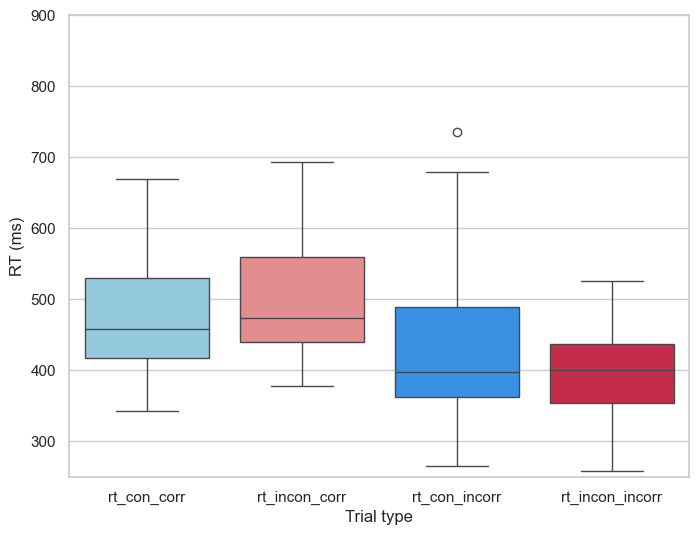

In [610]:
pic_name = "RT.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[\
            ['rt_con_corr', 'rt_incon_corr', 'rt_con_incorr', 'rt_incon_incorr',]\
            ], palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

plt.savefig(path+"{}".format(pic_name))
plt.show()

In [622]:
stats.wilcoxon(flanker_data['rt_con_corr'], flanker_data['rt_incon_corr'])

WilcoxonResult(statistic=25.0, pvalue=0.0065765380859375)

In [623]:
stats.ttest_rel(flanker_data['rt_con_corr'], flanker_data['rt_incon_corr'])

TtestResult(statistic=-3.178896481846169, pvalue=0.005491230575448784, df=17)

### Accuracy

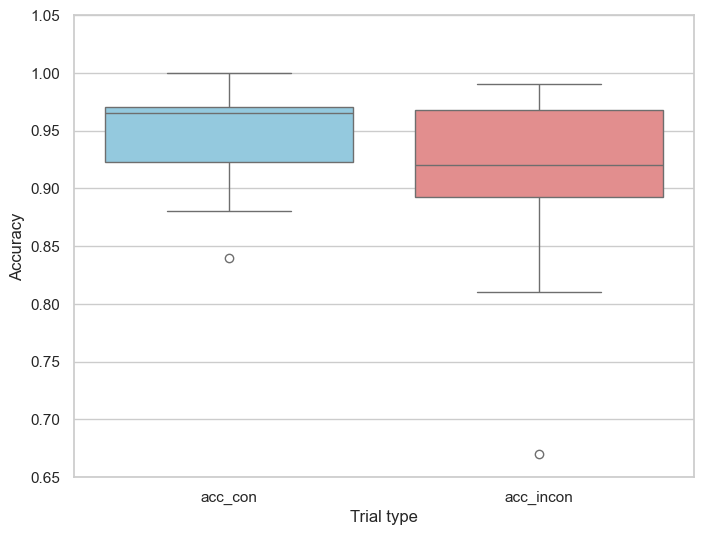

In [611]:
pic_name = "ACC.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=flanker_data[['acc_con', 'acc_incon']], palette=["skyblue", "lightcoral"])

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

plt.savefig(path+"{}".format(pic_name))
plt.show()

In [620]:
stats.wilcoxon(flanker_data['acc_con'], flanker_data['acc_incon'])

/Users/fzaki001/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=10.5, pvalue=0.008119382533799083)

In [621]:
stats.ttest_rel(flanker_data['acc_con'], flanker_data['acc_incon'])

TtestResult(statistic=2.67335117078998, pvalue=0.016042086592355388, df=17)

In [ ]:
#flanker_data.to_csv("/Users/fzaki001/Documents/flanker_data.csv", index=False)

# Wheel analysis

In [338]:
import glob
pd.options.mode.chained_assignment = None
n_blocks = 12
n_supertrials = 6
n_simon = 10
wm_load = 5
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wheel-seq/data/"
subjects = sorted([i[8:10] for i in os.listdir(path) if (i.endswith("csv") and "2800" in i)])

In [68]:
#sub = subjects[0]

In [69]:
file_list

NameError: name 'file_list' is not defined

In [341]:
# subjects = subjects[-2:]
subjects[7:]

['53', '54', '55', '56', '57', '59', '60', '61', '62', '63', '65', '66']

In [11]:
wheel_dict = dict(
    {
    "sub":[],
    "acc_simon": [],
    "acc_con": [],
    "acc_incon": [],
    "acc_lib": [],
    "acc_con_lib": [],
    "acc_incon_lib": [],
    "rt_con_corr": [],
    "rt_con_err": [],
    "rt_incon_corr": [],
    "rt_incon_err": [],
    "rt_con_corr_lib": [],
    "rt_con_err_lib": [],
    "rt_incon_corr_lib": [],
    "rt_incon_err_lib": [],
    "slow": [],
        
    }
)
wm_data = []
for sub in subjects[7:]:
    pattern = "{}sub-2800{}*_wheel-seq*.csv".format(path, sub)
    filename = glob.glob(pattern)
    wm_df = pd.DataFrame()
    data = pd.read_csv(filename[0])
    start_index = data["shown_segments"].first_valid_index()
    data = data.iloc[start_index:]

    data.shown_segments.dropna()
    assert len(data.shown_segments.dropna()) == n_blocks * n_supertrials * wm_load, "Check your data length!"
    
    data.segment.dropna()
    assert len(data.segment.dropna()) == n_blocks * n_supertrials * n_simon, "Check your data length!"
    
    # data.pressed_segment.dropna()
    
    simon_df = data[\
    ["segment", "pressed_segment", "congruent", "Simon_accuracy", "mouse_Simon.time"]\
    ].dropna(subset=["segment"]).reset_index(drop = True)
    simon_df["rt"] = [i[-1] for i in convert_strings_to_float_lists(list(simon_df["mouse_Simon.time"]))]
    assert len(simon_df) == n_blocks * n_supertrials * n_simon, "Check your data length!"
    
    simon_df['num'] = pd.to_numeric(simon_df['segment'].str.extract(r'(\d+)').iloc[:, 0])#astype('int', errors='ignore')
    simon_df['pressed_num'] = pd.to_numeric(simon_df['pressed_segment'].str.extract(r'(\d+)').iloc[:, 0]) #.astype('int', errors='ignore')
    simon_df['lib_acc'] = simon_df.apply(compute_precision_acc, axis=1)
    simon_df["pressed_segment"] = simon_df["pressed_segment"].fillna("SLOW")
    slow_rows = simon_df[simon_df.apply(lambda row: "SLOW" in row.values, axis=1)].index
    simon_df.loc[slow_rows] = "SLOW"
    for i in range(len(simon_df)):
        if type(simon_df.rt[i]) == float and simon_df.rt[i] <= 0.15:
            simon_df.rt[i] = "FAST"
    fast_rows = simon_df[simon_df.apply(lambda row: "FAST" in row.values, axis=1)].index
    simon_df.loc[fast_rows] = "FAST"
    
    print("sub-{}".format(sub))

    wm_df["simon_pressed"] = [list(i) for i in chunk_list([int(i) if type(i) != str else i for i in simon_df["pressed_num"]], 10)]
    wm_df["simon_shown"] = [list(i) for i in chunk_list([int(i) if type(i) != str else i for i in simon_df["num"]], 10)]
    wm_df["simon_acc"] = [list(i) for i in chunk_list([int(i) if type(i) != str else i for i in simon_df["Simon_accuracy"]], 10)]
    wm_df["lib_acc"] = [list(i) for i in chunk_list([int(i) if type(i) != str else i for i in simon_df["lib_acc"]], 10)]
    wm_df["congruent"] = [list(i) for i in chunk_list([int(i) if type(i) != str else i for i in simon_df["congruent"]], 10)]
    wm_df["wm_shown"] = [list(i.iloc[:, 0]) for i in chunk_list(data.shown_segments.dropna().str.extract(r'(\d+)'), 5)]
    wm_df["recall"] = [convert_string_to_numbers(i) for i in data.recall_segments.dropna()]
    wm_df["wm_acc"] = list(data.wm_accuracy.dropna())

    wm_data.append(wm_df)
    # print("INCONGRUENT")
    
    # print("conservative accuracy:",
    # simon_df[simon_df["congruent"] == 0].Simon_accuracy.mean())
    
    # print("liberal accuracy:",
    # simon_df[simon_df["congruent"] == 0].precision_acc.mean())
    
    # print("CONGRUENT")
    
    # print("conservative accuracy:",
    # simon_df[simon_df["congruent"] == 1].Simon_accuracy.mean())
    
    # print("liberal accuracy:",
    # simon_df[simon_df["congruent"] == 1].precision_acc.mean())

    # print("-------------------------")
    wheel_dict["sub"].append(sub)
    
    wheel_dict["acc_simon"].append(pd.to_numeric(simon_df.Simon_accuracy, errors='coerce').mean())
    wheel_dict["acc_con"].append(simon_df[simon_df["congruent"] == 1].Simon_accuracy.mean())
    wheel_dict["acc_incon"].append(simon_df[simon_df["congruent"] == 0].Simon_accuracy.mean())
    wheel_dict["acc_lib"].append(pd.to_numeric(simon_df.lib_acc, errors='coerce').mean())
    wheel_dict["acc_con_lib"].append(simon_df[simon_df["congruent"] == 1].lib_acc.mean())
    wheel_dict["acc_incon_lib"].append(simon_df[simon_df["congruent"] == 0].lib_acc.mean())
    
    wheel_dict["rt_con_corr"].append(simon_df[(simon_df["congruent"] == 1) & (simon_df["Simon_accuracy"] == 1)].rt.mean() * 1000)
    wheel_dict["rt_con_err"].append(simon_df[(simon_df["congruent"] == 1) & (simon_df["Simon_accuracy"] == 0)].rt.mean() * 1000)
    wheel_dict["rt_incon_corr"].append(simon_df[(simon_df["congruent"] == 0) & (simon_df["Simon_accuracy"] == 1)].rt.mean() * 1000)
    wheel_dict["rt_incon_err"].append(simon_df[(simon_df["congruent"] == 0) & (simon_df["Simon_accuracy"] == 0)].rt.mean() * 1000)
    wheel_dict["rt_con_corr_lib"].append(simon_df[(simon_df["congruent"] == 1) & (simon_df["lib_acc"] == 1)].rt.mean() * 1000)
    wheel_dict["rt_con_err_lib"].append(simon_df[(simon_df["congruent"] == 1) & (simon_df["lib_acc"] == 0)].rt.mean() * 1000)
    wheel_dict["rt_incon_corr_lib"].append(simon_df[(simon_df["congruent"] == 0) & (simon_df["lib_acc"] == 1)].rt.mean() * 1000)
    wheel_dict["rt_incon_err_lib"].append(simon_df[(simon_df["congruent"] == 0) & (simon_df["lib_acc"] == 0)].rt.mean() * 1000)

    wheel_dict["slow"].append(len(simon_df[simon_df["congruent"] == "SLOW"]))

    trial_wm_shown = chunk_list(list(data.shown_segments.dropna().str.extract(r'(\d+)').astype(int).reset_index(drop = True)[0]), 5)
    trial_wm_recall = chunk_list(convert_to_floats(data.recall_segments.dropna().reset_index(drop = True)), 5)
    
    wm_trial_data = pd.DataFrame(
        {
            "shown": trial_wm_shown,
            "recall": trial_wm_recall,
        }
    )
    wm_trial_data["shown"] = wm_trial_data["shown"].apply(lambda x: sorted(x))
    wm_trial_data["recall"] = wm_trial_data["recall"].apply(lambda x: sorted(x))
    
    simon_trial_data = data[["segment", "pressed_segment", "Simon_accuracy", "congruent"]].dropna(subset=["segment"]).reset_index(drop = True)
    simon_trial_data = simon_trial_data[simon_trial_data["congruent"] == 0]
    simon_df["congruent"] = list(data.congruent.dropna())
    rt_list = simon_df[simon_df["congruent"] == 0]["rt"]
    rt_list = chunk_list(list(rt_list), 5)
    
    simon_trial_data["segment"] = simon_trial_data["segment"].str.extract(r'(\d+)').astype(int)
    simon_trial_data["pressed_segment"] = \
    [list(pd.Series(i).str.extract(r'(\d+)').astype(int)[0])[0] if type(i) == str else i for i in simon_trial_data["pressed_segment"]]
    
    simon_trial_data_chunked = pd.DataFrame()
    for col in simon_trial_data.columns:
        simon_trial_data_chunked[col] = pd.Series(chunk_list(list(simon_trial_data[col]), 5)).apply(lambda x: sorted(x))
    
    trial_data = simon_trial_data_chunked.join(wm_trial_data).drop(["congruent", "recall"], axis = 1)
    trial_data["rt"] = rt_list
    
    # shown_cnts = []
    # shown_accs = []
    # no_shown_cnts = []
    # no_shown_accs = []
    # for super_trial in range(len(trial_data)):
    #     shown_cnt = 0
    #     shown_acc = 0
    #     no_shown_cnt = 0
    #     no_shown_acc = 0
    #     supertrial = trial_data.iloc[super_trial, :]
    #     for trial in range(5):
    #         if np.isnan(supertrial["pressed_segment"][trial]):
    #             pass
    #         else:
    #             if supertrial["segment"][trial] in supertrial["shown"]:
    #                 shown_cnt += 1
    #                 if supertrial["Simon_accuracy"][trial] == 1:
    #                     shown_acc += 1
    #             elif supertrial["segment"][trial] not in supertrial["shown"]:
    #                 no_shown_cnt += 1
    #                 if supertrial["Simon_accuracy"][trial] == 1:
    #                     no_shown_acc += 1
    #     shown_cnts.append(shown_cnt)
    #     shown_accs.append(shown_acc)
    #     no_shown_cnts.append(no_shown_cnt)
    #     no_shown_accs.append(no_shown_acc)
    
    # cnts = pd.DataFrame(
    #     {
    #         "shown_cnt": shown_cnts,
    #         "no_shown_cnt": no_shown_cnts,
    #         "shown_acc": shown_accs,
    #         "no_shown_acc": no_shown_accs,
    #     }
    # )
    
    # cnts["show_ratio"] = cnts["shown_acc"] / cnts["shown_cnt"]
    # cnts["no_show_ratio"] = cnts["no_shown_acc"] / cnts["no_shown_cnt"]
    
    # print(" -------------!!!!!!!!!!!!!!!!___________________",
    #     cnts.show_ratio.mean(),
    #     cnts.no_show_ratio.mean(),
    #       " -------------!!!!!!!!!!!!!!!!___________________",
    # )

    shown_cnts = []
    no_shown_cnts = []
    shown_rts = []
    no_shown_rts = []
    for super_trial in range(len(trial_data)):
        shown_cnt = 0
        no_shown_cnt = 0
        shown_rt = 0
        no_shown_rt = 0
        supertrial = trial_data.iloc[super_trial, :]
        for trial in range(5):
            if np.isnan(supertrial["pressed_segment"][trial]):
                pass
            else:
                if supertrial["segment"][trial] in supertrial["shown"]\
                and supertrial["Simon_accuracy"][trial] == 1\
                and type(supertrial["rt"][trial]) == float:
                    shown_cnt += 1
                    shown_rt += supertrial["rt"][trial]
                elif supertrial["segment"][trial] not in supertrial["shown"]\
                and supertrial["Simon_accuracy"][trial] == 1\
                and type(supertrial["rt"][trial]) == float:
                    no_shown_cnt += 1
                    no_shown_rt += supertrial["rt"][trial]
    
        shown_cnts.append(shown_cnt)
        shown_rts.append(shown_rt)
        no_shown_cnts.append(no_shown_cnt)
        no_shown_rts.append(no_shown_rt)
    
    cnts = pd.DataFrame(
        {
            "shown_cnt": shown_cnts,
            "no_shown_cnt": no_shown_cnts,
            "shown_rt": shown_rts,
            "no_shown_rt": no_shown_rts,
        }
    )
    
    cnts["show_ratio"] = cnts["shown_rt"] / cnts["shown_cnt"]
    cnts["no_show_ratio"] = cnts["no_shown_rt"] / cnts["no_shown_cnt"]
    
    print(" -------------!!!!!!!!!!!!!!!!___________________",
     cnts.shown_rt.sum() / cnts.shown_cnt.sum(),
        cnts.no_shown_rt.sum() / cnts.no_shown_cnt.sum(),
          " -------------!!!!!!!!!!!!!!!!___________________",
    )

wheel_data = pd.DataFrame(wheel_dict)
wheel_data["wm_acc"] = [i[i['recall'].apply(lambda x: len(x) != 0)].wm_acc.mean() for i in wm_data]
wheel_data = wheel_data.round(2)

IndexError: list index out of range

In [357]:
simon_df["congruent"] = list(data.congruent.dropna())
simon_df[simon_df["congruent"] == 1]["rt"]

0          SLOW
3      0.564175
4       0.51683
6       0.61382
9      0.541193
         ...   
711    0.413722
713    0.516703
714    0.509499
717    0.541038
719     0.46203
Name: rt, Length: 360, dtype: object

In [375]:
print(
    cnts.shown_rt.sum() / cnts.shown_cnt.sum(),
    cnts.no_shown_rt.sum() / cnts.no_shown_cnt.sum()
)

0.5016210846938056 0.482307817821871


In [79]:
wheel_data = wheel_data.iloc[8:].round(2).reset_index(drop = True)
wheel_data

sub  acc_simon  acc_con  acc_incon  acc_lib  acc_con_lib  acc_incon_lib  \
0   54       0.88     0.92       0.83     0.98         0.99           0.97   
1   55       0.81     0.83       0.79     0.94         0.96           0.91   
2   56       0.79     0.86       0.72     0.95         0.98           0.93   
3   57       0.83     0.86       0.80     0.98         0.99           0.97   
4   59       0.93     0.96       0.90     1.00         0.99           1.00   
5   60       0.81     0.86       0.76     0.94         0.98           0.91   
6   61       0.88     0.95       0.82     0.98         1.00           0.95   
7   62       0.88     0.92       0.84     0.98         0.99           0.97   
8   63       0.72     0.78       0.66     0.94         0.99           0.88   
9   65       0.82     0.89       0.75     0.96         0.99           0.92   
10  66       0.63     0.70       0.56     0.89         0.93           0.86   

    rt_con_corr  rt_con_err  rt_incon_corr  rt_incon_err  rt_con_corr_lib  \
0        427.20      425.74         531.80        543.97           427.06   
1        550.02      495.03         620.05        562.93           542.25   
2        417.63      399.14         506.96        471.06           413.83   
3        427.70      427.58         450.88        445.90           428.16   
4        401.16      397.73         507.31        502.07           400.78   
5        468.65      480.24         537.03        520.77           469.23   
6        379.56      375.01         484.48        484.43           378.69   
7        369.65      375.20         472.45        447.07           369.55   
8        392.20      409.08         470.97        444.21           394.65   
9        403.08      410.82         502.24        500.34           403.45   
10       497.63      485.58         561.43        534.13           495.84   

    rt_con_err_lib  rt_incon_corr_lib  rt_incon_err_lib  slow  wm_acc  
0           431.09             533.78            538.35    17    0.82  
1           501.01             613.06            554.90   163    0.66  
2           481.40             506.22            382.30     8    0.66  
3           387.20             449.27            470.55     7    0.78  
4           446.45             506.77               NaN     2    0.81  
5           512.09             535.94            502.76    57    0.66  
6           600.63             485.07            471.77     3    0.92  
7           417.61             470.35            409.04     3    0.85  
8           505.96             469.33            405.85     5    0.71  
9           440.64             504.36            470.40     7    0.76  
10          469.35             559.56            489.45    67    0.52

In [368]:
trial_wm_shown = chunk_list(list(data.shown_segments.dropna().str.extract(r'(\d+)').astype(int).reset_index(drop = True)[0]), 5)
trial_wm_recall = chunk_list(convert_to_floats(data.recall_segments.dropna().reset_index(drop = True)), 5)

wm_trial_data = pd.DataFrame(
    {
        "shown": trial_wm_shown,
        "recall": trial_wm_recall,
    }
)
wm_trial_data["shown"] = wm_trial_data["shown"].apply(lambda x: sorted(x))
wm_trial_data["recall"] = wm_trial_data["recall"].apply(lambda x: sorted(x))

simon_trial_data = data[["segment", "pressed_segment", "Simon_accuracy", "congruent"]].dropna(subset=["segment"]).reset_index(drop = True)
simon_trial_data = simon_trial_data[simon_trial_data["congruent"] == 1]
simon_df["congruent"] = list(data.congruent.dropna())
rt_list = simon_df[simon_df["congruent"] == 1]["rt"]
rt_list = chunk_list(list(rt_list), 5)

simon_trial_data["segment"] = simon_trial_data["segment"].str.extract(r'(\d+)').astype(int)
simon_trial_data["pressed_segment"] = \
[list(pd.Series(i).str.extract(r'(\d+)').astype(int)[0])[0] if type(i) == str else i for i in simon_trial_data["pressed_segment"]]

simon_trial_data_chunked = pd.DataFrame()
for col in simon_trial_data.columns:
    simon_trial_data_chunked[col] = pd.Series(chunk_list(list(simon_trial_data[col]), 5)).apply(lambda x: sorted(x))

trial_data = simon_trial_data_chunked.join(wm_trial_data).drop(["congruent", "recall"], axis = 1)
trial_data["rt"] = rt_list


In [371]:
shown_cnts = []
no_shown_cnts = []
shown_rts = []
no_shown_rts = []
for super_trial in range(len(trial_data)):
    shown_cnt = 0
    no_shown_cnt = 0
    shown_rt = 0
    no_shown_rt = 0
    supertrial = trial_data.iloc[super_trial, :]
    for trial in range(5):
        if np.isnan(supertrial["pressed_segment"][trial]):
            pass
        else:
            if supertrial["segment"][trial] in supertrial["shown"]\
            and supertrial["Simon_accuracy"][trial] == 1\
            and type(supertrial["rt"][trial]) == float:
                shown_cnt += 1
                shown_rt += supertrial["rt"][trial]
            elif supertrial["segment"][trial] not in supertrial["shown"]\
            and supertrial["Simon_accuracy"][trial] == 1\
            and type(supertrial["rt"][trial]) == float:
                no_shown_cnt += 1
                no_shown_rt += supertrial["rt"][trial]

    shown_cnts.append(shown_cnt)
    shown_rts.append(shown_rt)
    no_shown_cnts.append(no_shown_cnt)
    no_shown_rts.append(no_shown_rt)

cnts = pd.DataFrame(
    {
        "shown_cnt": shown_cnts,
        "no_shown_cnt": no_shown_cnts,
        "shown_rt": shown_rts,
        "no_shown_rt": no_shown_rts,
    }
)

cnts["show_ratio"] = cnts["shown_rt"] / cnts["shown_cnt"]
cnts["no_show_ratio"] = cnts["no_shown_rt"] / cnts["no_shown_cnt"]

print(
    cnts.show_ratio.mean(),
    cnts.no_show_ratio.mean()
)

0.5069681379309469 0.4762790507184559


In [370]:
supertrial["rt"][trial]

'FAST'

In [345]:
shown_cnts = []
shown_accs = []
no_shown_cnts = []
no_shown_accs = []
for super_trial in range(len(trial_data)):
    shown_cnt = 0
    shown_acc = 0
    no_shown_cnt = 0
    no_shown_acc = 0
    supertrial = trial_data.iloc[super_trial, :]
    for trial in range(5):
        if np.isnan(supertrial["pressed_segment"][trial]):
            pass
        else:
            if supertrial["segment"][trial] in supertrial["shown"]:
                shown_cnt += 1
                if supertrial["Simon_accuracy"][trial] == 1:
                    shown_acc += 1
            elif supertrial["segment"][trial] not in supertrial["shown"]:
                no_shown_cnt += 1
                if supertrial["Simon_accuracy"][trial] == 1:
                    no_shown_acc += 1
    shown_cnts.append(shown_cnt)
    shown_accs.append(shown_acc)
    no_shown_cnts.append(no_shown_cnt)
    no_shown_accs.append(no_shown_acc)

cnts = pd.DataFrame(
    {
        "shown_cnt": shown_cnts,
        "no_shown_cnt": no_shown_cnts,
        "shown_acc": shown_accs,
        "no_shown_acc": no_shown_accs,
    }
)

cnts["show_ratio"] = cnts["shown_acc"] / cnts["shown_cnt"]
cnts["no_show_ratio"] = cnts["no_shown_acc"] / cnts["no_shown_cnt"]

print(
    cnts.show_ratio.mean(),
    cnts.no_show_ratio.mean()
)

0.6244131455399061 0.6274647887323943


In [348]:
cnts

shown_cnt  no_shown_cnt  shown_acc  no_shown_acc  show_ratio  \
0           1             3          1             2    1.000000   
1           1             2          1             0    1.000000   
2           3             2          1             2    0.333333   
3           1             3          0             2    0.000000   
4           2             2          1             2    0.500000   
..        ...           ...        ...           ...         ...   
67          4             1          2             1    0.500000   
68          3             2          1             2    0.333333   
69          3             2          1             0    0.333333   
70          2             3          2             2    1.000000   
71          3             2          1             1    0.333333   

    no_show_ratio  
0        0.666667  
1        0.000000  
2        1.000000  
3        0.666667  
4        1.000000  
..            ...  
67       1.000000  
68       1.000000  
69       0.000000  
70       0.666667  
71       0.500000  

[72 rows x 6 columns]

In [294]:
trial_data.head()

segment             pressed_segment             Simon_accuracy  \
0   [2, 3, 5, 7, 9]   [nan, 2.0, 6.0, 7.0, 9.0]  [0.0, 0.0, 1.0, 1.0, 1.0]   
1   [1, 2, 4, 8, 9]  [nan, 2.0, 4.0, 10.0, nan]  [0.0, 0.0, 0.0, 1.0, 1.0]   
2  [4, 5, 7, 9, 10]  [3.0, 6.0, 7.0, 9.0, 10.0]  [0.0, 0.0, 1.0, 1.0, 1.0]   
3   [1, 2, 3, 4, 8]   [nan, 2.0, 8.0, 8.0, 9.0]  [0.0, 0.0, 0.0, 1.0, 1.0]   
4   [2, 3, 4, 8, 9]  [nan, 2.0, 4.0, 8.0, 10.0]  [0.0, 0.0, 1.0, 1.0, 1.0]   

              shown  
0  [1, 2, 7, 8, 10]  
1   [3, 5, 6, 7, 8]  
2  [2, 4, 5, 8, 10]  
3  [1, 2, 6, 7, 10]  
4  [2, 3, 6, 8, 10]

0.6244131455399061 0.6274647887323943


In [577]:
wheel_data.iloc[:5,:].describe().drop("count")

acc_simon   acc_con  acc_incon   acc_lib  acc_con_lib  acc_incon_lib  \
mean   0.774000  0.808000   0.736000  0.972000     0.980000       0.964000   
std    0.040373  0.033466   0.056833  0.021679     0.015811       0.020736   
min    0.710000  0.750000   0.670000  0.950000     0.960000       0.940000   
25%    0.770000  0.810000   0.710000  0.960000     0.970000       0.950000   
50%    0.780000  0.820000   0.720000  0.960000     0.980000       0.960000   
75%    0.790000  0.830000   0.760000  0.990000     0.990000       0.980000   
max    0.820000  0.830000   0.820000  1.000000     1.000000       0.990000   

      rt_con_corr  rt_con_err  rt_incon_corr  rt_incon_err  rt_con_corr_lib  \
mean   512.648000  506.574000     617.750000    600.628000       511.328000   
std     84.296265   77.451878      88.036753     84.043933        84.215104   
min    394.720000  391.520000     466.430000    460.010000       393.690000   
25%    485.950000  484.660000     624.570000    610.720000       481.960000   
50%    513.520000  511.230000     640.390000    615.610000       513.780000   
75%    542.870000  545.320000     670.930000    631.210000       543.520000   
max    626.180000  600.140000     686.430000    685.590000       623.690000   

      rt_con_err_lib  rt_incon_corr_lib  rt_incon_err_lib    wm_acc  
mean      483.570000         615.214000        549.186000  0.766000  
std       134.382546          86.408847        111.331426  0.079246  
min       280.020000         467.620000        410.280000  0.680000  
25%       417.830000         619.740000        461.060000  0.690000  
50%       536.860000         636.850000        568.670000  0.780000  
75%       579.070000         665.430000        635.640000  0.820000  
max       604.070000         686.430000        670.280000  0.860000

sub  acc_simon  acc_con  acc_incon  acc_lib  acc_con_lib  acc_incon_lib  \
0  45       0.78     0.83       0.72     0.95         0.96           0.94   
1  47       0.79     0.81       0.76     0.96         0.97           0.96   
2  48       0.82     0.83       0.82     1.00         1.00           0.99   
3  49       0.77     0.82       0.71     0.96         0.98           0.95   
4  50       0.71     0.75       0.67     0.99         0.99           0.98   
5  51       0.58     0.51       0.66     0.84         0.78           0.90   

   rt_con_corr  rt_con_err  rt_incon_corr  rt_incon_err  rt_con_corr_lib  \
0       626.18      600.14         624.57        610.72           623.69   
1       485.95      484.66         670.93        631.21           481.96   
2       513.52      511.23         640.39        615.61           513.78   
3       394.72      391.52         466.43        460.01           393.69   
4       542.87      545.32         686.43        685.59           543.52   
5       763.25      728.06         798.56        773.15           747.17   

   rt_con_err_lib  rt_incon_corr_lib  rt_incon_err_lib  wm_acc  
0          579.07             619.74            635.64    0.82  
1          604.07             665.43            568.67    0.69  
2          280.02             636.85            461.06    0.86  
3          417.83             467.62            410.28    0.68  
4          536.86             686.43            670.28    0.78  
5          741.35             794.70            745.84    0.62

In [532]:
wm_data[0]

simon_pressed                         simon_shown  \
0       [4, 5, 1, 5, 2, 2, 6, 3, 4, 7]     [4, 10, 6, 5, 7, 2, 1, 3, 9, 8]   
1      [10, 3, 2, 6, 6, 9, 3, 9, 7, 5]     [10, 8, 7, 6, 1, 9, 3, 4, 2, 5]   
2     [10, 2, 6, 8, 10, 3, 7, 1, 5, 9]     [5, 2, 1, 8, 4, 3, 7, 6, 10, 9]   
3      [9, 5, 1, 2, 8, 10, 8, 1, 7, 8]     [9, 10, 6, 2, 8, 5, 4, 1, 7, 3]   
4     [4, 8, 10, 5, 6, 2, 2, 8, 10, 1]     [4, 3, 10, 9, 6, 7, 2, 8, 5, 1]   
5    [SLOW, 8, 5, 7, 2, 6, 9, 5, 4, 1]  [SLOW, 8, 1, 7, 2, 5, 9, 10, 4, 6]   
6    [2, 6, 9, 8, 4, 10, 3, 10, 3, 10]     [7, 6, 9, 3, 4, 5, 2, 10, 8, 1]   
7       [9, 3, 5, 7, 1, 2, 9, 3, 6, 8]     [10, 9, 5, 1, 6, 7, 4, 3, 2, 8]   
8      [9, 7, 1, 7, 8, 2, 3, 4, 9, 10]     [5, 2, 6, 7, 3, 1, 8, 4, 9, 10]   
9     [1, 4, 9, 3, 1, 8, 2, 2, 10, 10]     [1, 9, 4, 3, 6, 8, 7, 2, 5, 10]   
10     [4, 9, 3, 3, 2, 6, 10, 6, 5, 1]     [9, 4, 3, 8, 2, 6, 10, 1, 5, 7]   
11     [3, 1, 1, 9, 3, 6, 2, 1, 9, 10]     [8, 1, 7, 4, 3, 10, 2, 6, 9, 5]   
12     [8, 7, 4, 3, 2, 1, 4, 5, 10, 6]     [3, 7, 4, 8, 2, 6, 9, 5, 10, 1]   
13    [1, 1, 10, 3, 5, 1, 8, 8, 4, 10]     [6, 1, 5, 2, 4, 7, 8, 3, 9, 10]   
14  [SLOW, 3, 8, 2, 1, 7, 10, 9, 5, 5]  [SLOW, 8, 3, 2, 6, 7, 4, 9, 10, 5]   
15      [1, 1, 8, 5, 7, 3, 3, 2, 5, 6]     [1, 6, 3, 5, 7, 9, 8, 2, 4, 10]   
16     [8, 7, 5, 7, 4, 6, 2, 5, 10, 5]     [8, 3, 1, 7, 4, 6, 2, 5, 10, 9]   
17     [3, 10, 6, 2, 9, 9, 6, 1, 3, 2]     [8, 10, 1, 2, 9, 4, 5, 6, 3, 7]   
18      [9, 7, 7, 6, 8, 6, 8, 7, 9, 1]     [4, 7, 2, 6, 3, 5, 8, 1, 9, 10]   
19    [1, 2, 2, 4, 7, 7, 10, 4, 3, 10]     [1, 8, 6, 4, 2, 7, 10, 9, 3, 5]   
20     [6, 2, 10, 8, 3, 6, 2, 4, 4, 5]     [6, 7, 5, 8, 3, 1, 2, 9, 4, 10]   
21    [8, 9, 10, 6, 10, 7, 7, 3, 4, 6]     [3, 9, 5, 6, 10, 2, 7, 8, 4, 1]   
22     [1, 10, 3, 6, 8, 9, 4, 2, 5, 1]     [6, 10, 3, 1, 8, 4, 9, 2, 5, 7]   
23   [9, 2, 10, 6, 10, 1, 3, 10, 9, 8]     [9, 7, 10, 2, 4, 1, 3, 5, 6, 8]   
24      [4, 1, 9, 1, 8, 5, 9, 7, 1, 3]     [5, 7, 4, 1, 3, 6, 9, 2, 10, 8]   
25    [2, 9, 7, 8, 10, 5, 2, 10, 6, 5]     [3, 9, 2, 8, 5, 4, 7, 1, 6, 10]   
26    [10, 3, 10, 5, 1, 9, 9, 6, 2, 3]     [1, 8, 10, 9, 7, 5, 4, 6, 2, 3]   
27     [6, 8, 7, 6, 10, 7, 8, 9, 4, 4]     [1, 8, 7, 6, 10, 2, 3, 4, 9, 5]   
28     [7, 10, 1, 4, 9, 3, 3, 6, 3, 6]     [7, 6, 1, 9, 4, 2, 3, 10, 8, 5]   
29     [8, 6, 8, 10, 2, 1, 8, 1, 4, 5]     [3, 6, 8, 4, 7, 10, 2, 1, 9, 5]   
30     [5, 4, 10, 3, 4, 6, 1, 1, 8, 2]     [10, 4, 5, 3, 9, 6, 2, 1, 8, 7]   
31    [7, 10, 9, 5, 3, 1, 10, 2, 1, 3]     [2, 9, 4, 5, 8, 1, 10, 7, 6, 3]   
32      [6, 6, 1, 8, 7, 3, 7, 5, 2, 9]     [6, 10, 1, 8, 7, 9, 2, 5, 3, 4]   
33     [7, 3, 2, 8, 1, 4, 5, 3, 1, 10]     [2, 9, 7, 8, 6, 4, 10, 3, 1, 5]   
34    [1, 4, 2, 3, 9, 7, 1, 10, 10, 2]     [6, 4, 8, 3, 9, 2, 1, 5, 10, 7]   
35     [2, 6, 7, 3, 6, 6, 4, 2, 10, 9]     [2, 1, 7, 3, 10, 6, 4, 8, 5, 9]   
36     [3, 6, 4, 7, 5, 2, 5, 7, 10, 6]     [3, 10, 9, 7, 5, 8, 4, 2, 6, 1]   
37     [6, 6, 3, 10, 7, 5, 7, 3, 4, 3]     [6, 1, 3, 5, 2, 10, 7, 9, 4, 8]   
38      [6, 6, 5, 5, 7, 2, 8, 2, 8, 5]     [6, 1, 4, 10, 2, 7, 9, 8, 3, 5]   
39    [2, 10, 3, 4, 4, 6, 2, 1, 3, 10]     [7, 10, 3, 9, 4, 1, 8, 2, 6, 5]   
40     [4, 8, 3, 5, 1, 1, 6, 9, 2, 10]     [4, 3, 8, 5, 6, 1, 2, 9, 7, 10]   
41    [3, 4, 4, 3, 1, 10, 2, 6, 10, 2]     [8, 4, 9, 3, 6, 10, 7, 1, 5, 2]   
42      [6, 9, 5, 5, 2, 2, 8, 9, 3, 1]     [1, 9, 5, 10, 7, 2, 8, 4, 3, 6]   
43      [3, 2, 6, 3, 2, 9, 7, 6, 8, 5]     [3, 6, 4, 9, 7, 10, 8, 1, 2, 5]   
44     [8, 7, 6, 8, 6, 1, 2, 9, 5, 10]     [8, 2, 6, 3, 1, 10, 7, 9, 5, 4]   
45     [1, 5, 10, 9, 2, 6, 7, 1, 4, 3]     [8, 5, 10, 4, 7, 6, 2, 1, 9, 3]   
46    [1, 1, 9, 2, 8, 10, 6, 10, 6, 8]     [7, 1, 4, 2, 8, 5, 10, 9, 6, 3]   
47     [4, 8, 6, 10, 8, 9, 8, 5, 8, 6]     [4, 7, 1, 10, 3, 9, 8, 5, 2, 6]   
48     [4, 6, 3, 3, 6, 6, 8, 10, 7, 8]     [4, 10, 9, 3, 1, 6, 7, 5, 2, 8]   
49     [5, 6, 2, 8, 8, 7, 6, 3, 5, 10]     [1, 6, 7, 9, 8, 2, 10, 3, 4, 5]   
50     [4, 3, 7, 10, 6, 6, 4, 2, 5, 8]     [4, 

In [560]:
wm_data[0][wm_data[0]['recall'].apply(lambda x: len(x) != 0)]["wm_acc"]

0     0.8
1     0.8
2     1.0
3     0.8
4     0.4
5     0.8
6     1.0
7     0.8
8     0.6
9     0.8
10    1.0
11    1.0
12    0.8
13    0.6
14    0.4
15    0.6
16    1.0
17    1.0
18    0.4
19    0.6
20    1.0
21    1.0
22    0.6
23    0.6
24    1.0
25    1.0
26    0.6
27    1.0
28    0.6
29    0.4
30    1.0
31    0.8
32    0.6
33    1.0
34    0.4
35    0.8
36    0.8
37    0.6
38    0.6
39    1.0
40    1.0
41    0.8
42    0.4
43    0.8
44    1.0
45    1.0
46    1.0
47    0.8
48    1.0
49    1.0
50    1.0
51    0.8
52    0.8
53    1.0
54    0.8
55    0.8
56    1.0
57    0.6
58    1.0
59    1.0
60    1.0
61    0.6
62    1.0
63    0.8
64    0.8
65    1.0
66    1.0
67    1.0
68    1.0
69    0.8
70    0.8
71    0.8
Name: wm_acc, dtype: float64

In [561]:
[i[i['recall'].apply(lambda x: len(x) != 0)].wm_acc.mean() for i in wm_data]

[0.8166666666666667,
 0.6916666666666667,
 0.8590163934426229,
 0.6786885245901637,
 0.7770491803278687,
 0.6222222222222222]

In [ ]:
wm
wm_data[2].round()

In [442]:
def convert_segment_string_to_numbers(segment_string):
    # Split the segment string by comma and remove whitespace
    segments = segment_string.split(',')
    segments = [segment.strip() for segment in segments]
    
    # Initialize an empty list to store the converted numbers
    numbers = []
    
    # Iterate over each segment in the list
    for segment in segments:
        # Extract the numerical part of the segment string
        number = int(segment.split('_')[-1])
        
        # Append the extracted number to the numbers list
        numbers.append(number)
    
    # Return the list of numbers
    return numbers

In [296]:
wheel_data = pd.DataFrame(wheel_dict).round(2)
wheel_data

sub  acc_simon  acc_con  acc_incon  acc_lib  acc_con_lib  acc_incon_lib  \
0  45       0.78     0.83       0.72     0.95         0.96           0.94   
1  47       0.79     0.81       0.76     0.96         0.97           0.96   
2  48       0.82     0.83       0.82     1.00         1.00           0.99   
3  49       0.77     0.82       0.71     0.96         0.98           0.95   
4  50       0.71     0.75       0.67     0.99         0.99           0.98   
5  51       0.58     0.51       0.66     0.84         0.78           0.90   

   rt_con_corr  rt_con_err  rt_incon_corr  rt_incon_err  rt_con_corr_lib  \
0         0.63        0.60           0.62          0.61             0.62   
1         0.49        0.48           0.67          0.63             0.48   
2         0.51        0.51           0.64          0.62             0.51   
3         0.39        0.39           0.47          0.46             0.39   
4         0.54        0.55           0.69          0.69             0.54   
5         0.76        0.73           0.80          0.77             0.75   

   rt_con_err_lib  rt_incon_corr_lib  rt_incon_err_lib  
0            0.58               0.62              0.64  
1            0.60               0.67              0.57  
2            0.28               0.64              0.46  
3            0.42               0.47              0.41  
4            0.54               0.69              0.67  
5            0.74               0.79              0.75

In [505]:
wheel_data = pd.DataFrame(wheel_dict).round(2)
wheel_data

sub  acc_simon  acc_con  acc_incon  acc_lib  acc_con_lib  acc_incon_lib  \
0  45       0.78     0.83       0.72     0.95         0.96           0.94   
1  47       0.79     0.81       0.76     0.96         0.97           0.96   
2  48       0.82     0.83       0.82     1.00         1.00           0.99   
3  49       0.77     0.82       0.71     0.96         0.98           0.95   
4  50       0.71     0.75       0.67     0.99         0.99           0.98   
5  51       0.58     0.51       0.66     0.84         0.78           0.90   

   rt_con_corr  rt_con_err  rt_incon_corr  rt_incon_err  rt_con_corr_lib  \
0         0.63        0.60           0.62          0.61             0.62   
1         0.49        0.48           0.67          0.63             0.48   
2         0.51        0.51           0.64          0.62             0.51   
3         0.39        0.39           0.47          0.46             0.39   
4         0.54        0.55           0.69          0.69             0.54   
5         0.76        0.73           0.80          0.77             0.75   

   rt_con_err_lib  rt_incon_corr_lib  rt_incon_err_lib  
0            0.58               0.62              0.64  
1            0.60               0.67              0.57  
2            0.28               0.64              0.46  
3            0.42               0.47              0.41  
4            0.54               0.69              0.67  
5            0.74               0.79              0.75

In [297]:
wheel_data.columns

Index(['sub', 'acc_simon', 'acc_con', 'acc_incon', 'acc_lib', 'acc_con_lib',
       'acc_incon_lib', 'rt_con_corr', 'rt_con_err', 'rt_incon_corr',
       'rt_incon_err', 'rt_con_corr_lib', 'rt_con_err_lib',
       'rt_incon_corr_lib', 'rt_incon_err_lib'],
      dtype='object')

## Plots

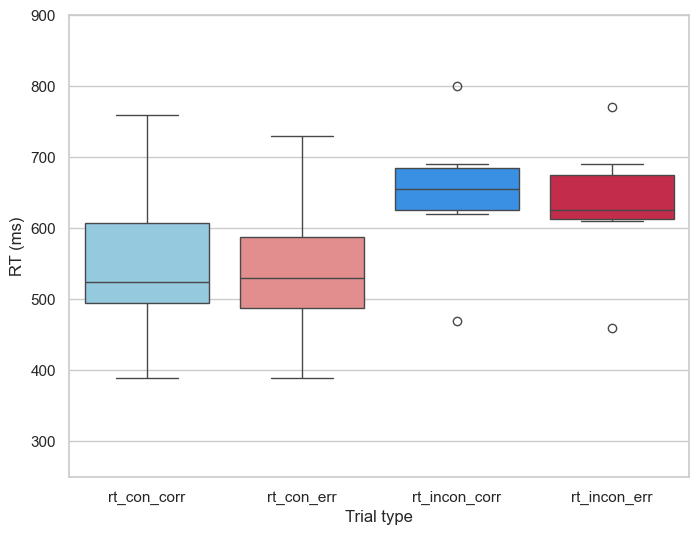

In [298]:
# path = "/Users/fzaki001/Documents/DA/letter-flanker/"
# pic_name = "RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=wheel_data[\
            ['rt_con_corr', 'rt_con_err', 'rt_incon_corr',
       'rt_incon_err',]\
            ]*1000, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

#plt.savefig(path+"{}".format(pic_name))
plt.show()

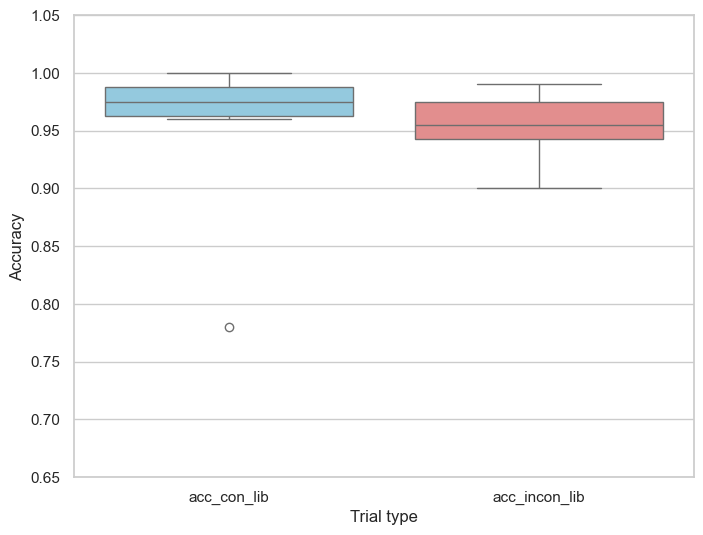

In [301]:
# pic_name = "ACC_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=wheel_data[['acc_con_lib', 'acc_incon_lib']], palette=["skyblue", "lightcoral"])

plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.ylim(0.65, 1.05)

# plt.savefig(path+"{}".format(pic_name))
plt.show()

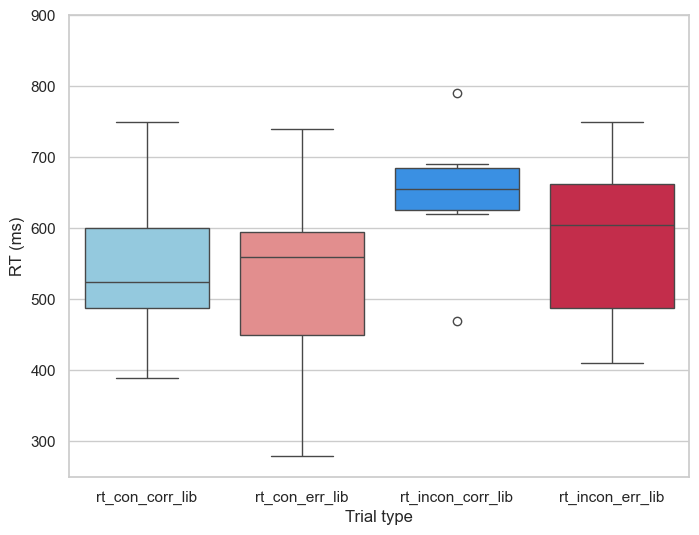

In [299]:
# path = "/Users/fzaki001/Documents/DA/letter-flanker/"
# pic_name = "RT_LR.png"

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=wheel_data[\
            ['rt_con_corr_lib', 'rt_con_err_lib', 'rt_incon_corr_lib',
       'rt_incon_err_lib',]\
            ]*1000, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.ylim(250, 900)

#plt.savefig(path+"{}".format(pic_name))
plt.show()

In [217]:
simon_df["time"] = [i[-1] for i in convert_strings_to_float_lists(list(simon_df["mouse_Simon.time"]))] # very 1st run
simon_df["time"] = [i[-1] for i in convert_strings_to_float_lists(list(simon_df["mouse_Simon.time"]))] # very 2nd run

simon_df["pressed_segment"] = simon_df["pressed_segment"].fillna("SLOW")
slow_rows = simon_df[simon_df.apply(lambda row: "SLOW" in row.values, axis=1)].index
simon_df.loc[slow_rows] = "SLOW"

simon_df['num'] = pd.to_numeric(simon_df['segment'].str.extract(r'(\d+)').iloc[:, 0])#astype('int', errors='ignore')
simon_df['pressed_num'] = pd.to_numeric(simon_df['pressed_segment'].str.extract(r'(\d+)').iloc[:, 0]) #.astype('int', errors='ignore')

/var/folders/yr/7g4rzssd7394vjg52sz_cvlsv0xwl3/T/ipykernel_37063/3147763423.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SLOW' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  simon_df.loc[slow_rows] = "SLOW"


In [278]:
simon_df[simon_df["congruent"] == 1]#["Simon_accuracy"].mean()

segment pressed_segment congruent Simon_accuracy  \
1     sec_6           sec_6       1.0            1.0   
3     sec_1           sec_1       1.0            1.0   
5    sec_10           sec_5       1.0            0.0   
7     sec_3           sec_3       1.0            1.0   
9     sec_2           sec_2       1.0            1.0   
..      ...             ...       ...            ...   
711   sec_7           sec_6       1.0            0.0   
712   sec_4           sec_4       1.0            1.0   
714   sec_9           sec_1       1.0            0.0   
717   sec_8           sec_8       1.0            1.0   
719   sec_3           sec_3       1.0            1.0   

                                      mouse_Simon.time        rt   num  \
1    [0.00207419999060221, 0.005993500002659857, 0....  0.479147   6.0   
3    [0.0021373999770730734, 0.0059089999995194376,...   0.74624   1.0   
5    [0.002085599990095943, 0.0058730999880936, 0.0...  0.788686  10.0   
7    [0.0019444999925326556, 0.005845500010764226, ...  0.940514   3.0   
9    [0.001989200012758374, 0.005868200008990243, 0...  0.940474   2.0   
..                                                 ...       ...   ...   
711  [0.001865800004452467, 0.00590859999647364, 0....  0.734118   7.0   
712  [0.0018633999861776829, 0.005984299990814179, ...  0.521694   4.0   
714  [0.0018780000100377947, 0.005950199993094429, ...  0.831254   9.0   
717  [0.0018455999961588532, 0.00600200000917539, 0...  0.715913   8.0   
719  [0.0018409999902360141, 0.0060350999992806464,...  0.685595   3.0   

     pressed_num  precision_acc  
1            6.0            1.0  
3            1.0            1.0  
5            5.0            0.0  
7            3.0            1.0  
9            2.0            1.0  
..           ...            ...  
711          6.0            1.0  
712          4.0            1.0  
714          1.0            0.0  
717          8.0            1.0  
719          3.0            1.0  

[349 rows x 9 columns]

In [221]:
print("CONGRUENT")

print("conservative accuracy:",
simon_df[simon_df["congruent"] == 1].Simon_accuracy.mean())

print("liberal accuracy:",
simon_df[simon_df["congruent"] == 1].precision_acc.mean())

CONGRUENT
conservative accuracy: 0.8328690807799443
liberal accuracy: 0.958217270194986


In [222]:
print("INCONGRUENT")

print("conservative accuracy:",
simon_df[simon_df["congruent"] == 0].Simon_accuracy.mean())

print("liberal accuracy:",
simon_df[simon_df["congruent"] == 0].precision_acc.mean())

INCONGRUENT
conservative accuracy: 0.7214484679665738
liberal accuracy: 0.9387186629526463


In [229]:
print("CONGRUENT-ERROR")

print("conservative RT:",
simon_df[(simon_df["congruent"] == 1) & (simon_df["Simon_accuracy"] == 0)].time.mean() * 1000) 

print("liberal RT:",
simon_df[(simon_df["congruent"] == 1) & (simon_df["precision_acc"] == 0)].time.mean() * 1000)

CONGRUENT-ERROR
conservative RT: 600.1415500009898
liberal RT: 579.0749000074962


In [230]:
print("INCONGRUENT-ERROR")

print("conservative RT:",
simon_df[(simon_df["congruent"] == 0) & (simon_df["Simon_accuracy"] == 0)].time.mean() * 1000)

print("liberal RT:",
simon_df[(simon_df["congruent"] == 0) & (simon_df["precision_acc"] == 0)].time.mean() * 1000)

INCONGRUENT-ERROR
conservative RT: 610.7234359963331
liberal RT: 635.6412181842395


In [ ]:
print("CONGRUENT-CORRECT")

print("conservative RT:",
simon_df[(simon_df["congruent"] == 1) & (simon_df["Simon_accuracy"] == 1)].time.mean() * 1000)

print("liberal RT:",
simon_df[(simon_df["congruent"] == 1) & (simon_df["precision_acc"] == 1)].time.mean() * 1000)

In [232]:
print("INCONGRUENT-CORRECT")

print("conservative RT:",
simon_df[(simon_df["congruent"] == 0) & (simon_df["Simon_accuracy"] == 1)].time.mean() * 1000)

print("liberal RT:",
simon_df[(simon_df["congruent"] == 0) & (simon_df["precision_acc"] == 1)].time.mean() * 1000)

INCONGRUENT-CORRECT
conservative RT: 624.5669374475256
liberal RT: 619.7361234376533


# Face Task

In [1270]:
import glob
import re
pd.options.mode.chained_assignment = None
n_blocks = 10
n_trials = 40
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face/data/"
path_pic = '/Users/fzaki001/Documents/DA/wme-face/'
pattern = r'\d+'
subjects = sorted([re.search(pattern, i)[0] for i in os.listdir(path) if i.endswith("csv")])
# def norm_recall_counts(data, counterbalance):
#     coeff_dict = dict()
#     if counterbalance == "line":
#         for ind in data.recall.value_counts().index:
#             coeff_dict[ind] = data.recall.value_counts()[ind] / len(data)
#     elif counterbalance == "circle":
#         for ind in data.similarity.value_counts().index:
#             coeff_dict[ind] = data.similarity.value_counts()[ind] / len(data)
#     return coeff_dict


def norm_recall_counts(data, col = "similarity"):
    coeff_dict = dict()
    for ind in data[col].value_counts().index:
        coeff_dict[ind] = data[col].value_counts()[ind] / len(data)
    return coeff_dict

In [1271]:
subjects

['280069',
 '280070',
 '280071',
 '280072',
 '280073',
 '280074',
 '280075',
 '280076',
 '280077',
 '280078',
 '280079',
 '280080',
 '280081',
 '280082',
 '280083',
 '280084',
 '280085',
 '280086',
 '280087',
 '280088',
 '280089',
 '280090',
 '280091',
 '280092',
 '280093',
 '280094',
 '280095',
 '280096',
 '280097',
 '280098',
 '280099',
 '280100',
 '280101',
 '280102',
 '280103',
 '280104',
 '280105',
 '280106',
 '280107',
 '280108',
 '280109',
 '280110',
 '280111',
 '280112',
 '280113',
 '280114',
 '280115',
 '280116',
 '280117',
 '280118',
 '280136',
 '280139',
 '280140',
 '280149',
 '280150',
 '280152']

In [1272]:
# trial_data_list = []
from tqdm import tqdm
normalize = True
face_task_dict = {
    "sub": [],
    "fl_acc": [],
    "fl_acc_con": [],
    "fl_acc_incon": [],
    "con_rt_corr": [],
    "incon_rt_corr": [],
    "con_rt_incor": [],
    "incon_rt_incor": [],
    "skipped_fl": [],
    "recall_rt": [],
    "recall_rt_std": [],
    "skipped_recall": [],
    "recall_middle": [],
    "recall_corr_same": [],
    "recall_corr_diff": [],
    "recall_err_same": [],
    "recall_err_diff": [],
    "recall_con_same": [],
    "recall_con_diff": [],
    "recall_incon_same": [],
    "recall_incon_diff": [],
    "recall_L_same": [],
    "recall_L_diff": [],
    "recall_R_same": [],
    "recall_R_diff": [],
    "recall_mean": [],
    "recall_corr": [],
    "recall_corr_paired": [],
    "recall_corr_L": [],
    "recall_corr_R": [],
    "recall_err": [],
    "recall_err_paired": [],
    "recall_err_L": [],
    "recall_err_R": [],
    "recall_con": [],
    "recall_con_L": [],
    "recall_con_R": [],
    "recall_incon": [],
    "recall_incon_L": [],
    "recall_incon_R": [],
    "recall_L": [],
    "recall_R": [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    
    "1_r":[],
    "2_r":[],
    "3_r":[],
    "4_r":[],
    "5_r":[],
    "6_r":[],
    
    "1_corr": [],
    "2_corr": [],
    "3_corr": [],
    "4_corr": [],
    "5_corr": [],
    "6_corr": [],
    
    "1_err": [],
    "2_err": [],
    "3_err": [],
    "4_err": [],
    "5_err": [],
    "6_err": [],

    "1_con": [],
    "2_con": [],
    "3_con": [],
    "4_con": [],
    "5_con": [],
    "6_con": [],

    "1_incon": [],
    "2_incon": [],
    "3_incon": [],
    "4_incon": [],
    "5_incon": [],
    "6_incon": [],
    
    "counterbalance": [],
}

value_counts = 0

for sub in tqdm(subjects):
    pattern = "{}sub-{}*_wme-face*.csv".format(path, sub)
    filename = glob.glob(pattern)
    # wm_df = pd.DataFrame()
    data = pd.read_csv(filename[0])
    start_index = data["flanker_acc"].first_valid_index()
    data = data.iloc[start_index:].reset_index(drop = True)

    if "counterbalance" in data.columns:
        counterbalance = data.counterbalance.unique()[0]
        face_task_dict["counterbalance"].append(counterbalance)
    else:
        counterbalance = "line"
        face_task_dict["counterbalance"].append(counterbalance)

    if counterbalance == "line":
        data["similarity"] = data["recall"]
    
    # if "similarity" in data.columns:
    trial_data = data[
    [
    "target",
    "flanker_acc",
    "congruent",
    "flanker_face_resp.rt",
    "recall_resp.rt",
    "prime",
    "recall",
    "similarity",
    ]
    ].replace(to_replace=['None'], value=np.nan).dropna(subset = "congruent").reset_index(drop = True)
    trial_data.columns = ["target", "acc", "congruent", "fl_rt", "recall_rt", "prime", "recall", "similarity"]
    # trial_data["recall"] = trial_data.recall.astype(int)
    trial_data[["recall", "similarity"]] = trial_data[["recall", "similarity"]].astype(float)
        
    trial_data["fl_rt"] = convert_to_float_list(trial_data.fl_rt)
    trial_data["recall_rt"] = convert_to_float_list(trial_data.recall_rt)

    fl_data = trial_data.copy()
    # face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["skipped_fl"].append(fl_data.fl_rt.isna().sum())
    face_task_dict["skipped_recall"].append(fl_data.recall_rt.isna().sum())
    
    fl_data = fl_data.dropna(subset = "fl_rt").reset_index(drop = True)
    fl_data = fl_data[fl_data["fl_rt"] > 0.150].reset_index(drop = True)
    
    face_task_dict["con_rt_corr"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["incon_rt_corr"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["con_rt_incor"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 0)].fl_rt.mean())
    face_task_dict["incon_rt_incor"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 0)].fl_rt.mean())

    face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["fl_acc_con"].append(fl_data[fl_data["congruent"] == 1].acc.mean())
    face_task_dict["fl_acc_incon"].append(fl_data[fl_data["congruent"] == 0].acc.mean())
    

    trial_data = trial_data.dropna(subset = "fl_rt").reset_index(drop = True)
    trial_data = trial_data.dropna(subset = "recall").reset_index(drop = True)
    trial_data["prime"] = trial_data["prime"].apply(lambda x: "L" if x == 6 else ("R" if x == 14 else None))
    trial_data = trial_data[trial_data["fl_rt"] > 0.150].reset_index(drop = True)

    face_task_dict["recall_middle"].append(len(trial_data[(trial_data["recall"] == 3) | (trial_data["recall"] == 4)]))
    
    trial_types = ["all", "corr", "incorr", "left", "right", "con", "incon"]
    # trial_data = trial_data[trial_data["acc"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["congruent"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["target"] == "left"].reset_index(drop = True)
    # trial_data = trial_data[(trial_data["target"] == "right") & (trial_data["acc"] == 1)].reset_index(drop = True)
    cats = []
    for i in range(len(trial_data)):
        if trial_data.prime[i] == "L":
            if trial_data.recall[i] <= 3:
                cats.append("same")
            # elif trial_data.recall[i] == 3 or trial_data.recall[i] == 4:
            #     cats.append("M")
            elif trial_data.recall[i] >= 4:
                cats.append("diff")
        elif trial_data.prime[i] == "R":
            if trial_data.recall[i] <= 3:
                cats.append("diff")
            # elif trial_data.recall[i] == 3 or trial_data.recall[i] == 4:
            #     cats.append("M")
            elif trial_data.recall[i] >= 4:
                cats.append("same")
    
    trial_data["recall_cat"] = cats

    face_task_dict["recall_corr_same"].append(\
        len(trial_data[(trial_data["recall_cat"] == "same")\
                                                    & (trial_data["acc"] == 1) & (trial_data["congruent"] == 0)]) /
        len(trial_data[(trial_data["acc"] == 1)  & (trial_data["congruent"] == 0)])
    )
    
    face_task_dict["recall_corr_diff"].append(\
        len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                    & (trial_data["acc"] == 1) & (trial_data["congruent"] == 0)]) /
        len(trial_data[(trial_data["acc"] == 1)  & (trial_data["congruent"] == 0)])
    )

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) >= 6:
    
        face_task_dict["recall_err_same"].append(
            len(trial_data[(trial_data["recall_cat"] == "same")\
                                                     & (trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) /
            len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)])
        )
        
        face_task_dict["recall_err_diff"].append(
            len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                     & (trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) /
            len(trial_data[trial_data["acc"] == 0 & (trial_data["congruent"] == 0)])
        )
    else:
        face_task_dict["recall_err_same"].append(np.nan)
        face_task_dict["recall_err_diff"].append(np.nan)
        
    face_task_dict["recall_con_same"].append(
        len(trial_data[(trial_data["recall_cat"] == "same")\
                                                & (trial_data["congruent"] == 1) & (trial_data["acc"] == 1)]) /\
        len(trial_data[(trial_data["congruent"] == 1) & (trial_data["acc"] == 1)])
    )
    
    face_task_dict["recall_con_diff"].append(
        len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                 & (trial_data["congruent"] == 1) & (trial_data["acc"] == 1)]) /\
        len(trial_data[(trial_data["congruent"] == 1) & (trial_data["acc"] == 1)])
    )
    
    face_task_dict["recall_incon_same"].append(
        len(trial_data[(trial_data["recall_cat"] == "same")\
                                                 & (trial_data["congruent"] == 0) & (trial_data["acc"] == 1)]) /\
        len(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)])
    )
    
    face_task_dict["recall_incon_diff"].append(
        len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                 & (trial_data["congruent"] == 0) & (trial_data["acc"] == 1)]) /\
        len(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)])
    )
    

    face_task_dict["recall_L_same"].append(
        len(trial_data[(trial_data["recall_cat"] == "same")\
                                                 & (trial_data["prime"] == "L")]) / len(trial_data[trial_data["prime"] == "L"])
    )
    
    face_task_dict["recall_L_diff"].append(
        len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                 & (trial_data["prime"] == "L")]) / len(trial_data[trial_data["prime"] == "L"])
    )

    face_task_dict["recall_R_same"].append(
        len(trial_data[(trial_data["recall_cat"] == "same")\
                                                 & (trial_data["prime"] == "R")]) / len(trial_data[trial_data["prime"] == "R"])
    )
    
    face_task_dict["recall_R_diff"].append(
        len(trial_data[(trial_data["recall_cat"] == "diff")\
                                                 & (trial_data["prime"] == "R")]) / len(trial_data[trial_data["prime"] == "R"])
    )
  
    trial_data.loc[trial_data["prime"] == "L", "similarity"] = 7 - trial_data.loc[trial_data["prime"] == "L", "similarity"]
    
    face_task_dict["recall_corr"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_corr_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_corr_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "L")].similarity.mean())


    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "R")]) >= 6:
        face_task_dict["recall_err_R"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "R")].similarity.mean())
    else:
        face_task_dict["recall_err_R"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "L")]) >= 6:
        face_task_dict["recall_err_L"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "L")].similarity.mean())
    else:
        face_task_dict["recall_err_L"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) >= 6:
        face_task_dict["recall_err"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)].similarity.mean())

    else:
        face_task_dict["recall_err"].append(np.nan)

    face_task_dict["recall_con"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)].similarity.mean())
    face_task_dict["recall_con_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_con_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_incon"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_incon_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_incon_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_L"].append(trial_data[trial_data["prime"] == "L"].similarity.mean())

    face_task_dict["recall_R"].append(trial_data[trial_data["prime"] == "R"].similarity.mean())

    face_task_dict["recall_mean"].append(trial_data.similarity.mean())
    
    
    face_task_dict["recall_rt"].append(trial_data.recall_rt.mean()+1)
    face_task_dict["recall_rt_std"].append(trial_data.recall_rt.std())

    err_inds = []
    for i in range(len(trial_data)):
        if i > 1:
            if (trial_data.acc[i] == 0 and trial_data.congruent[i] == 0)\
            and (trial_data.acc[i-1] == 1 and trial_data.congruent[i-1] == 0):
                err_inds.append(i-1)
                err_inds.append(i)
    error_data = trial_data.iloc[err_inds]
    if (len(error_data[error_data["acc"] == 1]) >= 6 and len(error_data[error_data["acc"] == 0]) >= 6):
        face_task_dict["recall_err_paired"].append(error_data[error_data["acc"] == 0].similarity.mean())
        face_task_dict["recall_corr_paired"].append(error_data[error_data["acc"] == 1].similarity.mean())
    else: 
        face_task_dict["recall_err_paired"].append(np.nan)
        face_task_dict["recall_corr_paired"].append(np.nan)
    
    if normalize:
        norms = norm_recall_counts(trial_data, "similarity")
        face_task_dict[1].append(norms[1])
        face_task_dict[2].append(norms[2])
        face_task_dict[3].append(norms[3])
        face_task_dict[4].append(norms[4])
        face_task_dict[5].append(norms[5])
        face_task_dict[6].append(norms[6])
        norms_corr = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)], "similarity")
        try:
            face_task_dict["1_corr"].append(norms_corr[1])
        except:
            face_task_dict["1_corr"].append(np.nan)
        try:
            face_task_dict["2_corr"].append(norms_corr[2])
        except:
            face_task_dict["2_corr"].append(np.nan)
        try:
            face_task_dict["3_corr"].append(norms_corr[3])
        except:
            face_task_dict["3_corr"].append(np.nan)
        try:
            face_task_dict["4_corr"].append(norms_corr[4])
        except:
            face_task_dict["4_corr"].append(np.nan)
        try:
            face_task_dict["5_corr"].append(norms_corr[5])
        except:
            face_task_dict["5_corr"].append(np.nan)
        try:
            face_task_dict["6_corr"].append(norms_corr[6])
        except:
            face_task_dict["6_corr"].append(np.nan)
        norms_err = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 0)], "similarity")
        try:
            face_task_dict["1_err"].append(norms_err[1])
        except:
            face_task_dict["1_err"].append(np.nan)
        try:
            face_task_dict["2_err"].append(norms_err[2])
        except:
            face_task_dict["2_err"].append(np.nan)
        try:
            face_task_dict["3_err"].append(norms_err[3])
        except:
            face_task_dict["3_err"].append(np.nan)
        try:
            face_task_dict["4_err"].append(norms_err[4])
        except:
            face_task_dict["4_err"].append(np.nan)
        try:
            face_task_dict["5_err"].append(norms_err[5])
        except:
            face_task_dict["5_err"].append(np.nan)
        try:
            face_task_dict["6_err"].append(norms_err[6])
        except:
            face_task_dict["6_err"].append(np.nan)

        norms_con = norm_recall_counts(trial_data[(trial_data["congruent"] == 1) & (trial_data["acc"] == 1)], "similarity")
        try:
            face_task_dict["1_con"].append(norms_con[1])
        except:
            face_task_dict["1_con"].append(np.nan)
        try:
            face_task_dict["2_con"].append(norms_con[2])
        except:
            face_task_dict["2_con"].append(np.nan)
        try:
            face_task_dict["3_con"].append(norms_con[3])
        except:
            face_task_dict["3_con"].append(np.nan)
        try:
            face_task_dict["4_con"].append(norms_con[4])
        except:
            face_task_dict["4_con"].append(np.nan)
        try:
            face_task_dict["5_con"].append(norms_con[5])
        except:
            face_task_dict["5_con"].append(np.nan)
        try:
            face_task_dict["6_con"].append(norms_con[6])
        except:
            face_task_dict["6_con"].append(np.nan)

        norms_incon = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)], "similarity")
        try:
            face_task_dict["1_incon"].append(norms_incon[1])
        except:
            face_task_dict["1_incon"].append(np.nan)
        try:
            face_task_dict["2_incon"].append(norms_incon[2])
        except:
            face_task_dict["2_incon"].append(np.nan)
        try:
            face_task_dict["3_incon"].append(norms_incon[3])
        except:
            face_task_dict["3_incon"].append(np.nan)
        try:
            face_task_dict["4_incon"].append(norms_incon[4])
        except:
            face_task_dict["4_incon"].append(np.nan)
        try:
            face_task_dict["5_incon"].append(norms_incon[5])
        except:
            face_task_dict["5_incon"].append(np.nan)
        try:
            face_task_dict["6_incon"].append(norms_incon[6])
        except:
            face_task_dict["6_incon"].append(np.nan)
        
    else:
        value_counts += trial_data.similarity.value_counts().sort_index()
        face_task_dict[1].append(trial_data.similarity.value_counts()[1])
        face_task_dict[2].append(trial_data.similarity.value_counts()[2])
        face_task_dict[3].append(trial_data.similarity.value_counts()[3])
        face_task_dict[4].append(trial_data.similarity.value_counts()[4])
        face_task_dict[5].append(trial_data.similarity.value_counts()[5])
        face_task_dict[6].append(trial_data.similarity.value_counts()[6])

    norms = norm_recall_counts(trial_data, "recall")
    face_task_dict["1_r"].append(norms[1])
    face_task_dict["2_r"].append(norms[2])
    face_task_dict["3_r"].append(norms[3])
    face_task_dict["4_r"].append(norms[4])
    face_task_dict["5_r"].append(norms[5])
    face_task_dict["6_r"].append(norms[6])
    
    # trial_data_list.append(trial_data)
    # print(sub)
    # print("n of skipped recalls: {}".format(data.dropna(subset="prime").recall.isna().sum()))
    # (trial_data.recall_rt+1).plot(kind = "hist", title = sub)
    # plt.show()

    face_task_dict["sub"].append(sub)


face_task_data = pd.DataFrame(face_task_dict)

redcap_data = pd.read_csv(path + "redcap/" + [i for i in os.listdir(path + "redcap/") if i.endswith("csv") and "SCRD" in i][0])
redcap_data["record_id"] = redcap_data["record_id"].astype(str)
redcap_data["sub"] = redcap_data["record_id"]

start_index = list(redcap_data["record_id"]).index(face_task_data["sub"][0])
redcap_data = redcap_data.iloc[start_index:].reset_index(drop = True)[["sub"] + [i for i in redcap_data.columns if "scrd" in i]]
# print(redcap_data.columns)
# redcap_data = redcap_data.dropna(axis = 1)
face_task_data.set_index('sub', inplace=True)
redcap_data.set_index('sub', inplace=True)

face_task_data = face_task_data.join(redcap_data, on = "sub")

face_task_data = face_task_data[(face_task_data["skipped_fl"] < 100) & (face_task_data["skipped_recall"] < 100)]
face_task_data["high_bias"] = [1 if i > np.median(face_task_data["recall_corr"]) else 0 for i in face_task_data["recall_corr"]]
face_task_data["recall_diff"] = face_task_data["recall_err"] - face_task_data["recall_corr"]
face_task_data["1+2"] = (face_task_data[1] + face_task_data[2])
face_task_data["3+4"] = (face_task_data[3] + face_task_data[4])
face_task_data["5+6"] = (face_task_data[5] + face_task_data[6])
face_task_data["1+6"] = (face_task_data[1] + face_task_data[6])
face_task_data["2+5"] = (face_task_data[2] + face_task_data[5])
face_task_data["1+2_r"] = (face_task_data["1_r"] + face_task_data["2_r"])
face_task_data["3+4_r"] = (face_task_data["3_r"] + face_task_data["4_r"])
face_task_data["5+6_r"] = (face_task_data["5_r"] + face_task_data["6_r"])
face_task_data["1+6_r"] = (face_task_data["1_r"] + face_task_data["6_r"])
face_task_data["2+5_r"] = (face_task_data["2_r"] + face_task_data["5_r"])

face_task_data["recall_diff_con"] = face_task_data["recall_incon"] - face_task_data["recall_con"]
face_task_data["recall_diff_err"] = face_task_data["recall_err"] - face_task_data["recall_corr"]

face_task_data = replace_outliers_with_nan(face_task_data)

100%|███████████████████████████████████████████| 56/56 [00:02<00:00, 20.19it/s]


In [1273]:
redcap_data

abq_scrdTotal_s1_r1_e1  abq_scrdEng_s1_r1_e1  abq_scrdDis_s1_r1_e1  \
sub                                                                          
280069                1.222222                  1.50                   1.0   
280070                1.111111                  1.00                   1.2   
280071                1.444444                  3.00                   0.2   
280072                2.888889                  2.50                   3.2   
280073                2.666667                  2.50                   2.8   
...                        ...                   ...                   ...   
280165                1.555556                  1.75                   1.4   
280166                1.111111                  1.25                   1.0   
280167                2.111111                  1.50                   2.6   
280168                0.777778                  1.75                   0.0   
280169                2.666667                  1.75                   3.4   

        adexi_b_scrdWm_s1_r1_e1  adexi_b_scrdInh_s1_r1_e1  \
sub                                                         
280069                 2.111111                       3.4   
280070                 2.333333                       2.4   
280071                 2.222222                       2.2   
280072                 1.777778                       1.4   
280073                 1.000000                       2.0   
...                         ...                       ...   
280165                 2.555556                       3.4   
280166                 2.000000                       2.8   
280167                 2.444444                       3.2   
280168                 3.000000                       2.8   
280169                 3.666667                       3.4   

        adexi_b_scrdTotal_s1_r1_e1  ambirmbi_scrdInhA_s1_r1_e1  \
sub                                                              
280069                    2.571429                         NaN   
280070                    2.357143                         NaN   
280071                    2.214286                         NaN   
280072                    1.642857                         NaN   
280073                    1.357143                         NaN   
...                            ...                         ...   
280165                    2.857143                         NaN   
280166                    2.285714                         NaN   
280167                    2.714286                         NaN   
280168                    2.928571                         NaN   
280169                    3.571429                         NaN   

        ambirmbi_scrdNonA_s1_r1_e1  ambirmbi_scrdLowA_s1_r1_e1  \
sub                                                              
280069                         NaN                         NaN   
280070                         NaN                         NaN   
280071                         NaN                         NaN   
280072                         NaN                         NaN   
280073                         NaN                         NaN   
...                            ...                         ...   
280165                         NaN                         NaN   
280166                         NaN                         NaN   
280167                         NaN                         NaN   
280168                         NaN                         NaN   
280169                         NaN                         NaN   

        ambirmbi_scrdRiskA_s1_r1_e1  ...  swcq_scrdAca_s1_r1_e1  \
sub                                  ...                          
280069                          NaN  ...                    NaN   
280070                          NaN  ...                    NaN   
280071                          NaN  ...                    NaN   
280072                          NaN  ...                    NaN   
280073                          NaN  ...                    NaN   
...         

In [30]:
start_index

117

In [97]:
isi = round(np.random.choice(np.linspace(0, 333, 333)), 3)
isi

297.895

In [106]:
np.random.choice([i / 1000 for i in list(range(0, 334))])

0.034

In [269]:
#new
face_task_data

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
sub                                                                      
280069  0.891688    0.984925      0.797980     0.346703       0.428743   
280070  0.919571    0.951613      0.887701     0.459654       0.498319   
280071  0.905371    1.000000      0.806283     0.381120       0.519526   
280072  0.913747    1.000000      0.819209     0.430544       0.526271   
280073  0.989924    1.000000      0.979798     0.404778       0.434053   
280074  0.834184    0.927835      0.742424     0.365944       0.437918   
280075  0.982097    1.000000      0.964286     0.424645       0.467078   
280076  0.946292    0.989848      0.902062     0.417086       0.458002   
280077  0.914948    0.984375      0.846939     0.422420       0.500345   
280078  0.894602    0.984772      0.802083     0.410077       0.492388   
280079  0.927273    1.000000      0.849462     0.436787       0.523959   
280080  0.856423    1.000000      0.712121     0.344904       0.419205   
280081  0.946701    1.000000      0.892857     0.399349       0.464593   
280082  0.979798    0.989848      0.969849     0.379836       0.481469   
280083  0.904393    1.000000      0.803191     0.390824       0.505804   
280084  0.961637    0.979798      0.943005     0.427937       0.495817   
280085  0.902375    0.904255      0.900524     0.451015       0.457020   
280086  0.893733    0.977778      0.812834     0.413840       0.529802   
280087  0.833753    0.970000      0.695431     0.360396       0.426524   
280088  0.877500    0.995000      0.760000     0.379143       0.451966   
280089  0.981912    1.000000      0.963351     0.436728       0.515533   
280090  0.895141    0.989848      0.798969     0.421072       0.498837   
280091  0.917526    0.984615      0.849741     0.423530       0.508047   
280092  0.992405    1.000000      0.984772     0.399920       0.463682   
280093  0.905128    0.989474      0.825000     0.401448       0.468025   
280095  0.761236    0.856354      0.662857     0.406260       0.451170   
280096  0.958869    1.000000      0.916667     0.387822       0.511284   
280097  0.925641    1.000000      0.848958     0.408057       0.490085   
280098  0.915167    1.000000      0.828125     0.376070       0.440596   
280099  0.961637    1.000000      0.922280     0.399484       0.503569   
280100  0.893855    0.983516      0.801136     0.443849       0.531937   
280101  0.819484    0.786517      0.853801     0.479798       0.485886   
280102  0.812169    0.912371      0.706522     0.420107       0.495017   
280104  0.926582    1.000000      0.851282     0.365484       0.450627   
280105  0.950904    1.000000      0.900000     0.408480       0.492577   
280107  0.945596    0.958333      0.932990     0.442903       0.450902   
280108  0.859694    0.994975      0.720207     0.374256       0.500808   
280109  0.876923    0.994949      0.755208     0.377812       0.497026   
280110  0.928753    1.000000      0.855670     0.376154       0.467397   
280112  0.966495    0.994898      0.937500     0.426933       0.479855   
280114  0.748691    0.989637      0.502646     0.355219       0.442409   
280115  0.831135    0.874346      0.787234     0.384891       0.442615   
280116  0.642066    0.755102      0.508065     0.416335       0.406434   
280117  0.989276    1.000000      0.977528     0.459075       0.567136   
280118  0.814136    0.903553      0.718919     0.423285       0.526337   
280136  0.890625    0.984293      0.797927     0.403677       0.476799   
280139  0.806452    0.973545      0.633880     0.398203       0.479518   
280140  0.953678    1.000000      0.903955     0.451395       0.517301   

        con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  recall_rt_std  \
sub                                                                          
280069      0.403931        0.329822           3   1.677868       0.600267   
280070      0.498377        0.423409          27   1.538515       0.479084 

In [14]:
#old
face_task_data

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
sub                                                                      
280069  0.891688    0.984925      0.797980     0.346703       0.428743   
280070  0.919571    0.951613      0.887701     0.459654       0.498319   
280071  0.905371    1.000000      0.806283     0.381120       0.519526   
280072  0.913747    1.000000      0.819209     0.430544       0.526271   
280073  0.989924    1.000000      0.979798     0.404778       0.434053   
280074  0.834184    0.927835      0.742424     0.365944       0.437918   
280075  0.982097    1.000000      0.964286     0.424645       0.467078   
280076  0.946292    0.989848      0.902062     0.417086       0.458002   
280077  0.914948    0.984375      0.846939     0.422420       0.500345   
280078  0.894602    0.984772      0.802083     0.410077       0.492388   
280079  0.927273    1.000000      0.849462     0.436787       0.523959   
280080  0.856423    1.000000      0.712121     0.344904       0.419205   
280081  0.946701    1.000000      0.892857     0.399349       0.464593   
280082  0.979798    0.989848      0.969849     0.379836       0.481469   
280083  0.904393    1.000000      0.803191     0.390824       0.505804   
280084  0.961637    0.979798      0.943005     0.427937       0.495817   
280085  0.902375    0.904255      0.900524     0.451015       0.457020   
280086  0.893733    0.977778      0.812834     0.413840       0.529802   
280087  0.833753    0.970000      0.695431     0.360396       0.426524   
280088  0.877500    0.995000      0.760000     0.379143       0.451966   
280089  0.981912    1.000000      0.963351     0.436728       0.515533   
280090  0.895141    0.989848      0.798969     0.421072       0.498837   
280091  0.917526    0.984615      0.849741     0.423530       0.508047   
280092  0.992405    1.000000      0.984772     0.399920       0.463682   
280093  0.905128    0.989474      0.825000     0.401448       0.468025   
280095  0.761236    0.856354      0.662857     0.406260       0.451170   
280096  0.958869    1.000000      0.916667     0.387822       0.511284   
280097  0.925641    1.000000      0.848958     0.408057       0.490085   
280098  0.915167    1.000000      0.828125     0.376070       0.440596   
280099  0.961637    1.000000      0.922280     0.399484       0.503569   
280100  0.893855    0.983516      0.801136     0.443849       0.531937   
280101  0.819484    0.786517      0.853801     0.479798       0.485886   
280102  0.812169    0.912371      0.706522     0.420107       0.495017   
280104  0.926582    1.000000      0.851282     0.365484       0.450627   
280105  0.950904    1.000000      0.900000     0.408480       0.492577   
280107  0.945596    0.958333      0.932990     0.442903       0.450902   
280108  0.859694    0.994975      0.720207     0.374256       0.500808   
280109  0.876923    0.994949      0.755208     0.377812       0.497026   
280110  0.928753    1.000000      0.855670     0.376154       0.467397   
280112  0.966495    0.994898      0.937500     0.426933       0.479855   
280114  0.748691    0.989637      0.502646     0.355219       0.442409   
280115  0.831135    0.874346      0.787234     0.384891       0.442615   
280116  0.642066    0.755102      0.508065     0.416335       0.406434   
280117  0.989276    1.000000      0.977528     0.459075       0.567136   
280118  0.814136    0.903553      0.718919     0.423285       0.526337   

        con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  recall_rt_std  \
sub                                                                          
280069      0.403931        0.329822           3   1.677868       0.600267   
280070      0.498377        0.423409          27   1.538515       0.479084   
280071           NaN        0.364008           9   1.751941       0.627172   
280072           NaN        0.448091          29   2.771863       0.545132   
280073           NaN        0.339864           3   2.866214    

In [1232]:
face_task_data[face_task_data["counterbalance"] == "circle"]

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
sub                                                                      
280091  0.917526    0.984615      0.849741     0.423530       0.508047   
280092  0.992405    1.000000      0.984772     0.399920       0.463682   
280093  0.905128    0.989474      0.825000     0.401448       0.468025   
280097  0.925641    1.000000      0.848958     0.408057       0.490085   
280102  0.812169    0.912371      0.706522     0.420107       0.495017   
280104  0.926582    1.000000      0.851282     0.365484       0.450627   
280107  0.945596    0.958333      0.932990     0.442903       0.450902   
280109  0.876923    0.994949      0.755208     0.377812       0.497026   
280110  0.928753    1.000000      0.855670     0.376154       0.467397   
280112  0.966495    0.994898      0.937500     0.426933       0.479855   
280114  0.748691    0.989637      0.502646     0.355219       0.442409   
280115  0.831135    0.874346      0.787234     0.384891       0.442615   
280116  0.642066    0.755102      0.508065     0.416335       0.406434   
280117  0.989276    1.000000      0.977528     0.459075       0.567136   
280118  0.814136    0.903553      0.718919     0.423285       0.526337   

        con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  recall_rt_std  \
sub                                                                          
280091      0.530040        0.390225          12   1.823209       0.546729   
280092           NaN        0.423424           5   2.884526       0.491584   
280093      0.447652        0.395093          10   2.921721       0.571877   
280097           NaN        0.365630          10   2.572290       0.675710   
280102      0.396760        0.396650          22   1.832687       0.551964   
280104           NaN        0.338462           5   3.027168       0.519736   
280107      0.434566        0.409170          14   1.793817       0.625973   
280109      0.329781        0.380309           9   2.875053       0.568323   
280110           NaN        0.386014           7   2.731407       0.581706   
280112      0.439283        0.392894          12   2.136394       0.579531   
280114      0.311302        0.370093          18   2.624363       0.621640   
280115      0.434188        0.385437          21   1.823800       0.609783   
280116      0.291687        0.345054          94   2.072834       0.669002   
280117           NaN        0.441200          27   2.363753       0.727687   
280118      0.476782        0.535033          18   3.099094       0.449081   

        ...  fpe_scrdTotal_s1_r1_e1  phq8_scrdTotal_s1_r1_e1  \
sub     ...                                                    
280091  ...                    18.0                     11.0   
280092  ...                    10.0                      2.0   
280093  ...                    13.0                      5.0   
280097  ...                    30.0                     10.0   
280102  ...                    23.0                      0.0   
280104  ...                     2.0                      1.0   
280107  ...                     8.0                      6.0   
280109  ...                     7.0                      3.0   
280110  ...                    12.0                     12.0   
280112  ...                    49.0                     23.0   
280114  ...                    32.0                     13.0   
280115  ...                    26.0                      6.0   
280116  ...                    47.0                     15.0   
280117  ...                     0.0                      7.0   
280118  ...                    25.0                      2.0   

        pints_scrdTotal_s1_r1_e1  scaared_b_scrdTotal_s1_r1_e1  \
sub                                                              
280091                       3.4                          45.0   
280092                       2.4                          23.0   
280093                       3.0                          10.0   
28009

In [1308]:
survey_data = face_task_data[face_task_data["counterbalance"] == "line"][\
["recall_diff"] + [i for i in list(face_task_data.columns) if type(i) == str and "scrd" in i]
].dropna(subset = "recall_diff")
print("n = {}".format(len(survey_data)))
corr_table = survey_data.corr().iloc[:, 0].to_frame().sort_values(by = "recall_diff")
corr_table[(corr_table["recall_diff"] >=0.15) | (corr_table["recall_diff"] <=-0.15)].style.background_gradient(cmap='coolwarm')

n = 28


In [1306]:
corr_with = "recall_diff"

survey_data = face_task_data[face_task_data["counterbalance"] == "line"][\
[corr_with, "recall_corr", "recall_err"] + [i for i in list(face_task_data.columns) if type(i) == str and "scrd" in i]
].dropna(subset = "recall_diff")
print("n = {}".format(len(survey_data)))
corr_table = survey_data.corr().iloc[:, 0:3].sort_values(by = corr_with)
corr_table[(corr_table[corr_with] >=0.3) | (corr_table[corr_with] <=-0.3)].style.background_gradient(cmap='coolwarm')

n = 28


In [1309]:
stats.pearsonr(
    corr_data.scaared_b_scrdTotal_s1_r1_e1, corr_data.recall_diff)

PearsonRResult(statistic=0.016888334591467005, pvalue=0.9320259115346529)

In [1319]:
corr_data.recall_diff.mean() + 3* corr_data.recall_diff.std()

1.2490177867461436

In [1317]:
corr_data.recall_diff.std()

0.42252856574236547

In [ ]:
re

<Axes: ylabel='Frequency'>

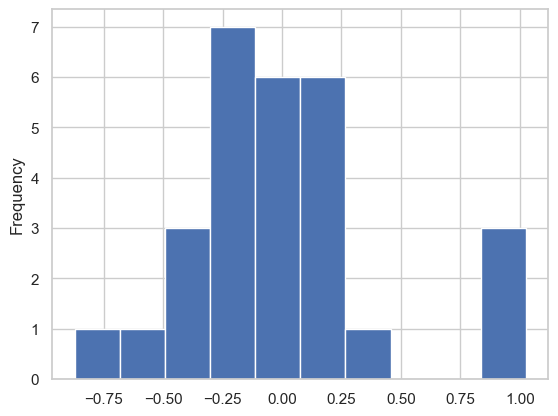

In [1323]:
face_task_data[face_task_data["counterbalance"] == "line"].recall_diff.plot(kind="hist")

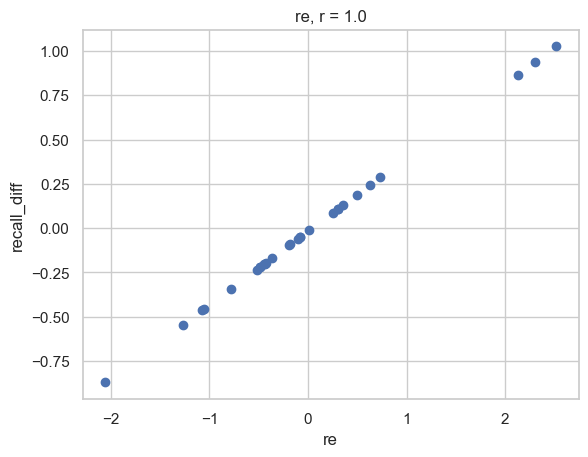

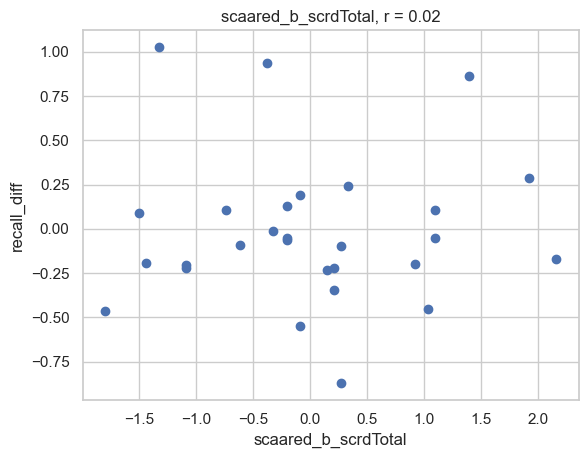

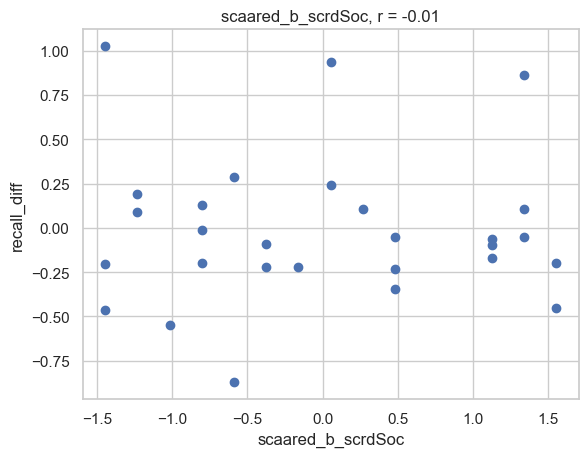

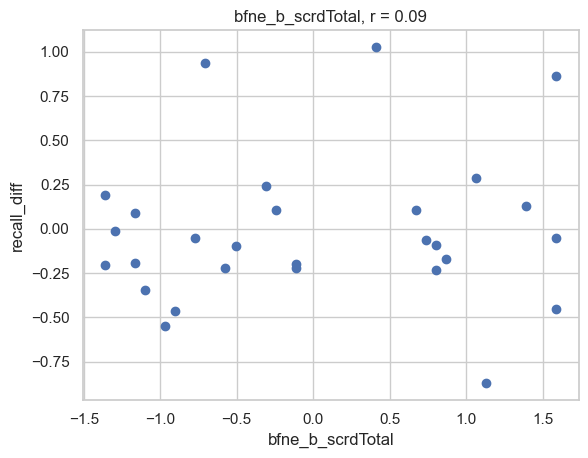

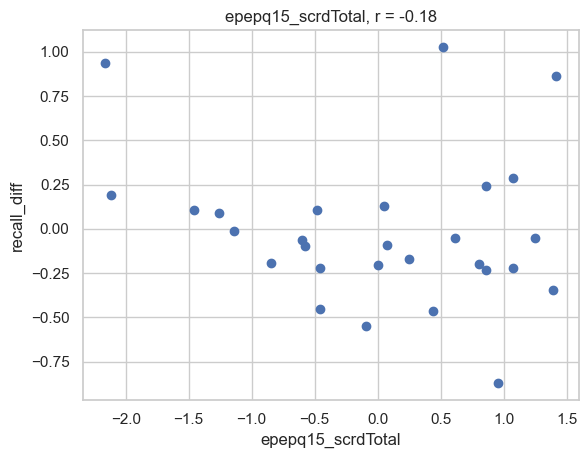

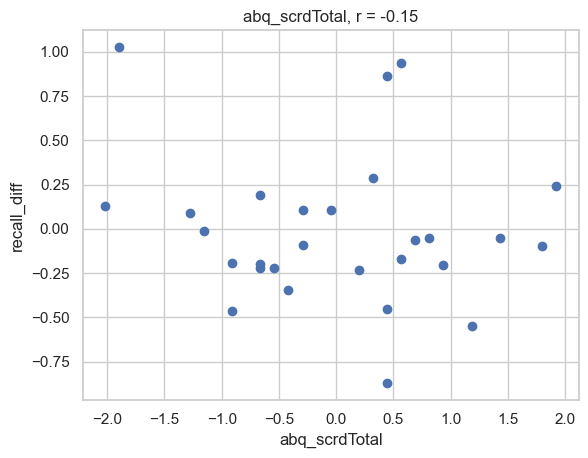

In [1314]:
cb = "line"
corr_data = face_task_data[face_task_data["counterbalance"] == cb][\
[
"recall_diff",
"scaared_b_scrdTotal_s1_r1_e1", "scaared_b_scrdSoc_s1_r1_e1",
"bfne_b_scrdTotal_s1_r1_e1", "epepq15_scrdTotal_s1_r1_e1",
"abq_scrdTotal_s1_r1_e1", 
]
].dropna(subset = "recall_diff")

for col in corr_data:
    r_corr = stats.pearsonr(corr_data.recall_diff, corr_data[col])[0]
    plt.scatter(stats.zscore(corr_data[col]), corr_data.recall_diff)
    plt.title(col[:-9] + ", r = {}".format(round(r_corr, 2)))
    plt.ylabel("recall_diff")
    plt.xlabel(col[:-9])
    plt.show()

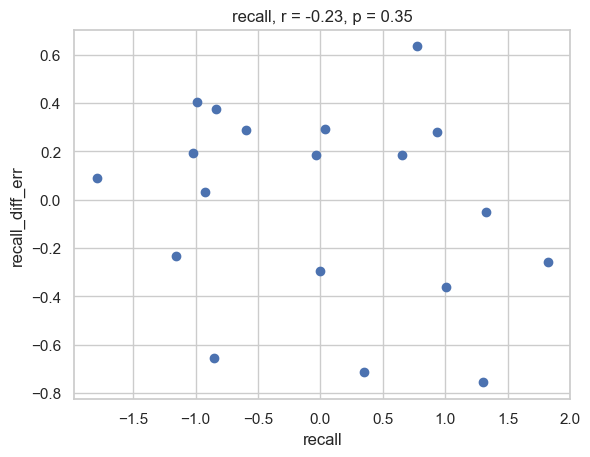

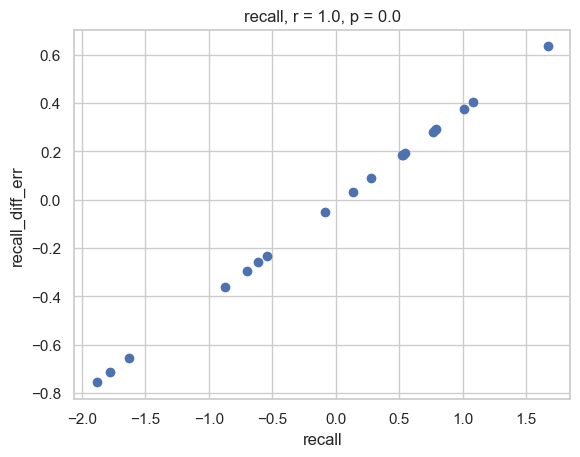

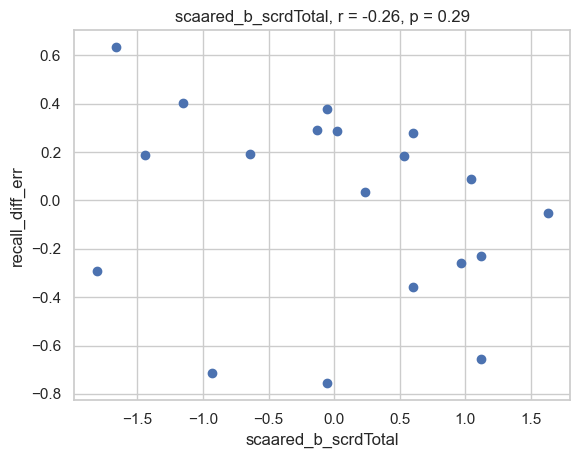

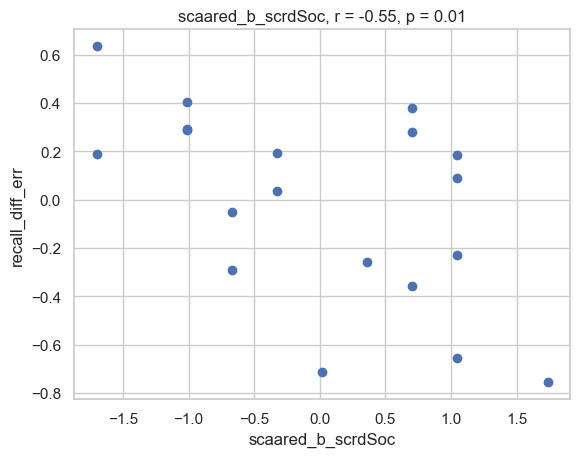

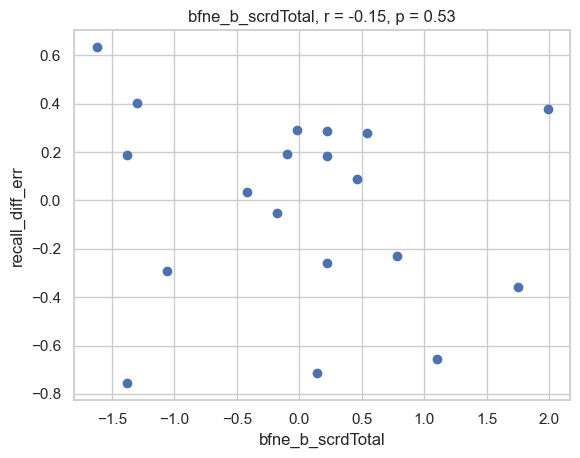

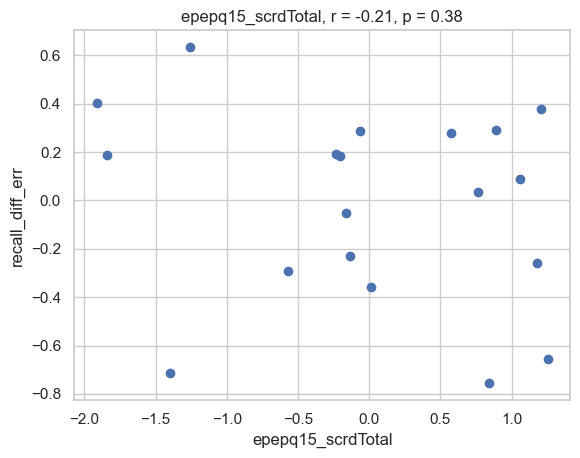

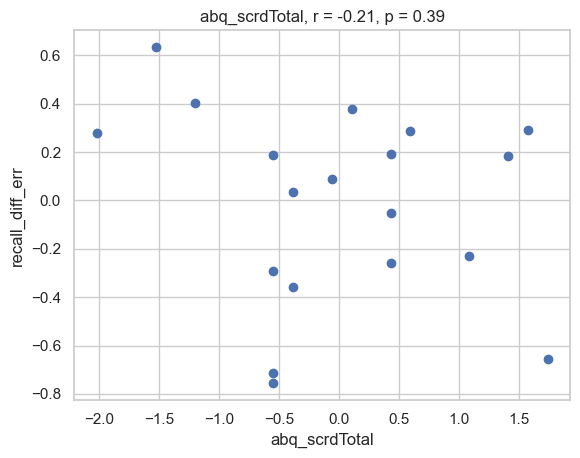

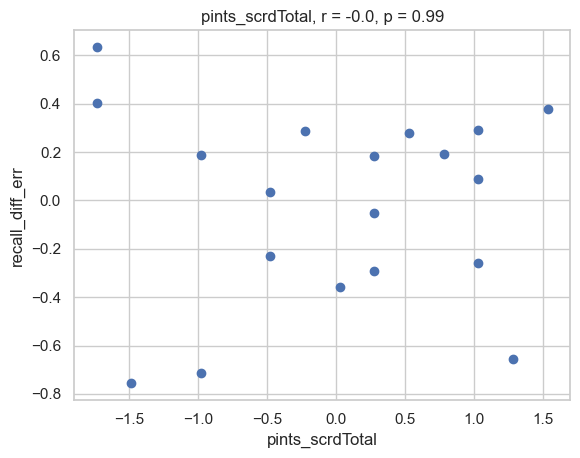

In [61]:
cb = "circle"
corr_data = face_task_data[face_task_data["counterbalance"] == cb][\
[
"recall_diff_con", "recall_diff_err",
"scaared_b_scrdTotal_s1_r1_e1", "scaared_b_scrdSoc_s1_r1_e1",
"bfne_b_scrdTotal_s1_r1_e1", "epepq15_scrdTotal_s1_r1_e1",
"abq_scrdTotal_s1_r1_e1",  'pints_scrdTotal_s1_r1_e1',
]
].dropna(subset = "recall_diff_err")

for col in corr_data:
    r_corr, p_val = stats.pearsonr(corr_data["recall_diff_err"], corr_data[col])
    plt.scatter(stats.zscore(corr_data[col]), corr_data["recall_diff_err"])
    plt.title(col[:-9] + ", r = {}, p = {}".format(round(r_corr, 2), round(p_val, 2),))
    plt.ylabel("recall_diff_err")
    plt.xlabel(col[:-9])
    plt.show()

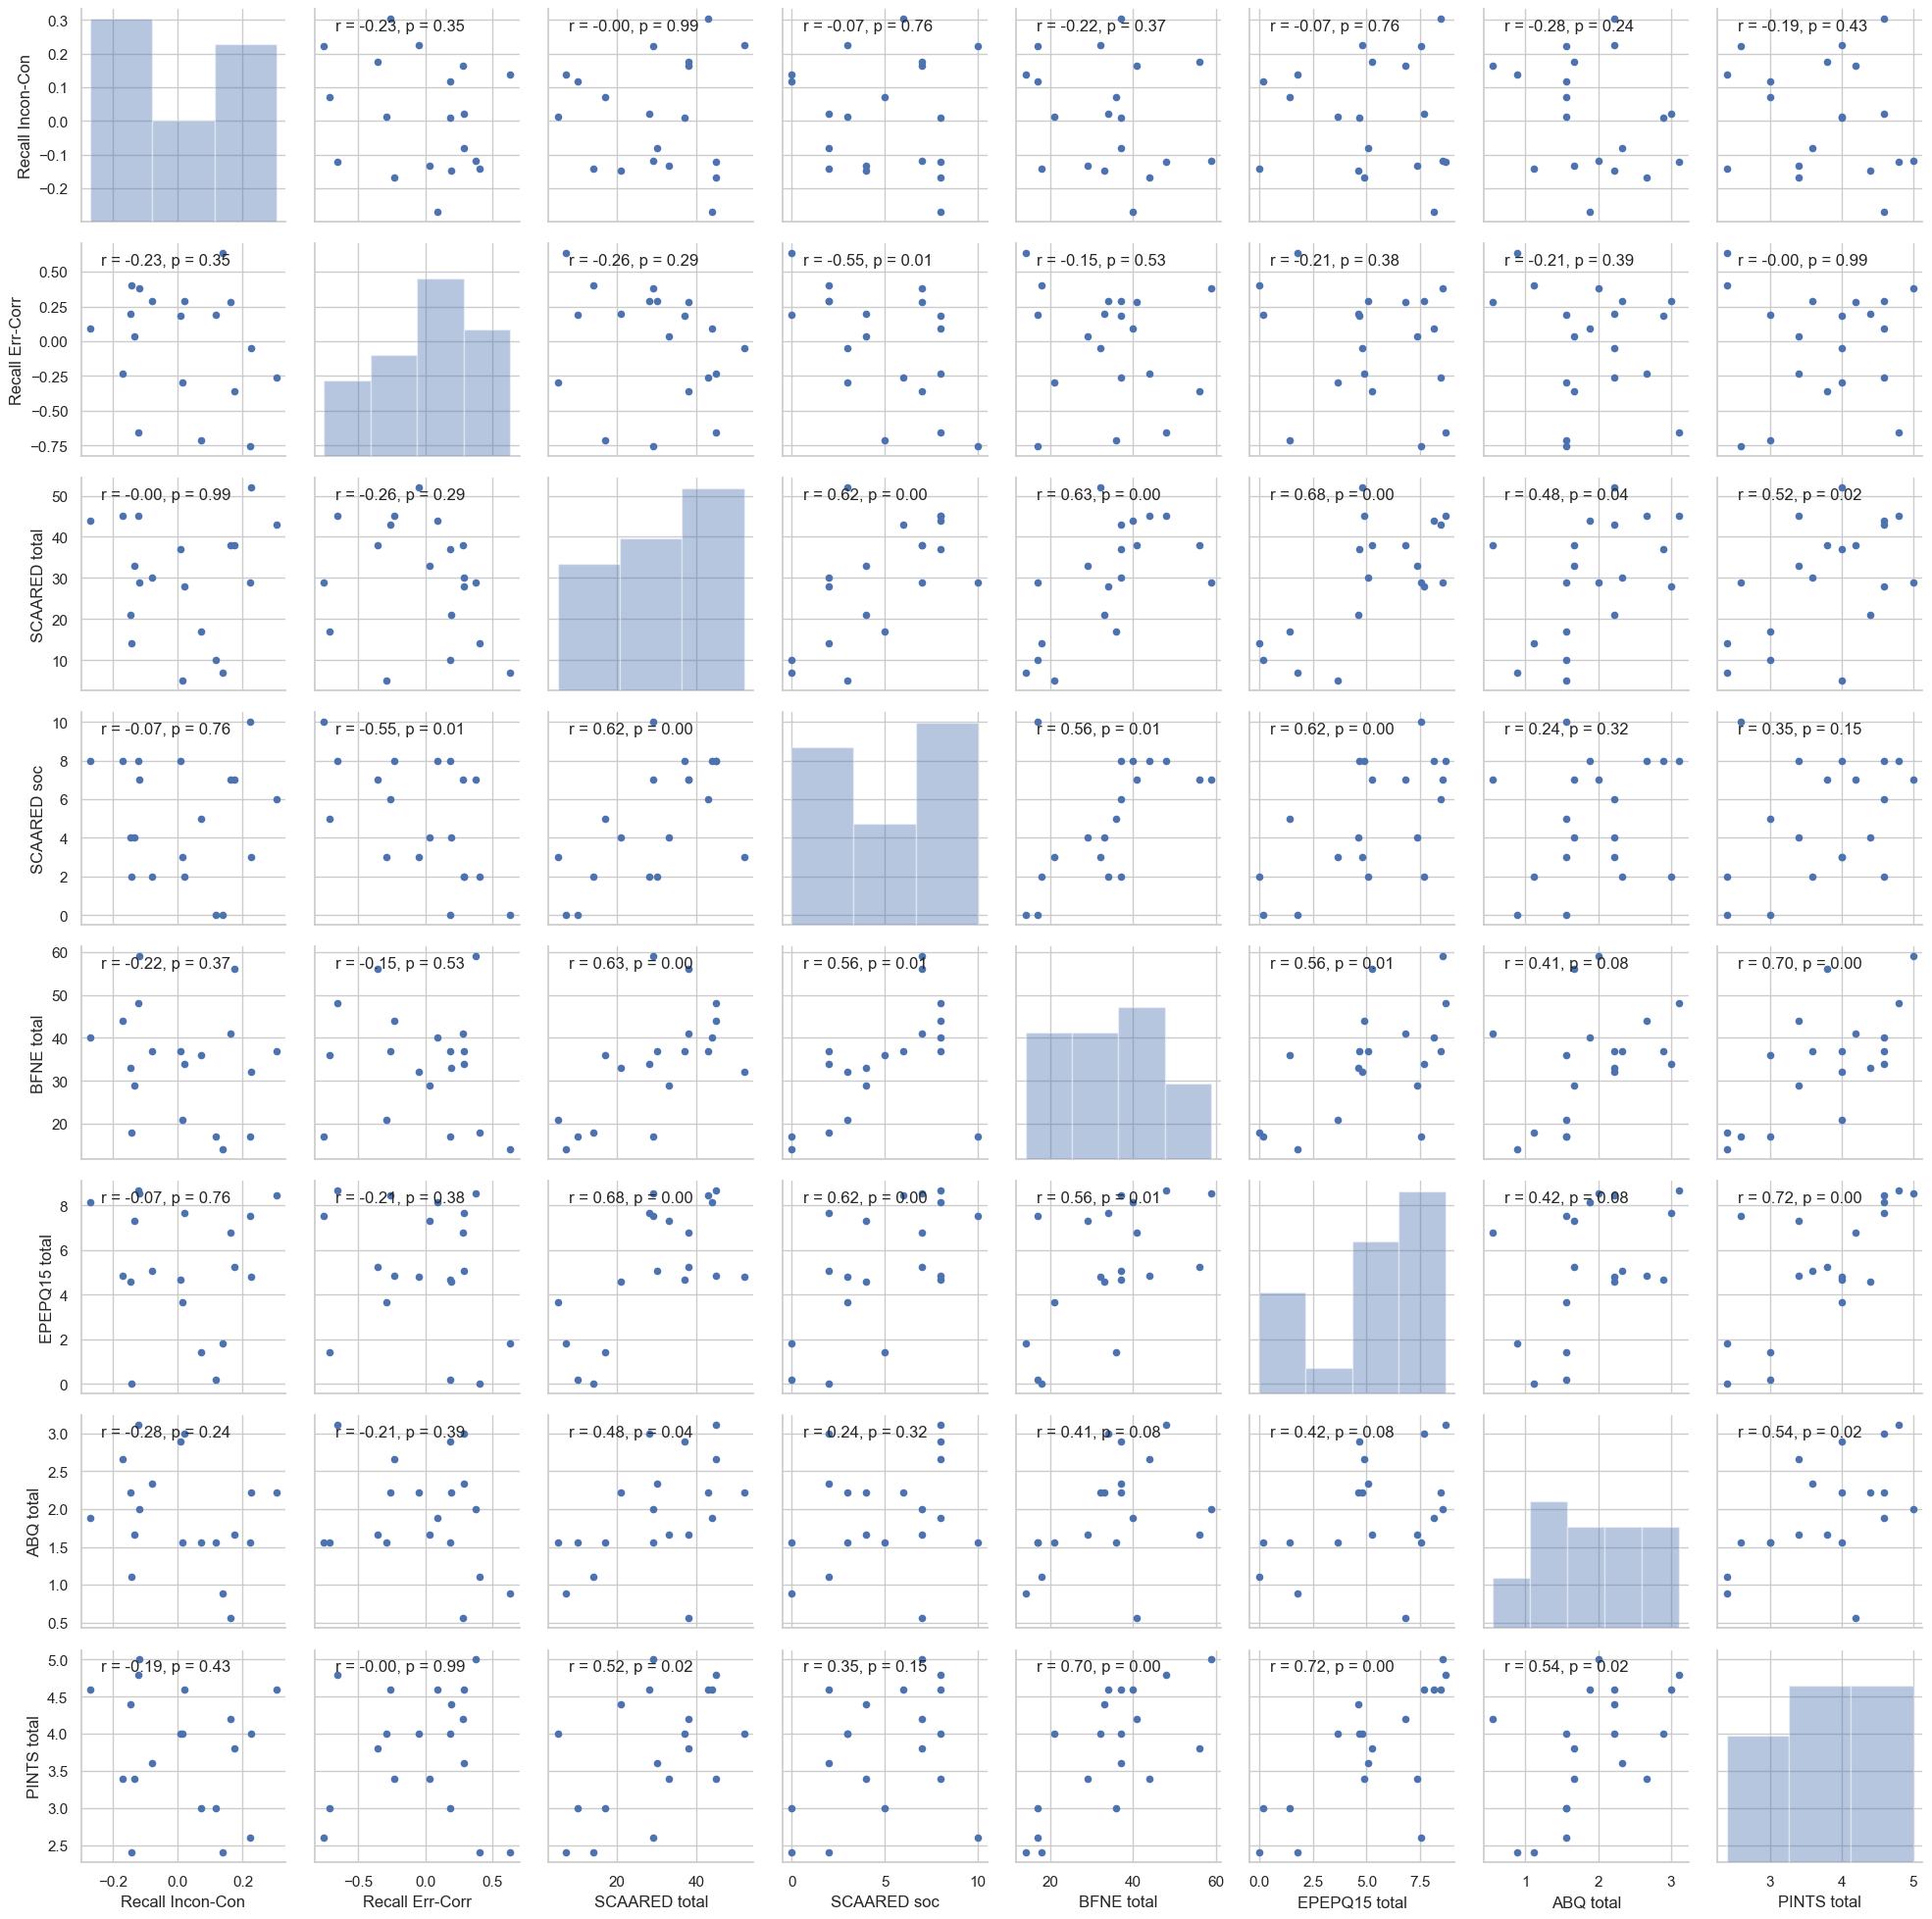

In [62]:
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
sns.set(style="whitegrid")


pic_name = "corr_matrix.png"
def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}, p = {:.2f}".format(r, p),
                xy=(.1, .9), xycoords=ax.transAxes)


colnames_dict = dict(
    {
"recall_diff_con": "Recall Incon-Con",
"recall_diff_err": "Recall Err-Corr",
"scaared_b_scrdTotal_s1_r1_e1": "SCAARED total",
"scaared_b_scrdSoc_s1_r1_e1": "SCAARED soc",
"bfne_b_scrdTotal_s1_r1_e1": "BFNE total",
"epepq15_scrdTotal_s1_r1_e1": "EPEPQ15 total",
"abq_scrdTotal_s1_r1_e1": "ABQ total",
"pints_scrdTotal_s1_r1_e1": "PINTS total"
}
)

corr_data.rename(columns=colnames_dict, inplace=True)

g = sns.PairGrid(corr_data, palette=["red"])
g.map_upper(plt.scatter, s=20)
g.map_diag(sns.distplot, kde=False)
g.map_lower(plt.scatter, s=20)
g.map_lower(corrfunc)
g.map_upper(corrfunc)

# Add scales and tick labels to only the margin plots
# for i, ax in enumerate(g.axes.flatten()):
#     row, col = divmod(i, g.axes.shape[1])
#     if row == 0:  # Top row
#         ax.tick_params(labeltop=True)
#     if col == g.axes.shape[1] - 1:  # Right column
#         ax.tick_params(labelright=True)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1285]:
face_task_data[face_task_data["counterbalance"] == cb][\
[
"recall_diff",
"scaared_b_scrdTotal_s1_r1_e1", "scaared_b_scrdSoc_s1_r1_e1",
"bfne_b_scrdTotal_s1_r1_e1", "epepq15_scrdTotal_s1_r1_e1",
"abq_scrdTotal_s1_r1_e1", 
]
]

recall_diff  scaared_b_scrdTotal_s1_r1_e1  scaared_b_scrdSoc_s1_r1_e1  \
sub                                                                             
280069    -0.012821                          29.0                         3.0   
280070     0.087058                           9.0                         1.0   
280071    -0.464406                           4.0                         0.0   
280072    -0.062127                          31.0                        12.0   
280073          NaN                           7.0                         3.0   
280074    -0.171269                          71.0                        12.0   
280075    -0.200917                          50.0                        14.0   
280076    -0.219706                          16.0                         6.0   
280077     0.106250                          22.0                         8.0   
280078    -0.871487                          39.0                         4.0   
280079    -0.234177                          37.0                         9.0   
280080    -0.092413                          24.0                         5.0   
280081    -0.097210                          39.0                        12.0   
280082          NaN                          47.0                        11.0   
280083    -0.195578                          10.0                         3.0   
280084     0.864658                          58.0                        13.0   
280085    -0.220865                          38.0                         5.0   
280086    -0.342803                          38.0                         9.0   
280087    -0.050000                          31.0                         9.0   
280088     0.106718                          53.0                        13.0   
280089     0.938095                          28.0                         7.0   
280090     0.128039                          31.0                         3.0   
280095    -0.051724                          53.0                        13.0   
280096     1.025714                          12.0                         0.0   
280098    -0.205474                          16.0                         0.0   
280099     0.189223                          33.0                         1.0   
280100     0.241819                          40.0                         7.0   
280101    -0.546389                          33.0                         2.0   
280105     0.286550                          67.0                         4.0   
280108    -0.454660                          52.0                        14.0   

        bfne_b_scrdTotal_s1_r1_e1  epepq15_scrdTotal_s1_r1_e1  \
sub                                                             
280069                       14.0                    2.933333   
280070                       16.0                    2.600000   
280071                       20.0                    7.266667   
280072                       45.0                    4.400000   
280073                       18.0                    3.000000   
280074                       47.0                    6.733333   
280075                       32.0                    8.266667   
280076                       32.0                    4.800000   
280077                       30.0                    4.733333   
280078                       51.0                    8.666667   
280079                       46.0                    8.400000   
280080                       46.0                    6.266667   
280081                       26.0                    4.466667   
280082                       53.0                    8.866667   
280083                       16.0                    3.733333   
280084                       58.0                    9.933333   
280085                       25.0                    9.000000   
280086                       17.0                    9.866667   
280087                       22.0                    7.733333   
280088                       44.0                 

In [871]:
face_task_data[face_task_data["counterbalance"] == "line"]\
[["recall_rt", "recall_rt_std", "skipped_recall"]].mean()

recall_rt         2.136444
recall_rt_std     0.596782
skipped_recall    8.772727
dtype: float64

In [831]:
data.dropna(subset="prime").recall.isna().sum()

10

In [792]:
mean_err = np.nanmean(face_task_data.recall_err)
std_err = face_task_data.recall_err.std() 
mean_corr = face_task_data.recall_corr.mean()
std_corr = face_task_data.recall_corr.std() 

In [801]:
face_task_clean = \
face_task_data[(face_task_data["recall_err"] < mean_err + 3*std_err) &\
(face_task_data["recall_err"] > mean_err - 3*std_err)]

face_task_clean = \
face_task_clean[(face_task_clean["recall_corr"] < mean_corr + 3*std_corr) &\
(face_task_clean["recall_corr"] > mean_corr - 3*std_corr)]

In [802]:
face_task_clean

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   0.891688    0.984925      0.797980     0.346703       0.428743   
1   0.919571    0.951613      0.887701     0.459654       0.498319   
2   0.905371    1.000000      0.806283     0.381120       0.519526   
3   0.913747    1.000000      0.819209     0.430544       0.526271   
5   0.834184    0.927835      0.742424     0.365944       0.437918   
6   0.982097    1.000000      0.964286     0.424645       0.467078   
7   0.946292    0.989848      0.902062     0.417086       0.458002   
8   0.914948    0.984375      0.846939     0.422420       0.500345   
10  0.927273    1.000000      0.849462     0.436787       0.523959   
11  0.856423    1.000000      0.712121     0.344904       0.419205   
12  0.946701    1.000000      0.892857     0.399349       0.464593   
14  0.904393    1.000000      0.803191     0.390824       0.505804   
15  0.961637    0.979798      0.943005     0.427937       0.495817   
16  0.902375    0.904255      0.900524     0.451015       0.457020   
17  0.893733    0.977778      0.812834     0.413840       0.529802   
18  0.833753    0.970000      0.695431     0.360396       0.426524   
19  0.877500    0.995000      0.760000     0.379143       0.451966   
20  0.981912    1.000000      0.963351     0.436728       0.515533   
21  0.895141    0.989848      0.798969     0.421072       0.498837   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  skipped_recall  ...  \
0       0.403931        0.329822           3   0.677868               6  ...   
1       0.498377        0.423409          27   0.538515               3  ...   
2            NaN        0.364008           9   0.751941               2  ...   
3            NaN        0.448091          29   1.771863              22  ...   
5       0.436577        0.359044           8   0.670820               2  ...   
6            NaN        0.464946           9   0.919391               5  ...   
7       0.405182        0.409398           9   0.746958               5  ...   
8       0.383923        0.413695          12   0.775912              11  ...   
10           NaN        0.472962          15   0.879153               1  ...   
11           NaN        0.359090           3   1.142224              13  ...   
12           NaN        0.371060           6   1.440364              15  ...   
14           NaN        0.382011          13   1.510684               6  ...   
15      0.426940        0.437321           9   1.062372               4  ...   
16      0.379296        0.378960          21   0.923141              15  ...   
17      0.429932        0.394538          33   1.081956              19  ...   
18      0.323474        0.337007           3   0.951568               6  ...   
19      0.346475        0.350857           0   1.737347               7  ...   
20           NaN        0.424021          13   1.446367               9  ...   
21      0.357831        0.413529           9   1.241129               2  ...   

    recall_incon_L  recall_incon_R  recall_L  recall_R         1         2  \
0         3.209877        3.840000  3.306533  3.813472  0.040816  0.173469   
1         3.483516        3.916667  3.410000  3.900000  0.016216  0.289189   
2         3.611940        3.686047  3.620000  3.693122  0.041131  0.182519   
3         3.628571        3.323077  3.679775  3.339181  0.094556  0.194842   
5         3.394737        4.028169  3.371728  3.829146  0.092308  0.200000   
6         3.172414        3.760000  3.171123  3.809045  0.033679  0.183938   
7         3.180723        3.662921  3.328125  3.567010  0.155440  0.095855   
8         2.985714        4.066667  2.950920  4.154206  0.031830  0.323607   
10        3.903614        3.546667  3.787565  3.328125  0.090909  0.205195   
11        3.492308        3.705882  3.432990  3.700000  0.007812  0.098958   
12        3.770115        3.560976  3.736842  3.486772  0.081794  0.197889   
14        3.532468        3.700000  3.727273  3.793814  0.141732  0.

In [1137]:
face_task_data

sub    fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   280069  0.891688    0.984925      0.797980     0.346703       0.428743   
1   280070  0.919571    0.951613      0.887701     0.459654       0.498319   
2   280071  0.905371    1.000000      0.806283     0.381120       0.519526   
3   280072  0.913747    1.000000      0.819209     0.430544       0.526271   
4   280073  0.989924    1.000000      0.979798     0.404778       0.434053   
5   280074  0.834184    0.927835      0.742424     0.365944       0.437918   
6   280075  0.982097    1.000000      0.964286     0.424645       0.467078   
7   280076  0.946292    0.989848      0.902062     0.417086       0.458002   
8   280077  0.914948    0.984375      0.846939     0.422420       0.500345   
9   280078  0.894602    0.984772      0.802083     0.410077       0.492388   
10  280079  0.927273    1.000000      0.849462     0.436787       0.523959   
11  280080  0.856423    1.000000      0.712121     0.344904       0.419205   
12  280081  0.946701    1.000000      0.892857     0.399349       0.464593   
13  280082  0.979798    0.989848      0.969849     0.379836       0.481469   
14  280083  0.904393    1.000000      0.803191     0.390824       0.505804   
15  280084  0.961637    0.979798      0.943005     0.427937       0.495817   
16  280085  0.902375    0.904255      0.900524     0.451015       0.457020   
17  280086  0.893733    0.977778      0.812834     0.413840       0.529802   
18  280087  0.833753    0.970000      0.695431     0.360396       0.426524   
19  280088  0.877500    0.995000      0.760000     0.379143       0.451966   
20  280089  0.981912    1.000000      0.963351     0.436728       0.515533   
21  280090  0.895141    0.989848      0.798969     0.421072       0.498837   
22  280091  0.917526    0.984615      0.849741     0.423530       0.508047   
23  280092  0.992405    1.000000      0.984772     0.399920       0.463682   
24  280093  0.905128    0.989474      0.825000     0.401448       0.468025   
25  280094  0.954774    0.985000      0.924242     0.418912       0.469392   
26  280095  0.761236    0.856354      0.662857     0.406260       0.451170   
27  280096  0.958869    1.000000      0.916667     0.387822       0.511284   
28  280097  0.925641    1.000000      0.848958     0.408057       0.490085   
29  280098  0.915167    1.000000      0.828125     0.376070       0.440596   
30  280099  0.961637    1.000000      0.922280     0.399484       0.503569   
31  280100  0.893855    0.983516      0.801136     0.443849       0.531937   
32  280101  0.819484    0.786517      0.853801     0.479798       0.485886   
33  280102  0.812169    0.912371      0.706522     0.420107       0.495017   
34  280103  0.835052    0.993506      0.656934     0.437084       0.508113   
35  280104  0.926582    1.000000      0.851282     0.365484       0.450627   
36  280105  0.950904    1.000000      0.900000     0.408480       0.492577   
37  280106  0.978320    1.000000      0.954023     0.463470       0.567171   
38  280107  0.945596    0.958333      0.932990     0.442903       0.450902   
39  280108  0.859694    0.994975      0.720207     0.374256       0.500808   
40  280109  0.876923    0.994949      0.755208     0.377812       0.497026   
41  280110  0.928753    1.000000      0.855670     0.376154       0.467397   
42  280111  0.837321    0.931373      0.747664     0.471191       0.528464   
43  280112  0.966495    0.994898      0.937500     0.426933       0.479855   
44  280113  0.740351    0.796053      0.676692     0.515137       0.526104   
45  280114  0.748691    0.989637      0.502646     0.355219       0.442409   
46  280115  0.831135    0.874346      0.787234     0.384891       0.442615   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  ...         4  \
0       0.403931        0.329822           3   1.677868  ...  0.278061   
1       0.498377        0.423409          27   1.538515  ...  0.194595   
2            NaN        0.364008        

In [525]:
err_inds = []
for i in range(len(trial_data)):
    if i > 1:
        if trial_data.acc[i] == 0 and trial_data.congruent[i] == 0:
            err_inds.append(i)

error_data = trial_data.iloc[sorted([i-1 for i in err_inds] + err_inds)]
error_data[error_data["congruent"] == 0]

target  acc  congruent     fl_rt  recall_rt prime  recall recall_cat
5     left  0.0        0.0  0.314353   0.356295     R     2.0       diff
21    left  0.0        0.0  0.499048   1.100774     R     2.0       diff
26   right  1.0        0.0  0.296350   1.206083     L     6.0       same
27    left  0.0        0.0  0.480905   0.323593     L     5.0       same
27    left  0.0        0.0  0.480905   0.323593     L     5.0       same
28    left  0.0        0.0  0.222229   0.311757     R     2.0       diff
29   right  1.0        0.0  0.503933   2.021633     R     5.0       same
30    left  0.0        0.0  0.657529   1.359919     L     4.0       same
32   right  1.0        0.0  0.422533   2.236817     R     2.0       diff
33    left  0.0        0.0  0.275416   0.436033     L     4.0       same
36    left  1.0        0.0  0.540795   2.060881     R     1.0       diff
37    left  0.0        0.0  0.544063   0.962954     R     5.0       same
37    left  0.0        0.0  0.544063   0.962954     R     5.0       same
38    left  0.0        0.0  0.494394   0.849152     L     5.0       same
48   right  1.0        0.0  0.577992   0.872798     R     3.0       diff
49    left  0.0        0.0  0.313973   2.169491     L     2.0       diff
55    left  0.0        0.0  0.455983   0.839855     L     3.0       diff
55    left  0.0        0.0  0.455983   0.839855     L     3.0       diff
56   right  0.0        0.0  0.363590   1.920269     R     4.0       same
56   right  0.0        0.0  0.363590   1.920269     R     4.0       same
57    left  0.0        0.0  0.477136   1.603830     R     3.0       diff
64   right  0.0        0.0  0.410114   0.769139     R     2.0       diff
76    left  0.0        0.0  0.442855   2.107326     L     4.0       same
79    left  0.0        0.0  0.459483   1.628121     R     3.0       diff
84   right  0.0        0.0  0.456179   0.776906     L     4.0       same
85    left  1.0        0.0  0.589438   0.307553     L     4.0       same
86    left  0.0        0.0  0.354186   0.786421     R     3.0       diff
108  right  1.0        0.0  0.468711   1.157305     R     4.0       same
109   left  0.0        0.0  0.389869   1.346572     R     2.0       diff
119  right  0.0        0.0  0.350106   1.077155     R     3.0       diff
132   left  0.0        0.0  0.405084   1.233322     R     1.0       diff
147   left  0.0        0.0  0.376703   1.373838     R     1.0       diff
174   left  0.0        0.0  0.384082   0.268355     R     4.0       same
175  right  1.0        0.0  0.509034   0.356891     L     3.0       diff
176   left  0.0        0.0  0.430003   0.783947     L     4.0       same
181  right  1.0        0.0  0.451264   1.763229     L     6.0       same
182   left  0.0        0.0  0.462771   0.384919     L     4.0       same
192   left  0.0        0.0  0.409165   0.707802     L     3.0       diff
240   left  0.0        0.0  0.337050   0.814098     R     1.0       diff
257  right  1.0        0.0  0.460460   1.185222     L     6.0       same
258   left  0.0        0.0  0.363738   1.708856     L     5.0       same
259   left  1.0        0.0  0.496933   2.196383     R     4.0       same
260   left  0.0        0.0  0.381157   0.979488     L     5.0       same
265   left  0.0        0.0  0.465053   0.253151     R     3.0       diff
268   left  0.0        0.0  0.298263   1.135675     R     3.0       diff
268   left  0.0        0.0  0.298263   1.135675     R     3.0       diff
269   left  0.0        0.0  0.348979   0.880303     L     2.0       diff
272  right  1.0        0.0  0.545389   1.315300     L     4.0       same
273   left  0.0        0.0  0.313029   1.868947     L     2.0       diff
301   left  0.0        0.0  0.369832   1.788213     R     1.0       diff
313   left  0.0        0.0  0.366233   1.843045     R     2.0       diff
345   left  0.0        0.0  0.428196   1.483155     L     5.0       same
377  right  1.0        0.0  0.518673   1.183143     R     2.0       diff
378   left  0.0        0.0  0.425501   2.337251     L     3.0 

<Axes: xlabel='recall', ylabel='count'>

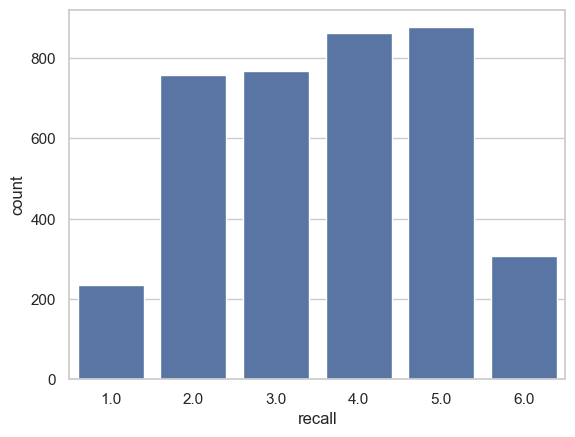

In [480]:
pic_name = "response_counts.png"

path_pic = "/Users/fzaki001/Documents/DA/wme-face/"
sns.barplot(value_counts)
# plt.savefig(path_pic + "{}".format(pic_name))

In [1031]:
face_task_data

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   0.891688    0.984925      0.797980     0.346703       0.428743   
1   0.919571    0.951613      0.887701     0.459654       0.498319   
2   0.905371    1.000000      0.806283     0.381120       0.519526   
3   0.913747    1.000000      0.819209     0.430544       0.526271   
4   0.989924    1.000000      0.979798     0.404778       0.434053   
5   0.834184    0.927835      0.742424     0.365944       0.437918   
6   0.982097    1.000000      0.964286     0.424645       0.467078   
7   0.946292    0.989848      0.902062     0.417086       0.458002   
8   0.914948    0.984375      0.846939     0.422420       0.500345   
9   0.894602    0.984772      0.802083     0.410077       0.492388   
10  0.927273    1.000000      0.849462     0.436787       0.523959   
11  0.856423    1.000000      0.712121     0.344904       0.419205   
12  0.946701    1.000000      0.892857     0.399349       0.464593   
13  0.979798    0.989848      0.969849     0.379836       0.481469   
14  0.904393    1.000000      0.803191     0.390824       0.505804   
15  0.961637    0.979798      0.943005     0.427937       0.495817   
16  0.902375    0.904255      0.900524     0.451015       0.457020   
17  0.893733    0.977778      0.812834     0.413840       0.529802   
18  0.833753    0.970000      0.695431     0.360396       0.426524   
19  0.877500    0.995000      0.760000     0.379143       0.451966   
20  0.981912    1.000000      0.963351     0.436728       0.515533   
21  0.895141    0.989848      0.798969     0.421072       0.498837   
22  0.917526    0.984615      0.849741     0.423530       0.508047   
23  0.992405    1.000000      0.984772     0.399920       0.463682   
24  0.905128    0.989474      0.825000     0.401448       0.468025   
26  0.761236    0.856354      0.662857     0.406260       0.451170   
27  0.958869    1.000000      0.916667     0.387822       0.511284   
28  0.925641    1.000000      0.848958     0.408057       0.490085   
29  0.915167    1.000000      0.828125     0.376070       0.440596   
30  0.961637    1.000000      0.922280     0.399484       0.503569   
31  0.893855    0.983516      0.801136     0.443849       0.531937   
32  0.819484    0.786517      0.853801     0.479798       0.485886   
33  0.812169    0.912371      0.706522     0.420107       0.495017   
35  0.926582    1.000000      0.851282     0.365484       0.450627   
36  0.950904    1.000000      0.900000     0.408480       0.492577   
38  0.945596    0.958333      0.932990     0.442903       0.450902   
39  0.859694    0.994975      0.720207     0.374256       0.500808   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  recall_rt_std  ...  \
0       0.403931        0.329822           3   1.677868       0.600267  ...   
1       0.498377        0.423409          27   1.538515       0.479084  ...   
2            NaN        0.364008           9   1.751941       0.627172  ...   
3            NaN        0.448091          29   2.771863       0.545132  ...   
4            NaN        0.339864           3   2.866214       0.528887  ...   
5       0.436577        0.359044           8   1.670820       0.451703  ...   
6            NaN        0.464946           9   1.919391       0.612219  ...   
7       0.405182        0.409398           9   1.746958       0.584287  ...   
8       0.383923        0.413695          12   1.775912       0.578217  ...   
9       0.337532        0.408409          11   2.342726       0.577492  ...   
10           NaN        0.472962          15   1.879153       0.558935  ...   
11           NaN        0.359090           3   2.142224       0.750708  ...   
12           NaN        0.371060           6   2.440364       0.699103  ...   
13      0.410772        0.348937           4   2.523256       0.542050  ...   
14           NaN        0.382011          13   2.510684       0.638942  ...   
15      0.426940        0.437321           9   2.062372       0.629623  ...   
16

In [1032]:
face_task_data["high_bias"] = [1 if i > np.median(face_task_data["recall_corr"]) else 0 for i in face_task_data["recall_corr"]]

In [329]:
trial_data.loc[trial_data["prime"] == "L", "recall"]

4      2.0
9      3.0
14     2.0
17     5.0
18     3.0
      ... 
382    3.0
384    5.0
385    1.0
387    5.0
388    4.0
Name: recall, Length: 191, dtype: float64

In [330]:
trial_data[trial_data["prime"] == "L"]

target  acc  congruent     fl_rt  recall_rt prime  recall recall_cat
4    right  1.0        1.0  0.386132   0.357374     L     2.0       diff
9    right  1.0        1.0  0.347248   0.249660     L     3.0       diff
14   right  1.0        0.0  0.452136   0.351087     L     2.0       diff
17    left  1.0        0.0  0.474507   2.754176     L     5.0       same
18   right  1.0        1.0  0.406104   0.377281     L     3.0       diff
..     ...  ...        ...       ...        ...   ...     ...        ...
382  right  1.0        1.0  0.408459   0.588173     L     3.0       diff
384   left  1.0        1.0  0.328883   1.058859     L     5.0       same
385  right  1.0        1.0  0.316007   0.244324     L     1.0       diff
387   left  1.0        0.0  0.391605   0.157468     L     5.0       same
388  right  1.0        1.0  0.390201   0.202704     L     4.0       same

[191 rows x 8 columns]

In [1003]:
face_task_data = face_task_data[(face_task_data["skipped_fl"] < 100) & (face_task_data["skipped_recall"] < 100)]

In [ ]:
face_

In [969]:
face_task_data[
[
    "fl_acc",
    "skipped_fl",
    "skipped_recall",
    "counterbalance",
]
]

fl_acc  skipped_fl  skipped_recall counterbalance
0   0.891688           3               6           line
1   0.919571          27               3           line
2   0.905371           9               2           line
3   0.913747          29              22           line
4   0.989924           3               9           line
5   0.834184           8               2           line
6   0.982097           9               5           line
7   0.946292           9               5           line
8   0.914948          12              11           line
9   0.894602          11               8           line
10  0.927273          15               1           line
11  0.856423           3              13           line
12  0.946701           6              15           line
13  0.979798           4              23           line
14  0.904393          13               6           line
15  0.961637           9               4           line
16  0.902375          21              15           line
17  0.893733          33              19           line
18  0.833753           3               6           line
19  0.877500           0               7           line
20  0.981912          13               9           line
21  0.895141           9               2           line
22  0.917526          12              10         circle
23  0.992405           5              20         circle
24  0.905128          10               9         circle
25  0.954774           2             115         circle
26  0.761236          34              11           line
27  0.958869          11               6           line
28  0.925641          10              22         circle
29  0.915167          11               6           line
30  0.961637           9              20           line
31  0.893855          42              15           line
32  0.819484          48              11           line
33  0.812169          22               1         circle
34  0.835052         108              33           line
35  0.926582           5              55         circle
36  0.950904          13               1           line
37  0.978320          31             187         circle

## Plots

In [270]:
import warnings
warnings.filterwarnings("ignore")
path_pic = "/Users/fzaki001/Documents/DA/wme-face/"

<Axes: xlabel='recall', ylabel='count'>

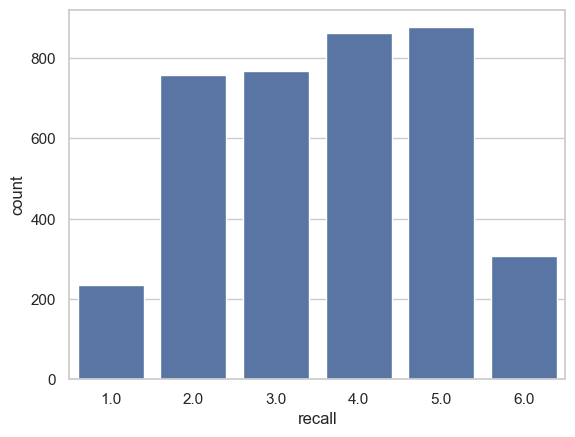

In [482]:
# pic_name = "response_counts.png"

# path = "/Users/fzaki001/Documents/DA/wme-face/"
# sns.barplot(value_counts)
# # plt.savefig(path_pic + "{}".format(pic_name))

In [1006]:
face_task_data

fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   0.891688    0.984925      0.797980     0.346703       0.428743   
1   0.919571    0.951613      0.887701     0.459654       0.498319   
2   0.905371    1.000000      0.806283     0.381120       0.519526   
3   0.913747    1.000000      0.819209     0.430544       0.526271   
4   0.989924    1.000000      0.979798     0.404778       0.434053   
5   0.834184    0.927835      0.742424     0.365944       0.437918   
6   0.982097    1.000000      0.964286     0.424645       0.467078   
7   0.946292    0.989848      0.902062     0.417086       0.458002   
8   0.914948    0.984375      0.846939     0.422420       0.500345   
9   0.894602    0.984772      0.802083     0.410077       0.492388   
10  0.927273    1.000000      0.849462     0.436787       0.523959   
11  0.856423    1.000000      0.712121     0.344904       0.419205   
12  0.946701    1.000000      0.892857     0.399349       0.464593   
13  0.979798    0.989848      0.969849     0.379836       0.481469   
14  0.904393    1.000000      0.803191     0.390824       0.505804   
15  0.961637    0.979798      0.943005     0.427937       0.495817   
16  0.902375    0.904255      0.900524     0.451015       0.457020   
17  0.893733    0.977778      0.812834     0.413840       0.529802   
18  0.833753    0.970000      0.695431     0.360396       0.426524   
19  0.877500    0.995000      0.760000     0.379143       0.451966   
20  0.981912    1.000000      0.963351     0.436728       0.515533   
21  0.895141    0.989848      0.798969     0.421072       0.498837   
22  0.917526    0.984615      0.849741     0.423530       0.508047   
23  0.992405    1.000000      0.984772     0.399920       0.463682   
24  0.905128    0.989474      0.825000     0.401448       0.468025   
26  0.761236    0.856354      0.662857     0.406260       0.451170   
27  0.958869    1.000000      0.916667     0.387822       0.511284   
28  0.925641    1.000000      0.848958     0.408057       0.490085   
29  0.915167    1.000000      0.828125     0.376070       0.440596   
30  0.961637    1.000000      0.922280     0.399484       0.503569   
31  0.893855    0.983516      0.801136     0.443849       0.531937   
32  0.819484    0.786517      0.853801     0.479798       0.485886   
33  0.812169    0.912371      0.706522     0.420107       0.495017   
35  0.926582    1.000000      0.851282     0.365484       0.450627   
36  0.950904    1.000000      0.900000     0.408480       0.492577   
38  0.945596    0.958333      0.932990     0.442903       0.450902   
39  0.859694    0.994975      0.720207     0.374256       0.500808   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  recall_rt_std  ...  \
0       0.403931        0.329822           3   1.677868       0.600267  ...   
1       0.498377        0.423409          27   1.538515       0.479084  ...   
2            NaN        0.364008           9   1.751941       0.627172  ...   
3            NaN        0.448091          29   2.771863       0.545132  ...   
4            NaN        0.339864           3   2.866214       0.528887  ...   
5       0.436577        0.359044           8   1.670820       0.451703  ...   
6            NaN        0.464946           9   1.919391       0.612219  ...   
7       0.405182        0.409398           9   1.746958       0.584287  ...   
8       0.383923        0.413695          12   1.775912       0.578217  ...   
9       0.337532        0.408409          11   2.342726       0.577492  ...   
10           NaN        0.472962          15   1.879153       0.558935  ...   
11           NaN        0.359090           3   2.142224       0.750708  ...   
12           NaN        0.371060           6   2.440364       0.699103  ...   
13      0.410772        0.348937           4   2.523256       0.542050  ...   
14           NaN        0.382011          13   2.510684       0.638942  ...   
15      0.426940        0.437321           9   2.062372       0.629623  ...   
16

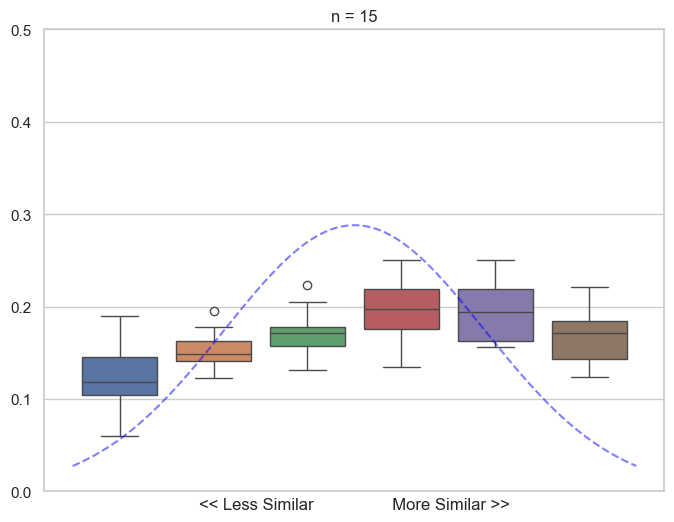

In [1253]:
# cb = "circle"
# pic_name = "{}_similarity_counts.png".format(cb)
# plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
# [1, 2, 3, 4, 5, 6]\
# ]
# sns.set(style="whitegrid")

# plt.figure(figsize=(8, 6))
# sns.boxplot(plot_data)
# plt.title("n = {}".format(len(plot_data)))
# # plt.xticks(ticks = [1, 2, 3, 4, 5, 6],
# #            labels = ["<< distractor similarity", "", "target similarity", "", "", ">> distractor similarity"])

# plt.xticks(ticks = [])
# plt.xlabel("<< Less Similar                 More Similar >>")

# # Gaussian distribution parameters
# data = np.repeat([1-1, 2-1, 3-1, 4-1, 5-1, 6-1], [1, 2, 3, 3, 2, 1]) # Adjust the frequency of each number
# mu, std = norm.fit(data) # Fit a Gaussian to this data

# # Add Gaussian distribution curve
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.ylim(0, 0.5)
# sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")

# plt.savefig(path_pic + "{}".format(pic_name))
# plt.show()

<Figure size 800x600 with 0 Axes>

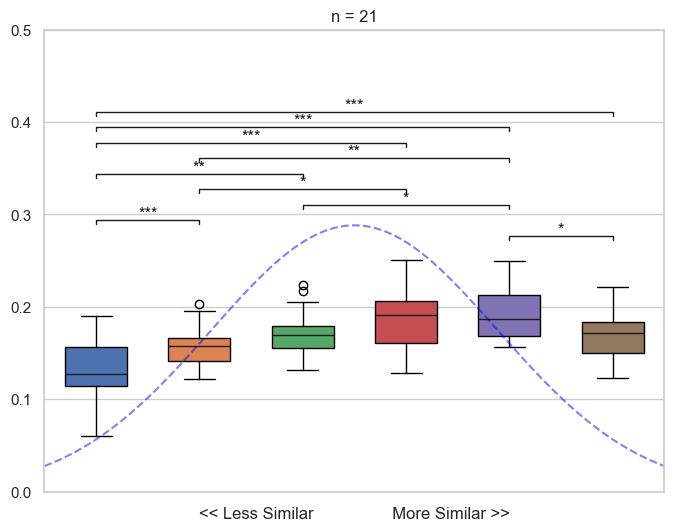

In [111]:
cb = "circle"
pic_name = "{}_similarity_counts.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
[1, 2, 3, 4, 5, 6]\
]
plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters
data = np.repeat([1, 2, 3, 4, 5, 6], [1, 2, 3, 3, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")

plt.ylim(0, .5)
plt.xticks(labels="", ticks = [1,2,3])

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

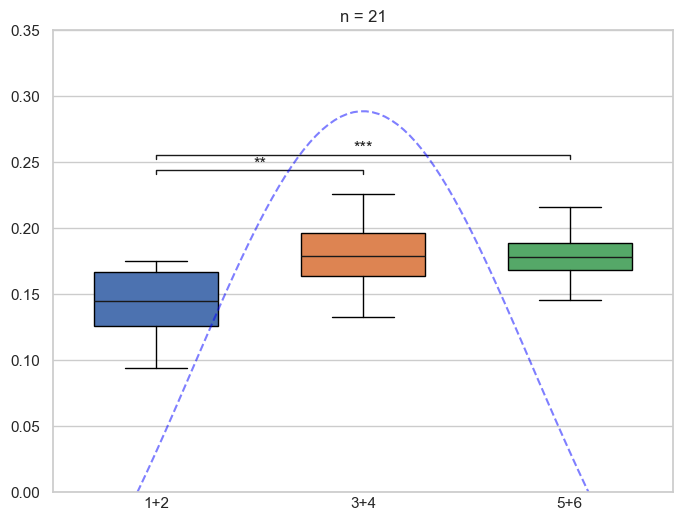

In [204]:
cb = "circle"
pic_name = "{}_similarity_counts_averaged.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
["1+2", "3+4", "5+6"]\
]
plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
# plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters
data = np.repeat([1, 2, 3], [1, 1, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p-.2, color='blue', alpha = 0.5, linestyle = "--")

plt.ylim(0, .35)
plt.xticks(labels=plot_data.columns, ticks = [1,2,3])

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

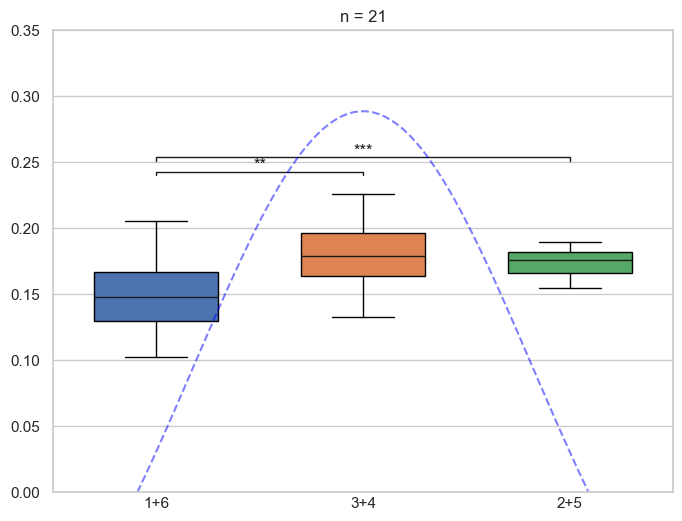

In [219]:
cb = "circle"
pic_name = "{}_similarity_counts_averaged_2.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
["1+6", "3+4", "2+5"]\
]
plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
# plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters
data = np.repeat([1, 2, 3], [1, 1, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p-.2, color='blue', alpha = 0.5, linestyle = "--")

plt.ylim(0, .35)
plt.xticks(labels=plot_data.columns, ticks = [1,2,3])

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

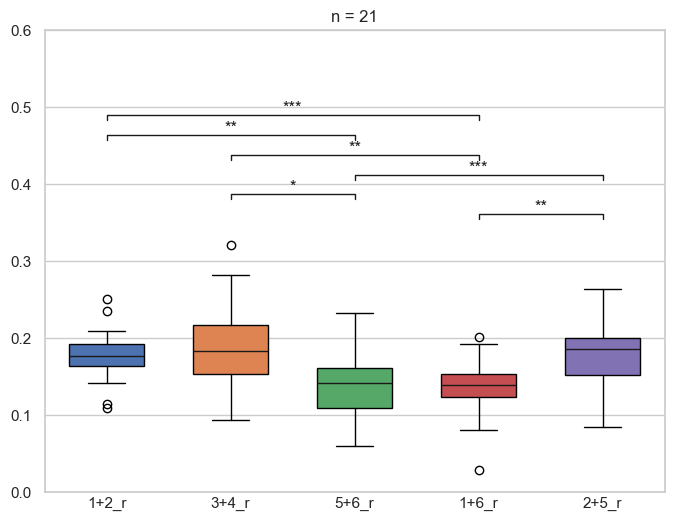

In [214]:
cb = "circle"
pic_name = "{}_response_counts_averaged.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
["1+2_r", "3+4_r", "5+6_r", "1+6_r", "2+5_r"]\
]
plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
# plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters

plt.ylim(0, .6)
plt.xticks(labels=plot_data.columns, ticks = range(1, len(plot_data.columns)+1))

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [220]:
plot_data

1+6       3+4       2+5
sub                                 
280091  0.121372  0.203166  0.175462
280092  0.133333  0.196000  0.170667
280093  0.119423  0.225722  0.154856
280097  0.118207  0.211957  0.169837
280102  0.140584  0.179045  0.180371
280104  0.168129  0.176901  0.154971
280107  0.205263  0.132895  0.161842
280109  0.135989  0.178571  0.185440
280110  0.102632  0.207895  0.189474
280112  0.171875  0.152344  0.175781
280114  0.150552  0.186464  0.162983
280115  0.167116  0.165768  0.167116
280116  0.167293  0.156015  0.176692
280117  0.127628  0.184685  0.187688
280118  0.132877  0.184932  0.182192
280136  0.154667  0.166667  0.178667
280139  0.165278  0.158333  0.176389
280140  0.169890  0.164365  0.165746
280149  0.129944  0.209040  0.161017
280150  0.147696  0.163957  0.188347
280152  0.165957  0.148936  0.185106

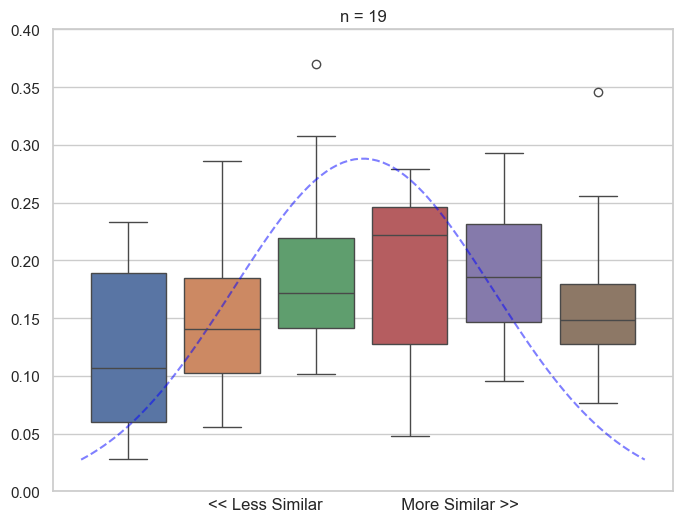

In [237]:
cb = "circle"
trial = "err"
pic_name = "{}_{}_similarity_counts.png".format(cb, trial)
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_err")[\
["1_{}".format(trial), "2_{}".format(trial), "3_{}".format(trial),
 "4_{}".format(trial), "5_{}".format(trial), "6_{}".format(trial),]\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.title("n = {}".format(len(plot_data)))
# plt.xticks(ticks = [1, 2, 3, 4, 5, 6],
#            labels = ["<< distractor similarity", "", "target similarity", "", "", ">> distractor similarity"])

plt.xticks(ticks = [])
plt.xlabel("<< Less Similar                 More Similar >>")

# Gaussian distribution parameters
data = np.repeat([1-1, 2-1, 3-1, 4-1, 5-1, 6-1], [1, 2, 3, 3, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.ylim(0, 0.4)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

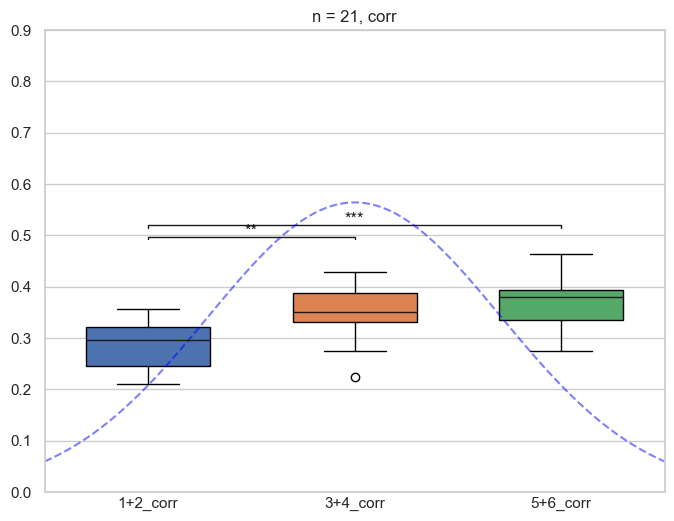

In [106]:
cb = "circle"
trial = "corr"
pic_name = "{}_{}_split_similarity_counts.png".format(cb, trial)
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_incon")[\
["1_{}".format(trial), "2_{}".format(trial), "3_{}".format(trial),
 "4_{}".format(trial), "5_{}".format(trial), "6_{}".format(trial),]\
]
plot_data["1+2_{}".format(trial)] = (plot_data["1_{}".format(trial)] + plot_data["2_{}".format(trial)])
plot_data["3+4_{}".format(trial)] = (plot_data["3_{}".format(trial)] + plot_data["4_{}".format(trial)])
plot_data["5+6_{}".format(trial)] = (plot_data["5_{}".format(trial)] + plot_data["6_{}".format(trial)])
plot_data = plot_data[\
["1+2_{}".format(trial), "3+4_{}".format(trial), "5+6_{}".format(trial)]\
]

plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
# sns.boxplot(plot_data)
plt.title("n = {}, {}".format(len(plot_data), trial))
# plt.xticks(ticks = [1, 2, 3, 4, 5, 6],
#            labels = ["<< distractor similarity", "", "target similarity", "", "", ">> distractor similarity"])

plt.xticks(labels = plot_data.columns, ticks = range(1, len(plot_data.columns) + 1))
# plt.xlabel("<< Less Similar                 More Similar >>")

# plt.title("n = {}, {}".format(len(plot_data), trial))

data = np.repeat([1, 2, 3], [1, 2, 1])
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
plt.ylim((0, 0.9))

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

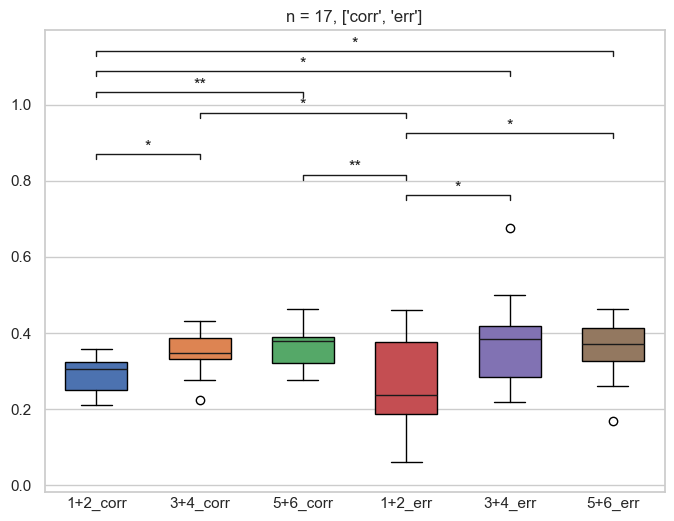

In [526]:
cb = "circle"
trial = ["corr", "err"]
pic_name = "{}_{}_split_similarity_counts.png".format(cb, trial)
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_err")[\
["1_{}".format(trial[0]), "2_{}".format(trial[0]), "3_{}".format(trial[0]),
 "4_{}".format(trial[0]), "5_{}".format(trial[0]), "6_{}".format(trial[0]),
 "1_{}".format(trial[1]), "2_{}".format(trial[1]), "3_{}".format(trial[1]),
 "4_{}".format(trial[1]), "5_{}".format(trial[1]), "6_{}".format(trial[1]),
]\
]
plot_data["1+2_{}".format(trial[0])] = (plot_data["1_{}".format(trial[0])] + plot_data["2_{}".format(trial[0])])
plot_data["3+4_{}".format(trial[0])] = (plot_data["3_{}".format(trial[0])] + plot_data["4_{}".format(trial[0])])
plot_data["5+6_{}".format(trial[0])] = (plot_data["5_{}".format(trial[0])] + plot_data["6_{}".format(trial[0])])
plot_data["1+2_{}".format(trial[1])] = (plot_data["1_{}".format(trial[1])] + plot_data["2_{}".format(trial[1])])
plot_data["3+4_{}".format(trial[1])] = (plot_data["3_{}".format(trial[1])] + plot_data["4_{}".format(trial[1])])
plot_data["5+6_{}".format(trial[1])] = (plot_data["5_{}".format(trial[1])] + plot_data["6_{}".format(trial[1])])
plot_data = plot_data[\
["1+2_{}".format(trial[0]), "3+4_{}".format(trial[0]), "5+6_{}".format(trial[0]),
 "1+2_{}".format(trial[1]), "3+4_{}".format(trial[1]), "5+6_{}".format(trial[1]),
]\
]

plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
# sns.boxplot(plot_data)
plt.title("n = {}, {}".format(len(plot_data), trial))
# plt.xticks(ticks = [1, 2, 3, 4, 5, 6],
#            labels = ["<< distractor similarity", "", "target similarity", "", "", ">> distractor similarity"])

plt.xticks(labels = plot_data.columns, ticks = range(1, len(plot_data.columns) + 1))
# plt.xlabel("<< Less Similar                 More Similar >>")

# plt.title("n = {}, {}".format(len(plot_data), trial))

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [528]:
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_err")[\
["1_{}".format(trial[0]), "2_{}".format(trial[0]), "3_{}".format(trial[0]),
 "4_{}".format(trial[0]), "5_{}".format(trial[0]), "6_{}".format(trial[0]),
 "1_{}".format(trial[1]), "2_{}".format(trial[1]), "3_{}".format(trial[1]),
 "4_{}".format(trial[1]), "5_{}".format(trial[1]), "6_{}".format(trial[1]),
]\
]
plot_data["1+2_{}".format(trial[0])] = (plot_data["1_{}".format(trial[0])] + plot_data["2_{}".format(trial[0])])
plot_data["3+4_{}".format(trial[0])] = (plot_data["3_{}".format(trial[0])] + plot_data["4_{}".format(trial[0])])
plot_data["5+6_{}".format(trial[0])] = (plot_data["5_{}".format(trial[0])] + plot_data["6_{}".format(trial[0])])
plot_data["1+2_{}".format(trial[1])] = (plot_data["1_{}".format(trial[1])] + plot_data["2_{}".format(trial[1])])
plot_data["3+4_{}".format(trial[1])] = (plot_data["3_{}".format(trial[1])] + plot_data["4_{}".format(trial[1])])
plot_data["5+6_{}".format(trial[1])] = (plot_data["5_{}".format(trial[1])] + plot_data["6_{}".format(trial[1])])

In [529]:
len(plot_data)

19

In [530]:
plot_data

1_corr    2_corr    3_corr    4_corr    5_corr    6_corr     1_err  \
sub                                                                            
280091  0.105590  0.211180  0.186335  0.204969  0.167702  0.124224  0.259259   
280093  0.110429  0.153374  0.196319  0.233129  0.171779  0.134969  0.029412   
280097  0.083871  0.148387  0.174194  0.212903  0.238710  0.141935       NaN   
280102  0.076923  0.153846  0.192308  0.153846  0.192308  0.230769  0.148148   
280104  0.124088  0.189781  0.153285  0.197080  0.131387  0.204380  0.038462   
280107  0.206704  0.122905  0.139665  0.134078  0.150838  0.245810  0.307692   
280109  0.079710  0.130435  0.144928  0.210145  0.253623  0.181159  0.047619   
280110  0.062500  0.150000  0.206250  0.200000  0.262500  0.118750  0.037037   
280112  0.140449  0.202247  0.151685  0.146067  0.168539  0.191011  0.166667   
280114  0.102273  0.147727  0.159091  0.204545  0.159091  0.227273  0.116279   
280115  0.124138  0.179310  0.200000  0.131034  0.158621  0.206897  0.256410   
280116  0.161290  0.177419  0.193548  0.193548  0.193548  0.080645  0.183333   
280118  0.146154  0.138462  0.184615  0.146154  0.215385  0.169231  0.098039   
280136  0.114094  0.208054  0.181208  0.093960  0.234899  0.167785  0.105263   
280139  0.205357  0.133929  0.151786  0.187500  0.125000  0.196429  0.187500   
280140  0.150943  0.144654  0.132075  0.194969  0.182390  0.194969  0.058824   
280149  0.077519  0.147287  0.217054  0.170543  0.201550  0.186047  0.043478   
280150  0.149351  0.207792  0.149351  0.181818  0.201299  0.110390  0.093750   
280152  0.179104  0.134328  0.074627  0.149254  0.208955  0.253731  0.200000   

           2_err     3_err     4_err     5_err     6_err  1+2_corr  3+4_corr  \
sub                                                                            
280091  0.148148  0.111111  0.111111  0.296296  0.074074  0.316770  0.391304   
280093  0.029412  0.441176  0.235294  0.147059  0.117647  0.263804  0.429448   
280097  0.111111  0.370370  0.222222  0.111111  0.185185  0.232258  0.387097   
280102  0.166667  0.129630  0.222222  0.129630  0.203704  0.230769  0.346154   
280104  0.153846  0.115385  0.230769  0.115385  0.346154  0.313869  0.350365   
280107  0.307692  0.076923       NaN  0.076923  0.230769  0.329609  0.273743   
280109  0.095238  0.119048  0.285714  0.190476  0.261905  0.210145  0.355072   
280110  0.148148  0.148148  0.259259  0.259259  0.148148  0.212500  0.406250   
280112  0.250000  0.333333  0.083333  0.083333  0.083333  0.342697  0.297753   
280114  0.174419  0.186047  0.197674  0.174419  0.151163  0.250000  0.363636   
280115  0.128205  0.128205  0.153846  0.230769  0.102564  0.303448  0.331034   
280116  0.116667  0.150000  0.133333  0.200000  0.216667  0.338710  0.387097   
280118  0.078431  0.196078  0.215686  0.235294  0.176471  0.284615  0.330769   
280136  0.131579  0.210526  0.105263  0.289474  0.157895  0.322148  0.275168   
280139  0.187500  0.109375  0.109375  0.250000  0.156250  0.339286  0.339286   
280140  0.176471  0.235294  0.235294  0.176471  0.117647  0.295597  0.327044   
280149  0.065217  0.217391  0.282609  0.195652  0.195652  0.224806  0.387597   
280150  0.093750  0.218750  0.250000  0.187500  0.156250  0.357143  0.331169   
280152  0.260000  0.200000  0.080000  0.120000  0.140000  0.313433  0.223881   

        5+6_corr   1+2_err   3+4_err   5+6_err  
sub                                             
280091  0.291925  0.407407  0.222222  0.370370  
280093  0.306748  0.058824  0.676471  0.264706  
280097  0.380645       NaN  0.592593  0.296296  
280102  0.423077  0.314815  0.351852  0.333333  
280104  0.335766  0.192308  0.346154  0.461538  
280107  0.396648  0.615385       NaN  0.307692  
280109  0.434783  0.142857  0.404762  0.452381  
280110  0.381250  0.185185  0.407407  0.407407  
280112  0.359551  0.416667  0.416667  0.166667  
280114  0.386364  0.290698  0.383721  0.325581  
280115  0.365517  0.384615  0.282051  0.333333  
280116  0.2

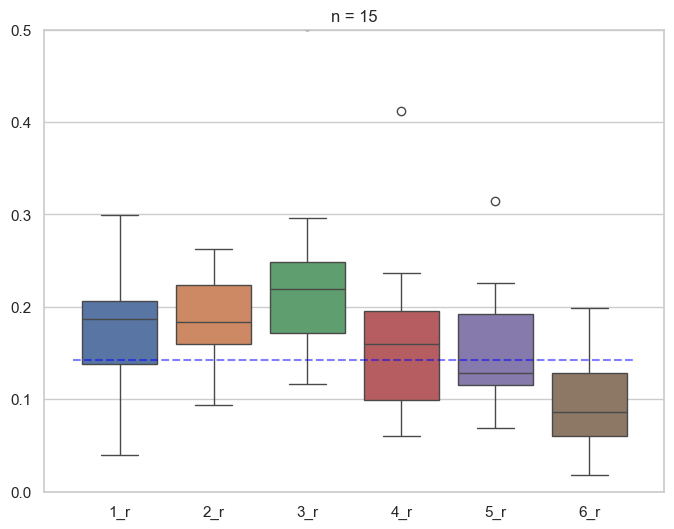

In [1252]:
cb = "circle"
pic_name = "{}_recall_counts.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
["1_r", "2_r", "3_r", "4_r", "5_r", "6_r"]\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.title("n = {}".format(len(plot_data)))
# plt.xticks(ticks = [1, 2, 3, 4, 5, 6],
#            labels = ["<< distractor similarity", "", "target similarity", "", "", ">> distractor similarity"])

# plt.xticks(ticks = [])
# plt.xlabel("<< Less Similar                 More Similar >>")

# Gaussian distribution parameters
if cb == "line":
    data = np.repeat([1-1, 2-1, 3-1, 4-1, 5-1, 6-1], [1, 2, 3, 3, 2, 1]) # Adjust the frequency of each number
    mu, std = norm.fit(data) # Fit a Gaussian to this data
    
    # Add Gaussian distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.ylim(0, 0.5)
    p = norm.pdf(x, mu, std)
    sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
elif cb == "circle":
    data = np.repeat([0-1, 1, 2, 3, 4, 5+1], [1, 1, 1, 1, 1, 1]) # Adjust the frequency of each number
    mu, std = uniform.fit(data) # Fit a Gaussian to this data
    
    # Add Gaussian distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.ylim(0, 0.5)
    p = uniform.pdf(x, mu, std)
    sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
    

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

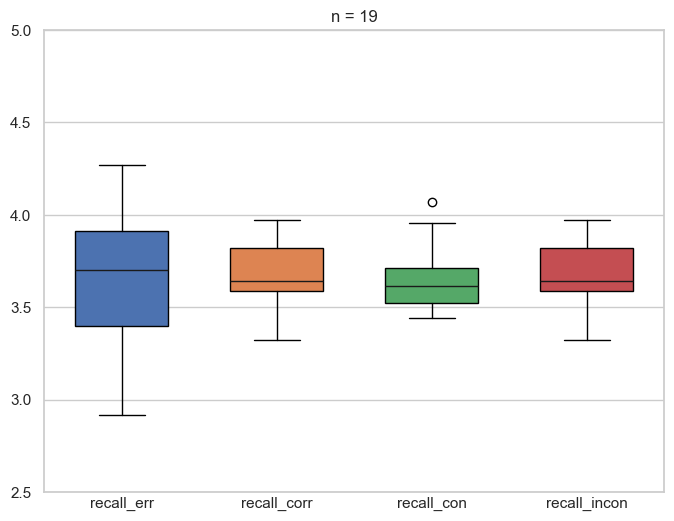

In [230]:
cb = "circle"
pic_name = "{}_con_incon.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
['recall_err', 'recall_corr', 'recall_con', 'recall_incon']\
].dropna(subset='recall_err')
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.ylim(2.5, 5)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
plt.xticks(labels = plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [226]:
stats.ttest_rel(plot_data["recall_incon"], plot_data["recall_con"])

TtestResult(statistic=0.7512112118534483, pvalue=0.46127408962622485, df=20)

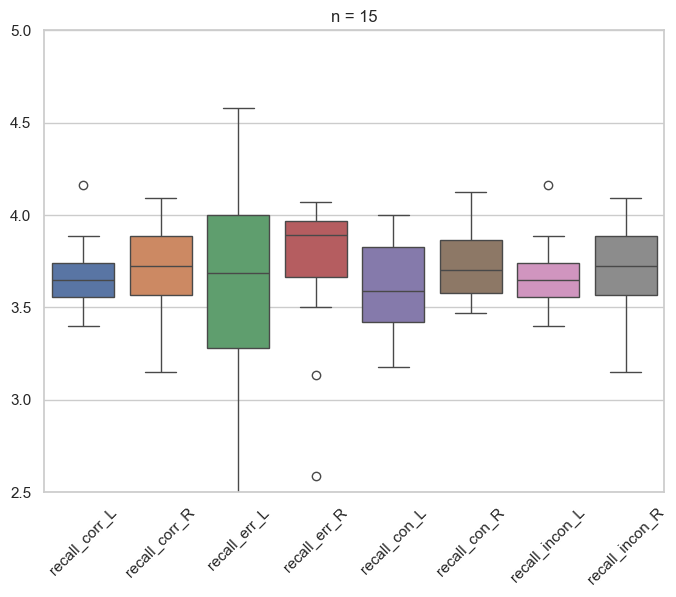

In [1257]:
cb = "circle"
pic_name = "{}_LR.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
['recall_corr_L', 'recall_corr_R', 'recall_err_L', 'recall_err_R',
 'recall_con_L', 'recall_con_R', 'recall_incon_L', 'recall_incon_R',]\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.ylim(2.5, 5)
plt.title("n = {}".format(len(plot_data)))
plt.tick_params(axis='x', rotation=45)
plt.savefig(path_pic + "{}".format(pic_name), bbox_inches = 'tight')
plt.show()

In [800]:
face_task_data.recall_err

0     3.500000
1     3.761905
2     3.189189
3     3.419355
4          NaN
5     3.529412
6     3.285714
7     3.210526
8     3.700000
9     3.135135
10    3.500000
11    3.509091
12    3.571429
13         NaN
14    3.416667
15    4.454545
16    3.368421
17    3.303030
18    3.416667
19    3.895833
20    4.571429
21    3.641026
Name: recall_err, dtype: float64

In [1259]:
face_task_data.to_csv("/Users/fzaki001/Downloads/face_task_data.csv", index = False)

In [617]:
len(face_task_data)

len(face_task_data.dropna(subset="recall_err_paired"))

10

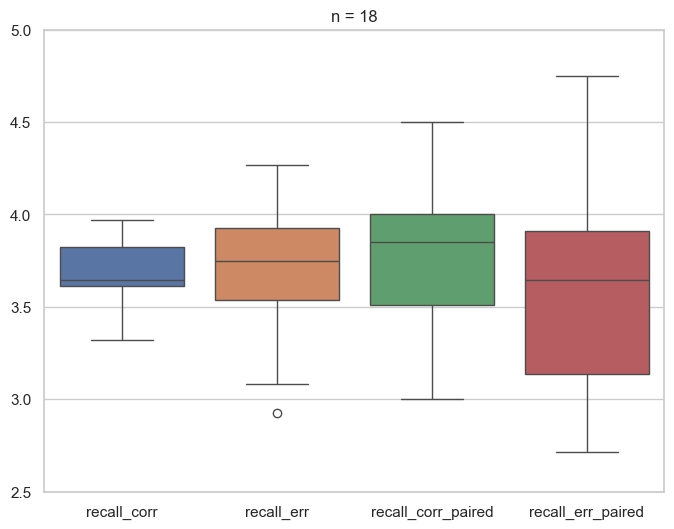

In [238]:
cb = "circle"
pic_name = "{}_err_corr_paired.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_err_paired")[\
['recall_corr', 'recall_err', 'recall_corr_paired', 'recall_err_paired']\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.ylim(2.5, 5)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

(2.5, 5.0)

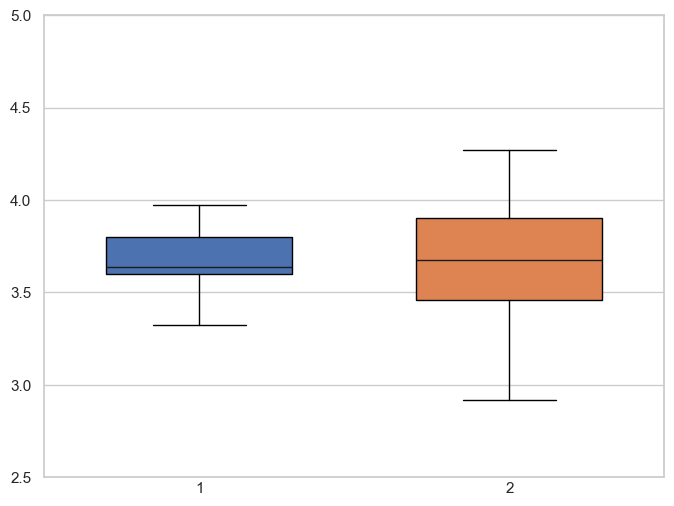

In [410]:
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.ylim (2.5, 5)

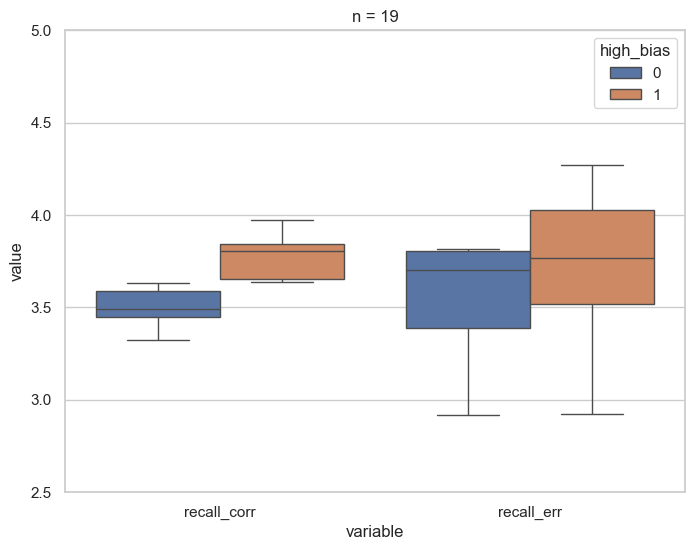

In [231]:
cb = "circle"
pic_name = "{}_median_err_corr.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb].dropna(subset="recall_err")[\
['recall_corr', 'recall_err', "high_bias"]\
]
mean_err, sd_err = plot_data["recall_err"].mean(), plot_data["recall_err"].std()
mean_corr, sd_corr = plot_data["recall_corr"].mean(), plot_data["recall_corr"].std()
plot_data = plot_data[(plot_data["recall_corr"] < mean_corr + 3 * sd_corr) & (plot_data["recall_corr"] > mean_corr - 3 * sd_corr)]
plot_data = plot_data[(plot_data["recall_err"] < mean_err + 3 * sd_err) & (plot_data["recall_err"] > mean_err - 3 * sd_err)]

long_plot_data = plot_data.melt(id_vars='high_bias', value_vars=['recall_corr', 'recall_err'])

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=long_plot_data, x='variable', y='value', hue='high_bias', dodge = True)

plt.ylim(2.5, 5)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1075]:
import pingouin as pg
aov = pg.anova(dv="value", between="high_bias", within = "variable", data=long_plot_data,
               detailed=True)

TypeError: anova() got an unexpected keyword argument 'within'

In [1088]:
import statsmodels.formula.api as smf
model = smf.ols(formula='value ~ variable + high_bias + variable * high_bias', data=long_plot_data).fit()

In [1089]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9777
Date:                Thu, 18 Apr 2024   Prob (F-statistic):              0.411
Time:                        22:20:02   Log-Likelihood:                -4.9301
No. Observations:                  54   AIC:                             17.86
Df Residuals:                      50   BIC:                             25.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [1065]:
mean_err + 3 * sd_err

4.731664219290492

In [1061]:
mean_err, sd_err = plot_data["recall_err"].mean(), plot_data["recall_err"].std()
mean_corr, sd_corr = plot_data["recall_corr"].mean(), plot_data["recall_corr"].std()
plot_data = plot_data[(plot_data["recall_corr"] < mean_corr + 3 * sd_corr) & (plot_data["recall_corr"] > mean_corr - 3 * sd_corr)]
plot_data = plot_data[(plot_data["recall_err"] < mean_err + 3 * sd_err) & (plot_data["recall_err"] > mean_err - 3 * sd_err)]

In [1063]:
len(plot_data)

27

In [1090]:
stats.ttest_rel(
plot_data[plot_data["high_bias"] == 1]["recall_corr"],
plot_data[plot_data["high_bias"] == 1]["recall_err"]
)

TtestResult(statistic=1.0127532963979735, pvalue=0.335054820497225, df=10)

In [1092]:
stats.ttest_rel(
long_plot_data[(long_plot_data["high_bias"] == 1) & (long_plot_data["variable"] == "recall_corr")]["value"],
long_plot_data[(long_plot_data["high_bias"] == 1) & (long_plot_data["variable"] == "recall_err")]["value"]
)

TtestResult(statistic=1.0127532963979735, pvalue=0.335054820497225, df=10)

In [633]:
stats.ttest_rel(plot_data.recall_corr, plot_data.recall_err)

TtestResult(statistic=2.2039458262771854, pvalue=0.05209196406710212, df=10)

In [936]:
stats.ttest_rel(face_task_data[face_task_data["counterbalance"] == "line"].dropna(subset = "recall_err").recall_corr,
                face_task_data[face_task_data["counterbalance"] == "line"].dropna(subset = "recall_err").recall_err)

TtestResult(statistic=-0.09258382885474335, pvalue=0.9270027060297286, df=24)

In [774]:
stats.ttest_rel(face_task_data.dropna(subset = "recall_err_paired").recall_corr_paired, face_task_data.dropna(subset = "recall_err_paired").recall_err_paired)

TtestResult(statistic=0.4356680723184281, pvalue=0.6688980751871139, df=16)

In [775]:
stats.ttest_rel(face_task_data.dropna(subset = "recall_err").recall_corr, face_task_data.dropna(subset = "recall_err").recall_err)

TtestResult(statistic=0.5654435219414963, pvalue=0.5783889664584845, df=19)

In [487]:
stats.ttest_rel(face_task_data.recall_con, face_task_data.recall_incon)

TtestResult(statistic=0.5921463172759074, pvalue=0.5683283031408718, df=9)

In [962]:
face_task_data.skipped_fl

0      3
1     27
2      9
3     29
4      3
5      8
6      9
7      9
8     12
9     11
10    15
11     3
12     6
13     4
14    13
15     9
16    21
17    33
18     3
19     0
20    13
21     9
22    12
23     5
24    10
25     2
26    34
27    11
28    10
29    11
30     9
31    42
Name: skipped_fl, dtype: int64

In [651]:
path

'/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face/data/'

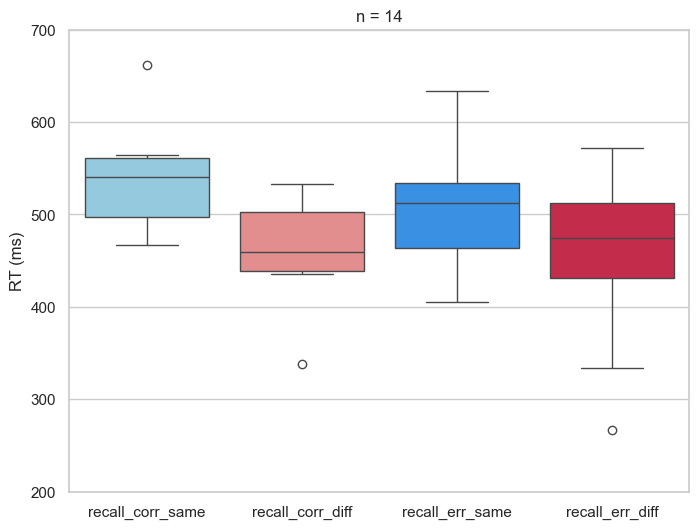

In [654]:
pic_name = "RT.png"

sns.set(style="whitegrid")
plot_data = face_task_data[\
            ['recall_corr_same', 'recall_corr_diff', 'recall_err_same', 'recall_err_diff',]\
            ]*1000
plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.title("n = {}".format(len(plot_data)))
plt.ylabel("RT (ms)")
plt.ylim(200, 700)

plt.savefig(path+"{}".format(pic_name))
plt.show()

In [327]:
stats.ttest_rel(face_task_data["recall_L_same"],face_task_data["recall_L_diff"])

TtestResult(statistic=2.9413506358767516, pvalue=0.032206230717322724, df=5)

In [328]:
stats.ttest_rel(face_task_data["recall_R_same"],face_task_data["recall_R_diff"])

TtestResult(statistic=2.0712129396761396, pvalue=0.09309594505822268, df=5)

In [289]:
stats.ttest_rel(face_task_data[face_task_data["counterbalance"] == "circle"]["recall_err_same"].dropna(),
                face_task_data[face_task_data["counterbalance"] == "circle"]["recall_err_diff"].dropna())

TtestResult(statistic=1.2785159795029268, pvalue=0.2702104684339051, df=4)

In [ ]:
stats.ttest_rel(face_task_data["recall_err_same"].dropna(),face_task_data["recall_err_diff"].dropna())

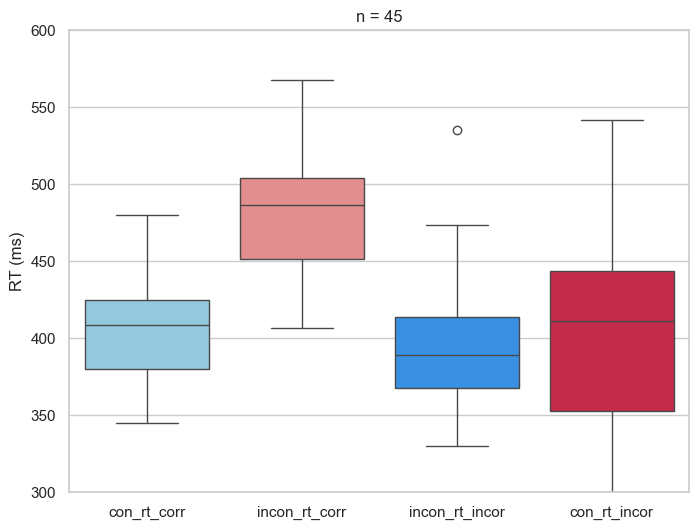

In [1260]:
pic_name = "all_fl_RT.png"
plot_data = face_task_data[\
            ['con_rt_corr',	'incon_rt_corr', 'incon_rt_incor', 'con_rt_incor']\
            ] * 1000
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(300, 600)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

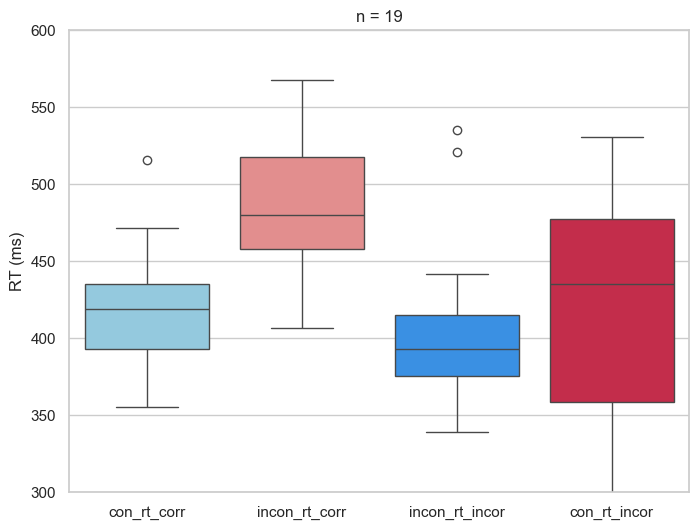

In [130]:
cb = "circle"
pic_name = "{}_fl_RT.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
            ['con_rt_corr',	'incon_rt_corr', 'incon_rt_incor', 'con_rt_incor']\
            ] * 1000
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(300, 600)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

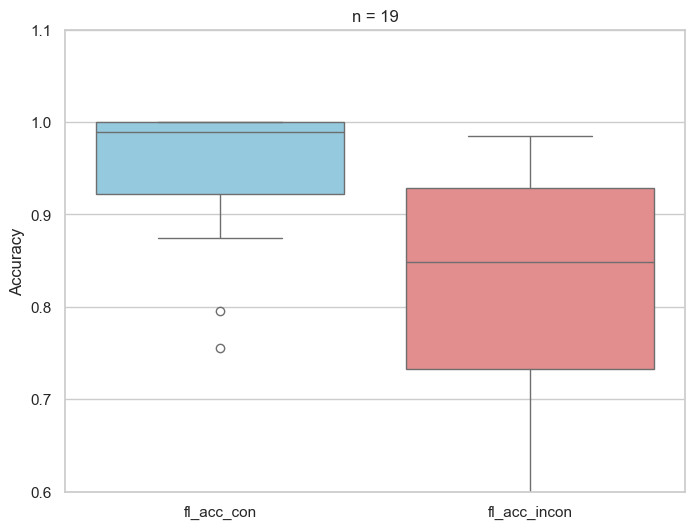

In [129]:
cb = "circle"
pic_name = "{}_fl_acc.png".format(cb)
plot_data = face_task_data[face_task_data["counterbalance"] == cb][\
            ['fl_acc_con', 'fl_acc_incon']\
            ]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(.6, 1.1)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

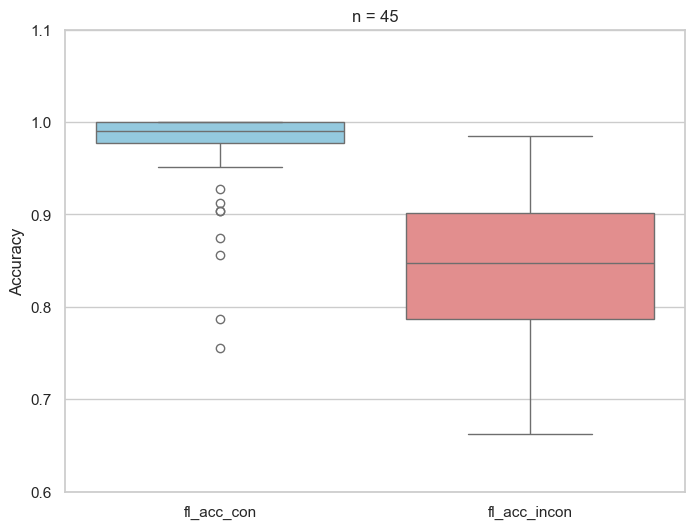

In [1261]:
pic_name = "all_fl_acc.png"
plot_data = face_task_data[\
            ['fl_acc_con', 'fl_acc_incon']\
            ]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(.6, 1.1)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1277]:
flanker_reg = face_task_data[
["fl_acc_con", "fl_acc_incon", "con_rt_incor", "incon_rt_incor", "con_rt_corr", "incon_rt_corr"]
]

In [1270]:
path

'/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face/data/'

In [ ]:
flanker_reg.melt(id_vars='high_bias', value_vars=['recall_corr', 'recall_err'])


In [1276]:
flanker_reg_acc = flanker_reg[
["fl_acc_con", "fl_acc_incon"]
]

flanker_reg_acc.columns = ["CON", "INCON"]

flanker_reg_acc = flanker_reg_acc.melt()
flanker_reg_acc["CON"] = [1 if i == "CON" else 0 for i in flanker_reg_acc.variable]

flanker_reg_acc[
["value", "CON"]
].to_csv(path + "flanker_reg_acc.csv", index = False)

In [1279]:
flanker_reg_rt = flanker_reg[
["con_rt_corr", "incon_rt_corr"]
]

flanker_reg_rt.columns = ["CON", "INCON"]

flanker_reg_rt = flanker_reg_rt.melt()
flanker_reg_rt["CON"] = [1 if i == "CON" else 0 for i in flanker_reg_rt.variable]

flanker_reg_rt[
["value", "CON"]
].to_csv(path + "flanker_reg_rt.csv", index = False)

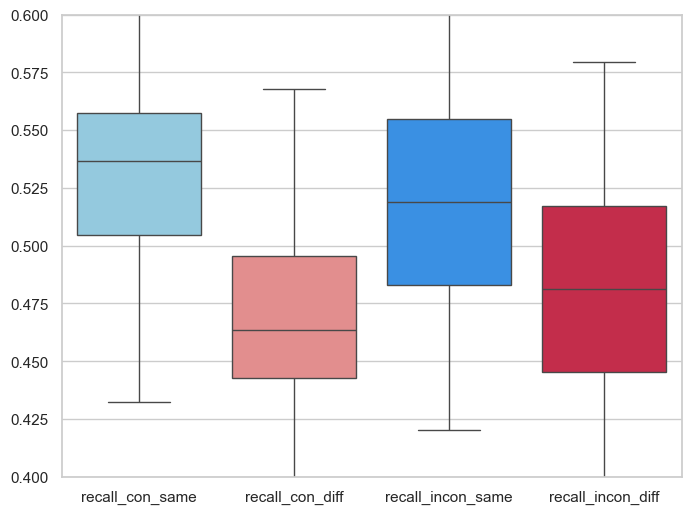

In [1266]:
pic_name = "ratio.png"
plot_data = face_task_data[\
            ['recall_con_same', 'recall_con_diff', 'recall_incon_same', 'recall_incon_diff',]\
            ]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
# plt.ylabel("RT (ms)")
plt.ylim(.4, .6)

# plt.savefig("/Users/fzaki001/Downloads/{}".format(pic_name))
plt.show()

# only incongruent error

In [343]:
stats.ttest_rel(face_task_data['recall_con_same'], face_task_data['recall_con_diff'])
stats.ttest_rel(face_task_data['recall_incon_same'], face_task_data['recall_incon_diff'])
              # , 'recall_incon_same', 'recall_incon_diff',]\

TtestResult(statistic=1.4911567889676574, pvalue=0.19611806978217475, df=5)

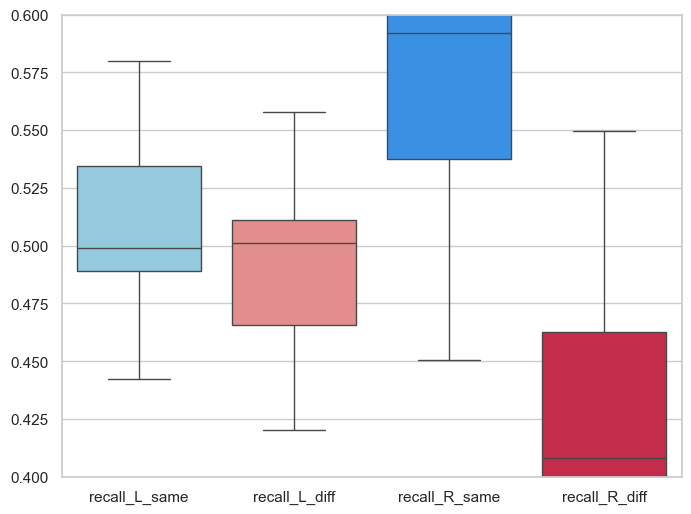

In [349]:
# pic_name = "left-right.png"
plot_data = face_task_data[\
            ['recall_L_same', 'recall_L_diff', 'recall_R_same', 'recall_R_diff',]\
            ]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
# plt.ylabel("RT (ms)")
plt.ylim(.4, .6)

# plt.savefig("/Users/fzaki001/Downloads/{}".format(pic_name))
plt.show()

In [67]:
cats = []
for i in range(len(trial_data)):
    if trial_data.prime[i] == "L":
        if trial_data.recall[i] <=2:
            cats.append("CON")
        elif trial_data.recall[i] == 3 or trial_data.recall[i] == 4:
            cats.append("M")
        elif trial_data.recall[i] >= 5:
            cats.append("INCON")
    elif trial_data.prime[i] == "R":
        if trial_data.recall[i] <=2:
            cats.append("INCON")
        elif trial_data.recall[i] == 3 or trial_data.recall[i] == 4:
            cats.append("M")
        elif trial_data.recall[i] >= 5:
            cats.append("CON")

trial_data["recall_cat"] = cats

In [70]:
trial_data.recall_cat.value_counts()

recall_cat
M        147
INCON    101
CON      101
Name: count, dtype: int64

In [130]:
fl_data.recall_rt.isna().sum()

2

In [269]:
# shared information can interfere and confound
# wm can impact simon, and simon can impact the wm
# we realized we want not to show infor until afte the errro and introduce uncertainty
# leess certain, and right after the error
# 20 minutes

69 78


In [5]:
def convert_to_float_list(series):
    float_list = []
    for value in series:
        if isinstance(value, str):  # Check if the value is a string
            float_list.append(float(value.strip("[]")))  # Convert string to float and remove brackets
        elif isinstance(value, list):  # Check if the value is a list
            float_list.extend([float(v) for v in value])  # Convert each element of the list to float
        else:  # Handle NaN values
            float_list.append(float('nan'))  # Append NaN if value is NaN
    return float_list

# def convert_to_float_list(series):
#     float_list = []
#     for value in series:
#         if isinstance(value, str):  # Check if the value is a string
#             # Remove brackets and split the string by comma, then convert each part to float
#             float_list.extend([[float(part) for part in value.strip("[]").split(',')]])
#         elif isinstance(value, list):  # Check if the value is a list
#             float_list.extend([float(v) for v in value])  # Convert each element of the list to float
#         else:  # Handle NaN values
#             float_list.append(float('nan'))  # Append NaN if value is NaN
#     return float_list




# Face task new

In [141]:
import glob
import re
pd.options.mode.chained_assignment = None
n_blocks = 10
n_trials = 40
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face-new/data/"
path_pic = '/Users/fzaki001/Documents/DA/wme-face-new/'
pattern = r'\d+'
subjects = sorted([re.search(pattern, i)[0] for i in os.listdir(path) if (i.endswith("csv") and "SCRD" not in i)])


# def norm_recall_counts(data, counterbalance):
#     coeff_dict = dict()
#     if counterbalance == "line":
#         for ind in data.recall.value_counts().index:
#             coeff_dict[ind] = data.recall.value_counts()[ind] / len(data)
#     elif counterbalance == "circle":
#         for ind in data.similarity.value_counts().index:
#             coeff_dict[ind] = data.similarity.value_counts()[ind] / len(data)
#     return coeff_dict
def convert_to_float_list_multiple(series):
    float_list = []
    for value in series:
        if isinstance(value, str):
            if "," in value.strip("[]"):
                float_list.append([float(v) for v in value.strip("[]").split(",")])# Check if the value is a string
            else:
                float_list.append(float(value.strip("[]")))  # Convert string to float and remove brackets
        elif isinstance(value, list):  # Check if the value is a list
            float_list.extend([float(v) for v in value])  # Convert each element of the list to float
        else:  # Handle NaN values
            float_list.append(float('nan'))  # Append NaN if value is NaN
    return float_list

In [142]:
subjects

['280119',
 '280122',
 '280123',
 '280126',
 '280127',
 '280128',
 '280131',
 '280133',
 '280134',
 '280135',
 '280137',
 '280138',
 '280141',
 '280142',
 '280143',
 '280144',
 '280145',
 '280146',
 '280147',
 '280148',
 '280153',
 '280154',
 '280155',
 '280156',
 '280157',
 '280158',
 '280159',
 '280160',
 '280161',
 '280162',
 '280163',
 '280164',
 '280165',
 '280166',
 '280167',
 '280168',
 '280169',
 '280170',
 '280171',
 '280172',
 '280187',
 '280188',
 '280190',
 '280191',
 '280192',
 '280193',
 '280197',
 '280198',
 '280199',
 '280200',
 '280202',
 '280203',
 '280205',
 '280206',
 '280208',
 '280210',
 '280212',
 '280221',
 '280223',
 '280225',
 '280232',
 '280233',
 '280236',
 '280239',
 '280242']

In [143]:
trial_data_list = []
sanity_check = {
    "less_200ms": [],
    "2_or_more": [],
    "3_plus": [],
}
from tqdm import tqdm
normalize = True
face_task_dict = {
    "sub": [],
    "fl_acc": [],
    "fl_acc_con": [],
    "fl_acc_incon": [],
    "wm_acc": [],
    "con_rt_corr": [],
    "incon_rt_corr": [],
    "con_rt_incor": [],
    "incon_rt_incor": [],
    "skipped_fl": [],
    "recall_rt": [],
    "recall_rt_std": [],
    "skipped_recall": [],
    "recall_mean": [],
    "recall_corr": [],
    "recall_corr_paired": [],
    "recall_corr_L": [],
    "recall_corr_R": [],
    "recall_err": [],
    "recall_err_paired": [],
    "recall_err_L": [],
    "recall_err_R": [],
    "recall_con": [],
    "recall_con_L": [],
    "recall_con_R": [],
    "recall_incon": [],
    "recall_incon_L": [],
    "recall_incon_R": [],
    "recall_L": [],
    "recall_R": [],
    1: [],
    2: [],
    3: [],
    
    "1_r":[],
    "2_r":[],
    "3_r":[],
    
    "1_corr": [],
    "2_corr": [],
    "3_corr": [],
    
    "1_err": [],
    "2_err": [],
    "3_err": [],

    "1_con": [],
    "2_con": [],
    "3_con": [],

    "1_incon": [],
    "2_incon": [],
    "3_incon": [],
}

value_counts = 0

for sub in tqdm(subjects):
    # sub = "280191"
    pattern = "{}sub-{}*_wme-face*.csv".format(path, sub)
    filename = glob.glob(pattern)
    # wm_df = pd.DataFrame()
    data = pd.read_csv(filename[0])
    start_index = data["flanker_acc"].first_valid_index()
    data = data.iloc[start_index:].reset_index(drop = True)
    # data["recall_resp_debug.keys"].value_counts().plot(kind = 'bar')
    prepotent_rt_multiple = convert_to_float_list_multiple(data["recall_resp_debug.rt"].dropna())
    prepotent_rt = convert_to_float_list(data["recall_resp_debug.rt"].dropna())
    # plt.show()
    # plt.hist(prepotent_rt)
    # plt.xlim((0, 1))
    # plt.show()
    sanity_check["less_200ms"]\
    .append(len([i for i in prepotent_rt if i<=0.2]))
    sanity_check["2_or_more"]\
    .append(len([i for i in prepotent_rt_multiple if (isinstance(i, list) and len(i) >= 2)]))
    sanity_check["3_plus"]\
    .append(len([i for i in prepotent_rt_multiple if (isinstance(i, list) and len(i) > 3)]))
    # if "similarity" in data.columns:
    trial_data = data[
    [
    "target",
    "flanker_acc",
    "congruent",
    "flanker_face_resp.rt",
    "recall_resp.rt",
    "prime",
    "recall",
    "similarity",
    ]
    ].replace(to_replace=['None'], value=np.nan).dropna(subset = "congruent").reset_index(drop = True)
    trial_data.columns = ["target", "acc", "congruent", "fl_rt", "recall_rt", "prime", "recall", "similarity"]
    trial_data[["recall", "similarity"]] = trial_data[["recall", "similarity"]].astype(float)
    trial_data_list.append(trial_data)

    trial_data["fl_rt"] = convert_to_float_list(trial_data.fl_rt)
    trial_data["recall_rt"] = convert_to_float_list(trial_data.recall_rt)

    fl_data = trial_data.copy()
    # face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["skipped_fl"].append(fl_data.fl_rt.isna().sum())
    face_task_dict["skipped_recall"].append(fl_data.recall_rt.isna().sum())
    
    fl_data = fl_data.dropna(subset = "fl_rt").reset_index(drop = True)
    fl_data = fl_data[fl_data["fl_rt"] > 0.150].reset_index(drop = True)
    
    face_task_dict["con_rt_corr"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["incon_rt_corr"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["con_rt_incor"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 0)].fl_rt.mean())
    face_task_dict["incon_rt_incor"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 0)].fl_rt.mean())

    face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["fl_acc_con"].append(fl_data[fl_data["congruent"] == 1].acc.mean())
    face_task_dict["fl_acc_incon"].append(fl_data[fl_data["congruent"] == 0].acc.mean())

    wm_acc_data = trial_data.dropna(subset = "recall").reset_index(drop = True)
    face_task_dict["wm_acc"].append(len(wm_acc_data[wm_acc_data["similarity"] == 2])/len(wm_acc_data))

    trial_data = trial_data.dropna(subset = "fl_rt").reset_index(drop = True)
    trial_data = trial_data.dropna(subset = "recall").reset_index(drop = True)
    trial_data["prime"] = trial_data["prime"].apply(lambda x: "L" if x == 6 else ("R" if x == 14 else None))
    trial_data = trial_data[trial_data["fl_rt"] > 0.150].reset_index(drop = True)

    assert np.sum(list(trial_data[trial_data["fl_rt"] < 0.150]["fl_rt"])) == 0, "Check your flanker RT!"
    assert np.sum(list(trial_data[trial_data["fl_rt"] > 0.7]["fl_rt"])) == 0, "Check your flanker RT!"
    assert np.sum([type(i) != float for i in trial_data["fl_rt"]]) == 0, "Check your flanker RT!"
    assert np.sum([type(i) != float for i in trial_data["recall_rt"]]) == 0, "Check your recall RT!"
    assert np.sum(list(trial_data[trial_data["recall_rt"] > 3]["recall_rt"])) == 0, "Check your recall RT!"
    assert np.sum(list(trial_data.isna().sum())) == 0, "Check data for NaN!"
    
    print("sub-{} checked".format(sub))
    
    trial_types = ["all", "corr", "incorr", "left", "right", "con", "incon"]
    # trial_data = trial_data[trial_data["acc"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["congruent"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["target"] == "left"].reset_index(drop = True)
    # trial_data = trial_data[(trial_data["target"] == "right") & (trial_data["acc"] == 1)].reset_index(drop = True)
    
    trial_data.loc[trial_data["prime"] == "L", "similarity"] = 4 - trial_data.loc[trial_data["prime"] == "L", "similarity"]
    
    face_task_dict["recall_corr"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_corr_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_corr_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "L")].similarity.mean())

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "R")]) >= 6:
        face_task_dict["recall_err_R"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "R")].similarity.mean())
    else:
        face_task_dict["recall_err_R"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "L")]) >= 6:
        face_task_dict["recall_err_L"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "L")].similarity.mean())
    else:
        face_task_dict["recall_err_L"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) >= 6:
        face_task_dict["recall_err"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)].similarity.mean())

    else:
        face_task_dict["recall_err"].append(np.nan)

    face_task_dict["recall_con"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)].similarity.mean())
    face_task_dict["recall_con_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_con_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_incon"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_incon_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_incon_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_L"].append(trial_data[trial_data["prime"] == "L"].similarity.mean())

    face_task_dict["recall_R"].append(trial_data[trial_data["prime"] == "R"].similarity.mean())

    face_task_dict["recall_mean"].append(trial_data.similarity.mean())
    
    
    face_task_dict["recall_rt"].append(trial_data.recall_rt.mean()+1)
    face_task_dict["recall_rt_std"].append(trial_data.recall_rt.std())

    err_inds = []
    for i in range(len(trial_data)):
        if i > 1:
            if (trial_data.acc[i] == 0 and trial_data.congruent[i] == 0)\
            and (trial_data.acc[i-1] == 1 and trial_data.congruent[i-1] == 0):
                err_inds.append(i-1)
                err_inds.append(i)
    error_data = trial_data.iloc[err_inds]
    if (len(error_data[error_data["acc"] == 1]) >= 6 and len(error_data[error_data["acc"] == 0]) >= 6):
        face_task_dict["recall_err_paired"].append(error_data[error_data["acc"] == 0].similarity.mean())
        face_task_dict["recall_corr_paired"].append(error_data[error_data["acc"] == 1].similarity.mean())
    else: 
        face_task_dict["recall_err_paired"].append(np.nan)
        face_task_dict["recall_corr_paired"].append(np.nan)
    
    if normalize:
        norms = norm_recall_counts(trial_data, "similarity")
        face_task_dict[1].append(norms[1])
        face_task_dict[2].append(norms[2])
        face_task_dict[3].append(norms[3])
        norms_corr = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)], "similarity")
        face_task_dict["1_corr"].append(norms_corr[1])
        face_task_dict["2_corr"].append(norms_corr[2])
        face_task_dict["3_corr"].append(norms_corr[3])
        norms_err = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 0)], "similarity")
        try:
            face_task_dict["1_err"].append(norms_err[1])
        except:
            face_task_dict["1_err"].append(np.nan)
        try:
            face_task_dict["2_err"].append(norms_err[2])
        except:
            face_task_dict["2_err"].append(np.nan)
        try:
            face_task_dict["3_err"].append(norms_err[3])
        except:
            face_task_dict["3_err"].append(np.nan)
        norms_con = norm_recall_counts(trial_data[(trial_data["congruent"] == 1) & (trial_data["acc"] == 1)], "similarity")
        face_task_dict["1_con"].append(norms_con[1])
        face_task_dict["2_con"].append(norms_con[2])
        face_task_dict["3_con"].append(norms_con[3])
        norms_incon = norm_recall_counts(trial_data[(trial_data["congruent"] == 0) & (trial_data["acc"] == 1)], "similarity")
        face_task_dict["1_incon"].append(norms_incon[1])
        face_task_dict["2_incon"].append(norms_incon[2])
        face_task_dict["3_incon"].append(norms_incon[3])
        
    else:
        value_counts += trial_data.similarity.value_counts().sort_index()
        face_task_dict[1].append(trial_data.similarity.value_counts()[1])
        face_task_dict[2].append(trial_data.similarity.value_counts()[2])
        face_task_dict[3].append(trial_data.similarity.value_counts()[3])
    
    norms = norm_recall_counts(trial_data, "recall")
    face_task_dict["1_r"].append(norms[1])
    face_task_dict["2_r"].append(norms[2])
    face_task_dict["3_r"].append(norms[3])

    face_task_dict["sub"].append(sub)
    # trial_data_list.append(trial_data)

face_task_data = pd.DataFrame(face_task_dict)

redcap_data = pd.read_csv(path + "redcap/" + [i for i in os.listdir(path + "redcap/") if i.endswith("csv") and "SCRD" in i][0])
redcap_data["record_id"] = redcap_data["record_id"].astype(str)
redcap_data["sub"] = redcap_data["record_id"]

start_index = list(redcap_data["record_id"]).index(face_task_data["sub"][0])
redcap_data = redcap_data.iloc[start_index:].reset_index(drop = True)[["sub"] + [i for i in redcap_data.columns if "scrd" in i]]
# print(redcap_data.columns)
# redcap_data = redcap_data.dropna(axis = 1)
face_task_data.set_index('sub', inplace=True)
redcap_data.set_index('sub', inplace=True)

sanity_check_nan = replace_outliers_with_nan(pd.DataFrame(sanity_check), 3)
rows_to_drop = list(sanity_check_nan[sanity_check_nan.isna().any(axis=1)].index)

face_task_data = face_task_data.drop(index = [list(face_task_data.index)[i] for i in rows_to_drop])

face_task_data = face_task_data[(face_task_data["skipped_fl"] < 100) & (face_task_data["skipped_recall"] < 100)]
face_task_data = face_task_data[face_task_data["fl_acc"] > 0.6]

face_task_data = face_task_data.join(redcap_data, on = "sub")
face_task_data["recall_diff_con"] = face_task_data["recall_incon"] - face_task_data["recall_con"]
face_task_data["recall_diff_err"] = face_task_data["recall_err"] - face_task_data["recall_corr"]
face_task_data = replace_outliers_with_nan(face_task_data)

face_task_data

  9%|██▍                        | 6/65 [00:00<00:02, 26.57it/s]

sub-280119 checked
sub-280122 checked
sub-280123 checked
sub-280126 checked
sub-280127 checked
sub-280128 checked
sub-280131 checked


 18%|████▊                     | 12/65 [00:00<00:01, 27.87it/s]

sub-280133 checked
sub-280134 checked
sub-280135 checked
sub-280137 checked
sub-280138 checked
sub-280141 checked


 28%|███████▏                  | 18/65 [00:00<00:01, 24.30it/s]

sub-280142 checked
sub-280143 checked
sub-280144 checked
sub-280145 checked
sub-280146 checked
sub-280147 checked
sub-280148 checked


 37%|█████████▌                | 24/65 [00:00<00:01, 25.60it/s]

sub-280153 checked
sub-280154 checked
sub-280155 checked
sub-280156 checked
sub-280157 checked
sub-280158 checked


 46%|████████████              | 30/65 [00:01<00:01, 26.39it/s]

sub-280159 checked
sub-280160 checked
sub-280161 checked
sub-280162 checked
sub-280163 checked
sub-280164 checked
sub-280165 checked


 60%|███████████████▌          | 39/65 [00:01<00:01, 24.04it/s]

sub-280166 checked
sub-280167 checked
sub-280168 checked
sub-280169 checked
sub-280170 checked
sub-280171 checked


 69%|██████████████████        | 45/65 [00:01<00:00, 26.24it/s]

sub-280172 checked
sub-280187 checked
sub-280188 checked
sub-280190 checked
sub-280191 checked
sub-280192 checked
sub-280193 checked


 78%|████████████████████▍     | 51/65 [00:01<00:00, 26.84it/s]

sub-280197 checked
sub-280198 checked
sub-280199 checked
sub-280200 checked
sub-280202 checked
sub-280203 checked


 88%|██████████████████████▊   | 57/65 [00:02<00:00, 27.77it/s]

sub-280205 checked
sub-280206 checked
sub-280208 checked
sub-280210 checked
sub-280212 checked
sub-280221 checked
sub-280223 checked


100%|██████████████████████████| 65/65 [00:02<00:00, 26.15it/s]

sub-280225 checked
sub-280232 checked
sub-280233 checked
sub-280236 checked
sub-280239 checked
sub-280242 checked


fl_acc  fl_acc_con  fl_acc_incon    wm_acc  con_rt_corr  \
sub                                                                 
280119  0.964377    0.994949      0.933333  0.508816     0.413904   
280122  0.896641    0.994949      0.793651  0.356234     0.430455   
280123  0.964674    1.000000      0.927778  0.421717     0.459553   
280126  0.916890    1.000000      0.823864  0.320802     0.452095   
280127  0.887728    0.978836      0.798969  0.480720     0.483772   
280128  0.961340    0.995000      0.925532  0.464824     0.438804   
280131  0.894879    0.994898      0.782857  0.356784     0.452987   
280133  0.937008    0.989418      0.885417  0.377551     0.442135   
280134  0.888325    1.000000      0.773196  0.343358     0.417238   
280135  0.865435    0.994845      0.729730  0.473146     0.465551   
280137  0.884726    0.984772      0.753333  0.427136     0.465686   
280138  0.967172    0.994924      0.939698  0.413706     0.376236   
280141  0.913158    0.989418      0.837696  0.454315     0.444647   
280142  0.804878    0.957672      0.644444  0.381201     0.406911   
280143  0.938462    0.994048      0.878981  0.377709     0.518499   
280144  0.916667    1.000000      0.833333  0.436224     0.406128   
280145  0.884422    0.995000      0.772727  0.502525     0.409614   
280146  0.978667    1.000000      0.955307  0.568528     0.448474   
280147  0.931759    1.000000      0.859459  0.430809     0.450322   
280148  0.848718    1.000000      0.698980  0.444724     0.371766   
280153  0.916427    1.000000      0.829412  0.372796     0.492443   
280154  0.946381    1.000000      0.888268  0.418848     0.485308   
280155       NaN         NaN           NaN  0.460000     0.332707   
280156  0.929114    0.944162      0.914141  0.328205     0.463387   
280157  0.856369    0.923497      0.790323  0.403061     0.449309   
280159  0.912821    0.994872      0.830769  0.528967     0.418272   
280160  0.882038    1.000000      0.755556  0.458647     0.454945   
280161  0.854545    0.979798      0.721925  0.390863     0.402662   
280162  0.976864    0.984615      0.969072  0.485014     0.480035   
280163  0.812030    1.000000      0.623116  0.434783     0.337337   
280164  0.779793    0.984772      0.566138  0.438144     0.397153   
280165  0.794937    0.989899      0.598985  0.312500     0.409999   
280166  0.947090    1.000000      0.890110  0.466859     0.472975   
280167  0.948787    0.994737      0.900552  0.510204     0.474724   
280168  0.908587    0.960674      0.857923  0.310256     0.447564   
280169  0.919890    0.962366      0.875000  0.563830     0.485827   
280170  0.891753    0.989796      0.791667  0.535000     0.459657   
280171  0.865591    1.000000      0.720670  0.440771     0.415457   
280172  0.946092    0.989130      0.903743  0.379747     0.480189   
280187  0.896203    0.984925      0.806122  0.652174     0.431329   
280188  0.931646    1.000000      0.862944  0.481013     0.428380   
280191  0.820000    0.980000      0.660000       NaN     0.391715   
280192  0.906849    0.984127      0.823864  0.525381     0.471897   
280193  0.920765    0.968421      0.869318  0.423469     0.490431   
280197  0.886842         NaN      0.878307  0.366162     0.443086   
280198  0.908257    1.000000      0.797297  0.437500     0.487285   
280199  0.903308    0.974619      0.831633  0.512887     0.437725   
280200  0.861183    0.903061      0.818653  0.395466     0.405191   
280202  0.856784    0.990000      0.722222  0.413706     0.418628   
280203  0.939241    1.000000      0.876923  0.424165     0.429668   
280205  0.989950    1.000000      0.979899  0.462766     0.402606   
280206  0.922222    1.000000      0.826087  0.473262     0.430828   
280208  0.931507    0.967742      0.893855  0.419948     0.502878   
280210  0.928760    1.000000      0.853261  0.479452     0.439257   
280223  0.914209    0.994792      0.828729  0.450000     0.461746   
280232  0.969298    1.000000      0.939130  0.439331     0.474925   
280233  

In [1372]:
rows_to_drop

[25, 42, 59]

In [1373]:

# # Example DataFrame creation (replace this with your actual data)
# data = pd.DataFrame({
#     "recall_resp.keys": ["a", "b", "a", None, "b", "c", "a", "b", None, "c"]
# })

# # Debugging steps
# print(data.head())  # Check DataFrame
# print(data.columns)  # Check columns
# print(data["recall_resp.keys"].isna().sum())  # Check for NaN values
# print(data["recall_resp.keys"].value_counts())  # Check value counts

# # Plotting
# data["recall_resp.keys"].dropna().value_counts().plot(kind='barh')
# plt.show()


In [173]:
#old
face_task_data

sub    fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   280119  0.964377    0.994949      0.933333     0.413904       0.500901   
1   280122  0.896641    0.994949      0.793651     0.430455       0.494269   
2   280123  0.964674    1.000000      0.927778     0.459553       0.540913   
3   280126  0.916890    1.000000      0.823864     0.452095       0.551588   
4   280127  0.887728    0.978836      0.798969     0.483772       0.554442   
5   280128  0.961340    0.995000      0.925532     0.438804       0.502685   
6   280131  0.894879    0.994898      0.782857     0.452987       0.551318   
7   280133  0.937008    0.989418      0.885417     0.442135       0.484160   
8   280134  0.888325    1.000000      0.773196     0.417238       0.491893   
9   280135  0.865435    0.994845      0.729730     0.465551       0.534290   
10  280137  0.884726    0.984772      0.753333     0.465686       0.599999   
11  280138  0.967172    0.994924      0.939698     0.376236       0.463052   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  ...         3  \
0       0.438517        0.411689           7   1.632315  ...  0.307692   
1       0.546090        0.418773          13   1.915781  ...  0.355263   
2            NaN        0.428391          32   2.015365  ...  0.348901   
3            NaN        0.422458          27   1.507034  ...  0.346774   
4       0.505443        0.426270          17   2.123772  ...  0.332440   
5       0.377925        0.429359          12   1.932555  ...  0.334197   
6       0.369337        0.454731          29   1.496774  ...  0.418919   
7       0.537335        0.427631          19   2.031717  ...  0.323529   
8            NaN        0.395859           6   1.675959  ...  0.402036   
9       0.597795        0.453068          21   1.842119  ...  0.332432   
10      0.382097        0.432494          53   1.835702  ...  0.388406   
11      0.352217        0.369653           4   2.158520  ...  0.294872   

         1_r       2_r       3_r    1_corr    2_corr    3_corr     1_err  \
0   0.274359  0.417949  0.307692  0.172872  0.521277  0.305851  0.285714   
1   0.284211  0.447368  0.268421  0.287390  0.346041  0.366569  0.307692   
2   0.263736  0.478022  0.258242  0.221591  0.423295  0.355114  0.583333   
3   0.215054  0.384409  0.400538  0.334311  0.313783  0.351906  0.290323   
4   0.469169  0.324397  0.206434  0.187879  0.484848  0.327273  0.162791   
5   0.339378  0.432642  0.227979  0.210243  0.463612  0.326146       NaN   
6   0.372973  0.386486  0.240541  0.226586  0.365559  0.407855  0.153846   
7   0.342246  0.339572  0.318182  0.299145  0.373219  0.327635  0.304348   
8   0.389313  0.386768  0.223919  0.249284  0.343840  0.406877  0.295455   
9   0.235135  0.483784  0.281081  0.197492  0.473354  0.329154  0.156863   
10  0.356522  0.504348  0.139130  0.179739  0.431373  0.388889  0.256410   
11  0.315385  0.374359  0.310256  0.294430  0.413793  0.291777  0.230769   

       2_err     3_err  
0   0.357143  0.357143  
1   0.435897  0.256410  
2   0.250000  0.166667  
3   0.419355  0.290323  
4   0.465116  0.372093  
5   0.466667  0.533333  
6   0.333333  0.512821  
7   0.434783  0.260870  
8   0.340909  0.363636  
9   0.490196  0.352941  
10  0.358974  0.384615  
11  0.384615  0.384615  

[12 rows x 41 columns]

In [227]:
#new
face_task_data

sub    fl_acc  fl_acc_con  fl_acc_incon  con_rt_corr  incon_rt_corr  \
0   280119  0.964377    0.994949      0.933333     0.413904       0.500901   
1   280122  0.896641    0.994949      0.793651     0.430455       0.494269   
2   280123  0.964674    1.000000      0.927778     0.459553       0.540913   
3   280126  0.916890    1.000000      0.823864     0.452095       0.551588   
4   280127  0.887728    0.978836      0.798969     0.483772       0.554442   
5   280128  0.961340    0.995000      0.925532     0.438804       0.502685   
6   280131  0.894879    0.994898      0.782857     0.452987       0.551318   
7   280133  0.937008    0.989418      0.885417     0.442135       0.484160   
8   280134  0.888325    1.000000      0.773196     0.417238       0.491893   
9   280135  0.865435    0.994845      0.729730     0.465551       0.534290   
10  280137  0.884726    0.984772      0.753333     0.465686       0.599999   
11  280138  0.967172    0.994924      0.939698     0.376236       0.463052   
12  280141  0.913158    0.989418      0.837696     0.444647       0.527512   
13  280142  0.804878    0.957672      0.644444     0.406911       0.479045   
14  280143  0.938462    0.994048      0.878981     0.518499       0.582891   

    con_rt_incor  incon_rt_incor  skipped_fl  recall_rt  ...         3  \
0       0.438517        0.411689           7   1.632315  ...  0.307692   
1       0.546090        0.418773          13   1.915781  ...  0.355263   
2            NaN        0.428391          32   2.015365  ...  0.348901   
3            NaN        0.422458          27   1.507034  ...  0.346774   
4       0.505443        0.426270          17   2.123772  ...  0.332440   
5       0.377925        0.429359          12   1.932555  ...  0.334197   
6       0.369337        0.454731          29   1.496774  ...  0.418919   
7       0.537335        0.427631          19   2.031717  ...  0.323529   
8            NaN        0.395859           6   1.675959  ...  0.402036   
9       0.597795        0.453068          21   1.842119  ...  0.332432   
10      0.382097        0.432494          53   1.835702  ...  0.388406   
11      0.352217        0.369653           4   2.158520  ...  0.294872   
12      0.554667        0.398514          20   1.946845  ...  0.360000   
13      0.322380        0.367917          29   2.124377  ...  0.326761   
14      0.621526        0.444177          75   1.952986  ...  0.338403   

         1_r       2_r       3_r    1_corr    2_corr    3_corr     1_err  \
0   0.274359  0.417949  0.307692  0.172872  0.521277  0.305851  0.285714   
1   0.284211  0.447368  0.268421  0.287390  0.346041  0.366569  0.307692   
2   0.263736  0.478022  0.258242  0.221591  0.423295  0.355114  0.583333   
3   0.215054  0.384409  0.400538  0.334311  0.313783  0.351906  0.290323   
4   0.469169  0.324397  0.206434  0.187879  0.484848  0.327273  0.162791   
5   0.339378  0.432642  0.227979  0.210243  0.463612  0.326146       NaN   
6   0.372973  0.386486  0.240541  0.226586  0.365559  0.407855  0.153846   
7   0.342246  0.339572  0.318182  0.299145  0.373219  0.327635  0.304348   
8   0.389313  0.386768  0.223919  0.249284  0.343840  0.406877  0.295455   
9   0.235135  0.483784  0.281081  0.197492  0.473354  0.329154  0.156863   
10  0.356522  0.504348  0.139130  0.179739  0.431373  0.388889  0.256410   
11  0.315385  0.374359  0.310256  0.294430  0.413793  0.291777  0.230769   
12  0.290667  0.509333  0.200000  0.190058  0.453216  0.356725  0.212121   
13  0.315493  0.304225  0.380282  0.309859  0.376761  0.313380  0.225352   
14  0.349810  0.403042  0.247148  0.285714  0.365079  0.349206  0.454545   

       2_err     3_err  
0   0.357143  0.357143  
1   0.435897  0.256410  
2   0.250000  0.166667  
3   0.419355  0.290323  
4   0.465116  0.372093  
5   0.466667  0.533333  
6   0.333333  0.512821  
7   0.434783  0.260870  
8   0.340909  0.363636  
9   0.490196  0.352941  
10  0.358974  0.384615  
11  0.384615  0.384615  
12  0.393939  0.393939  
13  0.

In [52]:
# import pkg_resources, os, time

# for package in pkg_resources.working_set:
#     print("%s: %s" % (package, time.ctime(os.path.getctime(package.location))))

/var/folders/yr/7g4rzssd7394vjg52sz_cvlsv0xwl3/T/ipykernel_94512/2771291172.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources, os, time


Babel 2.12.1: Sat Jun  1 19:37:47 2024
Django 4.2.8: Sat Jun  1 19:37:47 2024
Jinja2 3.1.2: Sat Jun  1 19:37:47 2024
Markdown 3.5.2: Sat Jun  1 19:37:47 2024
MarkupSafe 2.1.3: Sat Jun  1 19:37:47 2024
Pillow 10.0.1: Sat Jun  1 19:37:47 2024
PyJWT 2.8.0: Sat Jun  1 19:37:47 2024
PyQt5 5.15.10: Sat Jun  1 19:37:47 2024
PyQt5-Qt5 5.15.14: Sat Jun  1 19:37:47 2024
PyQt5-sip 12.13.0: Sat Jun  1 19:37:47 2024
PyQt6 6.7.0: Sat Jun  1 19:37:47 2024
PyQt6-Qt6 6.7.0: Sat Jun  1 19:37:47 2024
PyQt6-sip 13.6.0: Sat Jun  1 19:37:47 2024
PySocks 1.7.1: Sat Jun  1 19:37:47 2024
PyYAML 6.0.1: Sat Jun  1 19:37:47 2024
Pygments 2.16.1: Sat Jun  1 19:37:47 2024
Send2Trash 1.8.2: Sat Jun  1 19:37:47 2024
absl-py 2.0.0: Sat Jun  1 19:37:47 2024
alignfaces 1.0: Sat Jun  1 19:37:47 2024
anyio 4.0.0: Sat Jun  1 19:37:47 2024
appnope 0.1.3: Sat Jun  1 19:37:47 2024
appscript 1.2.5: Sat Jun  1 19:37:47 2024
argon2-cffi 23.1.0: Sat Jun  1 19:37:47 2024
argon2-cffi-bindings 21.2.0: Sat Jun  1 19:37:47 2024
arrow 

## Plots

/Users/fzaki001/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


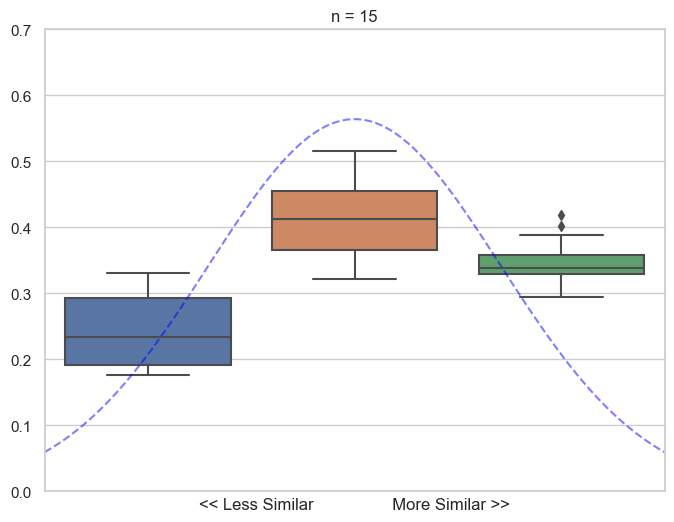

In [228]:
pic_name = "similarity_counts.png"
plot_data = face_task_data[\
[1, 2, 3]\
]#.reset_index(drop=True)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data)
plt.title("n = {}".format(len(plot_data)))

plt.xticks(ticks = [])
plt.xlabel("<< Less Similar                 More Similar >>")

# Gaussian distribution parameters
data = np.repeat([1-1, 2-1, 3-1], [1, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.ylim(0, 0.7)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1194]:
# #DEBUGGING
# data = convert_df_to_arr(plot_data)[0]
# fig, ax = plt.subplots(figsize=(8,6))
# bp = ax.boxplot(data, widths=0.6, patch_artist=True)
# # Graph title
# # ax.set_title(title, fontsize=14)
# ax.grid(axis='x')
# ax.tick_params(axis='x', which='major', length=0)
# # Show x-axis minor ticks
# xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
# ax.set_xticks(xticks, minor=True)
# # Clean up the appearance
# ax.tick_params(axis='x', which='minor', length=3, width=1)

# # Change the colour of the boxes to Seaborn's 'pastel' palette
# colors = sns.color_palette()
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# # Colour of the median lines
# plt.setp(bp['medians'], color='k')

# # Check for statistical significance
# significant_combinations = []
# # Check from the outside pairs of boxes inwards
# # data = data.transpose().to_numpy()
# ls = list(range(1, len(data) + 1))
# combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
# p_values = []
# for c in combinations:
#     data1 = data[c[0] - 1]
#     data2 = data[c[1] - 1]
#     # Significance
#     U, p = stats.ttest_rel(data1, data2)
#     p_values.append(p)
#     # if p < 0.05:
#     significant_combinations.append([c, p])

# p_adj = stats.false_discovery_control([i[1] for i in significant_combinations], method="by")
# mask = p_adj < 0.05

# p_adj = [value for value, mask_value in zip(p_adj, mask) if mask_value]
# significant_combinations = [value for value, mask_value in zip(significant_combinations, mask) if mask_value]
# assert (len(p_adj) == len(significant_combinations)), "Check your data length!"

# for i in range(len(p_adj)):
#     significant_combinations[i][1] = p_adj[i]
# # Get info about y-axis
# # ax.set_ylim((0.0, 0.7))
# bottom, top = ax.get_ylim()
# top = top - 0.3
# bottom = bottom + 0.1
# yrange = top - bottom
# # yrange = 0.1

# # Significance bars
# for i, significant_combination in enumerate(significant_combinations):
#     # Columns corresponding to the datasets of interest
#     x1 = significant_combination[0][0]
#     x2 = significant_combination[0][1]
#     # What level is this bar among the bars above the plot?
#     level = len(significant_combinations) - i
#     # Plot the bar
#     bar_height = (yrange * 0.08 * level) + top
#     bar_tips = bar_height - (yrange * 0.02)
#     plt.plot(
#         [x1, x1, x2, x2],
#         [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
#     # Significance level
#     p = significant_combination[1]
#     if p < 0.001:
#         sig_symbol = '***'
#     elif p < 0.01:
#         sig_symbol = '**'
#     elif p < 0.05:
#         sig_symbol = '*'
#     text_height = bar_height + (yrange * 0.01)
#     plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

# # Adjust y-axis
# bottom, top = ax.get_ylim()
# yrange = top - bottom
# ax.set_ylim(bottom - 0.02 * yrange, top)

In [377]:
(yrange *0.08 * level) + top

0.324

In [37]:
plot_data = face_task_data[\
[1, 2, 3]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plt.figure(figsize=(8, 6))
pic_name = "similarity_counts.png"
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters
data = np.repeat([1, 2, 3], [1, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xticks(labels="", ticks = range(1, len(plot_data.columns)+1))
# plt.ylim(0.1, 0.8)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

TypeError: box_and_whisker() missing 2 required positional arguments: 'between' and 'within'

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

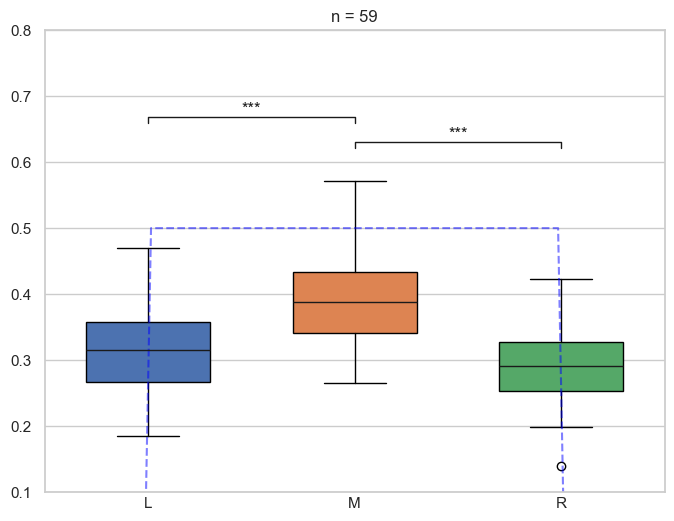

In [39]:
pic_name = "recall_counts.png"
plt.figure(figsize=(8, 6))
plot_data = face_task_data[\
["1_r", "2_r", "3_r"]\
]
plot_data = drop_rows_with_most_nans(plot_data)
# plt.figure(figsize=(8, 6))
box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
plt.title("n = {}".format(len(plot_data)))
plt.xticks(labels = ["L", "M", "R"], ticks = range(1, len(plot_data.columns)+1))

# uniform distribution parameters
data = np.repeat([1, 2, 3,], [1, 1, 1,]) # Adjust the frequency of each number
mu, std = uniform.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = uniform.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
plt.ylim(0.1, 0.8)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

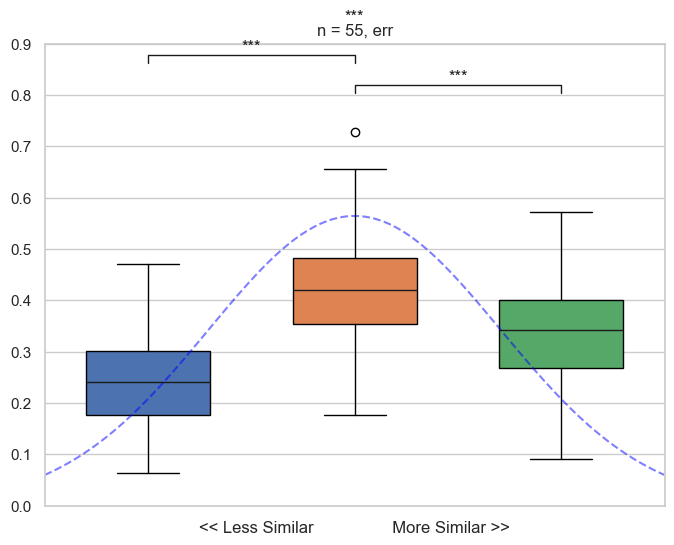

<Figure size 800x600 with 0 Axes>

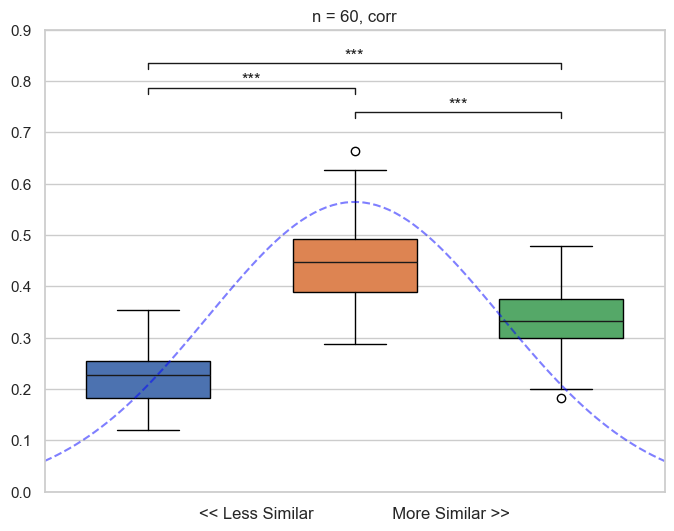

In [40]:
for trial in ["err", "corr"]:
    pic_name = "{}_similarity_counts.png".format(trial)
    plot_data = face_task_data.dropna(subset="recall_con")[\
    ["1_{}".format(trial), "2_{}".format(trial), "3_{}".format(trial)]\
    ]
    plot_data = drop_rows_with_most_nans(plot_data)
    plot_data = drop_rows_with_most_nans(plot_data)
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(8, 6))
    # sns.boxplot(plot_data)
    box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
    plt.title("n = {}, {}".format(len(plot_data), trial))
    
    data = np.repeat([1, 2, 3], [1, 2, 1])
    mu, std = norm.fit(data) # Fit a Gaussian to this data
    
    # Add Gaussian distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
    plt.xticks(labels="", ticks = range(1, len(plot_data.columns)+1))
    plt.ylim(0, 0.9)
    plt.xlabel("<< Less Similar                 More Similar >>")
    
    plt.savefig(path_pic + "{}".format(pic_name))
    plt.show()

<Figure size 800x600 with 0 Axes>

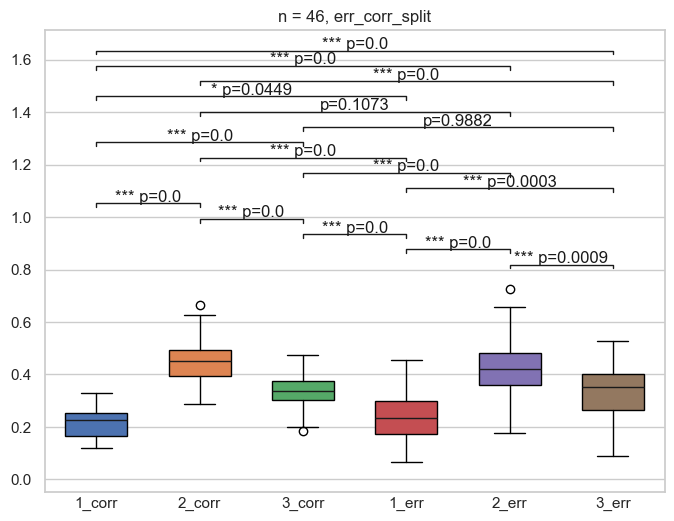

In [1176]:
# trial = "err_corr_split"
pic_name = "{}_similarity_counts.png".format("err_corr_split")
plot_data = face_task_data.dropna(subset="recall_con")[\
["1_corr", "2_corr", "3_corr",
"1_err", "2_err", "3_err",]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
# sns.boxplot(plot_data)
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.title("n = {}, {}".format(len(plot_data), "err_corr_split"))

plt.xticks(labels=plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
# plt.ylim(0, 1)
# plt.xlabel("<< Less Similar                 More Similar >>")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1219]:
# def box_and_whisker(data, conditions, fdr=False):
#     """
#     Create a box-and-whisker plot with significance bars (displaying selected p-values),
#     adapting to dynamic column order for "con" and "incon" conditions.
#     """
#     fig, ax = plt.subplots(figsize=(8, 6))
#     bp = ax.boxplot(data, widths=0.6, patch_artist=True)
#     ax.grid(axis='x')
#     ax.tick_params(axis='x', which='major', length=0)
#     xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
#     ax.set_xticks(xticks, minor=True)
#     ax.tick_params(axis='x', which='minor', length=3, width=1)

#     # Change the colour of the boxes to Seaborn's 'pastel' palette
#     colors = sns.color_palette()
#     for patch, color in zip(bp['boxes'], colors):
#         patch.set_facecolor(color)

#     # Colour of the median lines
#     plt.setp(bp['medians'], color='k')

#     # Dynamically identify "con" and "incon" columns based on their names
#     cond1_columns = [col for col in data.columns if conditions[0] in col and conditions[1] not in col]
#     cond2_columns = [col for col in data.columns if conditions[1] in col]

#     # Ensure columns are sorted correctly (e.g., 1_con, 2_con, 3_con)
#     cond1_columns = sorted(cond1_columns, key=lambda x: int(x.split("_")[0]))
#     cond2_columns = sorted(cond2_columns, key=lambda x: int(x.split("_")[0]))

#     # Combinations within "con" (e.g., 1_con vs 2_con vs 3_con)
#     cond1_combinations = [(i, j) for i in range(len(cond1_columns)) for j in range(i + 1, len(cond1_columns))]

#     # Combinations within "incon" (e.g., 1_incon vs 2_incon vs 3_incon)
#     cond2_combinations = [(i, j) for i in range(len(cond2_columns)) for j in range(i + 1, len(cond2_columns))]

#     # Combinations between "con" and "incon" (e.g., 1_con vs 1_incon, 2_con vs 2_incon)
#     between_combinations = [(i, i) for i in range(len(cond1_columns))]

#     # Combine all comparisons
#     all_combinations = [(cond1_columns[i], cond1_columns[j]) for i, j in cond1_combinations] + \
#                        [(cond2_columns[i], cond2_columns[j]) for i, j in cond2_combinations] + \
#                        [(cond1_columns[i], cond2_columns[j]) for i, j in between_combinations]

#     # Perform statistical tests for selected pairs
#     p_values = []
#     for c1, c2 in all_combinations:
#         data1 = data[c1]
#         data2 = data[c2]
#         _, p = stats.ttest_rel(data1, data2)
#         p_values.append(p)

#     # Adjust for FDR if needed
#     if fdr:
#         p_adj = stats.false_discovery_control(p_values, method="by")
#     else:
#         p_adj = np.array(p_values)

#     # Get info about y-axis
#     bottom, top = ax.get_ylim()
#     yrange = top - bottom

#     # Plot significance bars for selected pairs (including non-significant)
#     for i, (combination, p_val) in enumerate(zip(all_combinations, p_adj)):
#         x1 = data.columns.get_loc(combination[0]) + 1  # Get 1-based index for plotting
#         x2 = data.columns.get_loc(combination[1]) + 1
#         level = len(all_combinations) - i  # Position each bar above the plot
#         bar_height = (yrange * 0.08 * level) + top
#         bar_tips = bar_height - (yrange * 0.02)

#         # Plot the bar
#         plt.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')

#         # Display the p-value for each pair
#         if p_val < 0.001:
#             sig_symbol = '***'
#         elif p_val < 0.01:
#             sig_symbol = '** p={}'.format(np.round(p_val, 4))
#         elif p_val < 0.05:
#             sig_symbol = '* p={}'.format(np.round(p_val, 4))
#         else:
#             sig_symbol = 'p={}'.format(np.round(p_val, 4))

#         text_height = bar_height + (yrange * 0.01)
#         plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

#     # Adjust y-axis
#     bottom, top = ax.get_ylim()
#     yrange = top - bottom
#     ax.set_ylim(bottom - 0.02 * yrange, top)

In [17]:
def box_and_whisker(data, between, within, fdr=False):
    """
    Create a box-and-whisker plot with significance bars, adapting to dynamic column order
    and performing paired t-tests based on the `between` and `within` arguments.

    Args:
    - data: DataFrame containing the data.
    - between: A tuple containing two lists of column names. Paired t-tests will be done between corresponding elements of these two lists.
    - within: A tuple containing two lists of column names. Paired t-tests will be done for all possible pairs within each list.
    - fdr: If True, adjust p-values using False Discovery Rate correction.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    bp = ax.boxplot(data, widths=0.6, patch_artist=True)

    # Set x-tick labels to be the column names from the DataFrame
    ax.set_xticks(range(1, len(data.columns) + 1))
    ax.set_xticklabels(data.columns, fontsize=10)
    
    ax.grid(axis='x')
    ax.tick_params(axis='x', which='major', length=0)
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette()
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Colour of the median lines
    plt.setp(bp['medians'], color='k')

    # Perform within-condition comparisons (e.g., all pairs within con and all pairs within incon)
    within_combinations = []
    for group in within:
        group_combinations = [(i, j) for i in range(len(group)) for j in range(i + 1, len(group))]
        within_combinations.extend([(group[i], group[j]) for i, j in group_combinations])

    # Perform between-condition comparisons (e.g., con[i] vs incon[i] for each i)
    between_combinations = [(between[0][i], between[1][i]) for i in range(min(len(between[0]), len(between[1])))]

    # Combine all comparisons
    all_combinations = within_combinations + between_combinations

    # Perform statistical tests for selected pairs
    p_values = []
    for c1, c2 in all_combinations:
        data1 = data[c1]
        data2 = data[c2]
        _, p = stats.ttest_rel(data1, data2)
        p_values.append(p)

    # Adjust for FDR if needed
    if fdr:
        p_adj = stats.false_discovery_control(p_values, method="by")
    else:
        p_adj = np.array(p_values)

    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Plot significance bars for selected pairs (including non-significant)
    for i, (combination, p_val) in enumerate(zip(all_combinations, p_adj)):
        x1 = data.columns.get_loc(combination[0]) + 1  # Get 1-based index for plotting
        x2 = data.columns.get_loc(combination[1]) + 1
        level = len(all_combinations) - i  # Position each bar above the plot
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)

        # Plot the bar
        plt.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')

        # Display the p-value for each pair
        if p_val < 0.001:
            sig_symbol = '***'
        elif p_val < 0.01:
            sig_symbol = '** p={}'.format(np.round(p_val, 4))
        elif p_val < 0.05:
            sig_symbol = '* p={}'.format(np.round(p_val, 4))
        else:
            sig_symbol = 'p={}'.format(np.round(p_val, 4))

        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)

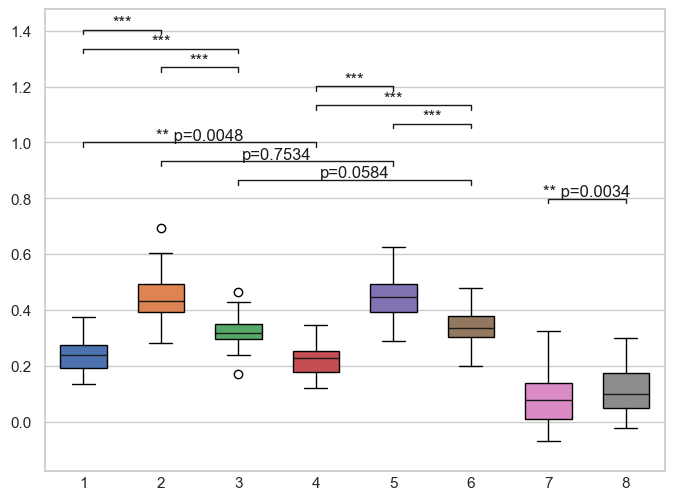

In [1335]:
box_and_whisker(plot_data, between = (["1_con", "2_con", "3_con", "31_con"], ["1_incon", "2_incon", "3_incon", "31_incon"]),
               within = (["1_con", "2_con", "3_con"], ["1_incon", "2_incon", "3_incon"]))

In [1217]:
def box_and_whisker(data, conditions, fdr=False):
    """
    Create a box-and-whisker plot with significance bars (displaying selected p-values).
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    bp = ax.boxplot(data, widths=0.6, patch_artist=True)
    ax.grid(axis='x')
    ax.tick_params(axis='x', which='major', length=0)
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette()
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Colour of the median lines
    plt.setp(bp['medians'], color='k')

    # Get the combinations for within and between condition pairs
    cond1_columns = [f"1_{conditions[0]}", f"2_{conditions[0]}", f"3_{conditions[0]}"]
    cond2_columns = [f"1_{conditions[1]}", f"2_{conditions[1]}", f"3_{conditions[1]}"]

    # Combinations within "con" (1_con vs 2_con vs 3_con)
    cond1_combinations = [(i, j) for i in range(1, 4) for j in range(i + 1, 4)]
    
    # Combinations within "incon" (1_incon vs 2_incon vs 3_incon)
    cond2_combinations = [(i + 3, j + 3) for i in range(1, 4) for j in range(i + 1, 4)]
    
    # Combinations between "con" and "incon" (1_con vs 1_incon, 2_con vs 2_incon, etc.)
    between_combinations = [(i, i + 3) for i in range(1, 4)]  # 1_con vs 1_incon, 2_con vs 2_incon

    # Combine all comparisons
    all_combinations = cond1_combinations + cond2_combinations + between_combinations

    # Perform statistical tests for selected pairs
    p_values = []
    for c in all_combinations:
        data1 = data.iloc[:, c[0] - 1]  # Adjust for 0-indexing in Python
        data2 = data.iloc[:, c[1] - 1]
        _, p = stats.ttest_rel(data1, data2)
        p_values.append(p)

    # Adjust for FDR if needed
    if fdr:
        p_adj = stats.false_discovery_control(p_values, method="by")
    else:
        p_adj = np.array(p_values)

    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Plot significance bars for selected pairs (including non-significant)
    for i, combination in enumerate(all_combinations):
        # Columns corresponding to the datasets of interest
        x1 = combination[0]
        x2 = combination[1]
        level = len(all_combinations) - i  # Position each bar above the plot
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)

        # Plot the bar
        plt.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')

        # Display the p-value for each pair
        p = p_adj[i]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '** p={}'.format(np.round(p, 4))
        elif p < 0.05:
            sig_symbol = '* p={}'.format(np.round(p, 4))
        else:
            sig_symbol = 'p={}'.format(np.round(p, 4))

        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)

<Figure size 800x600 with 0 Axes>

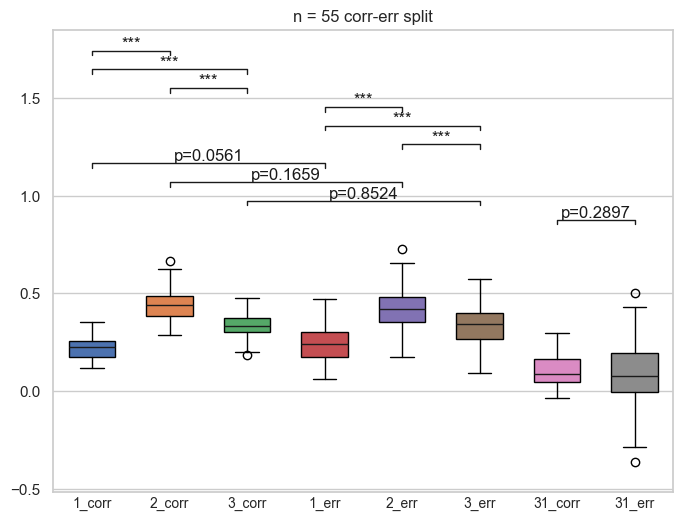

In [146]:
# trial = "err_corr_split"
trial_types = ["corr", "err"]
pic_name = "{}_{}_split_similarity_counts.png".format(trial_types[0], trial_types[1])

plot_data = face_task_data.dropna(subset=f"recall_{trial_types[0]}")[\
[f"1_{trial_types[0]}", f"2_{trial_types[0]}", f"3_{trial_types[0]}",
f"1_{trial_types[1]}", f"2_{trial_types[1]}", f"3_{trial_types[1]}",]\
]

plot_data[f"31_{trial_types[0]}"] = plot_data[f"3_{trial_types[0]}"] - plot_data[f"1_{trial_types[0]}"]
plot_data[f"31_{trial_types[1]}"] = plot_data[f"3_{trial_types[1]}"] - plot_data[f"1_{trial_types[1]}"]

plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
# sns.boxplot(plot_data)
box_and_whisker(plot_data, between = ([f"1_{trial_types[0]}", f"2_{trial_types[0]}", f"3_{trial_types[0]}", f"31_{trial_types[0]}"],
                                      [f"1_{trial_types[1]}", f"2_{trial_types[1]}", f"3_{trial_types[1]}", f"31_{trial_types[1]}"]),
               within = ([f"1_{trial_types[0]}", f"2_{trial_types[0]}", f"3_{trial_types[0]}"],
                         [f"1_{trial_types[1]}", f"2_{trial_types[1]}", f"3_{trial_types[1]}",]))
plt.title("n = {} {}-{} split".format(len(plot_data), trial_types[0], trial_types[1]))

# plt.xticks(labels=plot_data.columns, ticks = range(1, len(plot_data.columns)+1))

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1408]:
plot_data = face_task_data[\
[f"1_{trial_types[0]}", f"2_{trial_types[0]}", f"3_{trial_types[0]}",
f"1_{trial_types[1]}", f"2_{trial_types[1]}", f"3_{trial_types[1]}",]\
]

plot_data["sub"] = list(plot_data.index)
df_long = plot_data.melt(id_vars='sub', 
                  value_vars=[f"1_{trial_types[0]}", f"2_{trial_types[0]}", f"3_{trial_types[0]}",
                            f"1_{trial_types[1]}", f"2_{trial_types[1]}", f"3_{trial_types[1]}",],
                  var_name='Condition', value_name='value')

# Split 'Condition' into two separate columns: 'ResponseType' and 'Congruency'
df_long[['response', trial_types[0]]] = df_long['Condition'].str.split('_', expand=True)

# Convert 'ResponseType' to a categorical variable (1, 2, 3)
df_long['response'] = df_long['response'].astype('category')

# Convert 'Congruency' to categorical (con vs incon)
df_long[trial_types[0]] = df_long[trial_types[0]].astype('category')

df_long = df_long[["sub", "value", "response", trial_types[0]]]
df_long.columns = ["sub", "value", "response", trial_types[0]]
if trial_types[0] == "con":
    df_long[trial_types[0]] = [1 if i == "con" else 0 for i in df_long[trial_types[0]]]
elif trial_types[0] == "corr":
    df_long[trial_types[0]] = [1 if i == "corr" else 0 for i in df_long[trial_types[0]]]
df_long.to_csv(path_pic + "wme-new-{}-anova-df.csv".format(trial_types[0]), index=False)
df_long

sub     value response  corr
0    280119  0.155556        1     1
1    280122  0.267123        1     1
2    280123  0.240964        1     1
3    280126  0.303448        1     1
4    280127  0.138158        1     1
..      ...       ...      ...   ...
325  280205       NaN        3     0
326  280206  0.428571        3     0
327  280208  0.368421        3     0
328  280210  0.391304        3     0
329  280223  0.275862        3     0

[330 rows x 4 columns]

In [1402]:
df_long[df_long["sub"]=="280191"]

sub     value response  congruent
41   280191  0.120419        1          1
96   280191       NaN        2          1
151  280191       NaN        3          1
206  280191  0.152672        1          0
261  280191  0.664122        2          0
316  280191  0.183206        3          0

In [1409]:
print(plot_data["2_corr"].mean(),
plot_data["2_err"].mean())

0.4458627884739962 0.4251245257579667


In [1381]:
import pandas as pd

# Assume df is your initial dataframe with the subject column
df_long = plot_data.melt(id_vars='Subject', 
                  value_vars=['1_con', '2_con', '3_con', '1_incon', '2_incon', '3_incon'],
                  var_name='Condition', value_name='Proportion')

# Split 'Condition' into two separate columns: 'ResponseType' and 'Congruency'
df_long[['ResponseType', 'Congruency']] = df_long['Condition'].str.split('_', expand=True)

# Convert 'ResponseType' to a categorical variable (1, 2, 3)
df_long['ResponseType'] = df_long['ResponseType'].astype('category')

# Convert 'Congruency' to categorical (con vs incon)
df_long['Congruency'] = df_long['Congruency'].astype('category')

print(df_long.head())

  Subject Condition  Proportion ResponseType Congruency
0  280119     1_con    0.188776            1        con
1  280122     1_con    0.302564            1        con
2  280123     1_con    0.204301            1        con
3  280126     1_con    0.357143            1        con
4  280127     1_con    0.230337            1        con


In [1384]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Model with congruency and response type as within-subject factors
aovrm = AnovaRM(df_long, 'Proportion', 'Subject', within=['ResponseType', 'Congruency'])
res = aovrm.fit()

# Print the ANOVA table
# print(res)

# Post-hoc comparisons for 'ResponseType' and 'Congruency'
# For each factor individually, you need to perform Tukey's HSD
# ResponseType
tukey_response = pairwise_tukeyhsd(endog=df_long['Proportion'], 
                                   groups=df_long['ResponseType'], 
                                   alpha=0.05)

print(tukey_response)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     1      2   0.2104   0.0 0.1895  0.2312   True
     1      3   0.0993   0.0 0.0784  0.1201   True
     2      3  -0.1111   0.0 -0.132 -0.0902   True
--------------------------------------------------


In [1385]:
# Congruency
tukey_congruency = pairwise_tukeyhsd(endog=df_long['Proportion'], 
                                     groups=df_long['Congruency'], 
                                     alpha=0.05)

print(tukey_congruency)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   con  incon     -0.0   1.0 -0.0236 0.0236  False
--------------------------------------------------


In [1261]:
subs_1 = list(plot_data.index)

In [1225]:
plot_data = face_task_data.dropna(subset="recall_con")[\
["1_con", "2_con", "3_con",
"1_incon", "2_incon", "3_incon",]\
]
plot_data["3-1_con"] = plot_data["3_con"] - plot_data["1_con"]
plot_data["3-1_incon"] = plot_data["3_incon"] - plot_data["1_incon"]

plot_data

1_con     2_con     3_con   1_incon   2_incon   3_incon   3-1_con  \
sub                                                                            
280119  0.188776  0.505102  0.306122  0.155556  0.538889  0.305556  0.117347   
280122  0.302564  0.389744  0.307692  0.267123  0.287671  0.445205  0.005128   
280123  0.204301  0.403226  0.392473  0.240964  0.445783  0.313253  0.188172   
280126  0.357143  0.280612  0.362245  0.303448  0.358621  0.337931  0.005102   
280127  0.230337  0.449438  0.320225  0.138158  0.526316  0.335526  0.089888   
280128  0.228426  0.406091  0.365482  0.189655  0.528736  0.281609  0.137056   
280131  0.262887  0.376289  0.360825  0.175182  0.350365  0.474453  0.097938   
280133  0.316940  0.387978  0.295082  0.279762  0.357143  0.363095 -0.021858   
280134  0.246231  0.326633  0.427136  0.253333  0.366667  0.380000  0.180905   
280135  0.175532  0.510638  0.313830  0.229008  0.419847  0.351145  0.138298   
280137  0.170984  0.414508  0.414508  0.194690  0.460177  0.345133  0.243523   
280138  0.300518  0.398964  0.300518  0.288043  0.429348  0.282609  0.000000   
280141  0.167568  0.529730  0.302703  0.216561  0.363057  0.420382  0.135135   
280142  0.348571  0.320000  0.331429  0.247706  0.467890  0.284404 -0.017143   
280143  0.284672  0.350365  0.364964  0.286957  0.382609  0.330435  0.080292   
280144  0.248705  0.430052  0.321244  0.141104  0.478528  0.380368  0.072539   
280145  0.207071  0.500000  0.292929  0.120000  0.533333  0.346667  0.085859   
280146  0.159794  0.603093  0.237113  0.229412  0.541176  0.229412  0.077320   
280147  0.244681  0.462766  0.292553  0.263158  0.394737  0.342105  0.047872   
280153  0.251429  0.342857  0.405714  0.205674  0.390071  0.404255  0.154286   
280154  0.252688  0.419355  0.327957  0.250000  0.407895  0.342105  0.075269   
280155  0.224242  0.478788  0.296970  0.219780  0.406593  0.373626  0.072727   
280156  0.351648  0.307692  0.340659  0.327684  0.361582  0.310734 -0.010989   
280157  0.315152  0.369697  0.315152  0.241379  0.434483  0.324138  0.000000   
280159  0.238342  0.523316  0.238342  0.229814  0.534161  0.236025  0.000000   
280160  0.217617  0.476684  0.305699  0.140741  0.474074  0.385185  0.088083   
280161  0.273684  0.389474  0.336842  0.253731  0.417910  0.328358  0.063158   
280162  0.258824  0.482353  0.258824  0.223464  0.486034  0.290503  0.000000   
280163  0.274112  0.451777  0.274112  0.252033  0.471545  0.276423  0.000000   
280164  0.206349  0.444444  0.349206  0.260000  0.450000  0.290000  0.142857   
280165  0.326531  0.326531  0.346939  0.347458  0.288136  0.364407  0.020408   
280166  0.144509  0.485549  0.369942  0.159420  0.463768  0.376812  0.225434   
280167  0.152174  0.538043  0.309783  0.156250  0.518750  0.325000  0.157609   
280168  0.375000  0.321429  0.303571  0.313333  0.300000  0.386667 -0.071429   
280169  0.224852  0.538462  0.236686  0.150685  0.595890  0.253425  0.011834   
280170  0.195876  0.525773  0.278351  0.184211  0.552632  0.263158  0.082474   
280171  0.137143  0.400000  0.462857  0.135593  0.483051  0.381356  0.325714   
280172  0.288889  0.438889  0.272222  0.279762  0.303571  0.416667 -0.016667   
280187  0.135417  0.692708  0.171875  0.174194  0.625806  0.200000  0.036458   
280188  0.238579  0.512690  0.248731  0.233533  0.455090  0.311377  0.010152   
280191  0.120419       NaN       NaN  0.152672  0.664122  0.183206       NaN   
280192  0.151351  0.540541  0.308108  0.164286  0.528571  0.307143  0.156757   
280193  0.232044  0.430939  0.337017  0.214765  0.409396  0.375839  0.104972   
280197  0.317647  0.370588  0.311765  0.323171  0.341463  0.335366 -0.005882   
280198  0.252941  0.417647  0.329412  0.234783  0.443478  0.321739  0.076471   
280199  0.178378  0.551351  0.270270  0.183544  0.512658  0.303797  0.091892   
280200  0.181818  0.414773  0.403409  0.191083  0.331210  0.477707  0.221591   
280202  0.185567  0.407216  0.407216  0.153846  0.440559  0.405594  0.221649   
280203  0.2

In [1303]:
import itertools

plot_data = face_task_data.dropna(subset="recall_con")[\
["1_err", "2_err", "3_err",
"1_corr", "2_corr", "3_corr",]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)

# Get all possible column pairs for comparison
column_pairs = list(itertools.combinations(plot_data.columns, 2))

# Initialize dictionaries to store t-values and p-values
t_values = {}
p_values = {}

# Perform paired t-tests for each pair
for col1, col2 in column_pairs:
    t_stat, p_val = stats.ttest_rel(plot_data[col1], plot_data[col2])
    t_values[(col1, col2)] = t_stat
    p_values[(col1, col2)] = p_val

# Print the results
# print("T-values for each pair:")
# for key, t_val in t_values.items():
#     print(f"{key}: {t_val}")

print("\nP-values for each pair:")
for key, p_val in p_values.items():
    print(f"{key}: {p_val}")


P-values for each pair:
('1_con', '2_con'): 7.557638456877841e-16
('1_con', '3_con'): 7.639635087048708e-10
('1_con', '1_incon'): 0.004825867050247733
('1_con', '2_incon'): 4.4325841624848584e-17
('1_con', '3_incon'): 7.395383458975015e-12
('2_con', '3_con'): 3.63802294026483e-09
('2_con', '1_incon'): 7.375832798251289e-19
('2_con', '2_incon'): 0.7534281383687008
('2_con', '3_incon'): 3.638135446058164e-08
('3_con', '1_incon'): 5.177316776373328e-13
('3_con', '2_incon'): 1.829775112553127e-10
('3_con', '3_incon'): 0.05842681882860041
('1_incon', '2_incon'): 1.3573763063794383e-18
('1_incon', '3_incon'): 5.478445366219554e-14
('2_incon', '3_incon'): 1.488192830098368e-07


In [15]:
stats.ttest_1samp(face_task_data["wm_acc"], .33)

TtestResult(statistic=8.4564628469157, pvalue=7.094604886773494e-10, df=34)

In [535]:
trial_data.loc[trial_data.isnull().any(axis=1)]

target  acc  congruent  fl_rt  recall_rt  prime  recall  similarity
239  right  0.0        0.0    NaN   1.267632   14.0     3.0         2.0
338   left  0.0        0.0    NaN   1.368763   14.0     1.0         1.0

<Figure size 800x600 with 0 Axes>

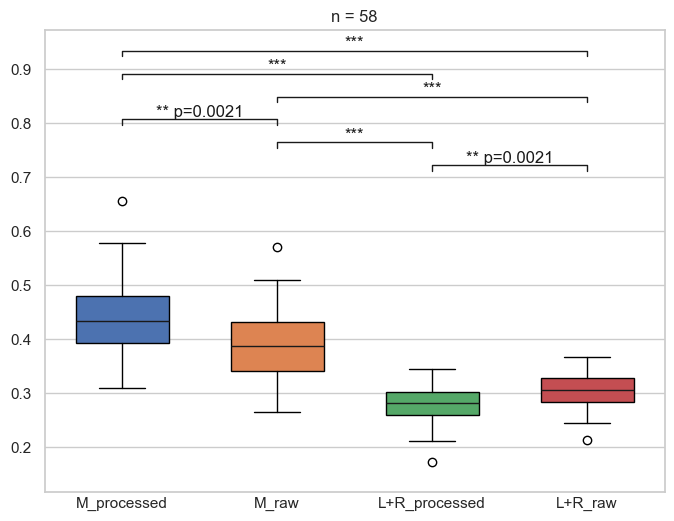

In [41]:
pic_name = "middle_processed.png"
plt.figure(figsize=(8, 6))
# plot_data = face_task_data[face_task_data["2_r"] <= face_task_data["2_r"].median()]
plot_data = face_task_data[\
[2, "2_r",]\
]
plot_data["1+3"] = (face_task_data[1] + face_task_data[3])/2
plot_data["1+3_r"] = (face_task_data["1_r"] + face_task_data["3_r"])/2
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
# plt.figure(figsize=(8, 6))
box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
plt.title("n = {}".format(len(plot_data)))
plt.xticks(labels = ["M_processed", "M_raw", "L+R_processed", "L+R_raw"], ticks = range(1, len(plot_data.columns)+1))

# plt.ylim(.1, 0.8)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [45]:
stats.ttest_rel(plot_data[2], plot_data["2_r"])

TtestResult(statistic=3.219606570113836, pvalue=0.0021207691131560516, df=57)

In [46]:
stats.ttest_rel(plot_data["1+3"], plot_data["1+3_r"])

TtestResult(statistic=-3.219606570113836, pvalue=0.0021207691131560516, df=57)

In [569]:
stats.ttest_rel(plot_data["3_r"], plot_data["2_r"],)

KeyError: '3_r'

In [144]:
plot_data

1         2         3
0   0.176923  0.515385  0.307692
1   0.289474  0.355263  0.355263
2   0.233516  0.417582  0.348901
3   0.330645  0.322581  0.346774
4   0.184987  0.482574  0.332440
5   0.202073  0.463731  0.334197
6   0.218919  0.362162  0.418919
7   0.299465  0.377005  0.323529
8   0.254453  0.343511  0.402036
9   0.191892  0.475676  0.332432
10  0.188406  0.423188  0.388406
11  0.292308  0.412821  0.294872
12  0.192000  0.448000  0.360000
13  0.292958  0.380282  0.326761
14  0.292776  0.368821  0.338403

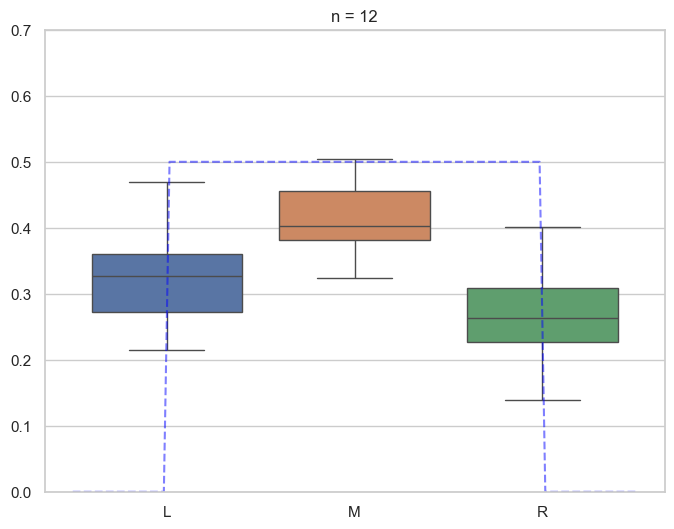

In [177]:
pic_name = "recall_counts.png"
plot_data = face_task_data[\
["1_r", "2_r", "3_r"]\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.title("n = {}".format(len(plot_data)))
plt.xticks(labels = ["L", "M", "R"], ticks = [0, 1, 2])

# uniform distribution parameters
data = np.repeat([1-1, 1, 3-1,], [1, 1, 1,]) # Adjust the frequency of each number
mu, std = uniform.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.ylim(0, 0.7)
p = uniform.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
    
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

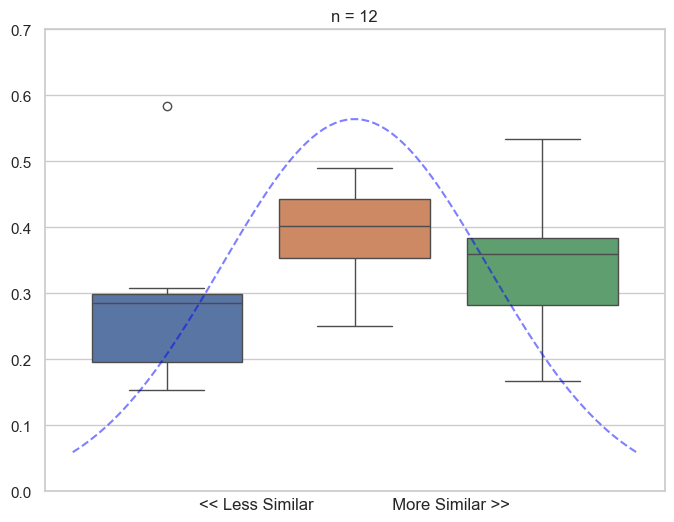

In [176]:
trial = "err"
pic_name = "{}_similarity_counts.png".format(trial)
plot_data = face_task_data[\
[
    "1_{}".format(trial),
     "2_{}".format(trial),
    "3_{}".format(trial)
]\
]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data)
plt.title("n = {}".format(len(plot_data)))

plt.xticks(ticks = [])
plt.xlabel("<< Less Similar                 More Similar >>")

# Gaussian distribution parameters
data = np.repeat([1-1, 2-1, 3-1], [1, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.ylim(0, 0.7)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

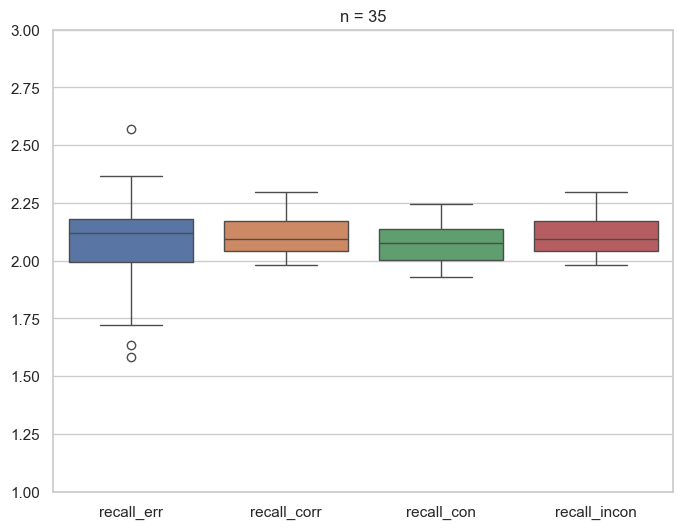

In [309]:
pic_name = "err_corr.png"
plot_data = face_task_data.dropna(subset="recall_err")[\
['recall_err', 'recall_corr', 'recall_con', 'recall_incon',]\
]
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data = plot_data)
plt.ylim(1, 3)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

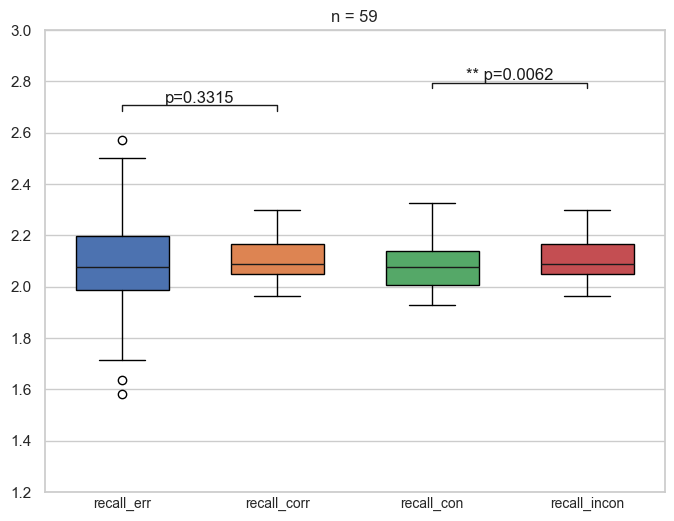

In [49]:
pic_name = "err_corr.png"
plot_data = face_task_data.dropna(subset="recall_con")[\
['recall_err', 'recall_corr', 'recall_con', 'recall_incon',]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
box_and_whisker(plot_data, between = (["recall_con", "recall_corr"], ["recall_incon", "recall_err"]), within = [])
plt.xticks(labels = plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
plt.ylim(1.2, 3)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
# plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [81]:
stats.ttest_rel(face_task_data['recall_err_paired'], face_task_data['recall_corr_paired'], nan_policy="omit")

TtestResult(statistic=-1.1651349237179685, pvalue=0.2525765304918507, df=32)

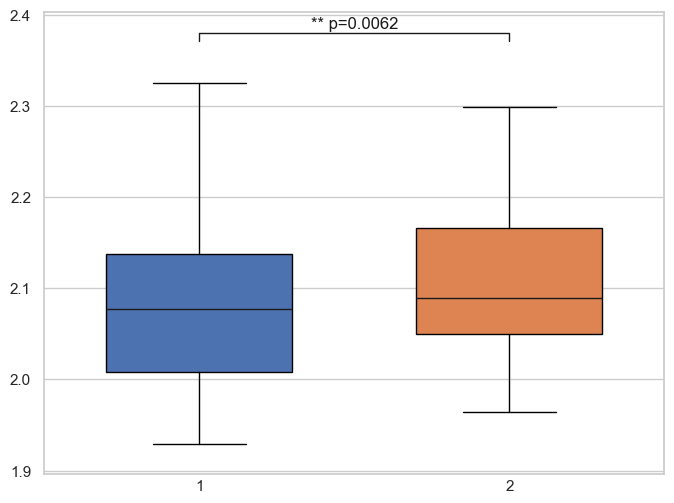

In [50]:
box_and_whisker_simple(convert_df_to_arr(plot_data[["recall_con", "recall_incon"]])[0])

<Figure size 800x600 with 0 Axes>

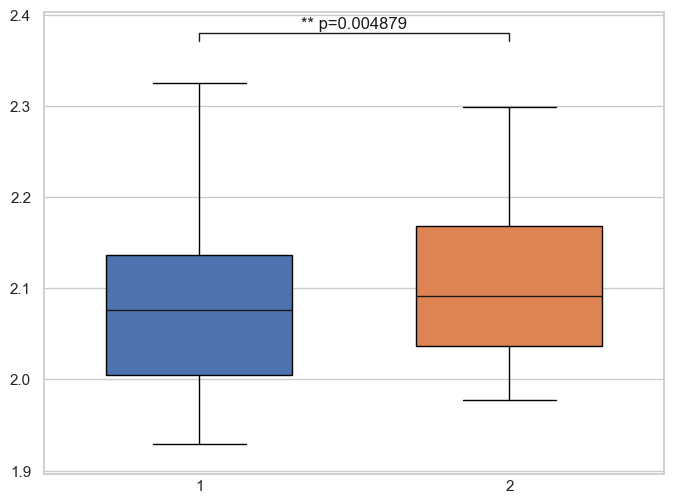

In [1242]:
plt.figure(figsize=(8, 6))
box_and_whisker_simple(convert_df_to_arr(face_task_data[["recall_con", "recall_incon"]])[0])
plt.show()

In [1234]:
convert_df_to_arr(face_task_data[["recall_con", "recall_incon"]])[0]

[array([2.11734694, 2.00512821, 2.18817204, 2.00510204, 2.08988764,
        2.13705584, 2.09793814, 1.97814208, 2.18090452, 2.13829787,
        2.24352332, 2.        , 2.13513514, 1.98285714, 2.08029197,
        2.07253886, 2.08585859, 2.07731959, 2.04787234, 2.15428571,
        2.07526882, 2.07272727, 1.98901099, 2.        , 2.        ,
        2.0880829 , 2.06315789, 2.        , 2.        , 2.14285714,
        2.02040816, 2.22543353, 2.1576087 , 1.92857143, 2.01183432,
        2.08247423, 2.32571429, 1.98333333, 2.03645833, 2.01015228,
        2.        , 2.15675676, 2.10497238, 1.99411765, 2.07647059,
        2.09189189, 2.22159091, 2.22164948, 2.04040404, 2.03684211,
        2.09289617, 2.20689655, 2.01092896]),
 array([2.15      , 2.17808219, 2.07228916, 2.03448276, 2.19736842,
        2.09195402, 2.29927007, 2.08333333, 2.12666667, 2.1221374 ,
        2.15044248, 1.99456522, 2.20382166, 2.03669725, 2.04347826,
        2.2392638 , 2.22666667, 2.        , 2.07894737, 2.19858156,
  

In [1235]:
stats.ttest_rel(plot_data["recall_con"], plot_data["recall_incon"],)

TtestResult(statistic=-3.0919225872307625, pvalue=0.003220750541737253, df=51)

In [ ]:
list(corr_data.columns)[list(corr_data.columns).index(col)] = colnames_dict[col]

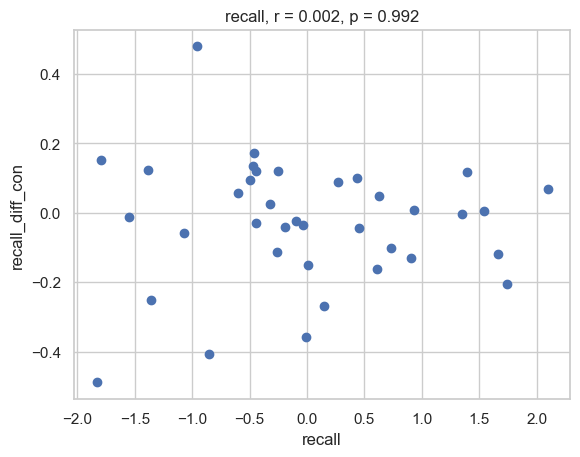

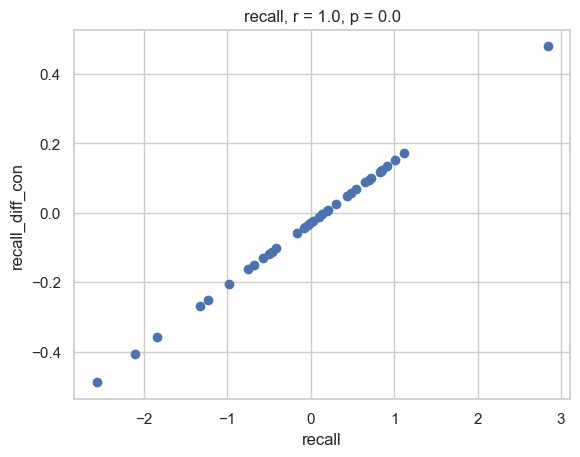

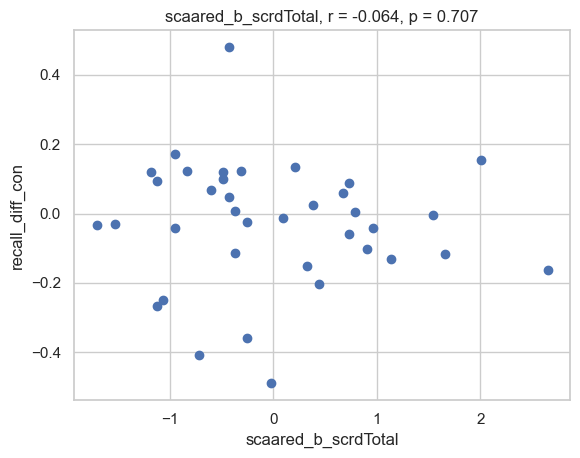

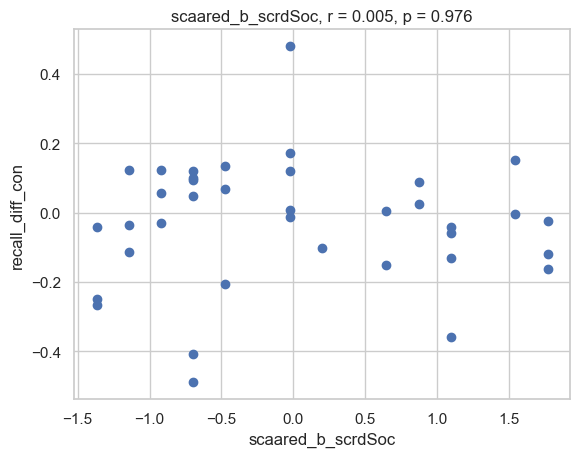

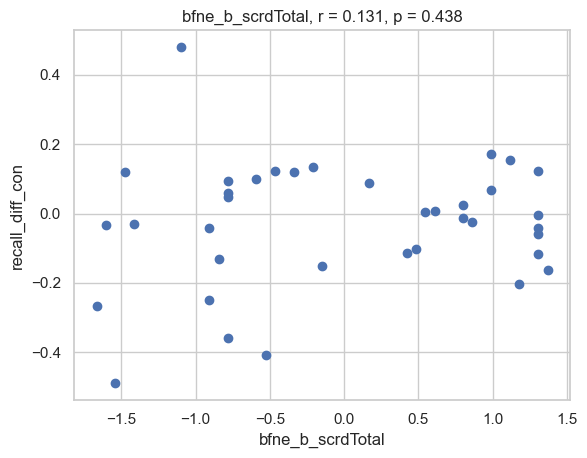

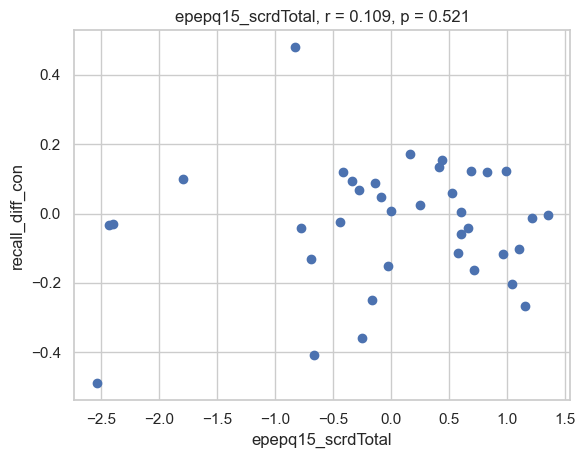

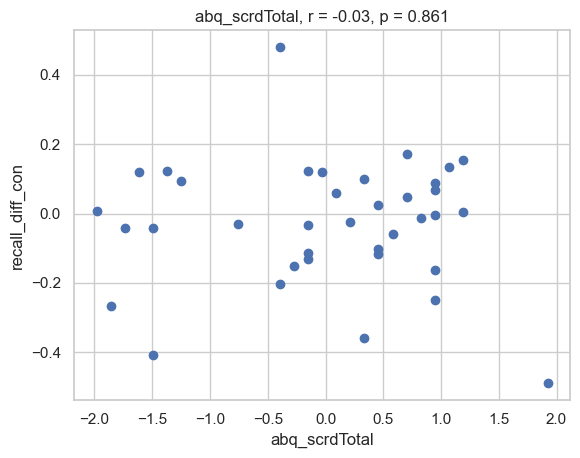

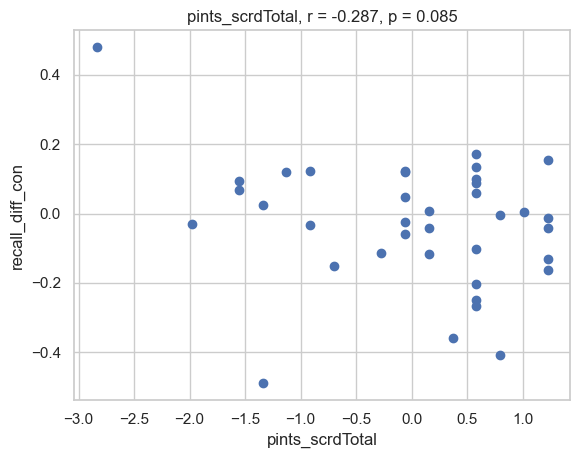

In [30]:
corr_data["scaared_b_scrdTotal_s1_r1_e1"].mean() - 2*corr_data["scaared_b_scrdTotal_s1_r1_e1"].std()

-3.502280661513243

In [1163]:
stats.pearsonr(face_task_data['adexi_b_scrdWm_s1_r1_e1'], face_task_data['recall_diff_con'])

PearsonRResult(statistic=0.012195467285948313, pvalue=0.9323114591385584)

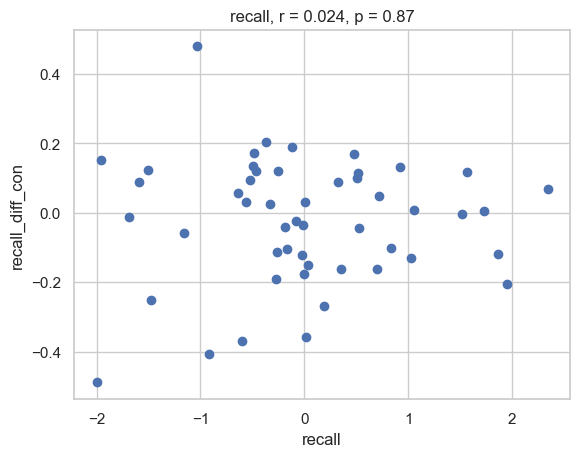

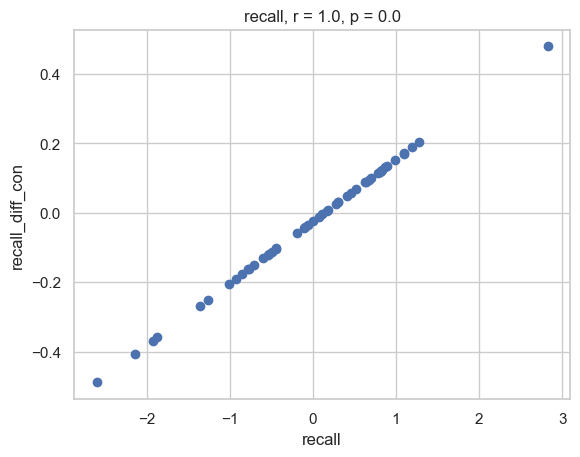

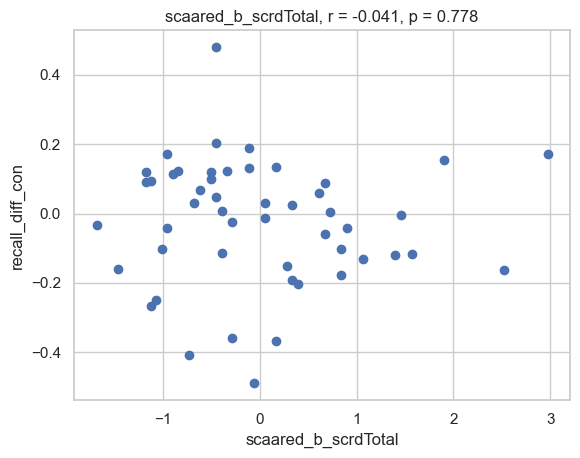

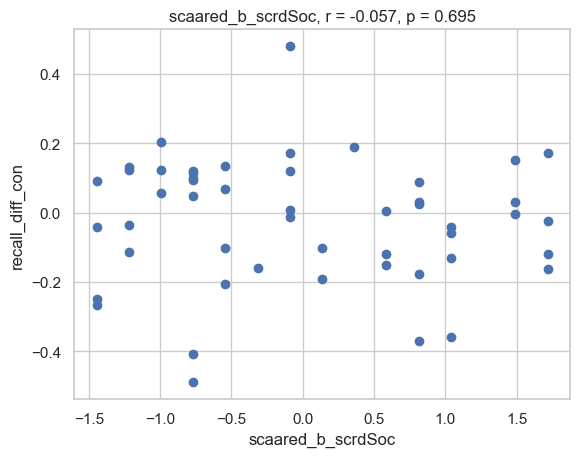

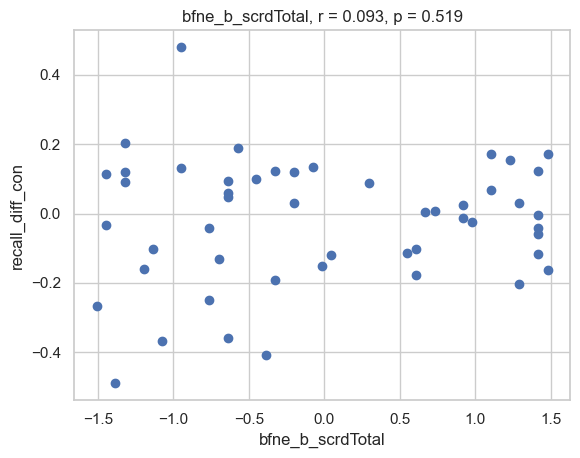

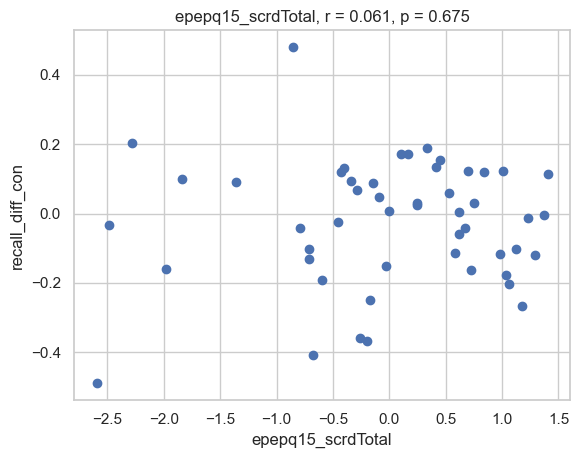

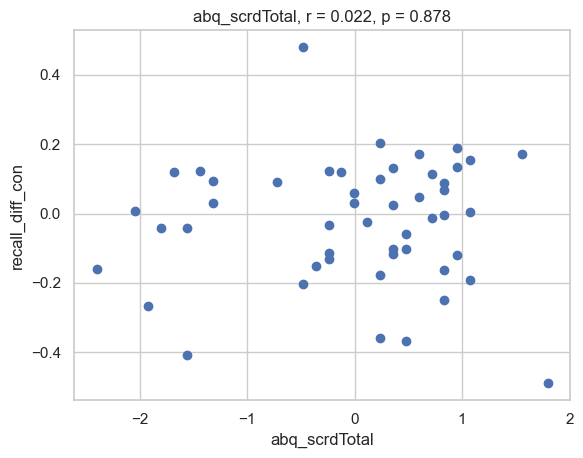

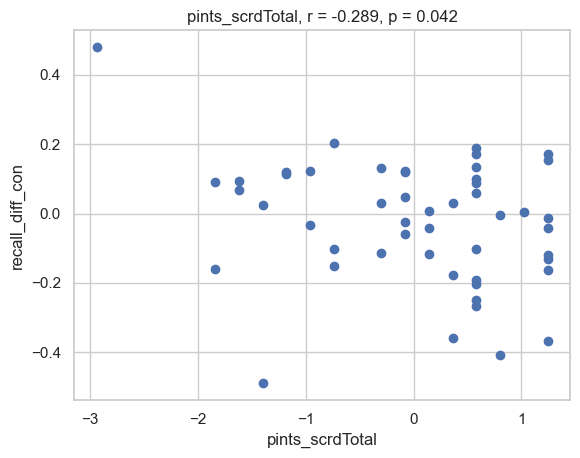

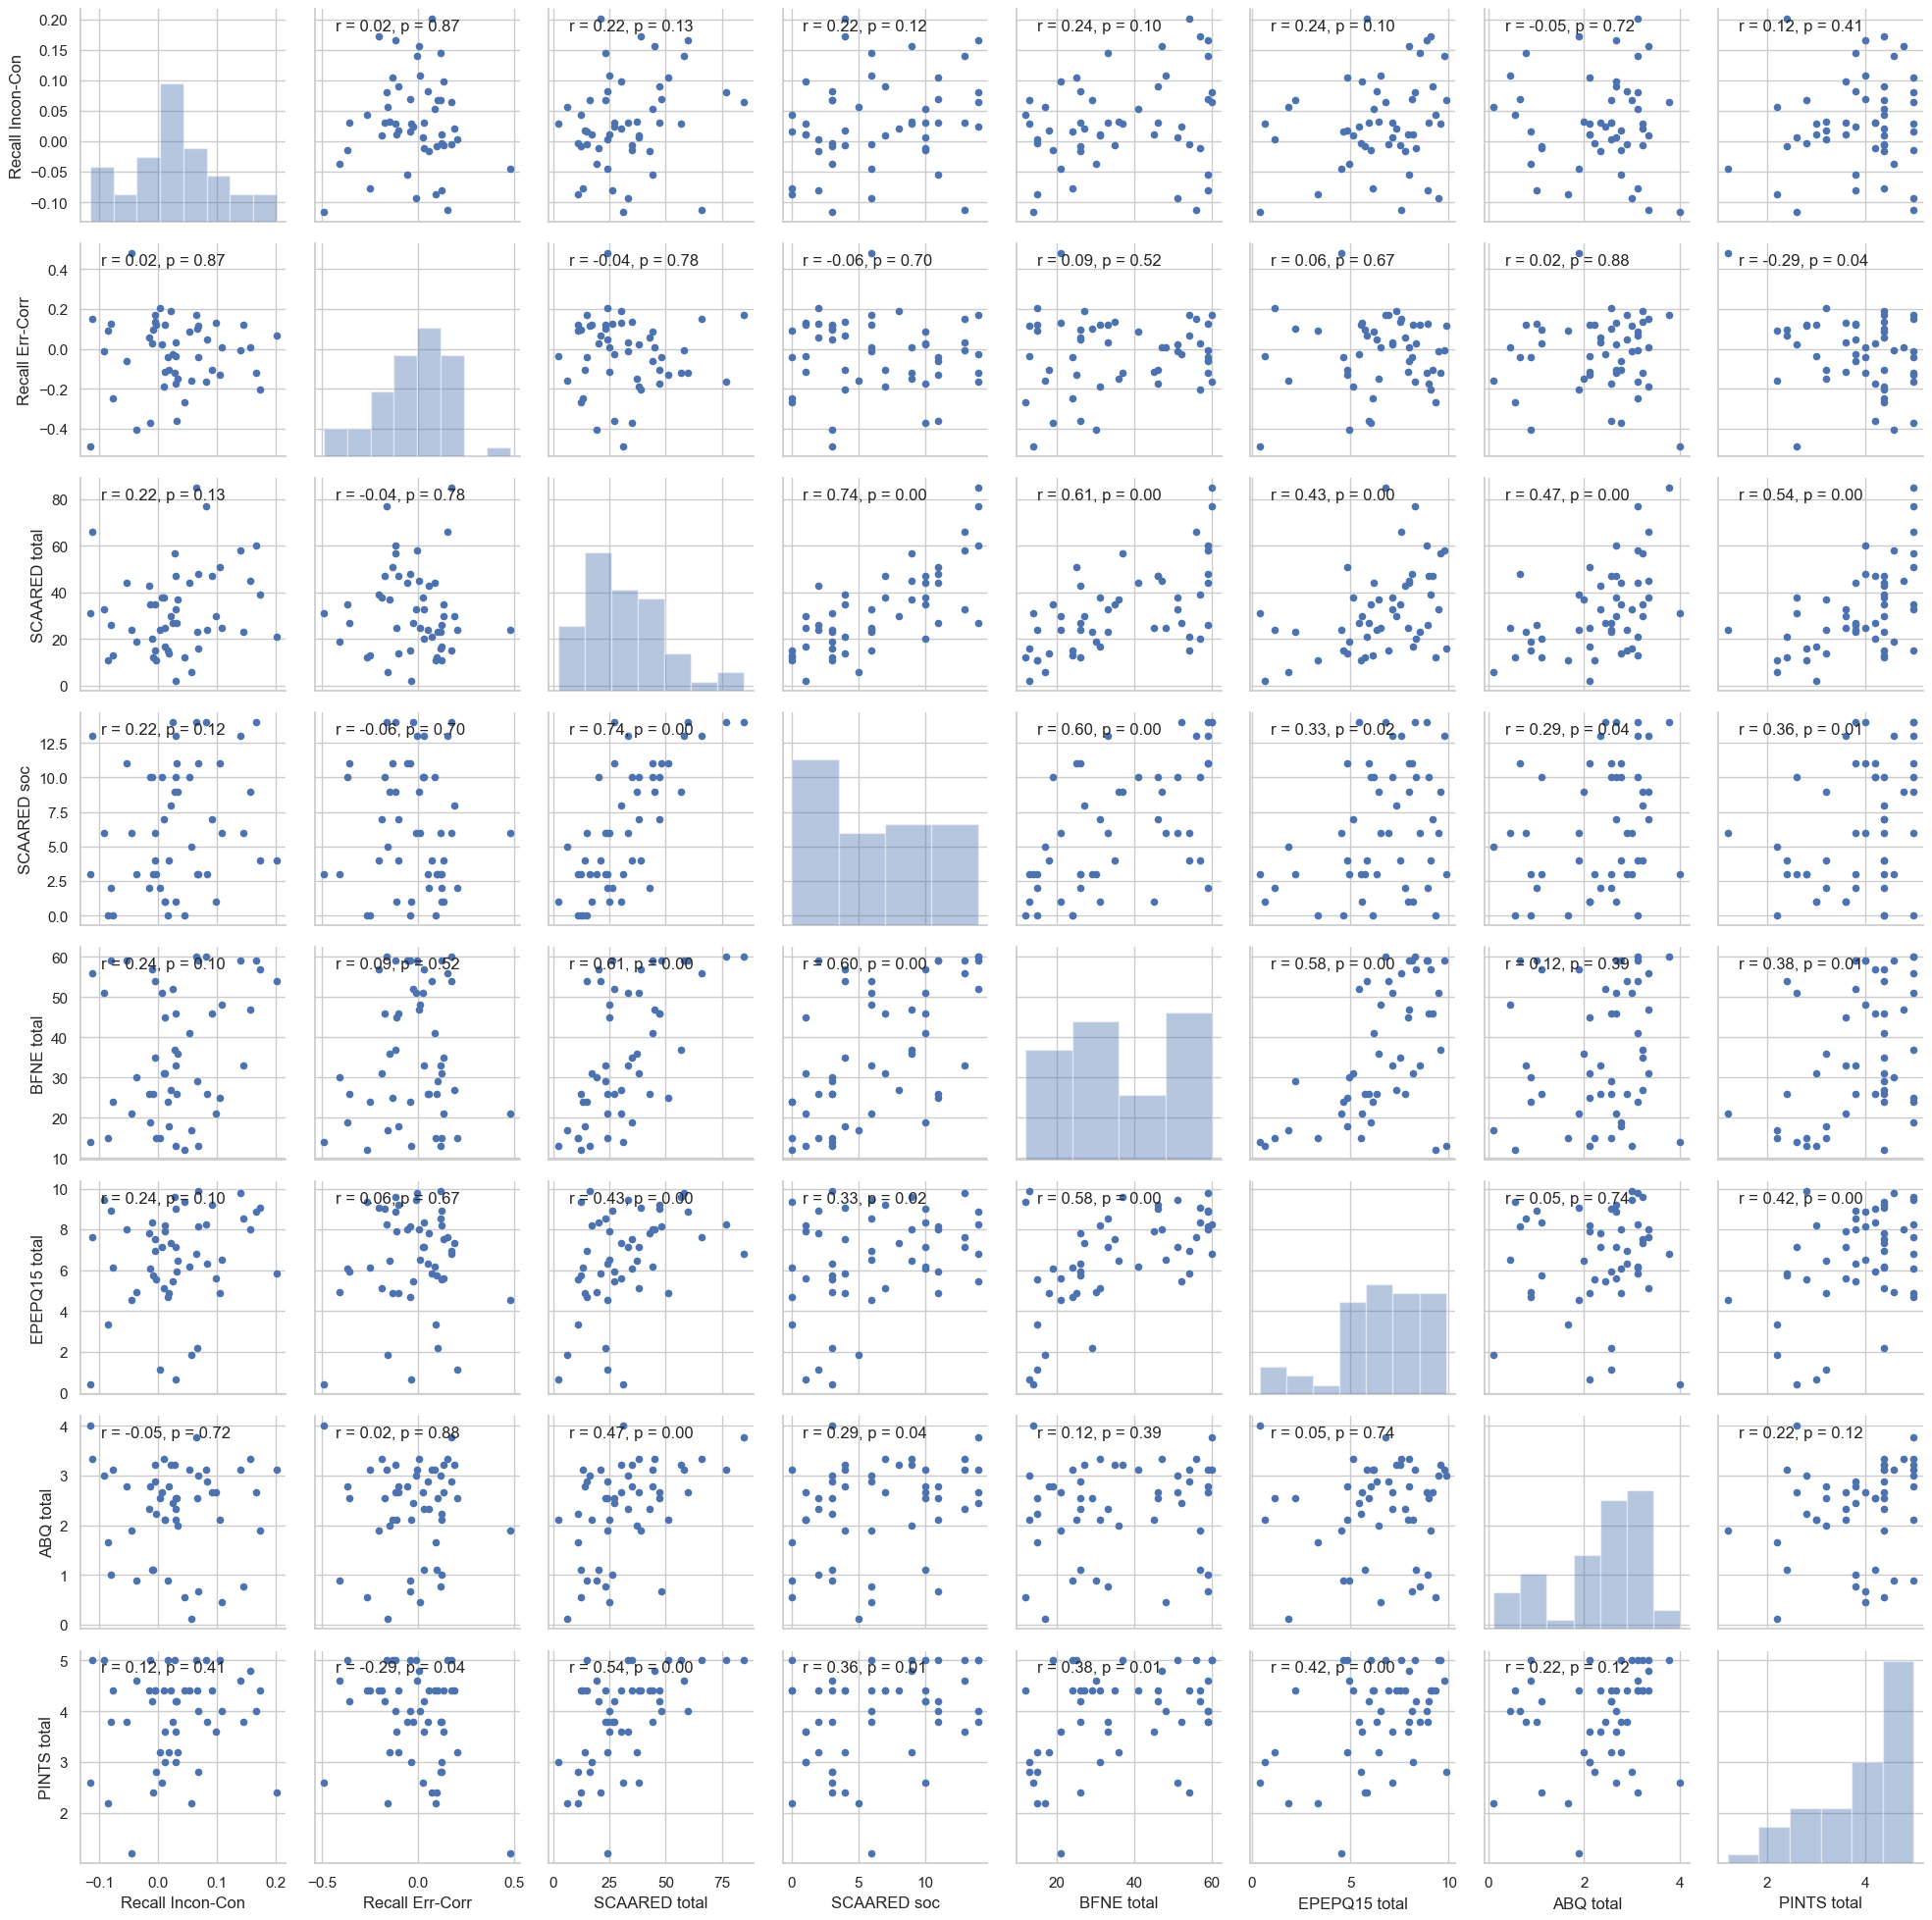

In [1097]:
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
sns.set(style="whitegrid")


corr_data = face_task_data[\
[
"recall_diff_con", "recall_diff_err",
"scaared_b_scrdTotal_s1_r1_e1", "scaared_b_scrdSoc_s1_r1_e1",
"bfne_b_scrdTotal_s1_r1_e1", "epepq15_scrdTotal_s1_r1_e1",
"abq_scrdTotal_s1_r1_e1",  "pints_scrdTotal_s1_r1_e1",
]
].dropna(subset = "recall_diff_err")


colnames_dict = dict(
    {
"recall_diff_con": "Recall Incon-Con",
"recall_diff_err": "Recall Err-Corr",
"scaared_b_scrdTotal_s1_r1_e1": "SCAARED total",
"scaared_b_scrdSoc_s1_r1_e1": "SCAARED soc",
"bfne_b_scrdTotal_s1_r1_e1": "BFNE total",
"epepq15_scrdTotal_s1_r1_e1": "EPEPQ15 total",
"abq_scrdTotal_s1_r1_e1": "ABQ total",
"pints_scrdTotal_s1_r1_e1": "PINTS total"
}
)

corr_col = "recall_diff_err"

for col in corr_data:
    r_corr, p_val = stats.pearsonr(corr_data[corr_col], corr_data[col])
    plt.scatter(stats.zscore(corr_data[col]), corr_data[corr_col])
    plt.title(col[:-9] + ", r = {}, p = {}".format(round(r_corr, 3), round(p_val, 3)))
    plt.ylabel("recall_diff_con")
    plt.xlabel(col[:-9])
    plt.show()

pic_name = "corr_matrix.png"
def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}, p = {:.2f}".format(r, p),
                xy=(.1, .9), xycoords=ax.transAxes)


colnames_dict = dict(
    {
"recall_diff_con": "Recall Incon-Con",
"recall_diff_err": "Recall Err-Corr",
"scaared_b_scrdTotal_s1_r1_e1": "SCAARED total",
"scaared_b_scrdSoc_s1_r1_e1": "SCAARED soc",
"bfne_b_scrdTotal_s1_r1_e1": "BFNE total",
"epepq15_scrdTotal_s1_r1_e1": "EPEPQ15 total",
"abq_scrdTotal_s1_r1_e1": "ABQ total",
"pints_scrdTotal_s1_r1_e1": "PINTS total"
}
)

corr_data.rename(columns=colnames_dict, inplace=True)

g = sns.PairGrid(corr_data, palette=["red"])
g.map_upper(plt.scatter, s=20)
g.map_diag(sns.distplot, kde=False)
g.map_lower(plt.scatter, s=20)
g.map_lower(corrfunc)
g.map_upper(corrfunc)

# Add scales and tick labels to only the margin plots
# for i, ax in enumerate(g.axes.flatten()):
#     row, col = divmod(i, g.axes.shape[1])
#     if row == 0:  # Top row
#         ax.tick_params(labeltop=True)
#     if col == g.axes.shape[1] - 1:  # Right column
#         ax.tick_params(labelright=True)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

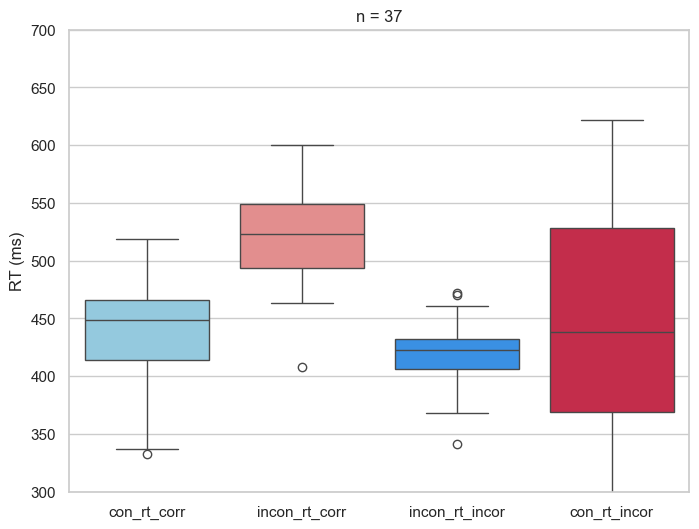

In [74]:
pic_name = "fl_RT.png"
plot_data = face_task_data[\
            ['con_rt_corr',	'incon_rt_corr', 'incon_rt_incor', 'con_rt_incor']\
            ] * 1000
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("RT (ms)")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(300, 700)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

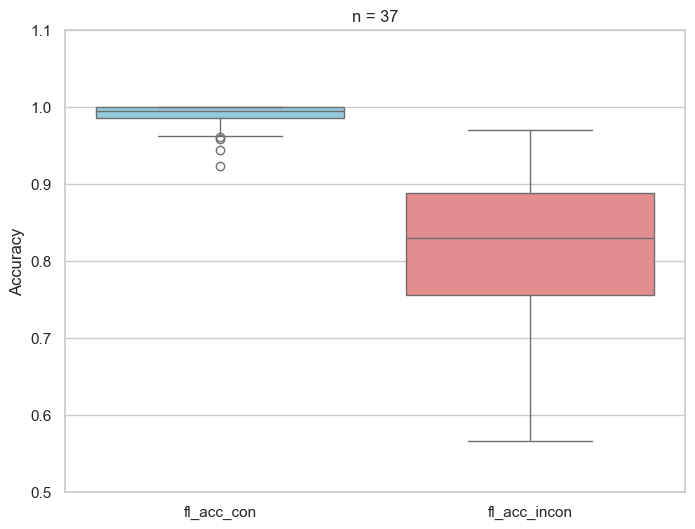

In [76]:

pic_name = "fl_acc.png"
plot_data = face_task_data[\
            ['fl_acc_con', 'fl_acc_incon']\
            ]
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(plot_data, palette=["skyblue", "lightcoral", "dodgerblue", "crimson"])

# plt.xlabel("Trial type")
plt.ylabel("Accuracy")
plt.title("n = {}".format(len(plot_data)))
plt.ylim(.5, 1.1)

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [79]:
plot_data["fl_acc_incon"].std()

0.11534053121825073

In [81]:
plot_data

fl_acc_con  fl_acc_incon
sub                             
280119    0.994949      0.933333
280122    0.994949      0.793651
280123    1.000000      0.927778
280126    1.000000      0.823864
280127    0.978836      0.798969
280128    0.995000      0.925532
280131    0.994898      0.782857
280133    0.989418      0.885417
280134    1.000000      0.773196
280135    0.994845      0.729730
280137    0.984772      0.753333
280138    0.994924      0.939698
280141    0.989418      0.837696
280142    0.957672      0.644444
280143    0.994048      0.878981
280144    1.000000      0.833333
280145    0.995000      0.772727
280146    1.000000      0.955307
280147    1.000000      0.859459
280153    1.000000      0.829412
280154    1.000000      0.888268
280155         NaN      0.461929
280156    0.944162      0.914141
280157    0.923497      0.790323
280159    0.994872      0.830769
280160    1.000000      0.755556
280161    0.979798      0.721925
280162    0.984615      0.969072
280163    1.000000      0.623116
280164    0.984772      0.566138
280165    0.989899      0.598985
280166    1.000000      0.890110
280167    0.994737      0.900552
280168    0.960674      0.857923
280169    0.962366      0.875000
280170    0.989796      0.791667
280171    1.000000      0.720670

In [80]:
plot_data["fl_acc_incon"].mean()

0.8063476365037588

# Face-jitter

In [111]:
import glob
import re
pd.options.mode.chained_assignment = None
n_blocks = 10
n_trials = 40
subsets = []
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face-jitter/data/"
path_pic = '/Users/fzaki001/Documents/DA/wme-face-jitter/'
pattern = r'\d+'
subjects = sorted([re.search(pattern, i)[0] for i in os.listdir(path) if (i.endswith("csv") and "SCRD" not in i)])


# def norm_recall_counts(data, counterbalance):
#     coeff_dict = dict()
#     if counterbalance == "line":
#         for ind in data.recall.value_counts().index:
#             coeff_dict[ind] = data.recall.value_counts()[ind] / len(data)
#     elif counterbalance == "circle":
#         for ind in data.similarity.value_counts().index:
#             coeff_dict[ind] = data.similarity.value_counts()[ind] / len(data)
#     return coeff_dict
def convert_to_float_list_multiple(series):
    float_list = []
    for value in series:
        if isinstance(value, str):
            if "," in value.strip("[]"):
                float_list.append([float(v) for v in value.strip("[]").split(",")])# Check if the value is a string
            else:
                float_list.append(float(value.strip("[]")))  # Convert string to float and remove brackets
        elif isinstance(value, list):  # Check if the value is a list
            float_list.extend([float(v) for v in value])  # Convert each element of the list to float
        else:  # Handle NaN values
            float_list.append(float('nan'))  # Append NaN if value is NaN
    return float_list

In [112]:
sns.set(style="whitegrid")

In [113]:
subjects

['280173',
 '280174',
 '280175',
 '280176',
 '280177',
 '280178',
 '280179',
 '280181',
 '280182',
 '280183',
 '280184',
 '280185',
 '280186',
 '280189',
 '280194',
 '280195',
 '280196',
 '280201',
 '280204',
 '280207',
 '280209',
 '280211',
 '280213',
 '280214',
 '280215',
 '280216',
 '280217',
 '280218',
 '280219',
 '280220',
 '280222',
 '280224',
 '280226',
 '280227',
 '280228',
 '280229',
 '280230',
 '280231',
 '280234',
 '280235',
 '280237',
 '280238',
 '280240',
 '280241',
 '280243',
 '280244']

  9%|██▎                        | 4/46 [00:00<00:02, 17.06it/s]

sub-280173 checked
sub-280174 checked
sub-280175 checked
sub-280176 checked


 13%|███▌                       | 6/46 [00:00<00:03, 12.15it/s]

sub-280177 checked
sub-280178 checked


 17%|████▋                      | 8/46 [00:00<00:03, 12.13it/s]

sub-280179 checked
sub-280181 checked
sub-280182 checked


 26%|██████▊                   | 12/46 [00:00<00:02, 14.10it/s]

sub-280183 checked
sub-280184 checked
sub-280185 checked
sub-280186 checked


 30%|███████▉                  | 14/46 [00:01<00:02, 12.30it/s]

sub-280189 checked
sub-280194 checked


 39%|██████████▏               | 18/46 [00:01<00:02, 12.98it/s]

sub-280195 checked
sub-280196 checked
sub-280201 checked
sub-280204 checked


 50%|█████████████             | 23/46 [00:01<00:01, 16.17it/s]

sub-280207 checked
sub-280209 checked
sub-280211 checked
sub-280213 checked
sub-280214 checked


 63%|████████████████▍         | 29/46 [00:01<00:00, 19.34it/s]

sub-280215 checked
sub-280216 checked
sub-280217 checked
sub-280218 checked
sub-280219 checked


 67%|█████████████████▌        | 31/46 [00:02<00:00, 16.81it/s]

sub-280220 checked
sub-280222 checked
sub-280224 checked


 80%|████████████████████▉     | 37/46 [00:02<00:00, 19.08it/s]

sub-280226 checked
sub-280227 checked
sub-280228 checked
sub-280229 checked
sub-280230 checked


 87%|██████████████████████▌   | 40/46 [00:02<00:00, 19.89it/s]

sub-280231 checked
sub-280234 checked
sub-280235 checked
sub-280237 checked
sub-280238 checked


100%|██████████████████████████| 46/46 [00:02<00:00, 16.59it/s]

sub-280240 checked
sub-280241 checked
sub-280243 checked
sub-280244 checked


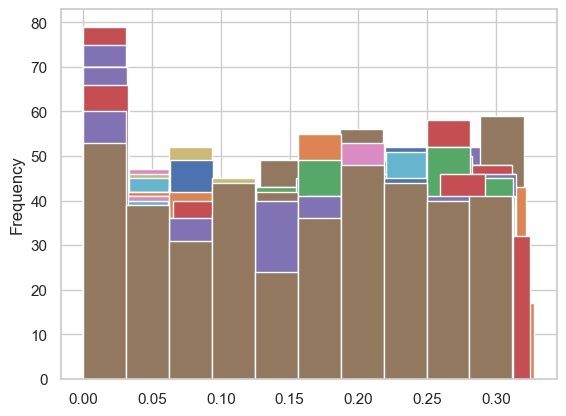

In [115]:
trial_data_list = []
sanity_check = {
    "less_200ms": [],
    "2_or_more": [],
    "3_plus": [],
}
from tqdm import tqdm
normalize = True
face_task_dict = {
    "sub": [],
    "fl_acc": [],
    "fl_acc_con": [],
    "fl_acc_incon": [],
    "wm_acc": [],
    "con_rt_corr": [],
    "incon_rt_corr": [],
    "con_rt_incor": [],
    "incon_rt_incor": [],
    "skipped_fl": [],
    "recall_rt": [],
    "recall_rt_std": [],
    "skipped_recall": [],
    "recall_mean": [],
    "recall_corr": [],
    "recall_corr_paired": [],
    "recall_corr_L": [],
    "recall_corr_R": [],
    "recall_err": [],
    "recall_err_paired": [],
    "recall_err_L": [],
    "recall_err_R": [],
    "recall_con": [],
    "recall_con_L": [],
    "recall_con_R": [],
    "recall_incon": [],
    "recall_incon_L": [],
    "recall_incon_R": [],
    "recall_L": [],
    "recall_R": [],
    1: [],
    2: [],
    3: [],
    
    "1_r":[],
    "2_r":[],
    "3_r":[],
    
    "1_corr": [],
    "2_corr": [],
    "3_corr": [],
    
    "1_err": [],
    "2_err": [],
    "3_err": [],

    "1_con": [],
    "2_con": [],
    "3_con": [],

    "1_incon": [],
    "2_incon": [],
    "3_incon": [],
}

value_counts = 0

for sub in tqdm(subjects):
    pattern = "{}sub-{}*_wme-face*.csv".format(path, sub)
    filename = glob.glob(pattern)
    # wm_df = pd.DataFrame()
    data = pd.read_csv(filename[0])
    start_index = data["flanker_acc"].first_valid_index()
    data = data.iloc[start_index:].reset_index(drop = True)
    data["real_jitter"] = data["prime_face.started"] - data["task_fixImg_4.started"]
    # data["recall_resp_debug.keys"].value_counts().plot(kind = 'bar')
    prepotent_rt_multiple = convert_to_float_list_multiple(data["recall_resp_debug.rt"].dropna())
    prepotent_rt = convert_to_float_list(data["recall_resp_debug.rt"].dropna())
    # plt.show()
    # plt.hist(prepotent_rt)
    # plt.xlim((0, 1))
    # plt.show()
    sanity_check["less_200ms"]\
    .append(len([i for i in prepotent_rt if i<=0.2]))
    sanity_check["2_or_more"]\
    .append(len([i for i in prepotent_rt_multiple if (isinstance(i, list) and len(i) >= 2)]))
    sanity_check["3_plus"]\
    .append(len([i for i in prepotent_rt_multiple if (isinstance(i, list) and len(i) > 3)]))
    data["real_jitter"].plot(kind="hist")
    # plt.show()
    # if "similarity" in data.columns:
    trial_data = data[
    [
    "target",
    "flanker_acc",
    "congruent",
    "flanker_face_resp.rt",
    "recall_resp.rt",
    "prime",
    "recall",
    "similarity",
    "real_jitter",
    "prime_jitter",
    ]
    ].replace(to_replace=['None'], value=np.nan).dropna(subset = "congruent").reset_index(drop = True)
    trial_data.columns = ["target", "acc", "congruent", "fl_rt", "recall_rt", "prime", "recall", "similarity", "jitter", "prime_jitter"]
    trial_data[["recall", "similarity"]] = trial_data[["recall", "similarity"]].astype(float)

    trial_data["fl_rt"] = convert_to_float_list(trial_data.fl_rt)
    trial_data["recall_rt"] = convert_to_float_list(trial_data.recall_rt)

    fl_data = trial_data.copy()
    # face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["skipped_fl"].append(fl_data.fl_rt.isna().sum())
    face_task_dict["skipped_recall"].append(fl_data.recall_rt.isna().sum())
    
    fl_data = fl_data.dropna(subset = "fl_rt").reset_index(drop = True)
    fl_data = fl_data[fl_data["fl_rt"] > 0.150].reset_index(drop = True)
    
    face_task_dict["con_rt_corr"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["incon_rt_corr"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 1)].fl_rt.mean())
    face_task_dict["con_rt_incor"].append(fl_data[(fl_data["congruent"] == 1) & (fl_data["acc"] == 0)].fl_rt.mean())
    face_task_dict["incon_rt_incor"].append(fl_data[(fl_data["congruent"] == 0) & (fl_data["acc"] == 0)].fl_rt.mean())

    face_task_dict["fl_acc"].append(fl_data.acc.mean())
    face_task_dict["fl_acc_con"].append(fl_data[fl_data["congruent"] == 1].acc.mean())
    face_task_dict["fl_acc_incon"].append(fl_data[fl_data["congruent"] == 0].acc.mean())

    wm_acc_data = trial_data.dropna(subset = "recall").reset_index(drop = True)
    face_task_dict["wm_acc"].append(len(wm_acc_data[wm_acc_data["similarity"] == 2])/len(wm_acc_data))

    trial_data = trial_data.dropna(subset = "fl_rt").reset_index(drop = True)
    trial_data = trial_data.dropna(subset = "recall").reset_index(drop = True)
    trial_data["prime"] = trial_data["prime"].apply(lambda x: "L" if x == 6 else ("R" if x == 14 else None))
    trial_data = trial_data[trial_data["fl_rt"] > 0.150].reset_index(drop = True)
    trial_data["sub"] = sub
    trial_data_list.append(trial_data)
    
    trial_types = ["all", "corr", "incorr", "left", "right", "con", "incon"]
    # trial_data = trial_data[trial_data["acc"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["congruent"] == 0].reset_index(drop = True)
    # trial_data = trial_data[trial_data["target"] == "left"].reset_index(drop = True)
    # trial_data = trial_data[(trial_data["target"] == "right") & (trial_data["acc"] == 1)].reset_index(drop = True)
    
    trial_data.loc[trial_data["prime"] == "L", "similarity"] = 4 - trial_data.loc[trial_data["prime"] == "L", "similarity"]

    assert np.sum(list(trial_data[trial_data["fl_rt"] < 0.150]["fl_rt"])) == 0, "Check your flanker RT!"
    assert np.sum(list(trial_data[trial_data["fl_rt"] > 0.7]["fl_rt"])) == 0, "Check your flanker RT!"
    assert np.sum([type(i) != float for i in trial_data["fl_rt"]]) == 0, "Check your flanker RT!"
    assert np.sum([type(i) != float for i in trial_data["recall_rt"]]) == 0, "Check your recall RT!"
    assert np.sum(list(trial_data[trial_data["recall_rt"] > 3]["recall_rt"])) == 0, "Check your recall RT!"
    assert np.sum(list(trial_data.isna().sum())) == 0, "Check data for NaN!"
    
    print("sub-{} checked".format(sub))
    
    face_task_dict["recall_corr"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_corr_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_corr_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                           & (trial_data["prime"] == "L")].similarity.mean())

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "R")]) >= 6:
        face_task_dict["recall_err_R"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "R")].similarity.mean())
    else:
        face_task_dict["recall_err_R"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0) & (trial_data["prime"] == "L")]) >= 6:
        face_task_dict["recall_err_L"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)\
                                             & (trial_data["prime"] == "L")].similarity.mean())
    else:
        face_task_dict["recall_err_L"].append(np.nan)

    if len(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)]) >= 6:
        face_task_dict["recall_err"].append(trial_data[(trial_data["acc"] == 0) & (trial_data["congruent"] == 0)].similarity.mean())

    else:
        face_task_dict["recall_err"].append(np.nan)

    face_task_dict["recall_con"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)].similarity.mean())
    face_task_dict["recall_con_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_con_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 1)\
                                          & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_incon"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)].similarity.mean())
    face_task_dict["recall_incon_R"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "R")].similarity.mean())
    face_task_dict["recall_incon_L"].append(trial_data[(trial_data["acc"] == 1) & (trial_data["congruent"] == 0)\
                                            & (trial_data["prime"] == "L")].similarity.mean())

    face_task_dict["recall_L"].append(trial_data[trial_data["prime"] == "L"].similarity.mean())

    face_task_dict["recall_R"].append(trial_data[trial_data["prime"] == "R"].similarity.mean())

    face_task_dict["recall_mean"].append(trial_data.similarity.mean())
    
    
    face_task_dict["recall_rt"].append(trial_data.recall_rt.mean()+1)
    face_task_dict["recall_rt_std"].append(trial_data.recall_rt.std())

    err_inds = []
    for i in range(len(trial_data)):
        if i > 1:
            if (trial_data.acc[i] == 0 and trial_data.congruent[i] == 0)\
            and (trial_data.acc[i-1] == 1 and trial_data.congruent[i-1] == 0):
                err_inds.append(i-1)
                err_inds.append(i)
    error_data = trial_data.iloc[err_inds]
    if (len(error_data[error_data["acc"] == 1]) >= 6 and len(error_data[error_data["acc"] == 0]) >= 6):
        face_task_dict["recall_err_paired"].append(error_data[error_data["acc"] == 0].similarity.mean())
        face_task_dict["recall_corr_paired"].append(error_data[error_data["acc"] == 1].similarity.mean())
    else: 
        face_task_dict["recall_err_paired"].append(np.nan)
        face_task_dict["recall_corr_paired"].append(np.nan)
    
    if normalize:
        norms = norm_recall_counts(trial_data, "similarity")
        face_task_dict[1].append(norms[1])
        face_task_dict[2].append(norms[2])
        face_task_dict[3].append(norms[3])
        norms_corr = norm_recall_counts(trial_data[trial_data["acc"] == 1], "similarity")
        face_task_dict["1_corr"].append(norms_corr[1])
        face_task_dict["2_corr"].append(norms_corr[2])
        face_task_dict["3_corr"].append(norms_corr[3])
        norms_err = norm_recall_counts(trial_data[trial_data["acc"] == 0], "similarity")
        try:
            face_task_dict["1_err"].append(norms_err[1])
        except:
            face_task_dict["1_err"].append(np.nan)
        try:
            face_task_dict["2_err"].append(norms_err[2])
        except:
            face_task_dict["2_err"].append(np.nan)
        try:
            face_task_dict["3_err"].append(norms_err[3])
        except:
            face_task_dict["3_err"].append(np.nan)
        norms_con = norm_recall_counts(trial_data[trial_data["congruent"] == 1], "similarity")
        face_task_dict["1_con"].append(norms_con[1])
        face_task_dict["2_con"].append(norms_con[2])
        face_task_dict["3_con"].append(norms_con[3])
        norms_incon = norm_recall_counts(trial_data[trial_data["congruent"] == 0], "similarity")
        face_task_dict["1_incon"].append(norms_incon[1])
        face_task_dict["2_incon"].append(norms_incon[2])
        face_task_dict["3_incon"].append(norms_incon[3])
        
    else:
        value_counts += trial_data.similarity.value_counts().sort_index()
        face_task_dict[1].append(trial_data.similarity.value_counts()[1])
        face_task_dict[2].append(trial_data.similarity.value_counts()[2])
        face_task_dict[3].append(trial_data.similarity.value_counts()[3])

    
    norms = norm_recall_counts(trial_data, "recall")
    face_task_dict["1_r"].append(norms[1])
    face_task_dict["2_r"].append(norms[2])
    face_task_dict["3_r"].append(norms[3])

    face_task_dict["sub"].append(sub)
    # trial_data_list.append(trial_data)

face_task_data = pd.DataFrame(face_task_dict)

redcap_data = pd.read_csv(path + "redcap/" + [i for i in os.listdir(path + "redcap/") if i.endswith("csv") and "SCRD" in i][0])
redcap_data["record_id"] = redcap_data["record_id"].astype(str)
redcap_data["sub"] = redcap_data["record_id"]

start_index = list(redcap_data["record_id"]).index(face_task_data["sub"][0])
redcap_data = redcap_data.iloc[start_index:].reset_index(drop = True)[["sub"] + [i for i in redcap_data.columns if "scrd" in i]]
# print(redcap_data.columns)
# redcap_data = redcap_data.dropna(axis = 1)
face_task_data.set_index('sub', inplace=True)
redcap_data.set_index('sub', inplace=True)

sanity_check_nan = replace_outliers_with_nan(pd.DataFrame(sanity_check), 2)
rows_to_drop = list(sanity_check_nan[sanity_check_nan.isna().any(axis=1)].index)

face_task_data = face_task_data.drop(index = [list(face_task_data.index)[i] for i in rows_to_drop])

face_task_data = face_task_data[(face_task_data["skipped_fl"] < 100) & (face_task_data["skipped_recall"] < 100)]
face_task_data = face_task_data[face_task_data["fl_acc"] > 0.6]

face_task_data = face_task_data.join(redcap_data, on = "sub")
face_task_data["recall_diff_con"] = face_task_data["recall_incon"] - face_task_data["recall_con"]
face_task_data["recall_diff_err"] = face_task_data["recall_err"] - face_task_data["recall_corr"]
face_task_data = replace_outliers_with_nan(face_task_data)
trial_data_list = [i for i in trial_data_list if i["sub"][0] in face_task_data.index]

In [793]:
sanity_check

{'less_200ms': [28, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2_or_more': [76, 0, 174, 0, 0, 1, 0, 0, 0, 0, 7, 1, 0],
 '3_plus': [8, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [102]:
face_task_data.index

Index(['280174', '280176', '280177', '280178', '280179', '280181', '280182',
       '280183', '280184', '280185', '280186', '280189', '280194', '280195',
       '280196', '280201', '280204', '280207', '280209', '280211', '280213',
       '280214', '280215', '280216', '280217', '280218', '280224', '280226',
       '280227', '280228', '280229', '280230', '280231', '280234', '280235',
       '280237', '280238', '280240', '280241', '280243', '280244'],
      dtype='object', name='sub')

41

In [796]:
len(face_task_data)

12

<Axes: >

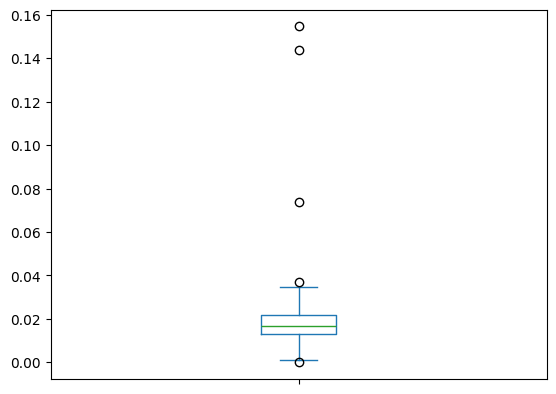

In [10]:
data[["prime_jitter", "real_jitter"]]
(data["prime_jitter"] - data["real_jitter"]).dropna().plot(kind="box")

<Axes: title={'center': 'Some Title'}, xlabel='jitter'>

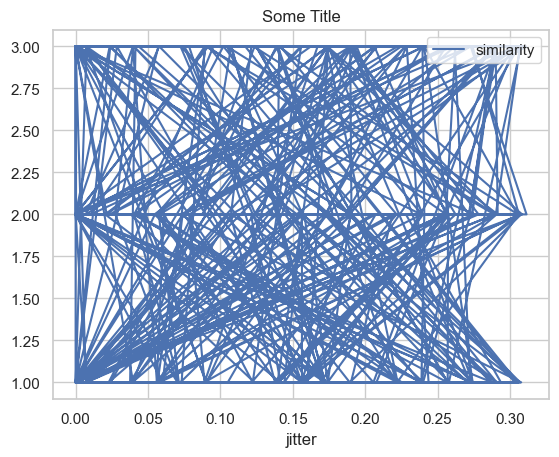

In [160]:
# plt.plot(trial_data_list[0]["jitter"], trial_data_list[0]["similarity"], kind = "line")
trial_data_list[0].plot(x="jitter", y="similarity", kind="line", title = "Some Title")
# trial_data_list[0].jitter.value_counts()

<Axes: title={'center': 'Some Title'}, xlabel='jitter', ylabel='similarity'>

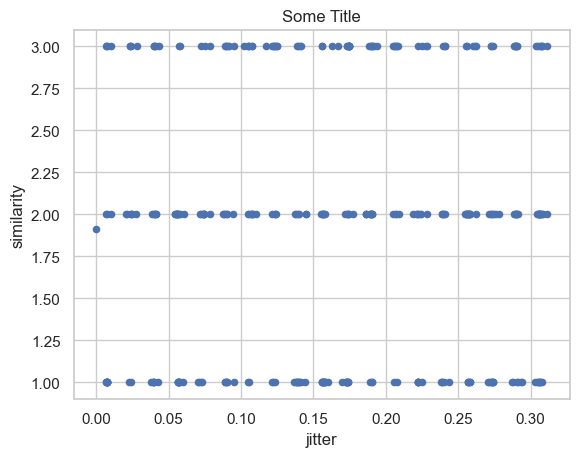

In [171]:
aggregated_data = trial_data_list[0][["jitter", "similarity"]].groupby('jitter').mean().reset_index()
aggregated_data.plot(x='jitter', y='similarity', kind='scatter', title='Some Title')


## Oscillation analysis

In [446]:
# num_plots = len(subjects)
# tmax = 333
# xlabel = "RSI (ms)"
# ylabel = "Recall"
# output_var = 'similarity'
# with PdfPages(path_pic+'{}-RSI.pdf'.format(output_var)) as pdf:
#     for n_bin in range(3, 17):
#         num_bins = n_bin
#         rows = 4
#         cols = 4
#         agg_dfs = []
#         fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
#         axes = axes.flatten()
#         bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
#         for idx, p_data in enumerate(trial_data_list):
#             if idx < len(axes):
#                 bins = np.linspace(0, tmax/1000, num_bins + 1)
#                 labels = range(1, num_bins + 1)
#                 p_data = p_data[p_data["acc"] == 1]
#                 p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
#                 p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
#                 agg_data = p_data[['binned_jitter', output_var, 'congruent']].groupby(['binned_jitter', 'congruent']).mean().reset_index()
#                 ax = axes[idx]
#                 agg_data[agg_data["congruent"] == 1].plot(x='binned_jitter', y=output_var, kind='line',
#                                      title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Blue")
#                 agg_data[agg_data["congruent"] == 0].plot(x='binned_jitter', y=output_var, kind='line',
#                                      title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Red")
#                 ax.legend(['Con', 'Incon'])
#                 ax.set_ylim((1.5, 2.5))
#                 ax.set_ylabel(ylabel)
#                 ax.set_xlabel(xlabel)
#                 ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels)
#                 agg_dfs.append(agg_data)
    
#         avg_df = pd.concat(agg_dfs).groupby(['binned_jitter', 'congruent'], as_index = False).mean()
#         ax = axes[idx+1]
#         avg_df[avg_df["congruent"] == 1].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='blue')
#         avg_df[avg_df["congruent"] == 0].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='red')
#         ax.legend(['Con', 'Incon'])
#         ax.set_ylim((1.9, 2.2))
#         ax.set_ylabel(ylabel)
#         ax.set_xlabel(xlabel)
#         ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels)
        
#         fig.suptitle("N bins = {}".format(num_bins), fontsize=16)
        
#         for j in range(idx + 2, len(axes)):
#             fig.delaxes(axes[j])
        
#         plt.title("Average (n={})".format(len(subjects)))
#         plt.subplots_adjust(hspace=0.5, wspace=0.3)
#         pdf.savefig(fig)
#         plt.close(fig)

In [14]:
agg_data

binned_jitter  acc       hr1
0             0.5  0.0  0.166667
1             0.5  1.0  0.190476
2             1.5  0.0  0.000000
3             1.5  1.0  0.312500
4             2.5  0.0  0.000000
5             2.5  1.0  0.222222
6             3.5  0.0  0.333333
7             3.5  1.0  0.333333
8             4.5  0.0  0.333333
9             4.5  1.0  0.142857
10            5.5  0.0  0.000000
11            5.5  1.0  0.428571
12            6.5  0.0  0.250000
13            6.5  1.0  0.384615
14            7.5  0.0  0.000000
15            7.5  1.0  0.000000
16            8.5  1.0  0.375000
17            9.5  0.0  0.500000
18            9.5  1.0  0.250000
19           10.5  1.0  0.666667
20           11.5  0.0  0.500000
21           11.5  1.0  0.000000
22           12.5  1.0  0.142857
23           13.5  0.0  0.500000
24           13.5  1.0  0.400000
25           14.5  1.0  0.500000

In [21]:
### CON-INCON

from matplotlib.backends.backend_pdf import PdfPages
num_plots = len(subjects)
tmax = 333
xlabel = "RSI (ms)"
ylabel = "Recall"
output_var = "hr1"

with PdfPages(path_pic+'{}-RSI.pdf'.format(output_var)) as pdf:

    for n_bin in range(3, 17):
        num_bins = n_bin
        rows = 4
        cols = 4
        agg_dfs = []
        fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
        axes = axes.flatten()
        bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
        for idx, p_data in enumerate(trial_data_list):
            if idx < len(axes):
                bins = np.linspace(0, tmax/1000, num_bins + 1)
                labels = range(1, num_bins + 1)
                p_data = p_data[p_data["acc"] == 1]
                p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
                p_data["hr1"] = [1 if i == 1 else 0 for i in p_data["similarity"]]
                p_data["hr3"] = [1 if i == 3 else 0 for i in p_data["similarity"]]
                p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
                agg_data = p_data[['binned_jitter', output_var, 'congruent']].groupby(['binned_jitter', 'congruent']).mean().reset_index()
                ax = axes[idx]
                agg_data[agg_data["congruent"] == 1].plot(x='binned_jitter', y=output_var, kind='line',
                                     title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Blue")
                agg_data[agg_data["congruent"] == 0].plot(x='binned_jitter', y=output_var, kind='line',
                                     title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Red")
                ax.legend(['Con', 'Incon'])
                # ax.set_ylim((1.5, 2.5))
                ax.set_ylabel(ylabel)
                ax.set_xlabel(xlabel)
                ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                              # rotation = -10
                             )
                agg_dfs.append(agg_data)
        print("{} bins, {} NA".format(num_bins, np.sum(i.isnull().values.any())))
        avg_df = pd.concat(agg_dfs).groupby(['binned_jitter', 'congruent'], as_index = False).mean()
        ax = axes[idx+1]
        avg_df[avg_df["congruent"] == 1].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='blue')
        avg_df[avg_df["congruent"] == 0].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='red')
        ax.legend(['Con', 'Incon'])
        # ax.set_ylim((1.9, 2.2))
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                      # rotation = -10
                     )
        
        fig.suptitle("N bins = {}".format(num_bins), fontsize=16)
        
        for j in range(idx + 2, len(axes)):
            fig.delaxes(axes[j])
        plt.title("Average (n={})".format(len(subjects)))
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        pdf.savefig(fig)
        plt.close(fig)
        # plt.tight_layout()

3 bins, 0 NA
4 bins, 0 NA
5 bins, 0 NA
6 bins, 0 NA
7 bins, 0 NA
8 bins, 0 NA
9 bins, 0 NA
10 bins, 0 NA
11 bins, 0 NA
12 bins, 0 NA
13 bins, 0 NA
14 bins, 0 NA
15 bins, 0 NA
16 bins, 0 NA


In [93]:
### ERR-CORR

from matplotlib.backends.backend_pdf import PdfPages
num_plots = len(subjects)
tmax = 333
xlabel = "RSI (ms)"
ylabel = "Recall"
output_var = "hr1"

with PdfPages(path_pic+'err-{}-RSI.pdf'.format(output_var)) as pdf:

    for n_bin in range(3, 17):
        num_bins = n_bin
        rows = 4
        cols = 4
        agg_dfs = []
        fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
        axes = axes.flatten()
        bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
        for idx, p_data in enumerate(trial_data_list):
            if idx < len(axes):
                bins = np.linspace(0, tmax/1000, num_bins + 1)
                labels = range(1, num_bins + 1)
                p_data = p_data[p_data["congruent"] == 0]
                p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
                p_data["hr1"] = [1 if i == 1 else 0 for i in p_data["similarity"]]
                p_data["hr3"] = [1 if i == 3 else 0 for i in p_data["similarity"]]
                p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
                agg_data = p_data[['binned_jitter', output_var, 'acc']].groupby(['binned_jitter', 'acc']).mean().reset_index()
                ax = axes[idx]
                agg_data[agg_data["acc"] == 1].plot(x='binned_jitter', y=output_var, kind='line',
                                     title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Blue")
                agg_data[agg_data["acc"] == 0].plot(x='binned_jitter', y=output_var, kind='line',
                                     title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Red")
                ax.legend(['Corr', 'Err'])
                # ax.set_ylim((1.5, 2.5))
                ax.set_ylabel(ylabel)
                ax.set_xlabel(xlabel)
                ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                              # rotation = -10
                             )
                agg_dfs.append(agg_data)
        avg_df = pd.concat(agg_dfs).groupby(['binned_jitter', 'acc'], as_index = False).mean()
        ax = axes[idx+1]
        avg_df[avg_df["acc"] == 1].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='blue')
        avg_df[avg_df["acc"] == 0].plot(x='binned_jitter', y=output_var, kind='line', ax=ax, legend=False, color='red')
        ax.legend(['Corr', 'Err'])
        # ax.set_ylim((1.9, 2.2))
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                      # rotation = -10
                     )
        
        fig.suptitle("N bins = {}".format(num_bins), fontsize=16)
        
        for j in range(idx + 2, len(axes)):
            fig.delaxes(axes[j])
        plt.title("Average (n={})".format(len(subjects)))
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        pdf.savefig(fig)
        plt.close(fig)
        # plt.tight_layout()

In [82]:
#CHECK FOR NA PEOPLE

num_plots = len(subjects)
tmax = 333
xlabel = "RSI (ms)"
ylabel = "Recall"
output_var = "similarity"
df_var = "congruent"

for n_bin in range(10, 15):
    num_bins = n_bin
    rows = 6
    cols = 7
    agg_dfs = []
    bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
    for idx, p_data in enumerate(trial_data_list):
        if idx < len(axes):
            bins = np.linspace(0, tmax/1000, num_bins + 1)
            labels = range(1, num_bins + 1)
            p_data = p_data[p_data["acc"] == 1]
            # p_data = p_data[p_data["congruent"] == 0]
            p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
            p_data["hr1"] = [1 if i == 1 else 0 for i in p_data["similarity"]]
            p_data["hr3"] = [1 if i == 3 else 0 for i in p_data["similarity"]]
            p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
            pivot_table = p_data.pivot_table(
                index='binned_jitter', 
                columns=df_var, 
                values=output_var, 
                aggfunc='mean', 
                fill_value=np.nan
                )
            result = pivot_table.reset_index().melt(id_vars=['binned_jitter'], value_name=output_var)
            agg_data = result.rename(columns={df_var: df_var}).sort_values("binned_jitter").reset_index(drop=True)
            # agg_data = p_data[['binned_jitter', output_var, 'congruent']].groupby(['binned_jitter', 'congruent']).mean().reset_index()
            # agg_data = p_data[['binned_jitter', output_var, 'acc']].groupby(['binned_jitter', 'acc']).mean().reset_index()
            agg_dfs.append(agg_data)
    print("{} bins, {} NA".format(num_bins, np.sum([i.isnull().values.any() for i in agg_dfs])))
# print(len(agg_dfs[0])/2)

10 bins, 0 NA
11 bins, 1 NA
12 bins, 1 NA
13 bins, 3 NA
14 bins, 16 NA


In [216]:
agg_dfs_1 = agg_dfs.copy()

In [888]:
# current plotting function with iteration
vars_to_plot = ["similarity", "hr", "hr1", "hr3", "hr3-1"]
num_plots = len(subjects)
tmax = 333
xlabel = "RSI (ms)"
ylabel = "Recall"
# output_var = "similarity"
df_var = "congruent"
for output_var in vars_to_plot:
    with PdfPages(path_pic+'{}-{}-RSI.pdf'.format(df_var, output_var)) as pdf:
    
        for n_bin in range(3, 17):
            num_bins = n_bin
            rows = 5
            cols = 5
            agg_dfs = []
            fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
            axes = axes.flatten()
            bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
            for idx, p_data in enumerate(trial_data_list):
                if idx < len(axes):
                    bins = np.linspace(0, tmax/1000, num_bins + 1)
                    labels = range(1, num_bins + 1)
                    if df_var == "congruent":
                        p_data = p_data[p_data["acc"] == 1]
                    elif df_var == "acc":
                        p_data = p_data[p_data["congruent"] == 0]
                    p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
                    p_data["hr1"] = [1 if i == 1 else 0 for i in p_data["similarity"]]
                    p_data["hr3"] = [1 if i == 3 else 0 for i in p_data["similarity"]]
                    p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
                    if output_var == "hr3-1":
                        bins_1_3 = p_data[["binned_jitter", "similarity"]].groupby(["binned_jitter"], as_index=False).value_counts()
                        bins_1_3 = bins_1_3[bins_1_3["similarity"]!=2]["binned_jitter"].unique()
                        p_data = p_data[p_data["binned_jitter"].isin(bins_1_3)]
                    
                    matrix_df = pd.DataFrame({
                        "binned_jitter": list(range(1, n_bin+1))*2,
                        df_var: [0] * (n_bin) + [1] * (n_bin)
                    })
                    matrix_df["binned_jitter"] = matrix_df["binned_jitter"]-0.5
    
                    if output_var == "hr3-1":
                        agg_data = p_data[['binned_jitter', "hr3", "hr1", df_var]].\
                                                   groupby(['binned_jitter', df_var]).mean().reset_index()
                    else:
                        agg_data = p_data[['binned_jitter', "hr3", "hr1", df_var, output_var]].\
                                                   groupby(['binned_jitter', df_var]).mean().reset_index()
                    agg_data = matrix_df.merge(agg_data, how='left').sort_values("binned_jitter").reset_index(drop=True)
                    
                    if output_var == "hr3-1":
                        agg_data["hr3-1"] = agg_data["hr3"] - agg_data["hr1"]
        
                    ax = axes[idx]
                    line1 = ax.plot(agg_data[agg_data[df_var] == 0]['binned_jitter'], agg_data[agg_data[df_var] == 1][output_var],
                        color = "Blue", marker='o', ms=5, label='Con' if df_var == "congruent" else 'Corr')
                    line2 = ax.plot(agg_data[agg_data[df_var] == 0]['binned_jitter'], agg_data[agg_data[df_var] == 0][output_var],
                        color = "Red", marker='o', ms=5, label='Incon' if df_var == "congruent" else 'Err')
                    ax.set_title("sub-{}".format(subjects[idx]))
                    ax.legend(handles=[line1[0], line2[0]])
                    ax.set_ylabel(ylabel)
                    ax.set_xlabel(xlabel)
                    ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                                 )
                    
                    agg_dfs.append(agg_data)
            # print("{} bins, {} NA".format(num_bins, np.sum([i.isnull().values.any() for i in agg_dfs])))
            avg_df = pd.concat(agg_dfs).groupby(['binned_jitter', df_var], as_index = False).mean()
            ax = axes[idx+1]
            line1 = ax.plot(avg_df[avg_df[df_var] == 1]['binned_jitter'], avg_df[avg_df[df_var] == 1][output_var],
                            color = "Blue", marker='o', ms=5, label='Con' if df_var == "congruent" else 'Corr')
            line2 = ax.plot(avg_df[avg_df[df_var] == 0]['binned_jitter'], avg_df[avg_df[df_var] == 0][output_var],
                            color = "Red", marker='o', ms=5, label='Incon' if df_var == "congruent" else 'Err')
            ax.legend(handles=[line1[0], line2[0]])
            ax.set_ylabel(ylabel)
            ax.set_xlabel(xlabel)
            ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                         )
            
            fig.suptitle("N bins = {}".format(num_bins), fontsize=16)
            
            for j in range(idx + 2, len(axes)):
                fig.delaxes(axes[j])
            plt.title("Average (n={})".format(len(subjects)))
            plt.subplots_adjust(hspace=0.5, wspace=0.3)
            pdf.savefig(fig)
            plt.close(fig)
        # print(len(agg_dfs[0])/2)

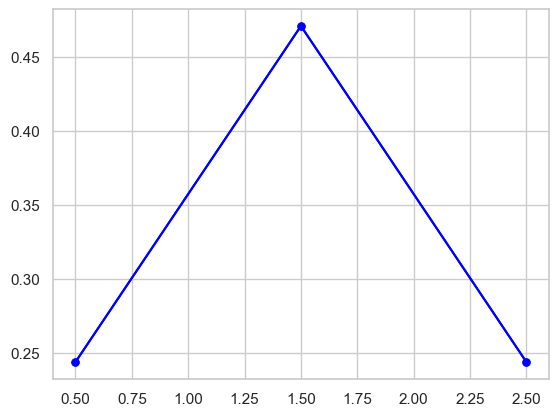

In [345]:
# agg_data[agg_data[df_var] == 1].plot(x='binned_jitter', y=output_var, kind='line',
#                                      title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Blue", marker='o', ms=5)
# agg_data[agg_data[df_var] == 0].plot(x='binned_jitter', y=output_var, kind='line',
#                      title = "sub-{}".format(subjects[idx]), ax=ax, legend=False, color = "Red", marker='o', ms=5)

plt.plot(agg_data[agg_data[df_var] == 0]['binned_jitter'], agg_data[agg_data[df_var] == 1][output_var],
        color = "Blue", marker='o', ms=5)

In [361]:
line1[0].get_label()

'Con'

In [337]:
agg_data[agg_data[df_var] == 1][output_var]

hr3       hr3
1   0.133333  0.133333
2   0.555556  0.555556
4   0.333333  0.333333
7   0.375000  0.375000
9   0.222222  0.222222
11  0.214286  0.214286
13  0.200000  0.200000
15  0.181818  0.181818
16  0.100000  0.100000
18  0.235294  0.235294
21  0.230769  0.230769
22  0.000000  0.000000
24  0.300000  0.300000
26  0.181818  0.181818
28  0.222222  0.222222
31       NaN       NaN

In [402]:
arr1 = [1,1,3,1,3,3,1,2,2,1,2,2]
arr2 = [2,3,3,1,1,2,1,3,3,]

print(
    np.mean(arr2)-
      np.mean(arr1)
     )

print(
  -(np.sum([i == 3 for i in arr1])/len(arr1) - np.sum([i == 1 for i in arr1])/len(arr1)) +
    (np.sum([i == 3 for i in arr2])/len(arr2) - np.sum([i == 1 for i in arr2])/len(arr2)),
)

0.2777777777777779
0.2777777777777778


In [393]:
np.mean([2,3,3,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

1.9583333333333333

In [530]:
bin_labels[:-1]

[0, 27, 55, 83, 111, 138, 166, 194, 222, 249, 277, 305]

Fitted parameters:
[1.00000000e+00 1.00000000e+00 1.39706000e-01 3.31851535e-28
 3.15723092e-01 6.56422014e+00 1.00000000e+00]


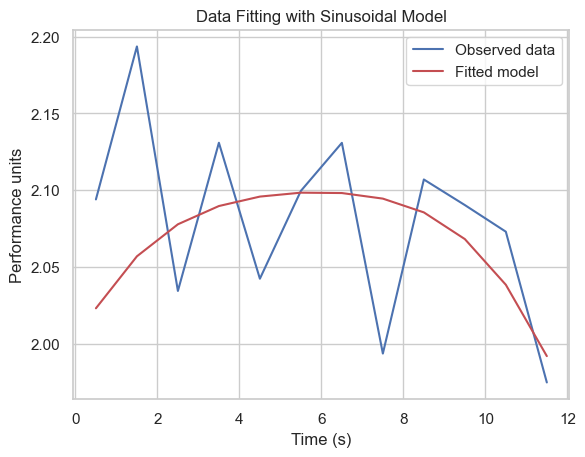

In [443]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function based on the equation
def model(x, # data in performance units
          a_lf, # lf cosine wave amplitude in perfornance units
          b_lf, # lf sine wave amplitude in perfornance units
          omega_lf, # lf wave frequency
          a_hf, # hf cosine wave amplitude in perfornance units
          b_hf, # hf sine wave amplitude in perfornance units
          omega_hf, # hf wave frequency
          c, # constant in performance units
         ):
    return (a_lf * np.cos(omega_lf * x) + b_lf * np.sin(omega_lf * x) +
            a_hf * np.cos(omega_hf * x) + b_hf * np.sin(omega_hf * x) + c)

# Generate some example data (replace with actual data)
x_data = avg_df[avg_df[df_var] == 0]['binned_jitter']  # Example x data (time points)
y_data = avg_df[avg_df[df_var] == 0][output_var]  # Adding some noise

# Initial guess for the parameters [a_lf, b_lf, omega_lf, a_hf, b_hf, omega_hf, c]
initial_params = [0, 0, 0.15, 0, 0, 10, 0]

# Fit the model to the data
fit_params, covariance = curve_fit(model, x_data, y_data, p0=initial_params,
                                      bounds=([0, 0, .1, 0, 0, 4, 0],  # Lower bounds
                                            [1, 1, .25, 1, 1, 18, 1]) 
                                  )# Upper bounds)
# explanation of boundaries:
# amplitues: from 0 (always stick to one option, presumably the middle one, to 1 (maximum deflection towards 1 or 3)
# lf some low physiological frequency
# our frequency of interest, from 4 to nyquist/2 given the 12 bins = 18

# Display the fitted parameters
print('Fitted parameters:')
print(fit_params)

# Plot the results
plt.figure()
plt.plot(x_data, y_data, 'b-', label='Observed data')
plt.plot(x_data, model(x_data, *fit_params), 'r-', label='Fitted model')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Performance units')
plt.title('Data Fitting with Sinusoidal Model')
plt.show()
                                   

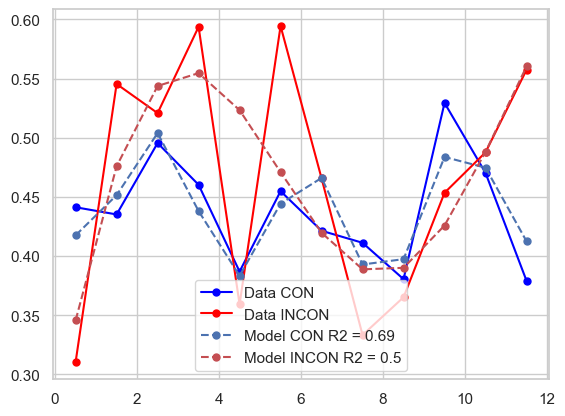

In [554]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def run_optimization(x_data, y_data, bounds, n_iterations=10):
    best_params = None
    best_r2 = -np.inf  # Initialize to a very low value
    
    for _ in range(n_iterations):
        # Random initial parameters within the bounds
        initial_params = [np.random.uniform(low, high) for low, high in zip(bounds[0], bounds[1])]
        
        try:
            # Fit the model
            fit_params, _ = curve_fit(model, x_data, y_data, p0=initial_params, bounds=bounds)
            
            # Calculate R² value
            r2 = r2_score(y_data, model(x_data, *fit_params))
            # print(np.round(r2, 2))
            
            # Keep the best fit
            if r2 > best_r2:
                best_r2 = r2
                best_params = fit_params
                
        except RuntimeError:
            # Handle the case where the fit doesn't converge
            continue
    
    return best_params, best_r2  # Return the best R² and corresponding parameters


# Define the model function based on the equation
def model(x, # vector of samples
          a_lf, # lf cosine wave amplitude in perfornance units
          b_lf, # lf sine wave amplitude in perfornance units
          omega_lf, # lf wave frequency
          a_hf, # hf cosine wave amplitude in perfornance units
          b_hf, # hf sine wave amplitude in perfornance units
          omega_hf, # hf wave frequency
          c, # constant in performance units
         ):
    return (a_lf * np.cos(omega_lf * x) + b_lf * np.sin(omega_lf * x) +
            a_hf * np.cos(omega_hf * x) + b_hf * np.sin(omega_hf * x) + c)

# Define bounds for the parameters
if output_var == "similarity":
    bounds=([0, 0, 0.25, 0, 0, 4, 1],  # Lower bounds
            [1, 1, 0.5, 1, 1, 13, 3])
elif output_var == "hr":
    bounds=([0, 0, .25, 0, 0, 4, 0],  # Lower bounds
            [0.5, 0.5, .5, 0.5, 0.5, 8, 1])

# Generate some example data (replace with actual data)
x_data = avg_df[avg_df[df_var] == 1]['binned_jitter'] # Example x data (time points)
y_data_con = avg_df[avg_df[df_var] == 1][output_var] 
y_data_incon = avg_df[avg_df[df_var] == 0][output_var]

# Run the optimization 10 times with different initial values
best_fit_params_con, best_r2_con = run_optimization(x_data, y_data_con, bounds, n_iterations=100)
# Run the optimization 10 times with different initial values
best_fit_params_incon, best_r2_incon = run_optimization(x_data, y_data_incon, bounds, n_iterations=100)

# Display the best fitting parameters
# print('Best fitted parameters:', best_fit_params)
# print('Best residual:', best_r2)

# Plot the results
plt.figure()
plt.plot(x_data, y_data_con, 'Blue', label='Data CON', marker="o", ms=5)
plt.plot(x_data, y_data_incon, 'Red', label='Data INCON', marker="o", ms=5)
plt.plot(x_data, model(x_data, *best_fit_params_con), 'b', label='Model CON R2 = {}'.format(np.round(best_r2_con, 2)), marker="o", ms=5, linestyle="--")
plt.plot(x_data, model(x_data, *best_fit_params_incon), 'r', label='Model INCON R2 = {}'.format(np.round(best_r2_incon, 2)), marker="o", ms=5, linestyle="--")

plt.legend()
# plt.xlabel('RSI bin')
# plt.ylabel('Performance units ({})'.format(output_var))
# plt.title('Data Fitting with Sinusoidal Model, R-squared = {}'.format(np.round(best_r2, 2)))
# plt.show()

In [96]:
trial_data_list

[    target  acc  congruent     fl_rt  recall_rt prime  recall  similarity  \
 0     left  0.0        0.0  0.352989   0.689701     R     2.0         1.0   
 1    right  1.0        1.0  0.450650   1.525944     L     2.0         2.0   
 2    right  1.0        1.0  0.435981   1.225697     L     1.0         2.0   
 3     left  1.0        1.0  0.517075   0.665579     L     2.0         3.0   
 4     left  0.0        0.0  0.374258   0.606116     L     2.0         1.0   
 ..     ...  ...        ...       ...        ...   ...     ...         ...   
 315  right  1.0        1.0  0.380351   0.197757     R     3.0         3.0   
 316   left  0.0        1.0  0.276537   0.089499     L     1.0         2.0   
 317  right  0.0        0.0  0.339878   2.451247     L     3.0         3.0   
 318   left  0.0        1.0  0.425662   0.105337     R     3.0         2.0   
 319  right  0.0        1.0  0.440668   0.129018     L     3.0         2.0   
 
        jitter  prime_jitter  
 0    0.007365         0.041  


11 bins, 1 NA


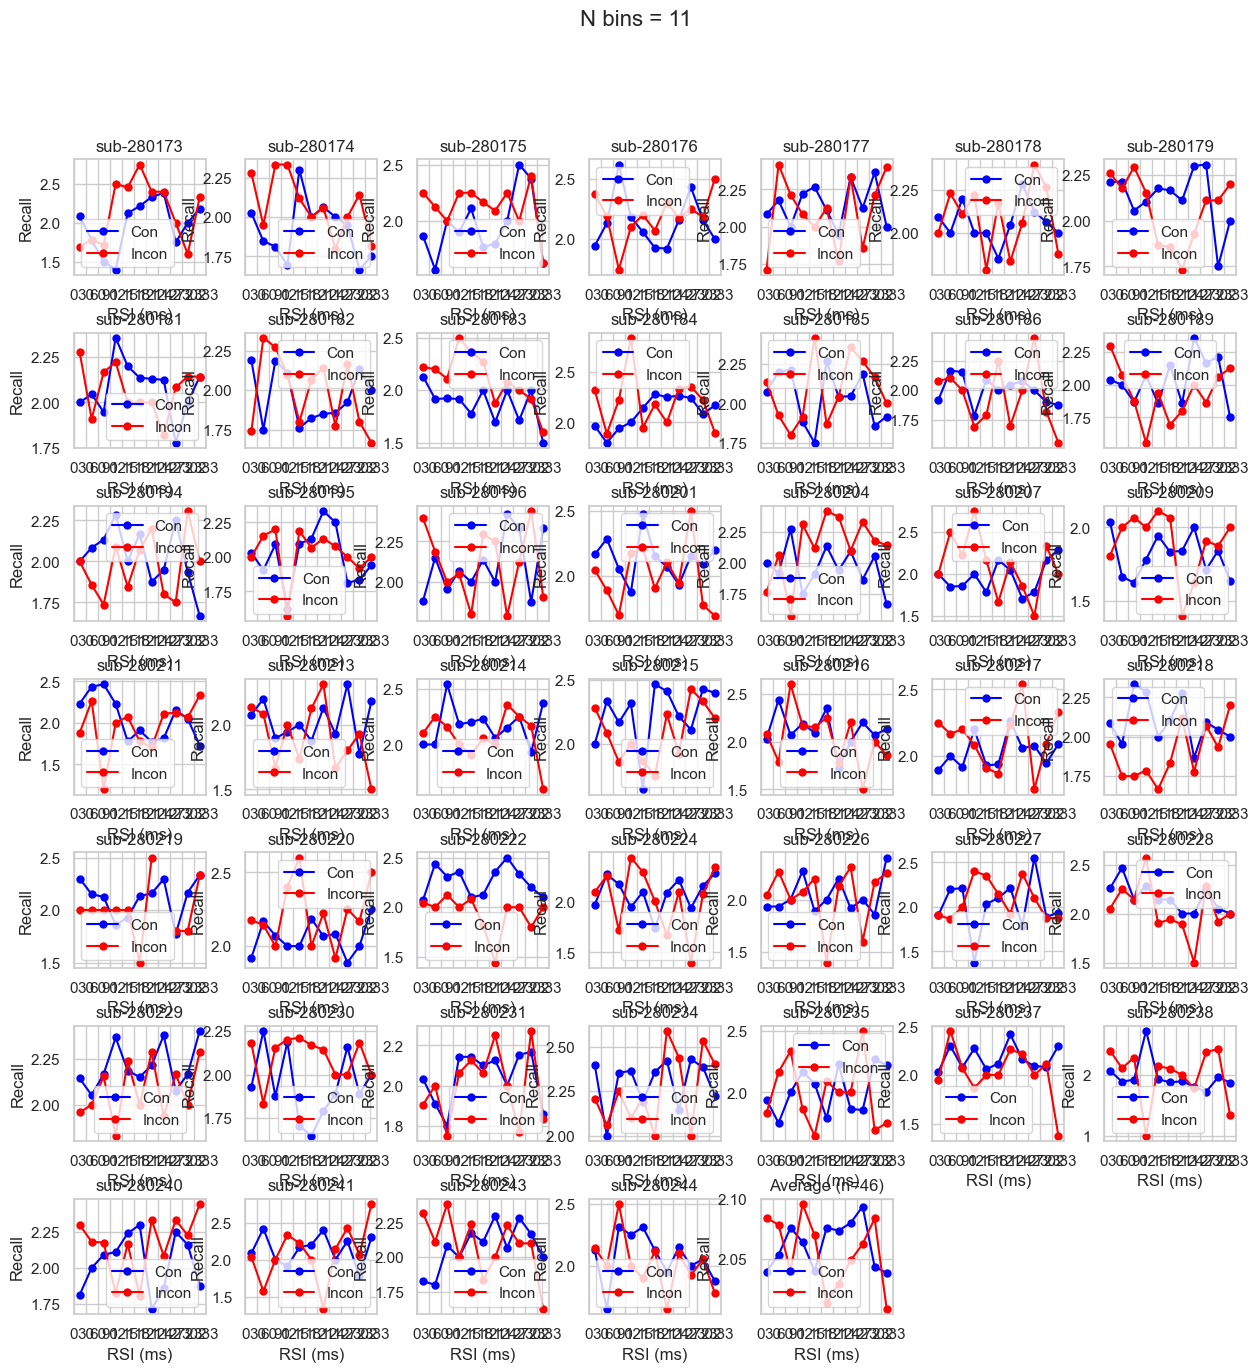

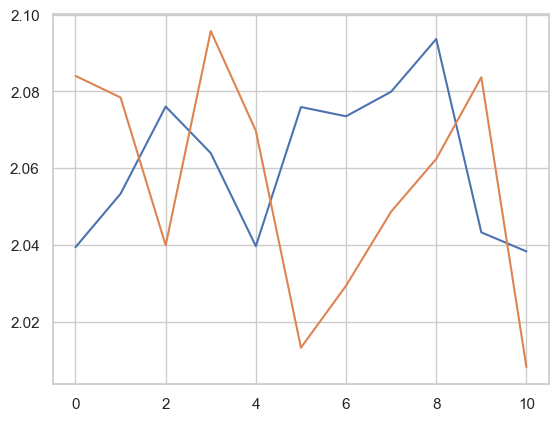

In [32]:
plt.plot(avg_df[avg_df[df_var] == 1][output_var].to_numpy())
plt.plot(avg_df[avg_df[df_var] == 0][output_var].to_numpy())

In [59]:
import mne
from mne import io
from mne.datasets import sample
from mne.stats import permutation_cluster_test

T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [avg_df[avg_df[df_var] == 1][output_var].to_numpy(),
     avg_df[avg_df[df_var] == 0][output_var].to_numpy()],
    stat_fun = lambda x, y: stats.ttest_rel(x, y)[0],
    threshold = 0.05,
    adjacency = False,
    n_permutations=1000,
    tail=0,
    n_jobs=None,
    out_type="mask",
)

stat_fun(H1): min=1.526935 max=1.526935
Running initial clustering …
Found 1 cluster


100%|██████████| Permuting : 999/999 [00:00<00:00, 2778.05it/s]


In [60]:
cluster_p_values

array([0.153])

In [974]:
avg_df[avg_df[df_var] == 0][output_var].to_numpy()

array([2.0732317 , 2.10635144, 1.97444091, 2.14225537, 2.04560675,
       2.08005174, 2.01549173, 2.026514  , 2.08701529, 2.08474029,
       1.95496598])

In [1073]:
T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(
    (condition1_data-condition2_data),
    n_permutations=1000,
    tail=0, 
    n_jobs=1, 
    out_type='mask'
)

# T_obs
['{:f}'.format(a) for a in T_obs]

Using a threshold of 2.068658
stat_fun(H1): min=-1.531435 max=2.083050
Running initial clustering …
Found 1 cluster


100%|███████████████████████████| Permuting : 999/999 [00:00<00:00, 3888.10it/s]


['0.525889',
 '1.876193',
 '-0.905570',
 '2.083050',
 '0.205042',
 '0.349618',
 '0.165965',
 '-1.531435',
 '0.176555',
 '1.586953',
 '-0.001515']

stat_fun(H1): min=-1.531435 max=2.083050
Running initial clustering …
Found 1 cluster


100%|███████████████████████████| Permuting : 999/999 [00:00<00:00, 1484.79it/s]


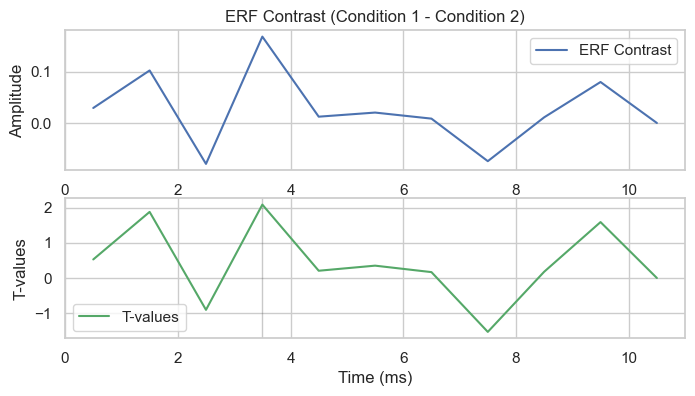

In [1054]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_test

# Suppose condition1 and condition2 are DataFrames with 'time' and 'data' columns
# e.g., condition1 = pd.DataFrame({'time': [...], 'data': [...]})

# Extract data and time points from the DataFrames
condition1_data = all_data_incon.transpose().to_numpy()
condition2_data = all_data_con.transpose().to_numpy()
times = avg_df[avg_df[df_var] == 1]['binned_jitter'].to_numpy()  # Assuming both conditions have the same time points

# Reshape the data into a 2D array (n_trials, n_times) if needed
# condition1_data = condition1_data.reshape(-1, len(times))
# condition2_data = condition2_data.reshape(-1, len(times))

# Prepare for the cluster-based permutation test
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [condition1_data, condition2_data], 
    stat_fun = lambda x, y: stats.ttest_rel(x, y)[0],
    n_permutations=1000,
    threshold = t_critical,
    tail=0, 
    n_jobs=1, 
    out_type='mask'
)

# Plot the results
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))

# Plot the ERF contrast (difference between conditions)
ax.set_title('ERF Contrast (Condition 1 - Condition 2)')
ax.plot(times, condition1_data.mean(axis=0) - condition2_data.mean(axis=0),
        label="ERF Contrast")
ax.set_ylabel("Amplitude")
ax.legend()

# Highlight significant clusters
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        ax2.axvspan(times[c.start], times[c.stop - 1],
                    color='r', alpha=0.3, label='Significant Cluster')
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], 
                    color=(0.3, 0.3, 0.3), alpha=0.3)

# Plot T_obs values
ax2.plot(times, T_obs, 'g', label='T-values')
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("T-values")
ax2.legend()

plt.show()


In [1053]:
import scipy.stats as stats

# Parameters
alpha = 0.05  # Significance level (for a two-tailed test)
n = 24  # Number of paired samples
df = n - 1  # Degrees of freedom

# Two-tailed critical value
t_critical = stats.t.ppf(1 - alpha / 2, df)

print(f"Critical t-value (two-tailed): {t_critical}")

Critical t-value (two-tailed): 2.0686576104190406


In [995]:
condition1_data

array([[2.0732317 , 2.10635144, 1.97444091, 2.14225537, 2.04560675,
        2.08005174, 2.01549173, 2.026514  , 2.08701529, 2.08474029,
        1.95496598]])

In [ ]:
dd

In [75]:
all_data = pd.DataFrame()
p_vals = []
for bin in [list(agg_dfs[0]["binned_jitter"].unique())[7]]:
    con_data = []
    incon_data = []
    for dataf in agg_dfs:
        con_data.append(dataf[(dataf[df_var] == 1) & (dataf["binned_jitter"] == bin)][output_var].mean())
        incon_data.append(dataf[(dataf[df_var] == 0) & (dataf["binned_jitter"] == bin)][output_var].mean())
    p_val = np.round(stats.ttest_rel(con_data, incon_data, nan_policy="omit")[1], 4)
    print("bin {} ms, p = {}".format(np.round(333/11*bin, 1), p_val))
    p_vals.append(p_val)

bin 227.0 ms, p = nan


bin 15.1 ms, p = 0.2342
bin 45.4 ms, p = 0.5852
bin 75.7 ms, p = 0.5042
bin 106.0 ms, p = 0.6534
bin 136.2 ms, p = 0.4632
bin 166.5 ms, p = 0.1714
bin 196.8 ms, p = 0.3538
bin 227.0 ms, p = 0.5152
bin 257.3 ms, p = 0.5265
bin 287.6 ms, p = 0.2739
bin 317.9 ms, p = 0.5696


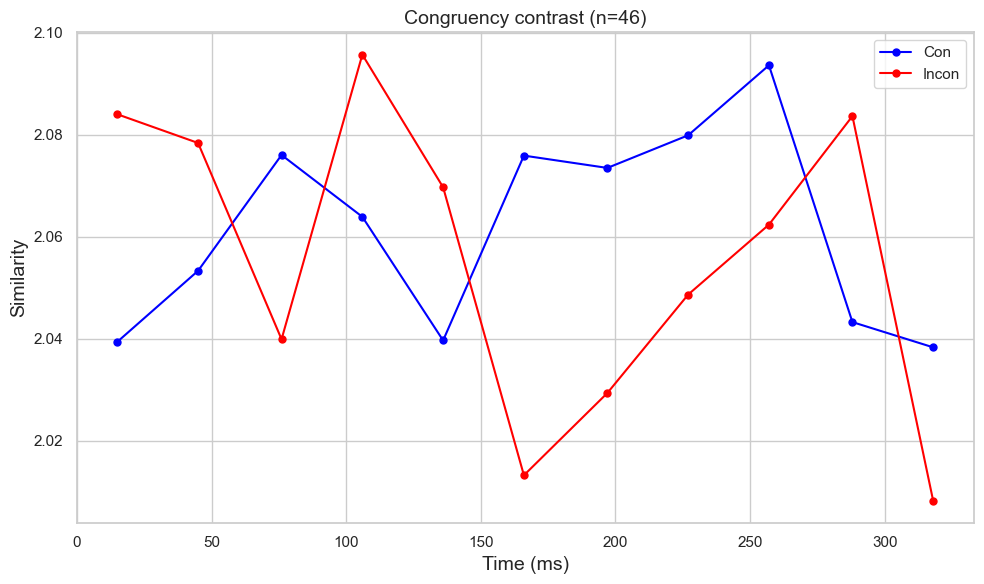

In [78]:
import numpy as np
import matplotlib.pyplot as plt

all_data = pd.DataFrame()
p_vals = []
for bin in list(agg_dfs[0]["binned_jitter"].unique()):
    con_data = []
    incon_data = []
    for dataf in agg_dfs:
        con_data.append(dataf[(dataf[df_var] == 1) & (dataf["binned_jitter"] == bin)][output_var].mean())
        incon_data.append(dataf[(dataf[df_var] == 0) & (dataf["binned_jitter"] == bin)][output_var].mean())
    p_val = np.round(stats.ttest_rel(con_data, incon_data, nan_policy="omit")[1], 4)
    print("bin {} ms, p = {}".format(np.round(333/11*bin, 1), p_val))
    p_vals.append(p_val)

# Plot the results
pic_name = "{}-{}-contrast.png".format(df_var, output_var)
cluster_step = 10
fig, ax = plt.subplots(figsize=(10, 6))
times = avg_df[avg_df[df_var] == 1]['binned_jitter'].to_numpy()
times = [np.round(333/11*i, 0) for i in times]
con_data = avg_df[avg_df[df_var] == 1]["similarity"]
incon_data = avg_df[avg_df[df_var] == 0]["similarity"]
# Plot condition 1 (congruent) and condition 2 (incongruent)
ax.plot(times, con_data, label='Con', color='Blue', marker='o', ms=5,)
ax.plot(times, incon_data, label='Incon', color='Red', marker='o', ms=5,)

# Highlight significant regions where p_val < 0.05
for i in range(len(p_vals)):
    if p_vals[i] < 0.05:
        start = times[i] - cluster_step  # Shift left
        end = times[i] + cluster_step  # Shift right
        ax.axvspan(start, end, color='red', alpha=0.3, label = "p<0.05")

# Labels and title
ax.set_title('Congruency contrast (n={})'.format(len(subjects)), fontsize=14)
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Similarity', fontsize=14)
ax.legend()

# Show plot
plt.tight_layout()
# plt.show()
plt.savefig(path_pic + "{}".format(pic_name))

In [67]:
p_vals

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

NameError: name 'condition1_data' is not defined

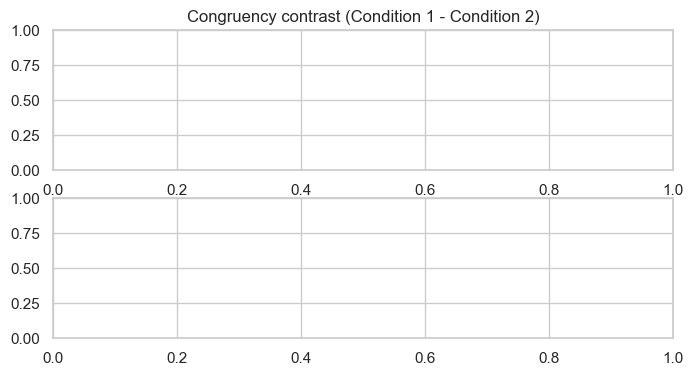

In [61]:
# Plot the results
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))

# Plot the ERF contrast (difference between conditions)
ax.set_title('Congruency contrast (Condition 1 - Condition 2)')
ax.plot(times, condition1_data.mean(axis=0) - condition2_data.mean(axis=0),
        label="ERF Contrast")
ax.set_ylabel("Amplitude")
ax.legend()

# Highlight significant clusters
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        ax2.axvspan(times[c.start], times[c.stop - 1],
                    color='r', alpha=0.3, label='Significant Cluster')
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], 
                    color=(0.3, 0.3, 0.3), alpha=0.3)

# Plot T_obs values
ax2.plot(times, T_obs, 'g', label='T-values')
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("T-values")
ax2.legend()

plt.show()

In [1075]:
['{:f}'.format(a) for a in T_obs]

['0.525889',
 '1.876193',
 '-0.905570',
 '2.083050',
 '0.205042',
 '0.349618',
 '0.165965',
 '-1.531435',
 '0.176555',
 '1.586953',
 '-0.001515']

In [ ]:
face_task_data

In [63]:
all_data_con = pd.DataFrame()
all_data_incon = pd.DataFrame()
for i in range(1, len(agg_dfs)+1):
    all_data_con[i] = agg_dfs[i-1][agg_dfs[i-1]["acc"] == 1]["similarity"]
    all_data_incon[i] = agg_dfs[i-1][agg_dfs[i-1]["acc"] == 0]["similarity"]
    print("bin {} ms, p = {}".format(np.round(333/11*bin, 1), np.round(stats.ttest_rel(con_data, incon_data)[1], 4)))

bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578
bin 317.9 ms, p = 0.1578


(24, 11)

In [914]:
stats.ttest_rel(con_data, incon_data)

TtestResult(statistic=0.0015149595568570184, pvalue=0.9988043011295212, df=23)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from math import pi

def calculate_rel(r2, preds):
    rel = r2 * np.sum((preds - np.mean(preds))**2) / len(preds)
    return rel

def run_optimization(x_data, y_data, bounds, n_iterations=10):
    best_params = None
    best_r2 = -np.inf  # Initialize to a very low value
    
    for _ in range(n_iterations):
        # Random initial parameters within the bounds
        initial_params = [np.random.uniform(low, high) for low, high in zip(bounds[0], bounds[1])]
        
        try:
            # Fit the model
            fit_params, _ = curve_fit(model, x_data, y_data, p0=initial_params, bounds=bounds, nan_policy='omit')
            preds = model(x_data, *fit_params)
            # Calculate R² value
            try:
                r2 = r2_score(y_data, preds)
            except:
                r2 = np.nan
            # print(np.round(r2, 2))
            # Calculate Rel value
            try:
                rel = calculate_rel(r2, preds)
            except:
                rel = np.nan
            
            # Keep the best fit
            if not np.isnan(r2):
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = fit_params
                    best_rel = calculate_rel(r2, preds)
            else:
                best_r2 = r2
                best_params = fit_params
                best_rel = rel
                
        except RuntimeError:
            # Handle the case where the fit doesn't converge
            continue
    
    return best_params, best_r2, best_rel  # Return the best R² and corresponding parameters


# Define the model function based on the equation
def model(x, # vector of time samples
          a_lf, # lf cosine wave amplitude in perfornance units
          b_lf, # lf sine wave amplitude in perfornance units
          omega_lf, # lf wave frequency
          a_hf, # hf cosine wave amplitude in perfornance units
          b_hf, # hf sine wave amplitude in perfornance units
          omega_hf, # hf wave frequency
          c, # constant in performance units
         ):
    return (a_lf * np.cos(2*pi*omega_lf * x) + b_lf * np.sin(2*pi*omega_lf * x) +
            a_hf * np.cos(2*pi*omega_hf * x) + b_hf * np.sin(2*pi*omega_hf * x) + c)

In [135]:
import numpy as np
import pandas as pd

def bootstrap_individual_stats(agg_dfs, n_bootstraps=1000, n_iterations=10):
    bootstrap_results = []

    for p_data in tqdm(agg_dfs):
        participant_results = []
        y_data = p_data[output_var].to_numpy()
        x_data = p_data['binned_jitter'].to_numpy()
        N = len(x_data)

        for _ in tqdm(range(n_bootstraps)):
            # Generate a bootstrapped sample by resampling with replacement
            bootstrap_indices = np.random.choice(np.arange(N), size=N, replace=True)
            x_bootstrap = x_data[bootstrap_indices]
            y_bootstrap = y_data[bootstrap_indices]

            # Run the optimization on the bootstrapped data
            best_fit_params, best_r2, best_rel = run_optimization(x_bootstrap, y_bootstrap, bounds, n_iterations=n_iterations)

            # Store the result
            participant_results.append((best_fit_params, best_r2, best_rel))

        bootstrap_results.append(participant_results)

    return bootstrap_results

In [134]:
bootstrap_results = bootstrap_individual_stats(agg_dfs,
                                               n_bootstraps=1000, n_iterations=100)

  0%|                                   | 0/41 [00:51<?, ?it/s]

KeyboardInterrupt



Best fitted parameters: [ 1.          0.40349405  0.5         0.02935909 -0.08389048  3.
  1.00938262]
Best residual: 0.6114196804768866


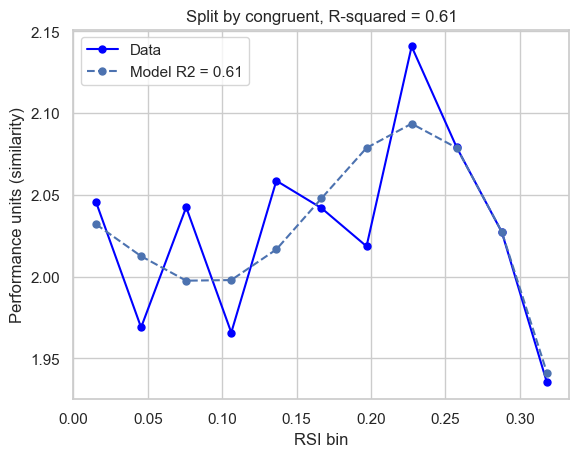

In [639]:
# Define bounds for the parameters
if output_var == "similarity":
    bounds=([-1, -1, -0.5, -1, -1, 3, -2],  # Lower bounds
            [1, 1, 0.5, 1, 1, 13, 2])
elif output_var == "hr":
    bounds=([0, 0, .25, 0, 0, 3, 0],  # Lower bounds
            [0.5, 0.5, .5, 0.5, 0.5, 13, 1])

# Generate some example data (replace with actual data)
x_data = (avg_df[avg_df[df_var] == 1]['binned_jitter']) / 33 # Example x data (time points)
# x_data = (x_data - x_data.mean())/x_data.std()
# x_data = avg_df[avg_df[df_var] == 1]['binned_jitter'] # Example x data (time points)
y_data = avg_df[avg_df[df_var] == 1][output_var] 

# Run the optimization 10 times with different initial values
best_fit_params, best_r2 = run_optimization(x_data, y_data, bounds, n_iterations=100)

# Display the best fitting parameters
print('Best fitted parameters:', best_fit_params)
print('Best residual:', best_r2)

# Plot the results
plt.figure()
plt.plot(x_data, y_data, 'Blue', label='Data', marker="o", ms=5)
plt.plot(x_data, model(x_data, *best_fit_params), 'b', label='Model R2 = {}'.format(np.round(best_r2, 2)), marker="o", ms=5, linestyle="--")

plt.legend()
plt.xlabel('RSI bin')
plt.ylabel('Performance units ({})'.format(output_var))
plt.title('Split by {}, R-squared = {}'.format(df_var, np.round(best_r2, 2)))
plt.show()

11 bins, 0 NA


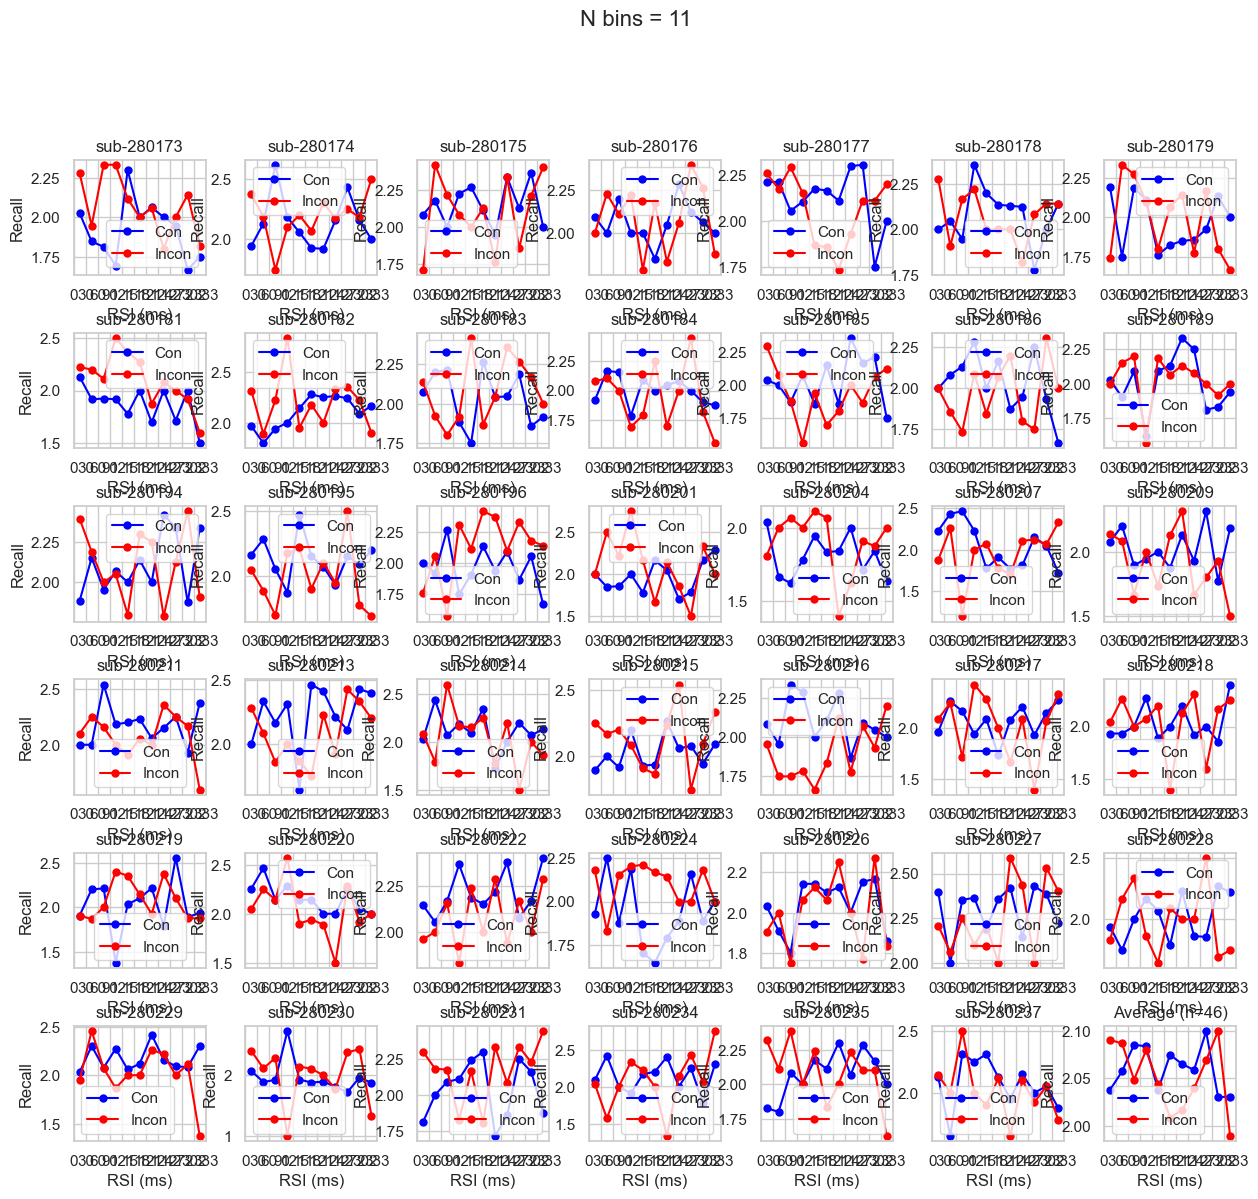

In [116]:
# calculate data for curve fitting (just uses the last iteration data)
vars_to_plot = ["similarity", "hr", "hr1", "hr3", "hr3-1"]
num_plots = len(subjects)
tmax = 333
xlabel = "RSI (ms)"
ylabel = "Recall"
# output_var = "similarity"
df_var = "congruent"
for output_var in ["similarity"]:    
    for n_bin in range(11, 12):
        num_bins = n_bin
        rows = 7
        cols = 7
        agg_dfs = []
        fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
        axes = axes.flatten()
        bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
        for idx, p_data in enumerate(trial_data_list):
            if idx < len(axes):
                bins = np.linspace(0, tmax/1000, num_bins + 1)
                labels = range(1, num_bins + 1)
                if df_var == "congruent":
                    p_data = p_data[p_data["acc"] == 1]
                elif df_var == "acc":
                    p_data = p_data[p_data["congruent"] == 0]
                p_data["hr"] = [1 if i == 2 else 0 for i in p_data["similarity"]]
                p_data["hr1"] = [1 if i == 1 else 0 for i in p_data["similarity"]]
                p_data["hr3"] = [1 if i == 3 else 0 for i in p_data["similarity"]]
                p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5
                if output_var == "hr3-1":
                    bins_1_3 = p_data[["binned_jitter", "similarity"]].groupby(["binned_jitter"], as_index=False).value_counts()
                    bins_1_3 = bins_1_3[bins_1_3["similarity"]!=2]["binned_jitter"].unique()
                    p_data = p_data[p_data["binned_jitter"].isin(bins_1_3)]
                
                matrix_df = pd.DataFrame({
                    "binned_jitter": list(range(1, n_bin+1))*2,
                    df_var: [0] * (n_bin) + [1] * (n_bin)
                })
                matrix_df["binned_jitter"] = matrix_df["binned_jitter"]-0.5

                if output_var == "hr3-1":
                    agg_data = p_data[['binned_jitter', "hr3", "hr1", df_var]].\
                                               groupby(['binned_jitter', df_var]).mean().reset_index()
                else:
                    agg_data = p_data[['binned_jitter', "hr3", "hr1", df_var, output_var]].\
                                               groupby(['binned_jitter', df_var]).mean().reset_index()
                agg_data = matrix_df.merge(agg_data, how='left').sort_values("binned_jitter").reset_index(drop=True)
                
                if output_var == "hr3-1":
                    agg_data["hr3-1"] = agg_data["hr3"] - agg_data["hr1"]
    
                ax = axes[idx]
                line1 = ax.plot(agg_data[agg_data[df_var] == 0]['binned_jitter'], agg_data[agg_data[df_var] == 1][output_var],
                    color = "Blue", marker='o', ms=5, label='Con' if df_var == "congruent" else 'Corr')
                line2 = ax.plot(agg_data[agg_data[df_var] == 0]['binned_jitter'], agg_data[agg_data[df_var] == 0][output_var],
                    color = "Red", marker='o', ms=5, label='Incon' if df_var == "congruent" else 'Err')
                ax.set_title("sub-{}".format(subjects[idx]))
                ax.legend(handles=[line1[0], line2[0]])
                ax.set_ylabel(ylabel)
                ax.set_xlabel(xlabel)
                ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                             )
                agg_data = agg_data.loc[:,~agg_data.columns.duplicated()].copy()
                agg_dfs.append(agg_data)
        print("{} bins, {} NA".format(num_bins, np.sum([i.isnull().values.any() for i in agg_dfs])))
        avg_df = pd.concat(agg_dfs).groupby(['binned_jitter', df_var], as_index = False).mean()
        ax = axes[idx+1]
        line1 = ax.plot(avg_df[avg_df[df_var] == 1]['binned_jitter'], avg_df[avg_df[df_var] == 1][output_var],
                        color = "Blue", marker='o', ms=5, label='Con' if df_var == "congruent" else 'Corr')
        line2 = ax.plot(avg_df[avg_df[df_var] == 0]['binned_jitter'], avg_df[avg_df[df_var] == 0][output_var],
                        color = "Red", marker='o', ms=5, label='Incon' if df_var == "congruent" else 'Err')
        ax.legend(handles=[line1[0], line2[0]])
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_xticks(ticks = range(0, num_bins+1), labels = bin_labels,
                     )
        
        fig.suptitle("N bins = {}".format(num_bins), fontsize=16)
        
        for j in range(idx + 2, len(axes)):
            fig.delaxes(axes[j])
        plt.title("Average (n={})".format(len(subjects)))
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
            # pdf.savefig(fig)
            # plt.close(fig)
        # print(len(agg_dfs[0])/2)

In [110]:
len(trial_data_list)

46

100%|██████████████████████████| 41/41 [00:59<00:00,  1.44s/it]


Best fitted parameters: [ 1.          0.67046439  0.6202508   0.1177888  -0.01985018  3.
  0.93232171]
Best residual: 0.6384400195334625


100%|██████████████████████████| 41/41 [00:53<00:00,  1.29s/it]


Best fitted parameters: [ 9.99999999e-01  2.30294263e-01  2.35187153e-01  1.83112506e-02
 -1.06599705e-02  1.12733307e+01  1.04590608e+00]
Best residual: 0.6715056665735775


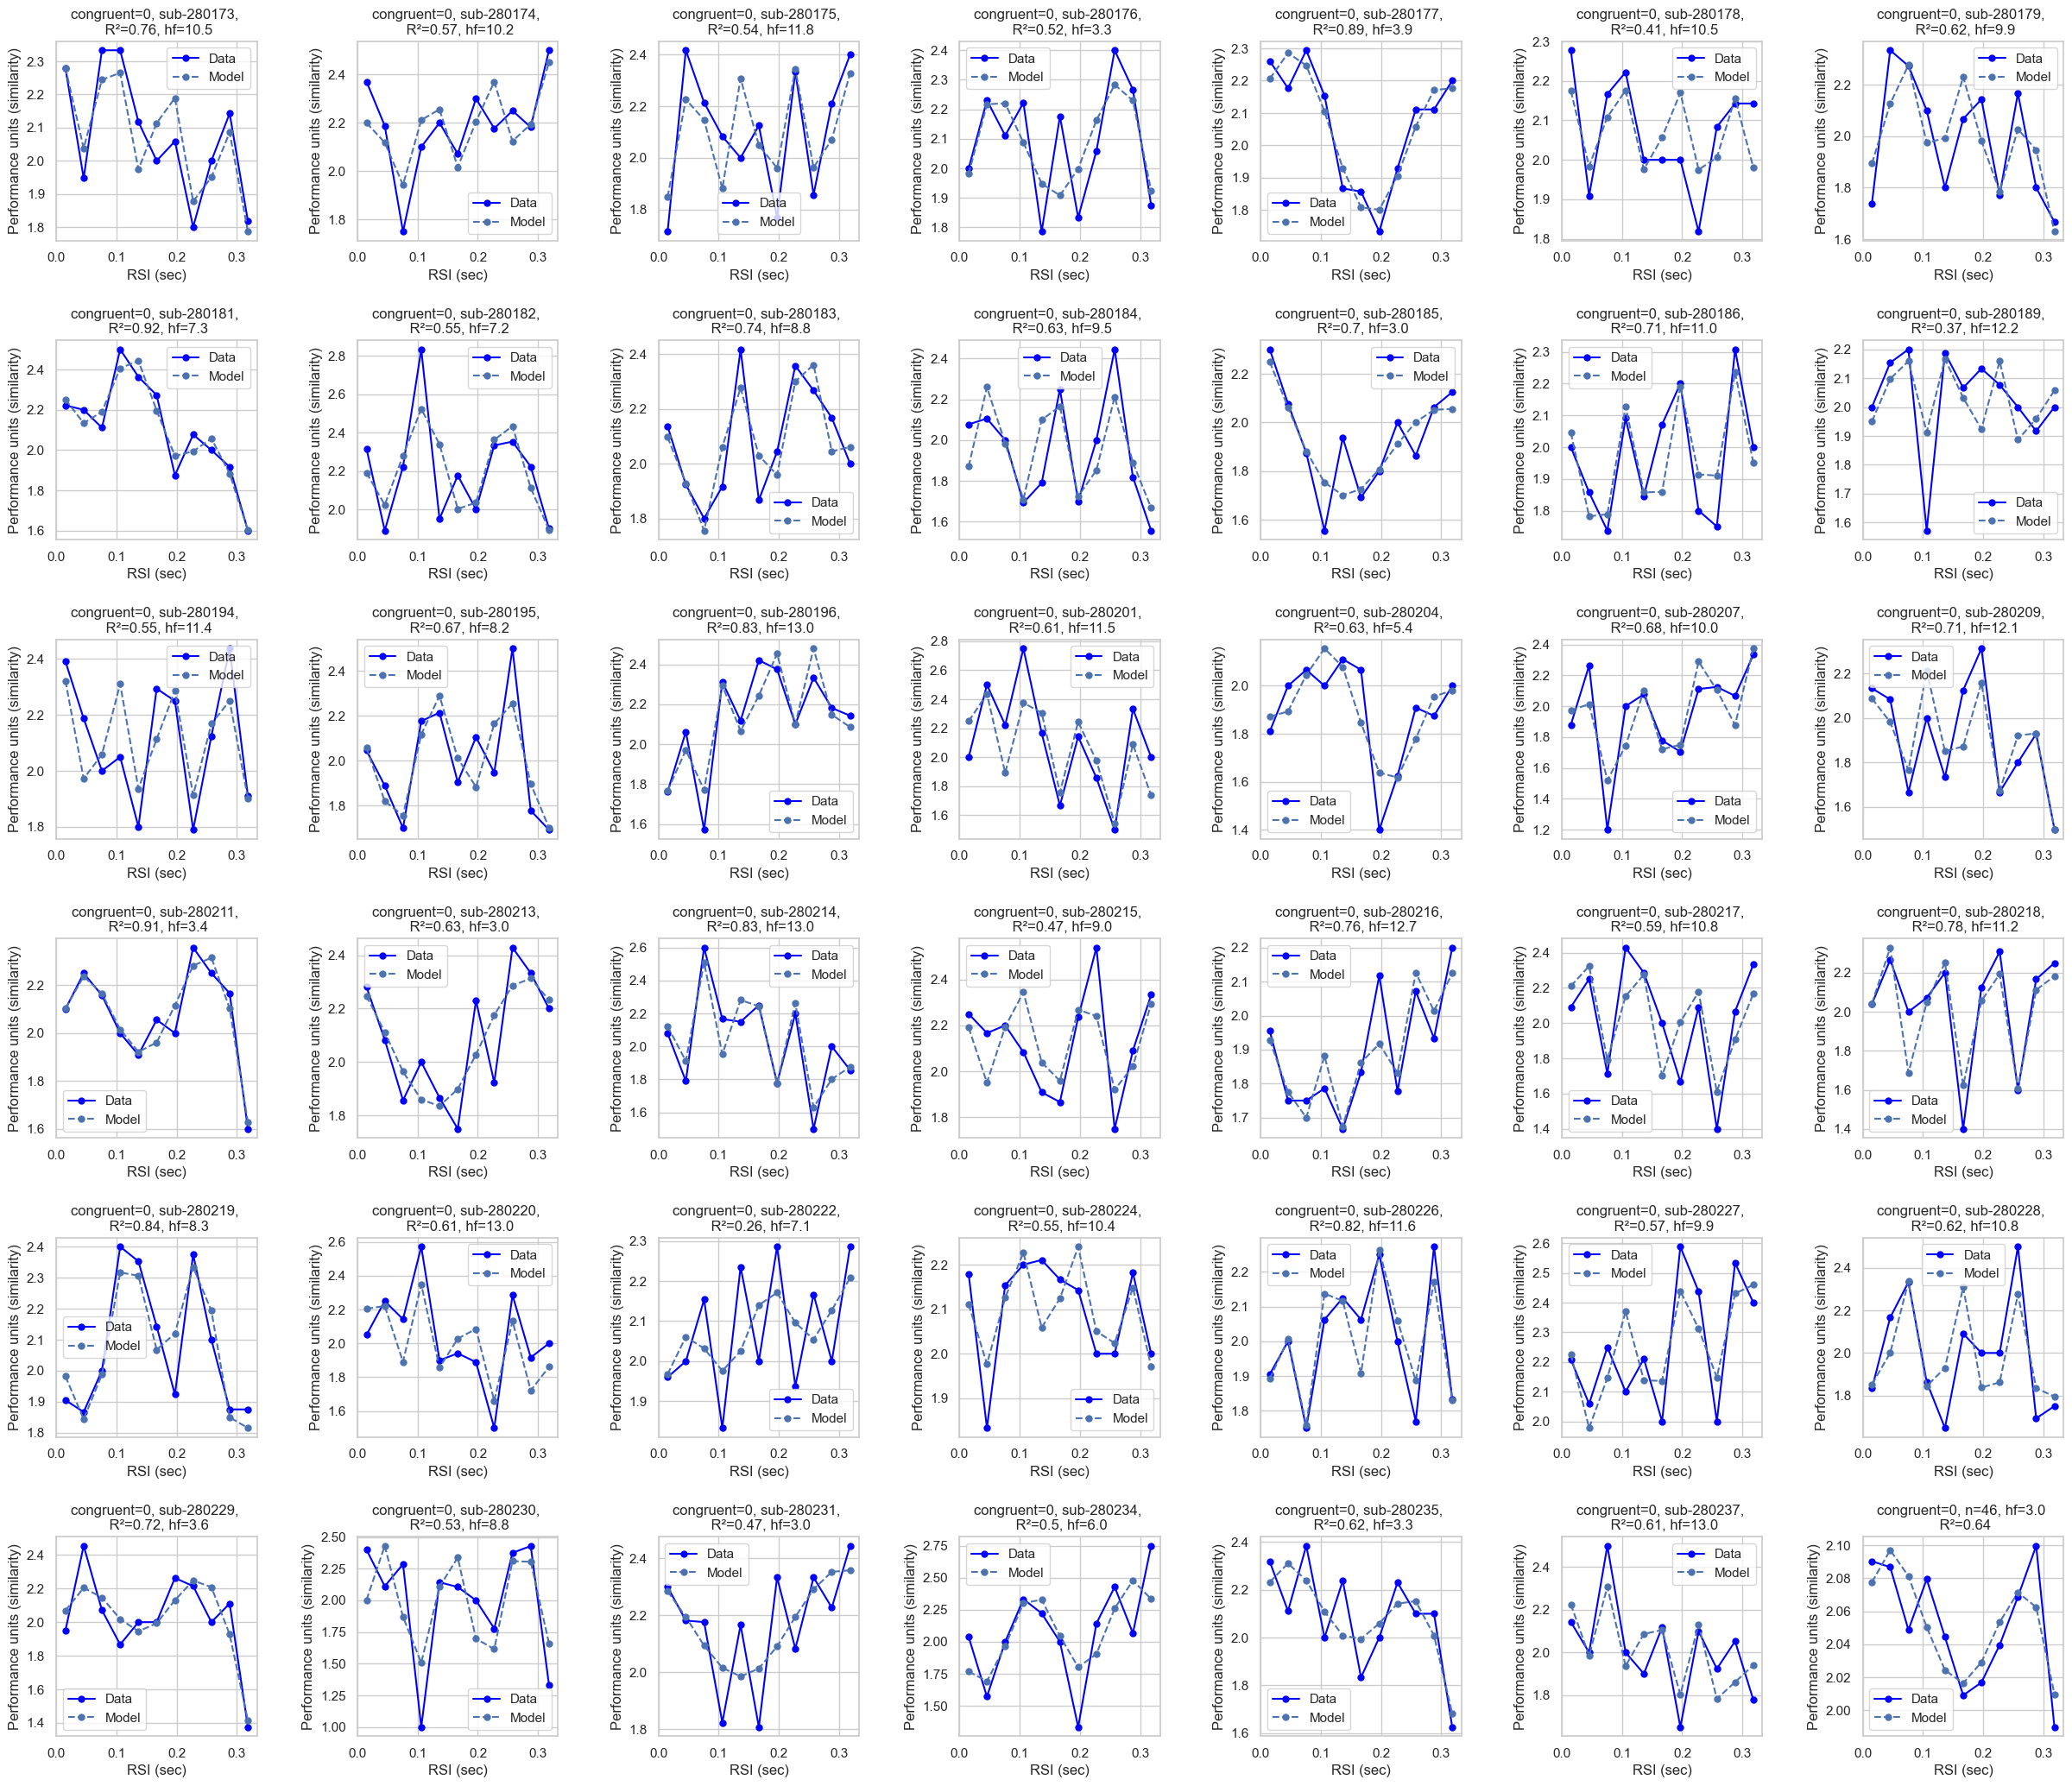

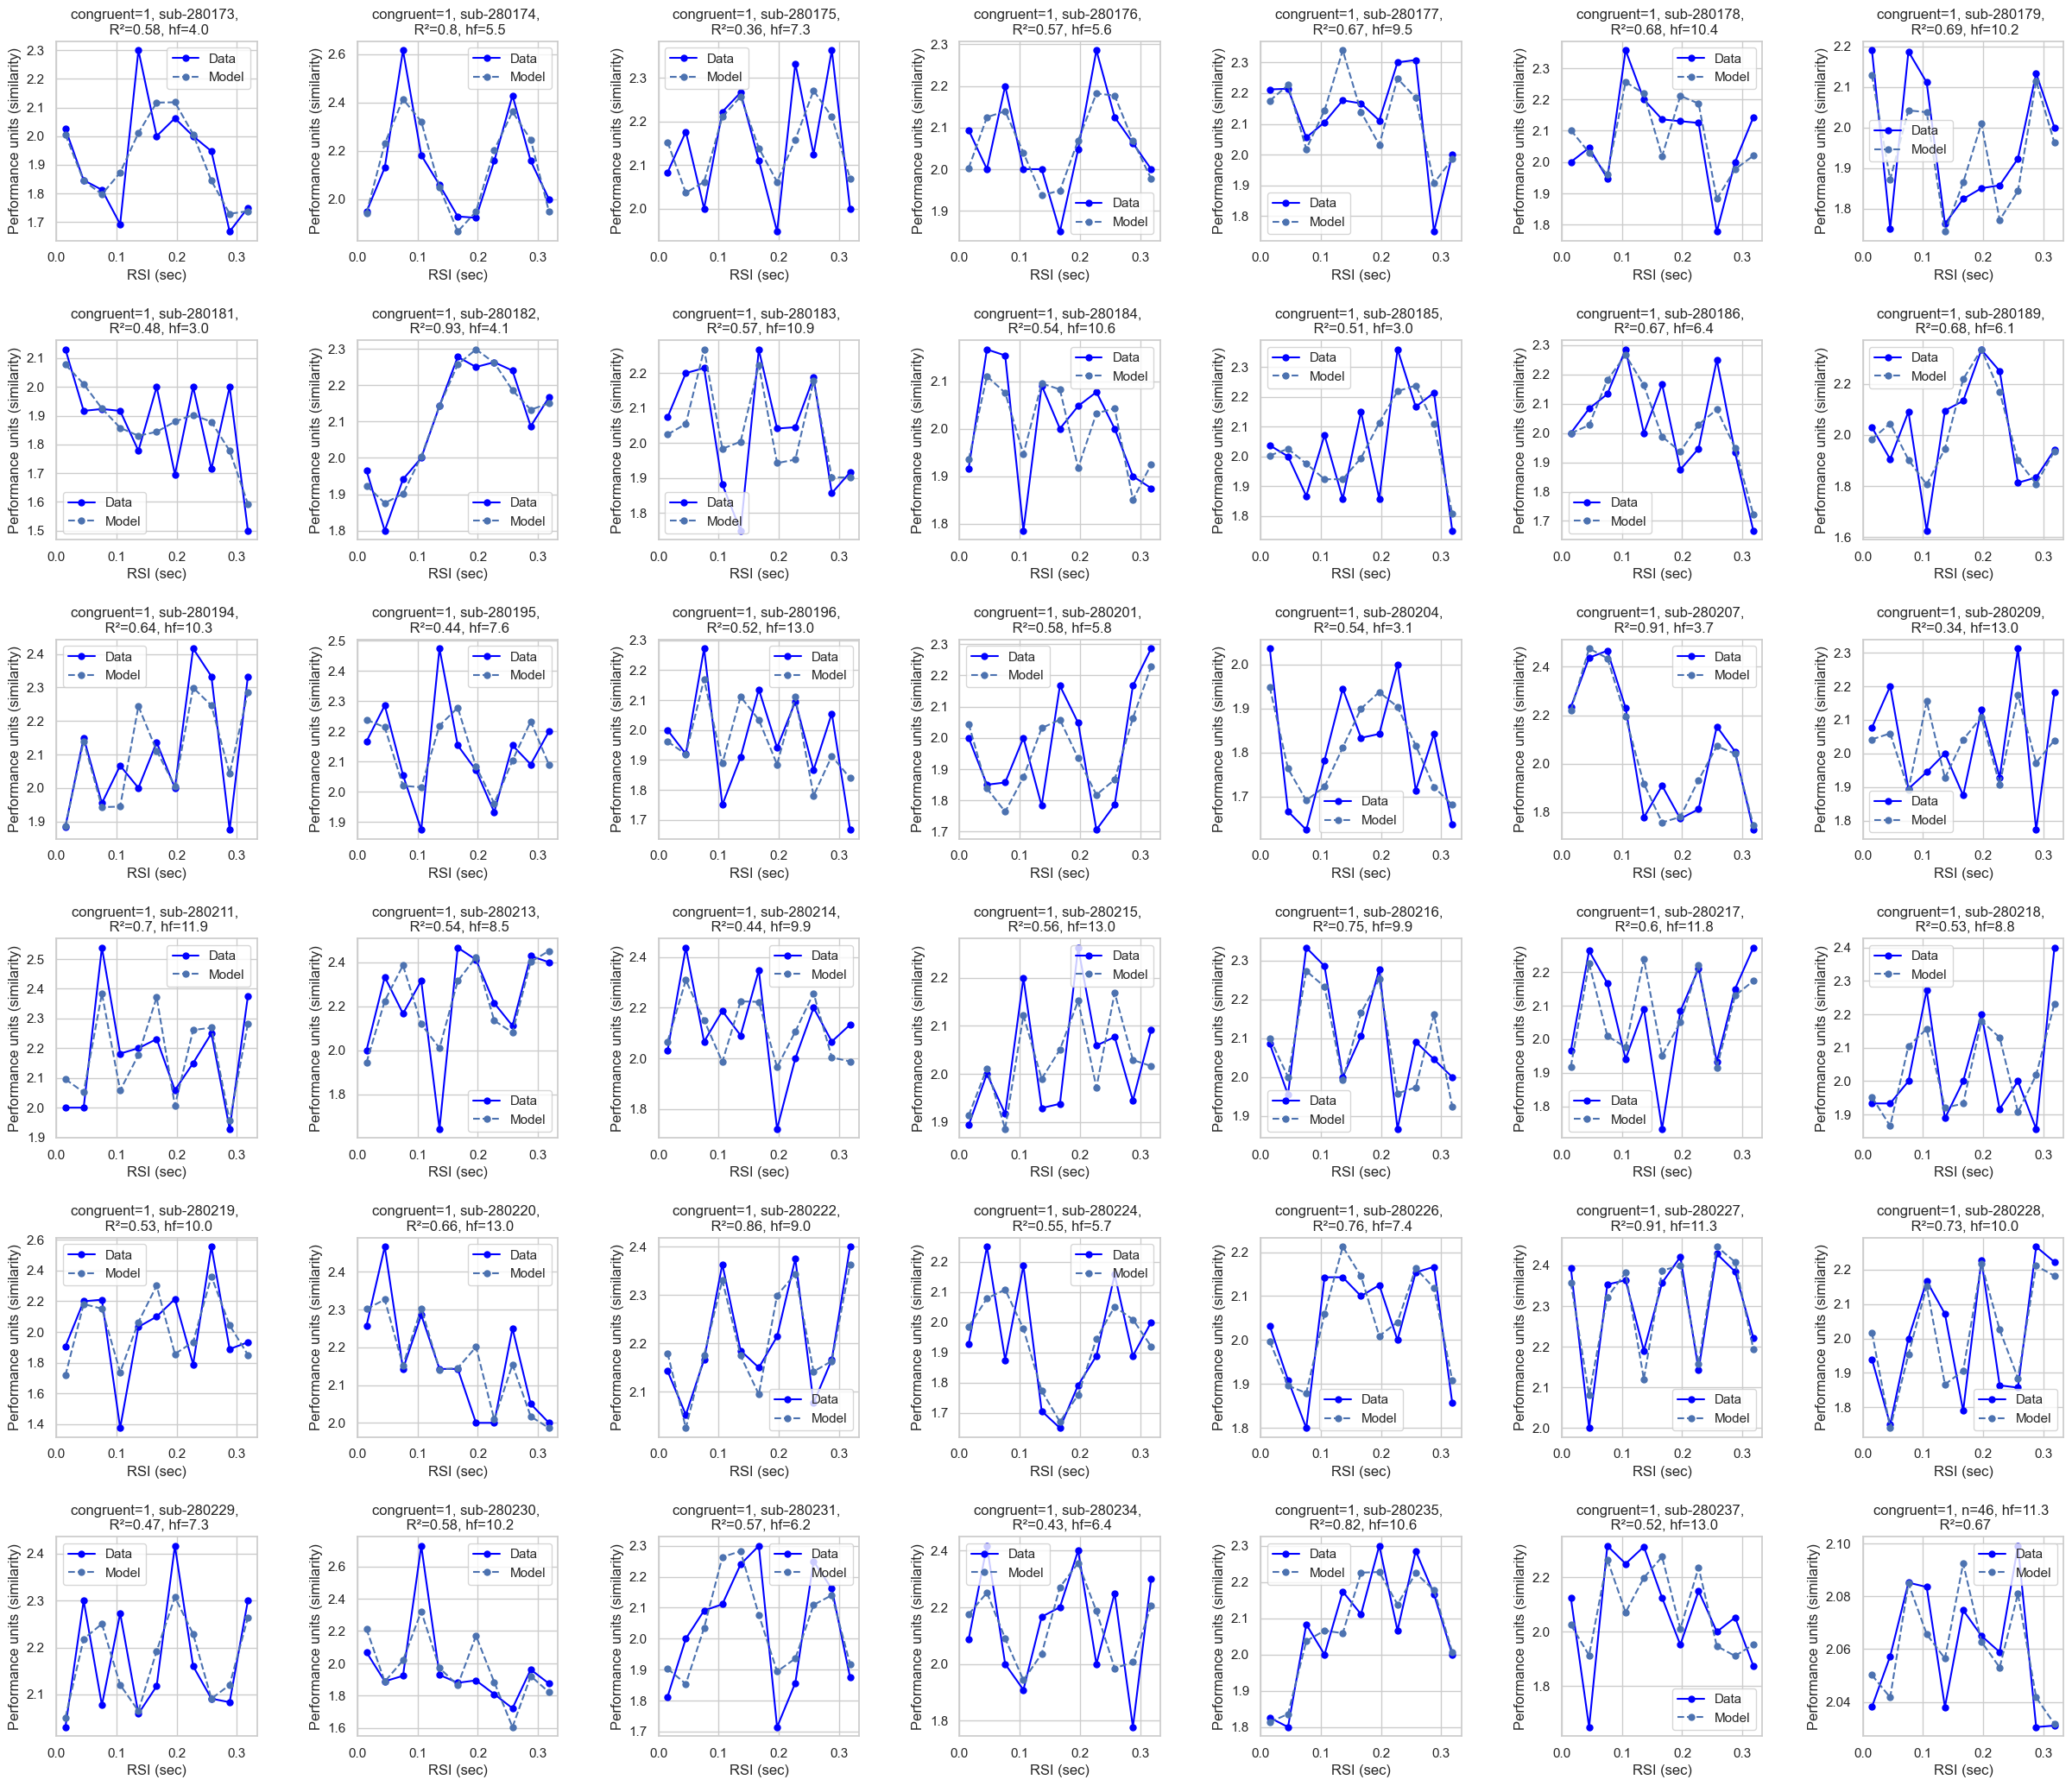

In [133]:
# fit a curve to a single condition

# Define bounds for the parameters
if output_var == "similarity":
    bounds=([-1, -1, -2, -1, -1, 3, -2],  # Lower bounds
            [1, 1, 2, 1, 1, 13, 2])
elif output_var == "hr":
    bounds=([-0.5, -0.5, -2, -0.5, -0.5, 3, -1],  # Lower bounds
            [0.5, 0.5, 2, 0.5, 0.5, 13, 1])

# trial_type = 0
n_iter=100

for trial_type in [0,1]:
    with PdfPages(path_pic+'{}-{}-{}-curve-fit.pdf'.format(df_var, trial_type, output_var)) as pdf:
        rows = 7
        cols = 7
        fig, axes = plt.subplots(rows, cols, figsize=(30, 30))
        axes = axes.flatten()
        # bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
        for idx, p_data in enumerate(tqdm(agg_dfs)):
            if idx < len(axes):
                x_data = (p_data[p_data[df_var] == trial_type]['binned_jitter']) / 33 # Example x data (time points)
                y_data = p_data[p_data[df_var] == trial_type][output_var] 
    
                # Run the optimization 100 times with different initial values
                best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
                
                # print('Best fitted parameters:', best_fit_params)
                # print('Best residual:', best_r2)
    
                # Plot the results
                ax = axes[idx]
                line1 = ax.plot(x_data, y_data, 'Blue', label='Data', marker="o", ms=5)
                line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'b', label='Model', marker="o", ms=5, linestyle="--")
                ax.legend(handles=[line1[0], line2[0]])
                ax.set_xlabel('RSI (sec)')
                ax.set_ylabel('Performance units ({})'.format(output_var))
                ax.set_title('{}={}, sub-{}, \n R²={}, hf={}'.format(df_var, trial_type, subjects[idx], np.round(best_r2, 2),
                                                                   np.round(best_fit_params[5], 1)))
        ax = axes[idx+1]
        x_data = (avg_df[avg_df[df_var] == trial_type]['binned_jitter']) / 33 # Example x data (time points)
        y_data = avg_df[avg_df[df_var] == trial_type][output_var] 
    
        # Run the optimization 100 times with different initial values
        best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
        
        print('Best fitted parameters:', best_fit_params)
        print('Best residual:', best_r2)
    
        # Plot the results
        line1 = ax.plot(x_data, y_data, 'Blue', label='Data', marker="o", ms=5)
        line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'b', label='Model', marker="o", ms=5, linestyle="--")
        
        ax.legend(handles=[line1[0], line2[0]])
        ax.set_xlabel('RSI (sec)')
        ax.set_ylabel('Performance units ({})'.format(output_var))
        ax.set_title('{}={}, n={}, hf={} \n R²={}'.format(df_var, trial_type, len(subjects), np.round(best_fit_params[5], 1),
                                                           np.round(best_r2, 2), 
                                                           ))
        for j in range(idx + 2, len(axes)):
            fig.delaxes(axes[j])
        # plt.title("Average (n={})".format(len(subjects)))
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        pdf.savefig(fig)

In [119]:
avg_df[avg_df[df_var] == trial_type][output_var] 

Series([], Name: similarity, dtype: float64)

In [132]:
trial_type

2

In [863]:
# fit a curve to both condition by firstly fitting the main condition and then a secondary condition
main_cond = 1
second_cond = 0
lower_bound_list = []
upper_bound_list = []

# Define bounds for the parameters
if output_var == "similarity":
    bounds=([-1, -1, -2, -1, -1, 3, -2],  # Lower bounds
            [1, 1, 2, 1, 1, 13, 2])
elif output_var == "hr":
    bounds=([-0.5, -0.5, -2, -0.5, -0.5, 3, -1],  # Lower bounds
            [0.5, 0.5, 2, 0.5, 0.5, 13, 1])

# trial_type = 0
n_iter=100

with PdfPages(path_pic+'{}-{}-{}-forced-curve-fit.pdf'.format(df_var, main_cond, output_var)) as pdf:
    rows = 5
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    axes = axes.flatten()
    # bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
    for idx, p_data in enumerate(tqdm(agg_dfs)):
        if idx < len(axes):
            x_data = (p_data[p_data[df_var] == main_cond]['binned_jitter']) / 33 # Example x data (time points)
            y_data = p_data[p_data[df_var] == main_cond][output_var] 

            # Run the optimization 100 times with different initial values
            best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
            
            # Plot the results
            ax = axes[idx]
            line1 = ax.plot(x_data, y_data, 'Blue', label='Data', marker="o", ms=5)
            line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'b', label='Model', marker="o", ms=5, linestyle="--")
            ax.legend(handles=[line1[0], line2[0]])
            ax.set_xlabel('RSI (sec)')
            ax.set_ylabel('Performance units ({})'.format(output_var))
            ax.set_title('{}={}, sub-{}, \n R²={}, hf={}'.format(df_var, main_cond, subjects[idx], np.round(best_r2, 2),
                                                               np.round(best_fit_params[5], 1)))

            lower_bound_list.append(best_fit_params[5]-0.1)
            upper_bound_list.append(best_fit_params[5])
    
    ax = axes[idx+1]
    x_data = (avg_df[avg_df[df_var] == main_cond]['binned_jitter']) / 33 # Example x data (time points)
    y_data = avg_df[avg_df[df_var] == main_cond][output_var] 

    # Run the optimization 100 times with different initial values
    best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
    
    # print('Best fitted parameters:', best_fit_params)
    # print('Best residual:', best_r2)

    # Plot the results
    line1 = ax.plot(x_data, y_data, 'Blue', label='Data', marker="o", ms=5)
    line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'b', label='Model', marker="o", ms=5, linestyle="--")
    
    ax.legend(handles=[line1[0], line2[0]])
    ax.set_xlabel('RSI (sec)')
    ax.set_ylabel('Performance units ({})'.format(output_var))
    ax.set_title('{}={}, n={}, hf={} \n R²={}'.format(df_var, main_cond, len(subjects),
                                                                    np.round(best_fit_params[5], 1),
                                                                    np.round(best_r2, 2), 
                                                       ))
    for j in range(idx + 2, len(axes)):
        fig.delaxes(axes[j])
    # plt.title("Average (n={})".format(len(subjects)))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    pdf.savefig(fig)  # Save the first figure
    plt.close(fig)

    lower_bound_list.append(best_fit_params[5]-0.1)
    upper_bound_list.append(best_fit_params[5])

    rows = 5
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    axes = axes.flatten()
    # bin_labels = [int(i) for i in np.linspace(0, 333, num_bins+1)]
    for idx, p_data in enumerate(tqdm(agg_dfs)):
        if idx < len(axes):
            x_data = (p_data[p_data[df_var] == second_cond]['binned_jitter']) / 33 # Example x data (time points)
            y_data = p_data[p_data[df_var] == second_cond][output_var] 
            bounds[0][5] = lower_bound_list[idx]
            bounds[1][5] = upper_bound_list[idx]
            # Run the optimization 100 times with different initial values
            best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
            
            # Plot the results
            ax = axes[idx]
            line1 = ax.plot(x_data, y_data, 'Red', label='Data', marker="o", ms=5)
            line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'r', label='Model', marker="o", ms=5, linestyle="--")
            ax.legend(handles=[line1[0], line2[0]])
            ax.set_xlabel('RSI (sec)')
            ax.set_ylabel('Performance units ({})'.format(output_var))
            ax.set_title('{}={}, sub-{}, \n R²={}, hf={}'.format(df_var, second_cond, subjects[idx], np.round(best_r2, 2),
                                                               np.round(best_fit_params[5], 1)))

    ax = axes[idx+1]
    x_data = (avg_df[avg_df[df_var] == second_cond]['binned_jitter']) / 33 # Example x data (time points)
    y_data = avg_df[avg_df[df_var] == second_cond][output_var] 
    bounds[0][5] = lower_bound_list[idx+1]
    bounds[1][5] = upper_bound_list[idx+1]

    # Run the optimization 100 times with different initial values
    best_fit_params, best_r2, best_rel = run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)
    
    # Plot the results
    line1 = ax.plot(x_data, y_data, 'Red', label='Data', marker="o", ms=5)
    line2 = ax.plot(x_data, model(x_data, *best_fit_params), 'r', label='Model', marker="o", ms=5, linestyle="--")
    
    ax.legend(handles=[line1[0], line2[0]])
    ax.set_xlabel('RSI (sec)')
    ax.set_ylabel('Performance units ({})'.format(output_var))
    ax.set_title('{}={}, n={}, hf={} \n R²={}'.format(df_var, second_cond, len(subjects),
                                                                    np.round(best_fit_params[5], 1),
                                                                    np.round(best_r2, 2), 
                                                       ))
    for j in range(idx + 2, len(axes)):
        fig.delaxes(axes[j])
    # plt.title("Average (n={})".format(len(subjects)))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    pdf.savefig(fig)    
    plt.close(fig)

100%|███████████████████████████████████████████| 19/19 [00:20<00:00,  1.07s/it]


In [856]:
print(df_var, trial_type, len(subjects), np.round(best_fit_params[5], 1),
                                                           np.round(best_r2, 2), 
                                                           )

congruent 0 19 7.8 0.57


In [847]:
p_data[p_data[df_var] == 2]['binned_jitter']

Series([], Name: binned_jitter, dtype: float64)

In [845]:
df_var

'congruent'

In [726]:
y_data = y_data.loc[:,~y_data.columns.duplicated()].copy()

hr3
0   0.153846
2   0.285714
4   0.142857
6   0.500000
8   0.545455
10  0.750000
12  0.600000
14  0.600000
17  0.200000
19  0.200000
20  0.666667

In [691]:
# run_optimization(x_data.to_numpy(), y_data.to_numpy(), bounds, n_iterations=n_iter)

# Fit the model
fit_params, _ = curve_fit(model, x_data.to_numpy(), y_data.to_numpy(), p0=initial_params, bounds=bounds, nan_policy='omit')

# Calculate R² value
r2 = r2_score(y_data, model(x_data, *fit_params))

ValueError: Input contains NaN.

In [724]:
y_data

hr3       hr3
0   0.153846  0.153846
2   0.285714  0.285714
4   0.142857  0.142857
6   0.500000  0.500000
8   0.545455  0.545455
10  0.750000  0.750000
12  0.600000  0.600000
14  0.600000  0.600000
17  0.200000  0.200000
19  0.200000  0.200000
20  0.666667  0.666667

<bound method IndexOpsMixin.to_numpy of 0     2.666667
2     1.250000
4          NaN
6     1.666667
8          NaN
10    2.666667
12    2.000000
14    1.500000
17    2.000000
19         NaN
20    1.000000
Name: similarity, dtype: float64>

In [645]:
(avg_df[avg_df[avg_df] == trial_type]['binned_jitter']) / 33

ValueError: Boolean array expected for the condition, not float64

In [631]:
x_data = (p_data[p_data[df_var] == trial_type]['binned_jitter']) / 33 # Example x data (time points)
y_data = p_data[p_data[df_var] == trial_type][output_var]

In [634]:
y_data

0      2.0
1      1.0
4      2.0
5      1.0
7      2.0
      ... 
351    2.0
353    3.0
357    3.0
359    2.0
361    2.0
Name: similarity, Length: 183, dtype: float64

In [611]:
(avg_df[avg_df[df_var] == 1]['binned_jitter']) / 33

1     0.015152
3     0.045455
5     0.075758
7     0.106061
9     0.136364
11    0.166667
13    0.196970
15    0.227273
17    0.257576
19    0.287879
21    0.318182
Name: binned_jitter, dtype: float64

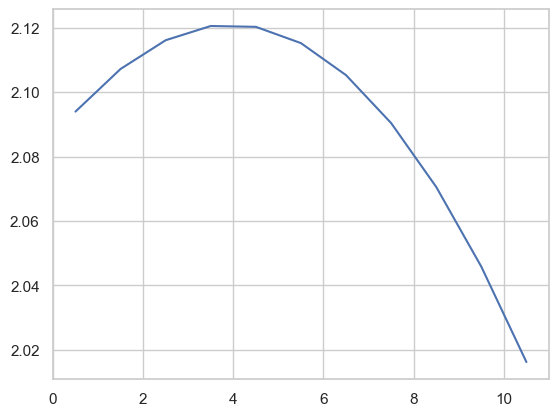

In [606]:
plt.plot(x_data, model(x_data/33, *[1,1,-0.5,0.44962648,0.35694564,3,0.63616042]))

In [542]:
(avg_df[avg_df[df_var] == 1]['binned_jitter']+0.5) * 1000/12

1       83.333333
3      166.666667
5      250.000000
7      333.333333
9      416.666667
11     500.000000
13     583.333333
15     666.666667
17     750.000000
19     833.333333
21     916.666667
23    1000.000000
Name: binned_jitter, dtype: float64

Best fitted parameters: {'a_lf': 0.03694029570690835, 'b_lf': -0.0230953280425425, 'omega_lf': 1.373115813888834, 'a_hf': 0.034157413703963774, 'b_hf': 0.03433120212933701, 'omega_hf': 5.579116943108432, 'c': 0.4339792931385372}
Best residual: 0.611053238054653


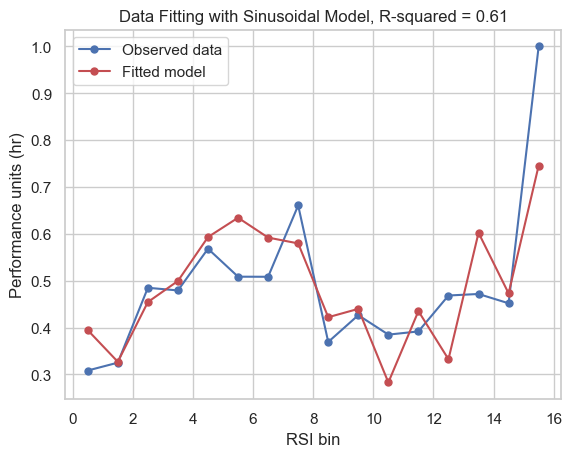

In [517]:
import numpy as np
from lmfit import Model
from sklearn.metrics import r2_score

# Define the model function based on the equation
def model(x, a_lf, b_lf, omega_lf, a_hf, b_hf, omega_hf, c):
    return (a_lf * np.cos(omega_lf * x) + b_lf * np.sin(omega_lf * x) +
            a_hf * np.cos(omega_hf * x) + b_hf * np.sin(omega_hf * x) + c)

def run_optimization(x_data, y_data, bounds, n_iterations=10):
    best_params = None
    best_r2 = -np.inf  # Initialize to a very low value
    
    model_instance = Model(model)
    
    for _ in range(n_iterations):
        # Random initial parameters within the bounds
        initial_params = {name: np.random.uniform(low, high) for name, (low, high) in zip(model_instance.param_names, zip(bounds[0], bounds[1]))}
        
        try:
            # Fit the model
            result = model_instance.fit(y_data, x=x_data, **initial_params)
            
            # Calculate R² value
            r2 = r2_score(y_data, result.best_fit)
            
            # Keep the best fit
            if r2 > best_r2:
                best_r2 = r2
                best_params = result.best_values
                
        except RuntimeError:
            # Handle the case where the fit doesn't converge
            continue
    
    return best_params, best_r2  # Return the best R² and corresponding parameters


# Generate some example data (replace with actual data)
x_data = avg_df[avg_df[df_var] == 0]['binned_jitter']  # Example x data (time points)
y_data = avg_df[avg_df[df_var] == 0][output_var]  
# Define bounds for the parameters
if output_var == "similarity":
    bounds=([0, 0, 1, 0, 0, 4, 1],  # Lower bounds
            [1, 1, 3, 1, 1, 18, 3])
elif output_var == "hr":
    bounds=([0, 0, 1, 0, 0, 4, 0],  # Lower bounds
            [0.25, 0.25, 3, 0.25, 0.25, 18, 1])
# Run the optimization 10 times with different initial values
best_params, best_r2 = run_optimization(x_data, y_data, bounds, n_iterations=20)

# Display the best fitting parameters
print('Best fitted parameters:', best_fit_params)
print('Best residual:', best_r2)

# Plot the results
plt.figure()
plt.plot(x_data, y_data, 'b-', label='Observed data', marker="o", ms=5)
plt.plot(x_data, model(x_data, **best_params), 'r-', label='Fitted model', marker="o", ms=5)
plt.legend()
plt.xlabel('RSI bin')
plt.ylabel('Performance units ({})'.format(output_var))
plt.title('Data Fitting with Sinusoidal Model, R-squared = {}'.format(np.round(best_r2, 2)))
plt.show()

In [492]:
def objective_function(params, x_data, y_data):
    try:
        # Use params to fit the model and calculate R²
        bounds=([0, 0, 1, 0, 0, 4, 1],  # Lower bounds
            [1, 1, 3, 1, 1, 18, 3])
        fit_params, _ = curve_fit(model, x_data, y_data, p0=params, bounds=bounds)
        r2 = r2_score(y_data, model(x_data, *fit_params))
        return -r2  # Return negative R² to minimize it
    except RuntimeError:
        return np.inf  # Return a large value if fitting fails

def run_optimization(x_data, y_data, bounds, n_iterations=10):
    # Differential Evolution Optimization
    result = differential_evolution(objective_function, bounds, args=(x_data, y_data), maxiter=n_iterations)
    
    best_params = result.x  # Parameters found by DE
    best_r2 = -result.fun   # Convert the minimized value back to R²
    
    return best_params, best_r2  # Return the best parameters and R²



# Generate some example data (replace with actual data)
x_data = avg_df[avg_df[df_var] == 1]['binned_jitter']  # Example x data (time points)
y_data = avg_df[avg_df[df_var] == 1][output_var]  
# Define bounds for the parameters
# if output_var == "similarity":
#     bounds=([0, 0, 1, 0, 0, 4, 1],  # Lower bounds
#             [1, 1, 3, 1, 1, 18, 3])
# elif output_var == "hr":
#     bounds=([0, 0, 1, 0, 0, 4, 0],  # Lower bounds
#             [0.25, 0.25, 3, 0.25, 0.25, 18, 1])



bounds = [(0, 1),  # First parameter's bounds
          (0, 1),  # Second parameter's bounds
          (1, 3),  # Third parameter's bounds
          (0, 1),  # Fourth parameter's bounds
          (0, 1),  # Fifth parameter's bounds
          (4, 18), # Sixth parameter's bounds
          (1, 3)]  # Seventh parameter's bounds

# Run the optimization 10 times with different initial values
best_fit_params, best_r2 = run_optimization(x_data, y_data, bounds, n_iterations=5)



KeyboardInterrupt



In [501]:
pip install lmfit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [371]:
agg_dfs[0]

binned_jitter  congruent       hr3       hr1  similarity
0             0.5          0  0.200000  0.500000    1.700000
1             0.5          1  0.333333  0.222222    2.111111
2             1.5          1  0.250000  0.375000    1.875000
3             1.5          0  0.181818  0.454545    1.727273
4             2.5          1  0.333333  0.500000    1.833333
5             2.5          0  0.333333  0.500000    1.833333
6             3.5          0  0.000000  0.500000    1.500000
7             3.5          1  0.000000  0.500000    1.500000
8             4.5          0  0.500000  0.250000    2.250000
9             4.5          1  0.000000  0.666667    1.333333
10            5.5          0  0.250000  0.250000    2.000000
11            5.5          1  0.142857  0.285714    1.857143
12            6.5          0  0.625000  0.000000    2.625000
13            6.5          1  0.400000  0.400000    2.000000
14            7.5          0  1.000000  0.000000    3.000000
15            7.5          1  0.375000  0.375000    2.000000
16            8.5          1  0.571429  0.142857    2.428571
17            8.5          0  0.666667  0.000000    2.666667
18            9.5          1  0.571429  0.142857    2.428571
19            9.5          0  0.500000  0.250000    2.250000
20           10.5          0  0.750000  0.250000    2.500000
21           10.5          1  0.500000  0.000000    2.500000
22           11.5          1  0.250000  0.250000    2.000000
23           11.5          0  0.666667  0.000000    2.666667
24           12.5          1  0.125000  0.375000    1.750000
25           12.5          0  0.000000  0.333333    1.666667
26           13.5          1  0.181818  0.363636    1.818182
27           13.5          0  0.250000  0.500000    1.750000
28           14.5          1  0.250000  0.000000    2.250000
29           14.5          0  0.400000  0.400000    2.000000
30           15.5          0       NaN       NaN         NaN
31           15.5          1       NaN       NaN         NaN

In [291]:
bins_1_3 = p_data[["binned_jitter", "similarity"]].groupby(["binned_jitter"], as_index=False).value_counts()
bins_1_3 = bins_1_3[bins_1_3["similarity"]!=2]["binned_jitter"].unique()

p_data = p_data[p_data["binned_jitter"].isin(bins_1_3)]

In [303]:
p_data[(p_data["binned_jitter"]==3.5) & (p_data["congruent"]==0)]

target  acc  congruent     fl_rt  recall_rt prime  recall  similarity  \
6     left  1.0        0.0  0.542382   0.833231     L     3.0         3.0   
31    left  1.0        0.0  0.500737   0.950445     L     1.0         3.0   
64    left  1.0        0.0  0.524285   1.442961     L     1.0         1.0   
89    left  1.0        0.0  0.566408   0.643218     L     3.0         1.0   
102  right  1.0        0.0  0.429252   0.812286     L     3.0         2.0   
121   left  1.0        0.0  0.532879   0.991111     R     3.0         1.0   
209  right  1.0        0.0  0.608318   1.889142     R     3.0         2.0   
288   left  1.0        0.0  0.628485   0.980835     R     3.0         2.0   
290  right  1.0        0.0  0.479325   1.307018     R     2.0         3.0   
299  right  1.0        0.0  0.566057   0.639853     L     2.0         3.0   
304  right  1.0        0.0  0.524344   0.592399     R     3.0         1.0   
344   left  1.0        0.0  0.582185   0.784237     R     3.0         1.0   
355   left  1.0        0.0  0.531829   0.507299     R     3.0         3.0   

       jitter  prime_jitter  hr  hr1  hr3  binned_jitter  
6    0.038965         0.062   0    0    1            3.5  
31   0.039865         0.065   0    0    1            3.5  
64   0.037562         0.066   0    1    0            3.5  
89   0.039861         0.053   0    1    0            3.5  
102  0.040262         0.053   1    0    0            3.5  
121  0.039498         0.060   0    1    0            3.5  
209  0.039925         0.053   1    0    0            3.5  
288  0.037955         0.054   1    0    0            3.5  
290  0.043716         0.054   0    0    1            3.5  
299  0.038561         0.055   0    0    1            3.5  
304  0.038887         0.063   0    1    0            3.5  
344  0.043465         0.051   0    1    0            3.5  
355  0.039439         0.054   0    0    1            3.5

In [421]:
print(
    p_data[p_data["binned_jitter"]==1]["jitter"].min(),
    p_data[p_data["binned_jitter"]==1]["jitter"].max(),
    p_data[p_data["binned_jitter"]==2]["jitter"].min(),
    p_data[p_data["binned_jitter"]==2]["jitter"].max(),
    p_data[p_data["binned_jitter"]==3]["jitter"].min(),
    p_data[p_data["binned_jitter"]==3]["jitter"].max(),)
    

0.0 0.11085439997259527 0.11140739999245852 0.21119619999080896 0.2241340999607928 0.31177690002368763


In [331]:
trial_data_list[3][trial_data_list[3]["acc"] == 0]

target  acc  congruent     fl_rt  recall_rt prime  recall  similarity  \
5     left  0.0        0.0  0.592369   1.332300     R     2.0         2.0   
25    left  0.0        0.0  0.492314   0.856359     L     1.0         2.0   
36   right  0.0        0.0  0.435958   2.369465     L     3.0         2.0   
42    left  0.0        0.0  0.428591   1.783874     L     1.0         1.0   
67    left  0.0        0.0  0.602376   1.102328     L     3.0         2.0   
69    left  0.0        0.0  0.402294   0.793366     R     1.0         2.0   
86   right  0.0        0.0  0.656325   1.923700     R     3.0         1.0   
110   left  0.0        0.0  0.379385   0.992112     R     2.0         1.0   
115   left  0.0        1.0  0.539582   1.228547     L     2.0         1.0   
116   left  0.0        0.0  0.409249   2.249008     L     3.0         1.0   
121  right  0.0        0.0  0.522128   2.125307     R     1.0         3.0   
128   left  0.0        0.0  0.513010   2.385431     R     2.0         3.0   
142  right  0.0        0.0  0.401288   0.530173     L     1.0         3.0   
144   left  0.0        0.0  0.424290   0.934030     L     3.0         3.0   
156  right  0.0        0.0  0.397097   0.131871     L     3.0         1.0   
168   left  0.0        0.0  0.462038   1.250027     L     2.0         3.0   
183  right  0.0        0.0  0.400847   1.323097     L     3.0         1.0   
184  right  0.0        0.0  0.439717   0.668657     L     3.0         2.0   
186   left  0.0        0.0  0.408179   0.785775     L     1.0         2.0   
200   left  0.0        0.0  0.501388   1.234166     L     2.0         2.0   
202   left  0.0        0.0  0.603954   2.325543     R     2.0         1.0   
206  right  0.0        0.0  0.428828   0.847207     R     3.0         2.0   
213   left  0.0        0.0  0.469116   0.800043     R     3.0         3.0   
214   left  0.0        0.0  0.412288   2.002769     L     1.0         3.0   
215  right  0.0        0.0  0.418760   0.510408     R     2.0         2.0   
222   left  0.0        0.0  0.417825   0.209174     L     1.0         2.0   
228   left  0.0        0.0  0.351720   2.513466     R     3.0         2.0   
235   left  0.0        0.0  0.444632   0.606956     R     1.0         1.0   
268   left  0.0        0.0  0.455036   0.421425     L     2.0         1.0   
271   left  0.0        0.0  0.435932   0.971042     L     1.0         1.0   
277  right  0.0        0.0  0.561662   0.185794     R     1.0         3.0   
285   left  0.0        0.0  0.450704   1.917821     R     2.0         1.0   
302   left  0.0        0.0  0.356673   0.934243     L     2.0         2.0   
309   left  0.0        0.0  0.466429   1.245634     L     2.0         3.0   
310   left  0.0        0.0  0.389242   0.552257     R     1.0         2.0   
323  right  0.0        0.0  0.425291   0.896233     R     3.0         1.0   
333  right  0.0        0.0  0.371713   0.710296     R     1.0         2.0   
340  right  0.0        0.0  0.391898   1.458872     R     2.0         2.0   
351   left  0.0        0.0  0.442063   0.873757     R     1.0         1.0   

       jitter  prime_jitter  
5    0.123350         0.146  
25   0.289041         0.303  
36   0.157839         0.169  
42   0.274817         0.299  
67   0.193299         0.209  
69   0.293188         0.312  
86   0.240831         0.257  
110  0.022645         0.046  
115  0.105592         0.124  
116  0.000000         0.033  
121  0.000000         0.002  
128  0.174272         0.198  
142  0.224196         0.237  
144  0.175265         0.199  
156  0.291295         0.305  
168  0.122849         0.141  
183  0.024586         0.044  
184  0.139563         0.154  
186  0.291246         0.309  
200  0.295112         0.316  
202  0.124530         0.148  
206  0.156935         0.183  
213  0.178592         0.192  
214  0.186552         0.205  
215  0.121885         0.146  
222  0.272371         0.291  
228  0.189597         0.212  
235  0.090175         0.105  
268  0.223873         0.237  
271  0.000000         0

In [244]:
pd.concat(agg_dfs).groupby(['binned_jitter', 'congruent'], as_index = False).mean().plot(x='binned_jitter', y='similarity', kind='line')

binned_jitter  congruent  similarity
0              1        0.0    1.882353
1              1        1.0    1.894737
2              2        0.0    1.823529
3              2        1.0    1.952381
4              3        0.0    2.200000
5              3        1.0    2.000000
6              4        0.0    1.941176
7              4        1.0    1.689655
8              5        0.0    2.136364
9              5        1.0    2.148148
10             6        0.0    2.000000
11             6        1.0    1.888889
12             7        0.0    1.964286
13             7        1.0    1.888889

In [261]:
agg_data

binned_jitter  congruent  similarity       acc
0              1        0.0    1.853659  0.790698
1              1        1.0    2.081081  0.973684
2              2        0.0    1.921053  0.600000
3              2        1.0    1.933333  0.967742
4              3        0.0    2.027027  0.756757
5              3        1.0    2.151515  0.970588
6              4        0.0    1.925926  0.758621
7              4        1.0    2.029412  1.000000
8              5        0.0    2.000000  0.636364
9              5        1.0    1.909091  0.885714
10             6        0.0    2.148148  0.931034
11             6        1.0    1.920000  0.888889

<Axes: title={'center': 'sub-280186'}, xlabel='binned_jitter'>

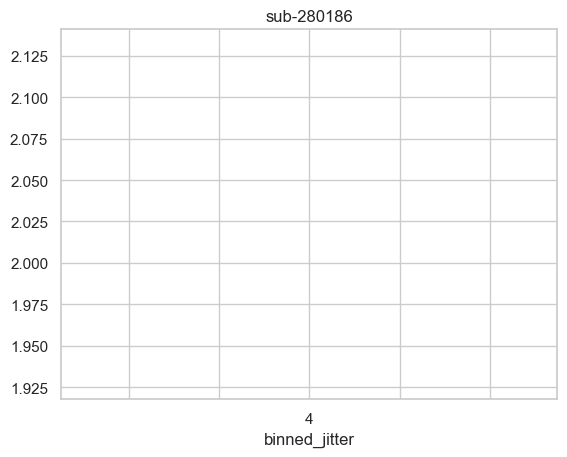

In [263]:
agg_data[(agg_data["congruent"] == 1) & (agg_data["acc"] == 1)].plot(x='binned_jitter', y='similarity', kind='line',
title = "sub-{}".format(subjects[idx]),legend=False, color = "Blue")

<Figure size 800x600 with 0 Axes>

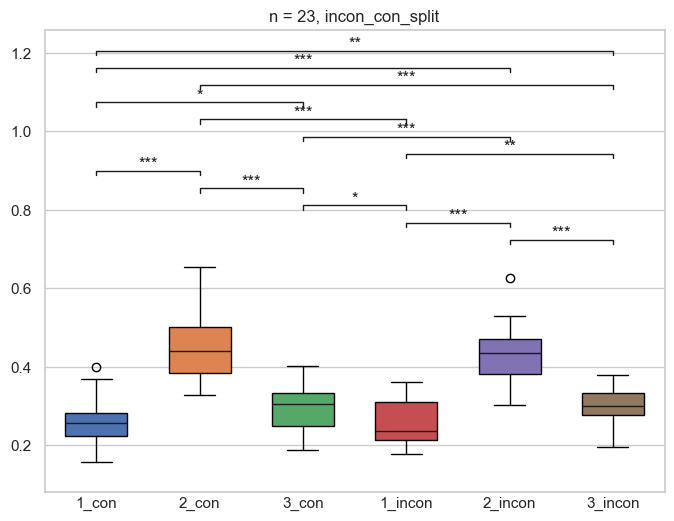

In [1117]:
# trial = "err_corr_split"
pic_name = "{}_similarity_counts.png".format("incon_con_split")
plot_data = face_task_data.dropna(subset="recall_con")[\
["1_con", "2_con", "3_con",
"1_incon", "2_incon", "3_incon",]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
# sns.boxplot(plot_data)
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.title("n = {}, {}".format(len(plot_data), "incon_con_split"))

plt.xticks(labels=plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
# plt.ylim(0, 1)
# plt.xlabel("<< Less Similar                 More Similar >>")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

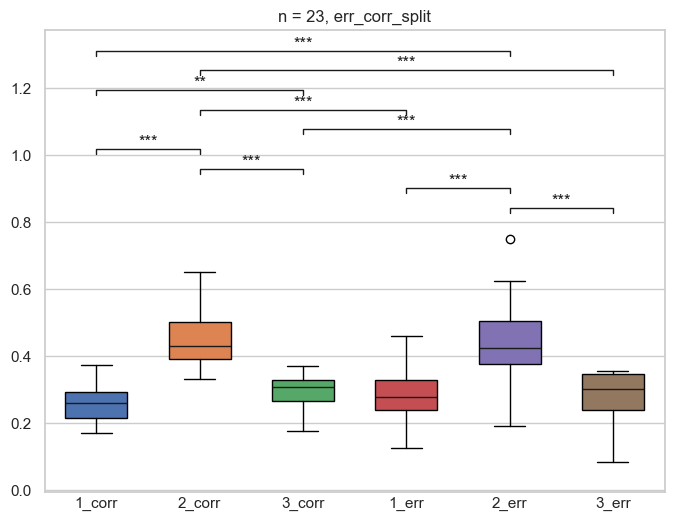

In [1118]:
# trial = "err_corr_split"
pic_name = "{}_similarity_counts.png".format("err_corr_split")
plot_data = face_task_data.dropna(subset="recall_con")[\
["1_corr", "2_corr", "3_corr",
"1_err", "2_err", "3_err",]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
# sns.boxplot(plot_data)
box_and_whisker(convert_df_to_arr(plot_data)[0])
plt.title("n = {}, {}".format(len(plot_data), "err_corr_split"))

plt.xticks(labels=plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
# plt.ylim(0, 1)
# plt.xlabel("<< Less Similar                 More Similar >>")

plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

## Plots

<Figure size 800x600 with 0 Axes>

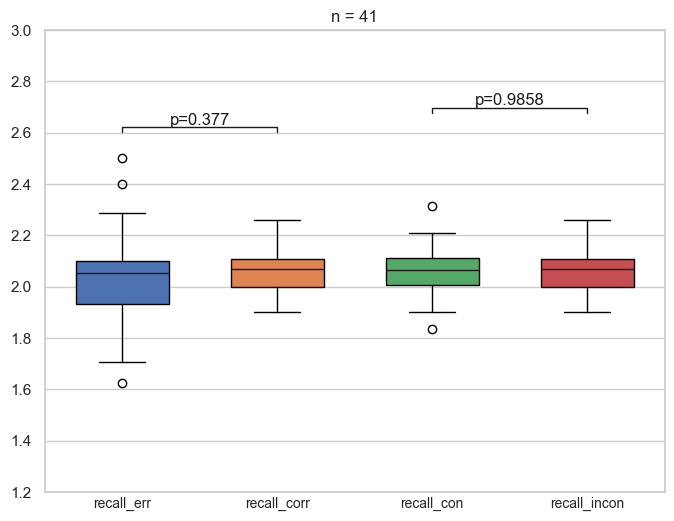

In [18]:
pic_name = "err_corr.png"
plot_data = face_task_data.dropna(subset="recall_incon")[\
['recall_err', 'recall_corr', 'recall_con', 'recall_incon',]\
]
plot_data = drop_rows_with_most_nans(plot_data)
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
box_and_whisker(plot_data, between = (["recall_con", "recall_corr"], ["recall_incon", "recall_err"]), within = [])
plt.xticks(labels = plot_data.columns, ticks = range(1, len(plot_data.columns)+1))
plt.ylim(1.2, 3)
plt.title("n = {}".format(len(plot_data)))
# plt.tick_params(axis='x', rotation=45)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [ ]:
p_data['binned_jitter'] = pd.cut(p_data["jitter"], bins=bins, labels=labels, include_lowest=True).astype(int)-.5

In [1362]:
plot_data.recall_err.mean()

2.0239369529460682

In [869]:
stats.ttest_rel(face_task_data["recall_incon"], face_task_data["recall_con"])

TtestResult(statistic=0.6627025123415672, pvalue=0.514404779918111, df=22)

<Figure size 800x600 with 0 Axes>

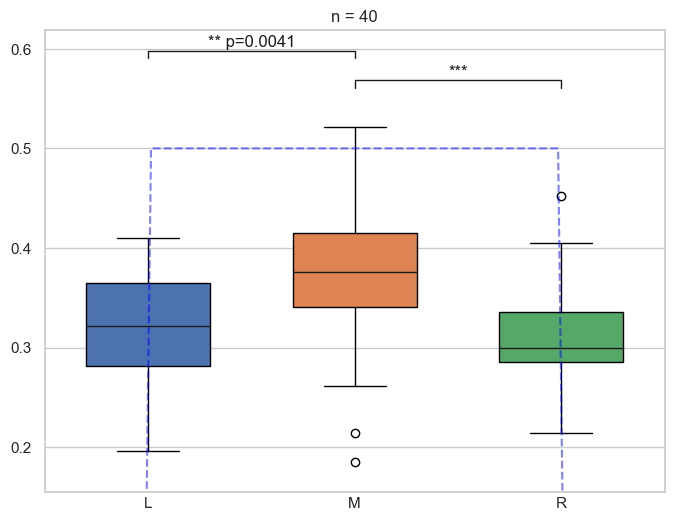

In [22]:
pic_name = "recall_counts.png"
plt.figure(figsize=(8, 6))
plot_data = face_task_data[\
["1_r", "2_r", "3_r"]\
]
plot_data = drop_rows_with_most_nans(plot_data)
# plt.figure(figsize=(8, 6))
box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
plt.title("n = {}".format(len(plot_data)))
plt.xticks(labels = ["L", "M", "R"], ticks = range(1, len(plot_data.columns)+1))

# uniform distribution parameters
data = np.repeat([1, 2, 3,], [1, 1, 1,]) # Adjust the frequency of each number
mu, std = uniform.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = uniform.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
# plt.ylim(0.1, 0.8)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

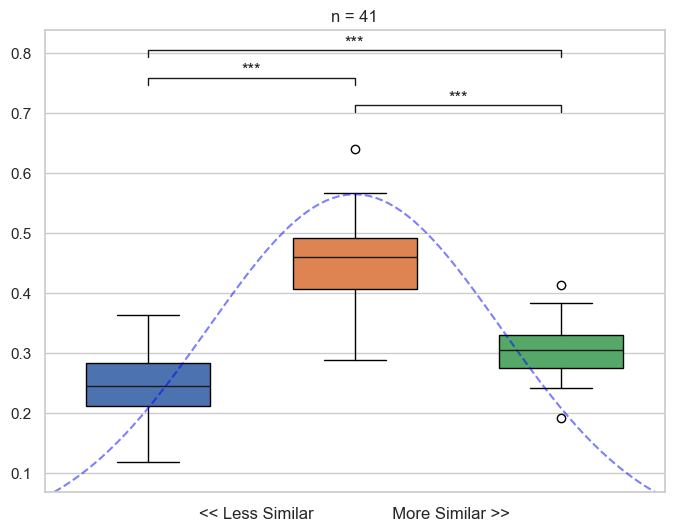

In [23]:
plot_data = face_task_data[\
[1, 2, 3]\
]
plot_data = drop_rows_with_most_nans(plot_data)
plt.figure(figsize=(8, 6))
pic_name = "similarity_counts.png"
box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
plt.xlabel("<< Less Similar                 More Similar >>")
plt.title("n = {}".format(len(plot_data)))
# Gaussian distribution parameters
data = np.repeat([1, 2, 3], [1, 2, 1]) # Adjust the frequency of each number
mu, std = norm.fit(data) # Fit a Gaussian to this data

# Add Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xticks(labels="", ticks = range(1, len(plot_data.columns)+1))
# plt.ylim(0.1, 0.8)
sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

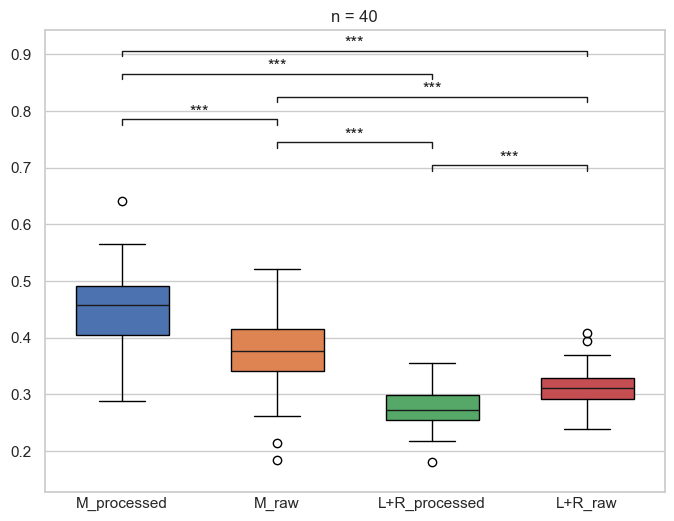

In [25]:
pic_name = "middle_processed.png"
plt.figure(figsize=(8, 6))
# plot_data = face_task_data[face_task_data["2_r"] <= face_task_data["2_r"].median()]
plot_data = face_task_data[\
[2, "2_r",]\
]
plot_data["1+3"] = (face_task_data[1] + face_task_data[3])/2
plot_data["1+3_r"] = (face_task_data["1_r"] + face_task_data["3_r"])/2
plot_data = drop_rows_with_most_nans(plot_data)
# plt.figure(figsize=(8, 6))
box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
plt.title("n = {}".format(len(plot_data)))
plt.xticks(labels = ["M_processed", "M_raw", "L+R_processed", "L+R_raw"], ticks = range(1, len(plot_data.columns)+1))

# plt.ylim(.1, 0.9)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

<Figure size 800x600 with 0 Axes>

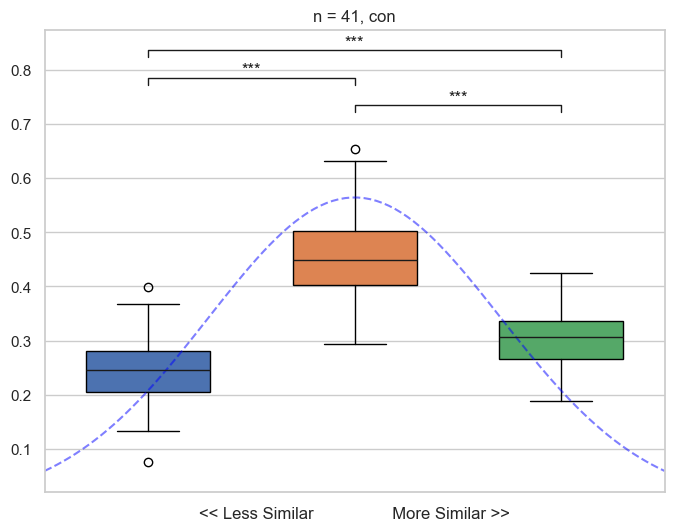

<Figure size 800x600 with 0 Axes>

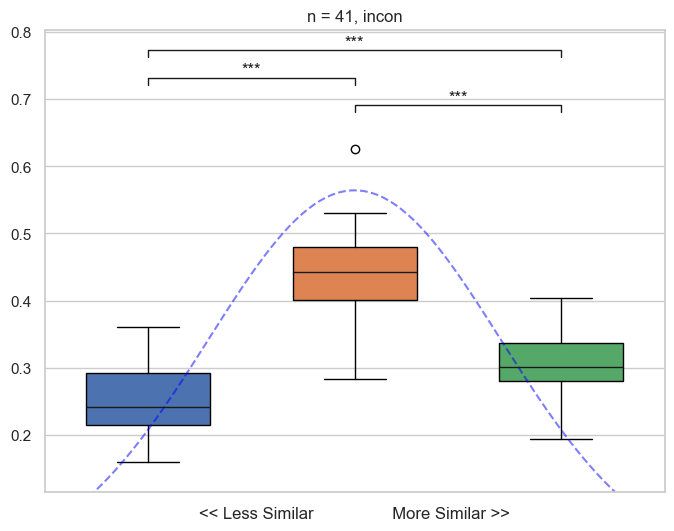

<Figure size 800x600 with 0 Axes>

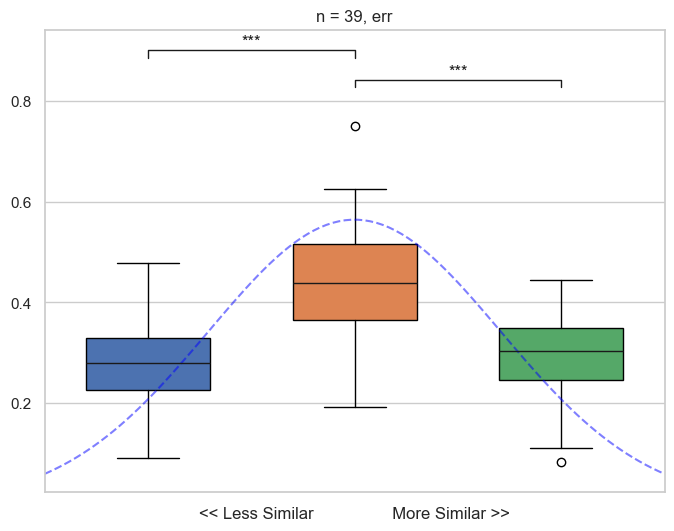

<Figure size 800x600 with 0 Axes>

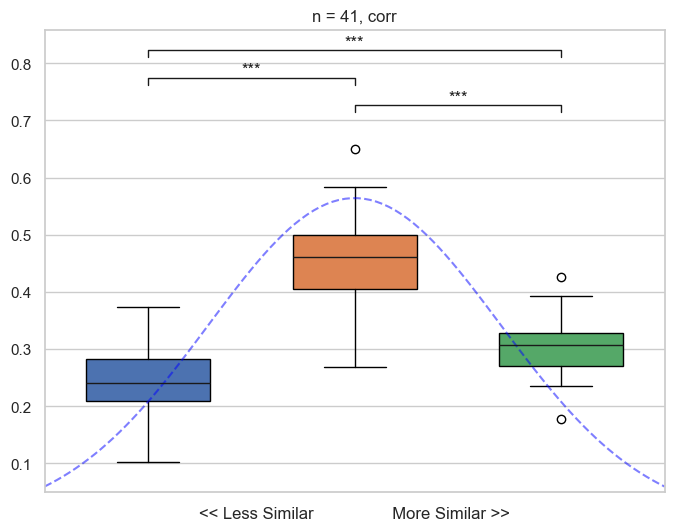

In [27]:
for trial in ["con", "incon", "err", "corr"]:
    pic_name = "{}_similarity_counts.png".format(trial)
    plot_data = face_task_data.dropna(subset="recall_con")[\
    ["1_{}".format(trial), "2_{}".format(trial), "3_{}".format(trial)]\
    ]
    plot_data = drop_rows_with_most_nans(plot_data)
    plot_data = drop_rows_with_most_nans(plot_data)
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(8, 6))
    # sns.boxplot(plot_data)
    box_and_whisker_simple(convert_df_to_arr(plot_data)[0])
    plt.title("n = {}, {}".format(len(plot_data), trial))
    
    data = np.repeat([1, 2, 3], [1, 2, 1])
    mu, std = norm.fit(data) # Fit a Gaussian to this data
    
    # Add Gaussian distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    sns.lineplot(x=x, y=p, color='blue', alpha = 0.5, linestyle = "--")
    plt.xticks(labels="", ticks = range(1, len(plot_data.columns)+1))
    # plt.ylim(0, 0.9)
    plt.xlabel("<< Less Similar                 More Similar >>")
    
    plt.savefig(path_pic + "{}".format(pic_name))
    plt.show()

ValueError: array must not contain infs or NaNs

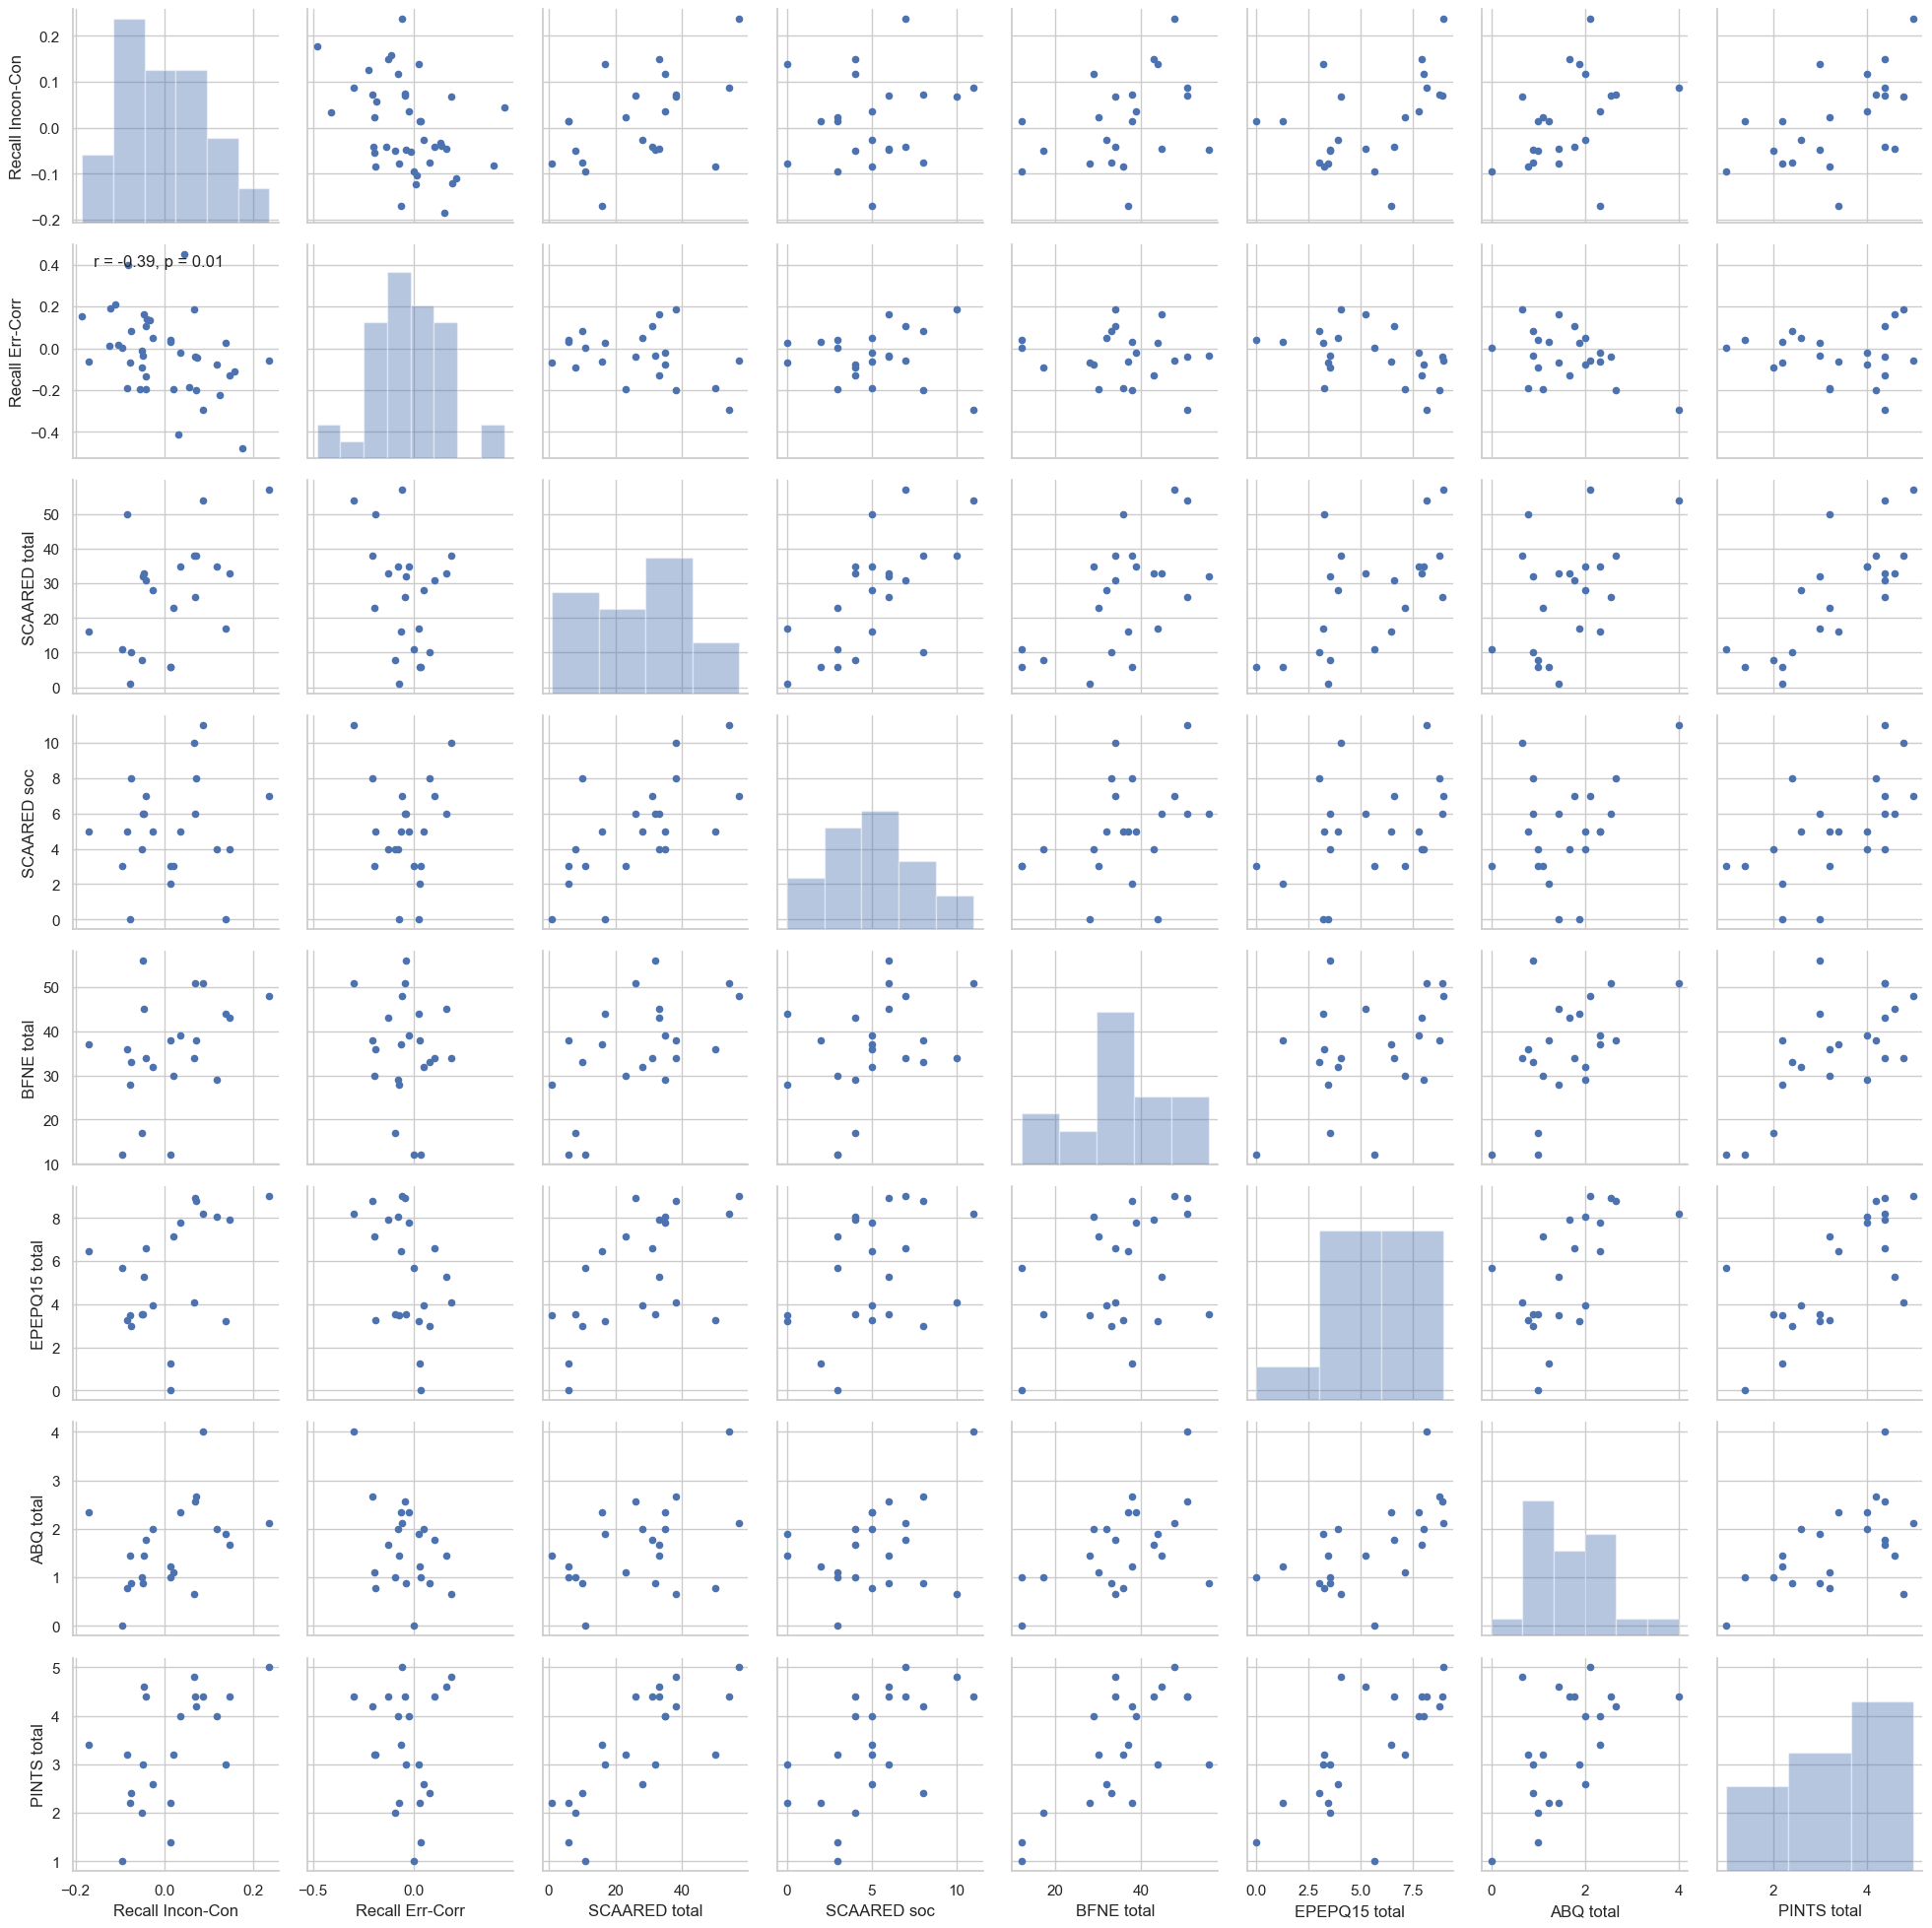

In [28]:
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
sns.set(style="whitegrid")

corr_data = face_task_data[\
[
"recall_diff_con", "recall_diff_err",
"scaared_b_scrdTotal_s1_r1_e1", "scaared_b_scrdSoc_s1_r1_e1",
"bfne_b_scrdTotal_s1_r1_e1", "epepq15_scrdTotal_s1_r1_e1",
"abq_scrdTotal_s1_r1_e1",  "pints_scrdTotal_s1_r1_e1",
]
].dropna(subset = "recall_diff_err")


pic_name = "corr_matrix.png"
def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}, p = {:.2f}".format(r, p),
                xy=(.1, .9), xycoords=ax.transAxes)


colnames_dict = dict(
    {
"recall_diff_con": "Recall Incon-Con",
"recall_diff_err": "Recall Err-Corr",
"scaared_b_scrdTotal_s1_r1_e1": "SCAARED total",
"scaared_b_scrdSoc_s1_r1_e1": "SCAARED soc",
"bfne_b_scrdTotal_s1_r1_e1": "BFNE total",
"epepq15_scrdTotal_s1_r1_e1": "EPEPQ15 total",
"abq_scrdTotal_s1_r1_e1": "ABQ total",
"pints_scrdTotal_s1_r1_e1": "PINTS total"
}
)

corr_data.rename(columns=colnames_dict, inplace=True)

g = sns.PairGrid(corr_data, palette=["red"])
g.map_upper(plt.scatter, s=20)
g.map_diag(sns.distplot, kde=False)
g.map_lower(plt.scatter, s=20)
g.map_lower(corrfunc)
g.map_upper(corrfunc)

# Add scales and tick labels to only the margin plots
# for i, ax in enumerate(g.axes.flatten()):
#     row, col = divmod(i, g.axes.shape[1])
#     if row == 0:  # Top row
#         ax.tick_params(labeltop=True)
#     if col == g.axes.shape[1] - 1:  # Right column
#         ax.tick_params(labelright=True)
plt.savefig(path_pic + "{}".format(pic_name))
plt.show()

In [1114]:
corr_data

Recall Incon-Con  Recall Err-Corr  SCAARED total  SCAARED soc  \
sub                                                                     
280173         -0.011184        -0.087599           37.0         10.0   
280174          0.117908        -0.076023           35.0          4.0   
280176          0.086651        -0.295739           54.0         11.0   
280177         -0.047929        -0.035484           32.0          6.0   
280178          0.015084         0.038169            6.0          3.0   
280179         -0.076856        -0.070513            1.0          0.0   
280181         -0.026107         0.048387           28.0          5.0   
280182          0.014433         0.028777            6.0          2.0   
280183          0.236832        -0.057286           57.0          7.0   
280184          0.069282        -0.040451           26.0          6.0   
280185          0.021895        -0.194767           23.0          3.0   
280186         -0.041379         0.105895           31.0          7.0   
280189         -0.094011         0.001379           11.0          3.0   
280194         -0.046586         0.163127           33.0          6.0   
280195          0.035651        -0.020752           35.0          5.0   
280196          0.072136        -0.201961           38.0          8.0   
280201         -0.170704        -0.061928           16.0          5.0   
280204          0.148172        -0.127660           33.0          4.0   
280207          0.137845         0.025898           17.0          0.0   
280209          0.068581         0.185458           38.0         10.0   
280211         -0.084133        -0.189110           50.0          5.0   
280213         -0.074595         0.082466           10.0          8.0   
280214         -0.049921        -0.089744            8.0          4.0   

        BFNE total  EPEPQ15 total  ABQ total  PINTS total  
sub                                                        
280173        40.0       8.000000   2.888889          4.2  
280174        29.0       8.066667   2.000000          4.0  
280176        51.0       8.200000   4.000000          4.4  
280177        56.0       3.533333   0.888889          3.0  
280178        12.0       0.000000   1.000000          1.4  
280179        28.0       3.466667   1.444444          2.2  
280181        32.0       3.933333   2.000000          2.6  
280182        38.0       1.266667   1.222222          2.2  
280183        48.0       9.000000   2.111111          5.0  
280184        51.0       8.933333   2.555556          4.4  
280185        30.0       7.133333   1.111111          3.2  
280186        34.0       6.600000   1.777778          4.4  
280189        12.0       5.666667   0.000000          1.0  
280194        45.0       5.266667   1.444444          4.6  
280195        39.0       7.800000   2.333333          4.0  
280196        38.0       8.800000   2.666667          4.2  
280201        37.0       6.466667   2.333333          3.4  
280204        43.0       7.933333   1.666667          4.4  
280207        44.0       3.200000   1.888889          3.0  
280209        34.0       4.066667   0.666667          4.8  
280211        36.0       3.266667   0.777778          3.2  
280213        33.0       3.000000   0.888889          2.4  
280214        17.0       3.533333   1.000000          2.0

# Power analysis

In [1411]:
import statsmodels.stats.power as smp

# Define parameters
effect_size = 0.35  # Cohen's d
alpha = 0.05  # Significance level
power = 0.80  # Desired power level

# Perform the power analysis for sample size calculation
analysis = smp.TTestPower()  # Use TTestPower for dependent (paired) t-test
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)  # 'larger' or 'smaller' for one-sided test

print(f"Required sample size: {sample_size:.2f}")

Required sample size: 66.02


# READ

In [347]:
all_files=os.listdir("/Users/fzaki001/Library/CloudStorage/OneDrive-FloridaInternationalUniversity/Documents/AHC5-rooms/WME/wme-face/data/")
reading_ranger_files = [i for i in all_files if "reading" in i]

In [350]:
reading_ranger_files

['sub-3300002_reading-ranger-v2-1_psychopy_s1_r1_e1.csv',
 'sub-3300004_reading-ranger-v2-1_psychopy_s1_r1_e1_1.csv',
 'sub-3300001_reading-ranger-v2-1_psychopy_s1_r1_e1.csv']

In [377]:
path = "/Users/fzaki001/Documents/AHC5-rooms/WME/wme-face/data/"
reading_ranger_files = sorted([i for i in os.listdir(path) if "reading" in i])

In [376]:
sorted(reading_ranger_files)

['sub-3300001_reading-ranger-v2-1_psychopy_s1_r1_e1.csv',
 'sub-3300002_reading-ranger-v2-1_psychopy_s1_r1_e1.csv',
 'sub-3300004_reading-ranger-v2-1_psychopy_s1_r1_e1_1.csv']

In [403]:
read_times = dict()
read_times["id"] = []
read_times["cond_duration"] = []
read_times["mean_rt"] = []
for file in reading_ranger_files:

    read_data = pd.read_csv(path + file)
    read_times["id"].append(int(read_data.id[0]))
    read_times["cond_duration"].append(
        np.mean(
            np.array(
            [read_data["conditionComplete_text.started"].dropna().iloc[0] - read_data["finishReading_resp.started"].dropna().iloc[0],
       read_data["conditionComplete_text.started"].dropna().iloc[1] - read_data["finishReading_resp.started"].dropna().iloc[9],]
            )
        )
    )
    
    read_times["mean_rt"].append(read_data["finishReading_resp.rt"].dropna().mean())

In [404]:
rr_data = pd.DataFrame(read_times)
rr_data.index = rr_data["id"]
rr_data = rr_data.drop("id", axis = 1)
rr_data = rr_data/60
rr_data.round(1)

cond_duration  mean_rt
id                             
3300001           19.4      1.5
3300002           16.2      1.0
3300004           21.6      1.7

cond_duration   mean_rt
id                              
3300001      30.187418  1.513911
3300002      26.941586  1.007694
3300004      34.657502  1.712424

In [364]:
read_data["conditionComplete_text.started"][0] - read_data["task_blockText.started"][0]

nan

In [371]:
read_data["conditionComplete_text.started"].dropna().iloc[0]

1343.8193744